In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
sp500 = pd.read_csv("^GSPC_2000~2018.csv")
sp500.index = sp500.Date.map(lambda x : pd.Timestamp(x))
del sp500['Date']
del sp500['Adj Close']
sp500.Volume = sp500.Volume / 1e9

In [5]:
for i in range(1, 20):
    sp500['returnsCloseNext{}'.format(i)] = np.log(sp500['Close'].shift(-1*i) / sp500['Open'])
    
sp500["pct_change"] = sp500.Close.pct_change()
for i in range(3, 31, 2):
    sp500["close_ma_{}".format(i)] = \
      sp500.Close.rolling(window = i).mean()
for i in [7, 21, 30, 60, 90, 91, 100, 120]:
    sp500["his_vol_{}".format(i)] = \
      sp500["pct_change"].rolling(window = i).std()*(252**0.5)
for i in [1, 3, 5, 7, 10, 12, 14]:
    sp500['returnsCC{}'.format(i)] = \
      np.log(sp500.Close / sp500.Close.shift(i))
    sp500['returnsOO{}'.format(i)] = \
      np.log(sp500.Open / sp500.Open.shift(i))
    sp500['returnsCO{}'.format(i)] = \
      np.log(sp500.Open / sp500.Close.shift(i))
    sp500['returnsOC{}'.format(i)] = \
      np.log(sp500.Close / sp500.Open.shift(i))

In [6]:
y_li = [col for col in sp500.columns if col.find('Next') != -1]
X_li = [col for col in sp500.columns if col.find('Next') == -1]

In [7]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [9]:
sp500['returnsCloseNext{}'.format(5)].name

'returnsCloseNext5'

In [14]:
import time
look_back = 100

sp500 = sp500.dropna()
sp500_data = sp500[X_li]

result = pd.DataFrame(columns = y_li,
                      index = sp500_data.index)
trial = 0
start = time.time()
const = 0
loop_size = (len(sp500_data) - look_back - 1 - const)

for k in range(1, 20):
    sp500_label = sp500['returnsCloseNext{}'.format(k)]
    for i in range(len(sp500_data) - look_back - 1 -const):
        semi_start = time.time()
        xgb_reg = XGBRegressor()
        xgb_reg.fit(sp500_data.iloc[i:i+look_back],
                    sp500_label.iloc[i:i+look_back])
        pred = xgb_reg.predict(
            sp500_data.iloc[i+look_back:i+look_back+1])
        result.iloc[look_back+i-1+k][sp500_label.name] = pred[0]
        del xgb_reg
        trial += 1
        semi_elapse = time.time() - semi_start
        print('Done {} / {}'.format(trial, loop_size * 19))
        print('\t {:.4f} sec'.format(semi_elapse))
elapse = time.time() - start

Done 1 / 81491
	 0.0788 sec
Done 2 / 81491
	 0.0529 sec
Done 3 / 81491
	 0.0449 sec
Done 4 / 81491
	 0.0479 sec
Done 5 / 81491
	 0.0508 sec
Done 6 / 81491
	 0.0666 sec
Done 7 / 81491
	 0.0499 sec
Done 8 / 81491
	 0.0509 sec
Done 9 / 81491
	 0.0549 sec
Done 10 / 81491
	 0.0542 sec
Done 11 / 81491
	 0.0489 sec
Done 12 / 81491
	 0.0668 sec
Done 13 / 81491
	 0.0638 sec
Done 14 / 81491
	 0.0561 sec
Done 15 / 81491
	 0.0499 sec
Done 16 / 81491
	 0.0459 sec
Done 17 / 81491
	 0.0479 sec
Done 18 / 81491
	 0.0558 sec
Done 19 / 81491
	 0.0469 sec
Done 20 / 81491
	 0.0489 sec
Done 21 / 81491
	 0.0498 sec
Done 22 / 81491
	 0.0579 sec
Done 23 / 81491
	 0.0459 sec
Done 24 / 81491
	 0.0459 sec
Done 25 / 81491
	 0.0469 sec
Done 26 / 81491
	 0.0668 sec
Done 27 / 81491
	 0.1815 sec
Done 28 / 81491
	 0.1316 sec
Done 29 / 81491
	 0.0588 sec
Done 30 / 81491
	 0.0549 sec
Done 31 / 81491
	 0.0469 sec
Done 32 / 81491
	 0.0499 sec
Done 33 / 81491
	 0.0529 sec
Done 34 / 81491
	 0.0499 sec
Done 35 / 81491
	 0.048

Done 279 / 81491
	 0.0459 sec
Done 280 / 81491
	 0.0459 sec
Done 281 / 81491
	 0.0449 sec
Done 282 / 81491
	 0.0459 sec
Done 283 / 81491
	 0.0449 sec
Done 284 / 81491
	 0.0469 sec
Done 285 / 81491
	 0.0449 sec
Done 286 / 81491
	 0.0459 sec
Done 287 / 81491
	 0.0449 sec
Done 288 / 81491
	 0.0449 sec
Done 289 / 81491
	 0.0459 sec
Done 290 / 81491
	 0.0449 sec
Done 291 / 81491
	 0.0439 sec
Done 292 / 81491
	 0.0439 sec
Done 293 / 81491
	 0.0429 sec
Done 294 / 81491
	 0.0459 sec
Done 295 / 81491
	 0.0439 sec
Done 296 / 81491
	 0.0439 sec
Done 297 / 81491
	 0.0439 sec
Done 298 / 81491
	 0.0439 sec
Done 299 / 81491
	 0.0459 sec
Done 300 / 81491
	 0.0568 sec
Done 301 / 81491
	 0.0529 sec
Done 302 / 81491
	 0.0588 sec
Done 303 / 81491
	 0.0539 sec
Done 304 / 81491
	 0.0479 sec
Done 305 / 81491
	 0.0429 sec
Done 306 / 81491
	 0.0439 sec
Done 307 / 81491
	 0.0469 sec
Done 308 / 81491
	 0.0479 sec
Done 309 / 81491
	 0.0459 sec
Done 310 / 81491
	 0.0459 sec
Done 311 / 81491
	 0.0559 sec
Done 312 /

Done 552 / 81491
	 0.0449 sec
Done 553 / 81491
	 0.0409 sec
Done 554 / 81491
	 0.0439 sec
Done 555 / 81491
	 0.0408 sec
Done 556 / 81491
	 0.0399 sec
Done 557 / 81491
	 0.0489 sec
Done 558 / 81491
	 0.0489 sec
Done 559 / 81491
	 0.0489 sec
Done 560 / 81491
	 0.0509 sec
Done 561 / 81491
	 0.0459 sec
Done 562 / 81491
	 0.0439 sec
Done 563 / 81491
	 0.0519 sec
Done 564 / 81491
	 0.0449 sec
Done 565 / 81491
	 0.0539 sec
Done 566 / 81491
	 0.0519 sec
Done 567 / 81491
	 0.0489 sec
Done 568 / 81491
	 0.0439 sec
Done 569 / 81491
	 0.0419 sec
Done 570 / 81491
	 0.0429 sec
Done 571 / 81491
	 0.0429 sec
Done 572 / 81491
	 0.0419 sec
Done 573 / 81491
	 0.0419 sec
Done 574 / 81491
	 0.0529 sec
Done 575 / 81491
	 0.0489 sec
Done 576 / 81491
	 0.0509 sec
Done 577 / 81491
	 0.0429 sec
Done 578 / 81491
	 0.0439 sec
Done 579 / 81491
	 0.0429 sec
Done 580 / 81491
	 0.0429 sec
Done 581 / 81491
	 0.0409 sec
Done 582 / 81491
	 0.0419 sec
Done 583 / 81491
	 0.0459 sec
Done 584 / 81491
	 0.0508 sec
Done 585 /

Done 828 / 81491
	 0.0539 sec
Done 829 / 81491
	 0.0549 sec
Done 830 / 81491
	 0.0459 sec
Done 831 / 81491
	 0.0399 sec
Done 832 / 81491
	 0.0409 sec
Done 833 / 81491
	 0.0449 sec
Done 834 / 81491
	 0.0409 sec
Done 835 / 81491
	 0.0409 sec
Done 836 / 81491
	 0.0409 sec
Done 837 / 81491
	 0.0419 sec
Done 838 / 81491
	 0.0429 sec
Done 839 / 81491
	 0.0499 sec
Done 840 / 81491
	 0.0498 sec
Done 841 / 81491
	 0.0499 sec
Done 842 / 81491
	 0.0469 sec
Done 843 / 81491
	 0.0449 sec
Done 844 / 81491
	 0.0419 sec
Done 845 / 81491
	 0.0419 sec
Done 846 / 81491
	 0.0429 sec
Done 847 / 81491
	 0.0429 sec
Done 848 / 81491
	 0.0499 sec
Done 849 / 81491
	 0.0509 sec
Done 850 / 81491
	 0.0549 sec
Done 851 / 81491
	 0.0509 sec
Done 852 / 81491
	 0.0479 sec
Done 853 / 81491
	 0.0509 sec
Done 854 / 81491
	 0.0419 sec
Done 855 / 81491
	 0.0429 sec
Done 856 / 81491
	 0.0419 sec
Done 857 / 81491
	 0.0419 sec
Done 858 / 81491
	 0.0409 sec
Done 859 / 81491
	 0.0459 sec
Done 860 / 81491
	 0.0519 sec
Done 861 /

Done 1100 / 81491
	 0.0419 sec
Done 1101 / 81491
	 0.0419 sec
Done 1102 / 81491
	 0.0419 sec
Done 1103 / 81491
	 0.0419 sec
Done 1104 / 81491
	 0.0409 sec
Done 1105 / 81491
	 0.0409 sec
Done 1106 / 81491
	 0.0578 sec
Done 1107 / 81491
	 0.0539 sec
Done 1108 / 81491
	 0.0519 sec
Done 1109 / 81491
	 0.0618 sec
Done 1110 / 81491
	 0.0688 sec
Done 1111 / 81491
	 0.0638 sec
Done 1112 / 81491
	 0.0628 sec
Done 1113 / 81491
	 0.0429 sec
Done 1114 / 81491
	 0.0419 sec
Done 1115 / 81491
	 0.0409 sec
Done 1116 / 81491
	 0.0399 sec
Done 1117 / 81491
	 0.0399 sec
Done 1118 / 81491
	 0.0419 sec
Done 1119 / 81491
	 0.0439 sec
Done 1120 / 81491
	 0.0459 sec
Done 1121 / 81491
	 0.0399 sec
Done 1122 / 81491
	 0.0419 sec
Done 1123 / 81491
	 0.0539 sec
Done 1124 / 81491
	 0.0568 sec
Done 1125 / 81491
	 0.0499 sec
Done 1126 / 81491
	 0.0439 sec
Done 1127 / 81491
	 0.0409 sec
Done 1128 / 81491
	 0.0409 sec
Done 1129 / 81491
	 0.0419 sec
Done 1130 / 81491
	 0.0409 sec
Done 1131 / 81491
	 0.0409 sec
Done 113

Done 1368 / 81491
	 0.0509 sec
Done 1369 / 81491
	 0.0479 sec
Done 1370 / 81491
	 0.0449 sec
Done 1371 / 81491
	 0.0429 sec
Done 1372 / 81491
	 0.0448 sec
Done 1373 / 81491
	 0.0419 sec
Done 1374 / 81491
	 0.0449 sec
Done 1375 / 81491
	 0.0489 sec
Done 1376 / 81491
	 0.0489 sec
Done 1377 / 81491
	 0.0529 sec
Done 1378 / 81491
	 0.0429 sec
Done 1379 / 81491
	 0.0448 sec
Done 1380 / 81491
	 0.0419 sec
Done 1381 / 81491
	 0.0459 sec
Done 1382 / 81491
	 0.0489 sec
Done 1383 / 81491
	 0.0409 sec
Done 1384 / 81491
	 0.0409 sec
Done 1385 / 81491
	 0.0409 sec
Done 1386 / 81491
	 0.0419 sec
Done 1387 / 81491
	 0.0458 sec
Done 1388 / 81491
	 0.0469 sec
Done 1389 / 81491
	 0.0508 sec
Done 1390 / 81491
	 0.0479 sec
Done 1391 / 81491
	 0.0418 sec
Done 1392 / 81491
	 0.0409 sec
Done 1393 / 81491
	 0.0449 sec
Done 1394 / 81491
	 0.0449 sec
Done 1395 / 81491
	 0.0429 sec
Done 1396 / 81491
	 0.0509 sec
Done 1397 / 81491
	 0.0489 sec
Done 1398 / 81491
	 0.0479 sec
Done 1399 / 81491
	 0.0439 sec
Done 140

Done 1636 / 81491
	 0.0469 sec
Done 1637 / 81491
	 0.0499 sec
Done 1638 / 81491
	 0.0519 sec
Done 1639 / 81491
	 0.0548 sec
Done 1640 / 81491
	 0.0549 sec
Done 1641 / 81491
	 0.0548 sec
Done 1642 / 81491
	 0.0439 sec
Done 1643 / 81491
	 0.0459 sec
Done 1644 / 81491
	 0.0459 sec
Done 1645 / 81491
	 0.0459 sec
Done 1646 / 81491
	 0.0449 sec
Done 1647 / 81491
	 0.0499 sec
Done 1648 / 81491
	 0.0449 sec
Done 1649 / 81491
	 0.0459 sec
Done 1650 / 81491
	 0.0479 sec
Done 1651 / 81491
	 0.0638 sec
Done 1652 / 81491
	 0.0549 sec
Done 1653 / 81491
	 0.0568 sec
Done 1654 / 81491
	 0.0479 sec
Done 1655 / 81491
	 0.0488 sec
Done 1656 / 81491
	 0.0489 sec
Done 1657 / 81491
	 0.0499 sec
Done 1658 / 81491
	 0.0529 sec
Done 1659 / 81491
	 0.0638 sec
Done 1660 / 81491
	 0.0578 sec
Done 1661 / 81491
	 0.0519 sec
Done 1662 / 81491
	 0.0449 sec
Done 1663 / 81491
	 0.0559 sec
Done 1664 / 81491
	 0.0648 sec
Done 1665 / 81491
	 0.0678 sec
Done 1666 / 81491
	 0.0728 sec
Done 1667 / 81491
	 0.0718 sec
Done 166

Done 1902 / 81491
	 0.0628 sec
Done 1903 / 81491
	 0.0549 sec
Done 1904 / 81491
	 0.0479 sec
Done 1905 / 81491
	 0.0449 sec
Done 1906 / 81491
	 0.0468 sec
Done 1907 / 81491
	 0.0589 sec
Done 1908 / 81491
	 0.0439 sec
Done 1909 / 81491
	 0.0448 sec
Done 1910 / 81491
	 0.0439 sec
Done 1911 / 81491
	 0.0439 sec
Done 1912 / 81491
	 0.0509 sec
Done 1913 / 81491
	 0.0499 sec
Done 1914 / 81491
	 0.0578 sec
Done 1915 / 81491
	 0.0549 sec
Done 1916 / 81491
	 0.0598 sec
Done 1917 / 81491
	 0.0529 sec
Done 1918 / 81491
	 0.0439 sec
Done 1919 / 81491
	 0.0469 sec
Done 1920 / 81491
	 0.0439 sec
Done 1921 / 81491
	 0.0449 sec
Done 1922 / 81491
	 0.0459 sec
Done 1923 / 81491
	 0.0449 sec
Done 1924 / 81491
	 0.0499 sec
Done 1925 / 81491
	 0.0449 sec
Done 1926 / 81491
	 0.0479 sec
Done 1927 / 81491
	 0.0539 sec
Done 1928 / 81491
	 0.0608 sec
Done 1929 / 81491
	 0.0519 sec
Done 1930 / 81491
	 0.0458 sec
Done 1931 / 81491
	 0.0459 sec
Done 1932 / 81491
	 0.0449 sec
Done 1933 / 81491
	 0.0439 sec
Done 193

Done 2170 / 81491
	 0.0438 sec
Done 2171 / 81491
	 0.0429 sec
Done 2172 / 81491
	 0.0449 sec
Done 2173 / 81491
	 0.0439 sec
Done 2174 / 81491
	 0.0449 sec
Done 2175 / 81491
	 0.0469 sec
Done 2176 / 81491
	 0.0439 sec
Done 2177 / 81491
	 0.0439 sec
Done 2178 / 81491
	 0.0449 sec
Done 2179 / 81491
	 0.0529 sec
Done 2180 / 81491
	 0.0559 sec
Done 2181 / 81491
	 0.0568 sec
Done 2182 / 81491
	 0.0499 sec
Done 2183 / 81491
	 0.0529 sec
Done 2184 / 81491
	 0.0419 sec
Done 2185 / 81491
	 0.0429 sec
Done 2186 / 81491
	 0.0449 sec
Done 2187 / 81491
	 0.0509 sec
Done 2188 / 81491
	 0.0489 sec
Done 2189 / 81491
	 0.0499 sec
Done 2190 / 81491
	 0.0509 sec
Done 2191 / 81491
	 0.0489 sec
Done 2192 / 81491
	 0.0439 sec
Done 2193 / 81491
	 0.0459 sec
Done 2194 / 81491
	 0.0439 sec
Done 2195 / 81491
	 0.0449 sec
Done 2196 / 81491
	 0.0509 sec
Done 2197 / 81491
	 0.0519 sec
Done 2198 / 81491
	 0.0638 sec
Done 2199 / 81491
	 0.0469 sec
Done 2200 / 81491
	 0.0429 sec
Done 2201 / 81491
	 0.0419 sec
Done 220

Done 2435 / 81491
	 0.0499 sec
Done 2436 / 81491
	 0.0519 sec
Done 2437 / 81491
	 0.0509 sec
Done 2438 / 81491
	 0.0479 sec
Done 2439 / 81491
	 0.0419 sec
Done 2440 / 81491
	 0.0419 sec
Done 2441 / 81491
	 0.0439 sec
Done 2442 / 81491
	 0.0419 sec
Done 2443 / 81491
	 0.0409 sec
Done 2444 / 81491
	 0.0468 sec
Done 2445 / 81491
	 0.0529 sec
Done 2446 / 81491
	 0.0498 sec
Done 2447 / 81491
	 0.0489 sec
Done 2448 / 81491
	 0.0728 sec
Done 2449 / 81491
	 0.0449 sec
Done 2450 / 81491
	 0.0409 sec
Done 2451 / 81491
	 0.0459 sec
Done 2452 / 81491
	 0.0459 sec
Done 2453 / 81491
	 0.0509 sec
Done 2454 / 81491
	 0.0539 sec
Done 2455 / 81491
	 0.0489 sec
Done 2456 / 81491
	 0.0439 sec
Done 2457 / 81491
	 0.0489 sec
Done 2458 / 81491
	 0.0449 sec
Done 2459 / 81491
	 0.0409 sec
Done 2460 / 81491
	 0.0439 sec
Done 2461 / 81491
	 0.0409 sec
Done 2462 / 81491
	 0.0429 sec
Done 2463 / 81491
	 0.0429 sec
Done 2464 / 81491
	 0.0439 sec
Done 2465 / 81491
	 0.0409 sec
Done 2466 / 81491
	 0.0449 sec
Done 246

Done 2702 / 81491
	 0.0439 sec
Done 2703 / 81491
	 0.0439 sec
Done 2704 / 81491
	 0.0419 sec
Done 2705 / 81491
	 0.0419 sec
Done 2706 / 81491
	 0.0469 sec
Done 2707 / 81491
	 0.0549 sec
Done 2708 / 81491
	 0.0618 sec
Done 2709 / 81491
	 0.0539 sec
Done 2710 / 81491
	 0.0449 sec
Done 2711 / 81491
	 0.0429 sec
Done 2712 / 81491
	 0.0429 sec
Done 2713 / 81491
	 0.0418 sec
Done 2714 / 81491
	 0.0449 sec
Done 2715 / 81491
	 0.0539 sec
Done 2716 / 81491
	 0.0558 sec
Done 2717 / 81491
	 0.0509 sec
Done 2718 / 81491
	 0.0459 sec
Done 2719 / 81491
	 0.0439 sec
Done 2720 / 81491
	 0.0429 sec
Done 2721 / 81491
	 0.0449 sec
Done 2722 / 81491
	 0.0449 sec
Done 2723 / 81491
	 0.0439 sec
Done 2724 / 81491
	 0.0459 sec
Done 2725 / 81491
	 0.0488 sec
Done 2726 / 81491
	 0.0529 sec
Done 2727 / 81491
	 0.0558 sec
Done 2728 / 81491
	 0.0469 sec
Done 2729 / 81491
	 0.0479 sec
Done 2730 / 81491
	 0.0449 sec
Done 2731 / 81491
	 0.0419 sec
Done 2732 / 81491
	 0.0449 sec
Done 2733 / 81491
	 0.0489 sec
Done 273

Done 2968 / 81491
	 0.0528 sec
Done 2969 / 81491
	 0.0509 sec
Done 2970 / 81491
	 0.0519 sec
Done 2971 / 81491
	 0.0469 sec
Done 2972 / 81491
	 0.0449 sec
Done 2973 / 81491
	 0.0449 sec
Done 2974 / 81491
	 0.0419 sec
Done 2975 / 81491
	 0.0419 sec
Done 2976 / 81491
	 0.0409 sec
Done 2977 / 81491
	 0.0419 sec
Done 2978 / 81491
	 0.0419 sec
Done 2979 / 81491
	 0.0408 sec
Done 2980 / 81491
	 0.0409 sec
Done 2981 / 81491
	 0.0419 sec
Done 2982 / 81491
	 0.0439 sec
Done 2983 / 81491
	 0.0459 sec
Done 2984 / 81491
	 0.0419 sec
Done 2985 / 81491
	 0.0429 sec
Done 2986 / 81491
	 0.0509 sec
Done 2987 / 81491
	 0.0498 sec
Done 2988 / 81491
	 0.0509 sec
Done 2989 / 81491
	 0.0459 sec
Done 2990 / 81491
	 0.0429 sec
Done 2991 / 81491
	 0.0409 sec
Done 2992 / 81491
	 0.0439 sec
Done 2993 / 81491
	 0.0409 sec
Done 2994 / 81491
	 0.0418 sec
Done 2995 / 81491
	 0.0409 sec
Done 2996 / 81491
	 0.0439 sec
Done 2997 / 81491
	 0.0419 sec
Done 2998 / 81491
	 0.0409 sec
Done 2999 / 81491
	 0.0419 sec
Done 300

Done 3233 / 81491
	 0.0499 sec
Done 3234 / 81491
	 0.0489 sec
Done 3235 / 81491
	 0.0409 sec
Done 3236 / 81491
	 0.0398 sec
Done 3237 / 81491
	 0.0399 sec
Done 3238 / 81491
	 0.0448 sec
Done 3239 / 81491
	 0.0498 sec
Done 3240 / 81491
	 0.0479 sec
Done 3241 / 81491
	 0.0499 sec
Done 3242 / 81491
	 0.0489 sec
Done 3243 / 81491
	 0.0449 sec
Done 3244 / 81491
	 0.0399 sec
Done 3245 / 81491
	 0.0399 sec
Done 3246 / 81491
	 0.0389 sec
Done 3247 / 81491
	 0.0409 sec
Done 3248 / 81491
	 0.0399 sec
Done 3249 / 81491
	 0.0389 sec
Done 3250 / 81491
	 0.0409 sec
Done 3251 / 81491
	 0.0429 sec
Done 3252 / 81491
	 0.0469 sec
Done 3253 / 81491
	 0.0499 sec
Done 3254 / 81491
	 0.0509 sec
Done 3255 / 81491
	 0.0489 sec
Done 3256 / 81491
	 0.0419 sec
Done 3257 / 81491
	 0.0439 sec
Done 3258 / 81491
	 0.0409 sec
Done 3259 / 81491
	 0.0419 sec
Done 3260 / 81491
	 0.0408 sec
Done 3261 / 81491
	 0.0409 sec
Done 3262 / 81491
	 0.0479 sec
Done 3263 / 81491
	 0.0479 sec
Done 3264 / 81491
	 0.0529 sec
Done 326

Done 3498 / 81491
	 0.0608 sec
Done 3499 / 81491
	 0.0509 sec
Done 3500 / 81491
	 0.0519 sec
Done 3501 / 81491
	 0.0489 sec
Done 3502 / 81491
	 0.0419 sec
Done 3503 / 81491
	 0.0439 sec
Done 3504 / 81491
	 0.0429 sec
Done 3505 / 81491
	 0.0429 sec
Done 3506 / 81491
	 0.0429 sec
Done 3507 / 81491
	 0.0429 sec
Done 3508 / 81491
	 0.0419 sec
Done 3509 / 81491
	 0.0549 sec
Done 3510 / 81491
	 0.0439 sec
Done 3511 / 81491
	 0.0439 sec
Done 3512 / 81491
	 0.0479 sec
Done 3513 / 81491
	 0.0509 sec
Done 3514 / 81491
	 0.0509 sec
Done 3515 / 81491
	 0.0519 sec
Done 3516 / 81491
	 0.0509 sec
Done 3517 / 81491
	 0.0449 sec
Done 3518 / 81491
	 0.0439 sec
Done 3519 / 81491
	 0.0438 sec
Done 3520 / 81491
	 0.0449 sec
Done 3521 / 81491
	 0.0429 sec
Done 3522 / 81491
	 0.0509 sec
Done 3523 / 81491
	 0.0499 sec
Done 3524 / 81491
	 0.0519 sec
Done 3525 / 81491
	 0.0489 sec
Done 3526 / 81491
	 0.0428 sec
Done 3527 / 81491
	 0.0419 sec
Done 3528 / 81491
	 0.0428 sec
Done 3529 / 81491
	 0.0419 sec
Done 353

Done 3764 / 81491
	 0.0439 sec
Done 3765 / 81491
	 0.0419 sec
Done 3766 / 81491
	 0.0479 sec
Done 3767 / 81491
	 0.0489 sec
Done 3768 / 81491
	 0.0529 sec
Done 3769 / 81491
	 0.0469 sec
Done 3770 / 81491
	 0.0418 sec
Done 3771 / 81491
	 0.0439 sec
Done 3772 / 81491
	 0.0489 sec
Done 3773 / 81491
	 0.0419 sec
Done 3774 / 81491
	 0.0499 sec
Done 3775 / 81491
	 0.0499 sec
Done 3776 / 81491
	 0.0489 sec
Done 3777 / 81491
	 0.0449 sec
Done 3778 / 81491
	 0.0408 sec
Done 3779 / 81491
	 0.0429 sec
Done 3780 / 81491
	 0.0399 sec
Done 3781 / 81491
	 0.0399 sec
Done 3782 / 81491
	 0.0399 sec
Done 3783 / 81491
	 0.0409 sec
Done 3784 / 81491
	 0.0409 sec
Done 3785 / 81491
	 0.0429 sec
Done 3786 / 81491
	 0.0408 sec
Done 3787 / 81491
	 0.0409 sec
Done 3788 / 81491
	 0.0409 sec
Done 3789 / 81491
	 0.0399 sec
Done 3790 / 81491
	 0.0399 sec
Done 3791 / 81491
	 0.0419 sec
Done 3792 / 81491
	 0.0438 sec
Done 3793 / 81491
	 0.0479 sec
Done 3794 / 81491
	 0.0489 sec
Done 3795 / 81491
	 0.0688 sec
Done 379

Done 4029 / 81491
	 0.0459 sec
Done 4030 / 81491
	 0.0399 sec
Done 4031 / 81491
	 0.0399 sec
Done 4032 / 81491
	 0.0399 sec
Done 4033 / 81491
	 0.0468 sec
Done 4034 / 81491
	 0.0499 sec
Done 4035 / 81491
	 0.0469 sec
Done 4036 / 81491
	 0.0509 sec
Done 4037 / 81491
	 0.0449 sec
Done 4038 / 81491
	 0.0399 sec
Done 4039 / 81491
	 0.0409 sec
Done 4040 / 81491
	 0.0398 sec
Done 4041 / 81491
	 0.0449 sec
Done 4042 / 81491
	 0.0459 sec
Done 4043 / 81491
	 0.0548 sec
Done 4044 / 81491
	 0.0459 sec
Done 4045 / 81491
	 0.0429 sec
Done 4046 / 81491
	 0.0429 sec
Done 4047 / 81491
	 0.0519 sec
Done 4048 / 81491
	 0.0429 sec
Done 4049 / 81491
	 0.0389 sec
Done 4050 / 81491
	 0.0409 sec
Done 4051 / 81491
	 0.0529 sec
Done 4052 / 81491
	 0.0499 sec
Done 4053 / 81491
	 0.0459 sec
Done 4054 / 81491
	 0.0439 sec
Done 4055 / 81491
	 0.0399 sec
Done 4056 / 81491
	 0.0389 sec
Done 4057 / 81491
	 0.0409 sec
Done 4058 / 81491
	 0.0389 sec
Done 4059 / 81491
	 0.0389 sec
Done 4060 / 81491
	 0.0399 sec
Done 406

Done 4296 / 81491
	 0.0439 sec
Done 4297 / 81491
	 0.0429 sec
Done 4298 / 81491
	 0.0429 sec
Done 4299 / 81491
	 0.0439 sec
Done 4300 / 81491
	 0.0439 sec
Done 4301 / 81491
	 0.0439 sec
Done 4302 / 81491
	 0.0469 sec
Done 4303 / 81491
	 0.0439 sec
Done 4304 / 81491
	 0.0429 sec
Done 4305 / 81491
	 0.0449 sec
Done 4306 / 81491
	 0.0449 sec
Done 4307 / 81491
	 0.0429 sec
Done 4308 / 81491
	 0.0439 sec
Done 4309 / 81491
	 0.0429 sec
Done 4310 / 81491
	 0.0429 sec
Done 4311 / 81491
	 0.0449 sec
Done 4312 / 81491
	 0.0429 sec
Done 4313 / 81491
	 0.0439 sec
Done 4314 / 81491
	 0.0429 sec
Done 4315 / 81491
	 0.0449 sec
Done 4316 / 81491
	 0.0449 sec
Done 4317 / 81491
	 0.0438 sec
Done 4318 / 81491
	 0.0439 sec
Done 4319 / 81491
	 0.0439 sec
Done 4320 / 81491
	 0.0449 sec
Done 4321 / 81491
	 0.0449 sec
Done 4322 / 81491
	 0.0439 sec
Done 4323 / 81491
	 0.0439 sec
Done 4324 / 81491
	 0.0429 sec
Done 4325 / 81491
	 0.0469 sec
Done 4326 / 81491
	 0.0449 sec
Done 4327 / 81491
	 0.0429 sec
Done 432

Done 4561 / 81491
	 0.0479 sec
Done 4562 / 81491
	 0.0459 sec
Done 4563 / 81491
	 0.0449 sec
Done 4564 / 81491
	 0.0509 sec
Done 4565 / 81491
	 0.0529 sec
Done 4566 / 81491
	 0.0598 sec
Done 4567 / 81491
	 0.0469 sec
Done 4568 / 81491
	 0.0468 sec
Done 4569 / 81491
	 0.0499 sec
Done 4570 / 81491
	 0.0458 sec
Done 4571 / 81491
	 0.0449 sec
Done 4572 / 81491
	 0.0439 sec
Done 4573 / 81491
	 0.0448 sec
Done 4574 / 81491
	 0.0449 sec
Done 4575 / 81491
	 0.0449 sec
Done 4576 / 81491
	 0.0459 sec
Done 4577 / 81491
	 0.0509 sec
Done 4578 / 81491
	 0.0539 sec
Done 4579 / 81491
	 0.0519 sec
Done 4580 / 81491
	 0.0568 sec
Done 4581 / 81491
	 0.0469 sec
Done 4582 / 81491
	 0.0449 sec
Done 4583 / 81491
	 0.0459 sec
Done 4584 / 81491
	 0.0459 sec
Done 4585 / 81491
	 0.0449 sec
Done 4586 / 81491
	 0.0449 sec
Done 4587 / 81491
	 0.0449 sec
Done 4588 / 81491
	 0.0459 sec
Done 4589 / 81491
	 0.0538 sec
Done 4590 / 81491
	 0.0529 sec
Done 4591 / 81491
	 0.0549 sec
Done 4592 / 81491
	 0.0568 sec
Done 459

Done 4827 / 81491
	 0.0518 sec
Done 4828 / 81491
	 0.0489 sec
Done 4829 / 81491
	 0.0449 sec
Done 4830 / 81491
	 0.0429 sec
Done 4831 / 81491
	 0.0409 sec
Done 4832 / 81491
	 0.0439 sec
Done 4833 / 81491
	 0.0419 sec
Done 4834 / 81491
	 0.0409 sec
Done 4835 / 81491
	 0.0409 sec
Done 4836 / 81491
	 0.0409 sec
Done 4837 / 81491
	 0.0419 sec
Done 4838 / 81491
	 0.0419 sec
Done 4839 / 81491
	 0.0409 sec
Done 4840 / 81491
	 0.0409 sec
Done 4841 / 81491
	 0.0429 sec
Done 4842 / 81491
	 0.0409 sec
Done 4843 / 81491
	 0.0419 sec
Done 4844 / 81491
	 0.0568 sec
Done 4845 / 81491
	 0.0509 sec
Done 4846 / 81491
	 0.0459 sec
Done 4847 / 81491
	 0.0489 sec
Done 4848 / 81491
	 0.0508 sec
Done 4849 / 81491
	 0.0439 sec
Done 4850 / 81491
	 0.0418 sec
Done 4851 / 81491
	 0.0419 sec
Done 4852 / 81491
	 0.0439 sec
Done 4853 / 81491
	 0.0439 sec
Done 4854 / 81491
	 0.0448 sec
Done 4855 / 81491
	 0.0469 sec
Done 4856 / 81491
	 0.0529 sec
Done 4857 / 81491
	 0.0459 sec
Done 4858 / 81491
	 0.0419 sec
Done 485

Done 5095 / 81491
	 0.0419 sec
Done 5096 / 81491
	 0.0449 sec
Done 5097 / 81491
	 0.0499 sec
Done 5098 / 81491
	 0.0489 sec
Done 5099 / 81491
	 0.0499 sec
Done 5100 / 81491
	 0.0469 sec
Done 5101 / 81491
	 0.0419 sec
Done 5102 / 81491
	 0.0419 sec
Done 5103 / 81491
	 0.0419 sec
Done 5104 / 81491
	 0.0439 sec
Done 5105 / 81491
	 0.0519 sec
Done 5106 / 81491
	 0.0519 sec
Done 5107 / 81491
	 0.0509 sec
Done 5108 / 81491
	 0.0509 sec
Done 5109 / 81491
	 0.0428 sec
Done 5110 / 81491
	 0.0429 sec
Done 5111 / 81491
	 0.0449 sec
Done 5112 / 81491
	 0.0528 sec
Done 5113 / 81491
	 0.0509 sec
Done 5114 / 81491
	 0.0529 sec
Done 5115 / 81491
	 0.0519 sec
Done 5116 / 81491
	 0.0409 sec
Done 5117 / 81491
	 0.0418 sec
Done 5118 / 81491
	 0.0419 sec
Done 5119 / 81491
	 0.0469 sec
Done 5120 / 81491
	 0.0499 sec
Done 5121 / 81491
	 0.0518 sec
Done 5122 / 81491
	 0.0499 sec
Done 5123 / 81491
	 0.0488 sec
Done 5124 / 81491
	 0.0459 sec
Done 5125 / 81491
	 0.0439 sec
Done 5126 / 81491
	 0.0458 sec
Done 512

Done 5360 / 81491
	 0.0439 sec
Done 5361 / 81491
	 0.0459 sec
Done 5362 / 81491
	 0.0499 sec
Done 5363 / 81491
	 0.0429 sec
Done 5364 / 81491
	 0.0419 sec
Done 5365 / 81491
	 0.0519 sec
Done 5366 / 81491
	 0.0419 sec
Done 5367 / 81491
	 0.0439 sec
Done 5368 / 81491
	 0.0429 sec
Done 5369 / 81491
	 0.0479 sec
Done 5370 / 81491
	 0.0439 sec
Done 5371 / 81491
	 0.0429 sec
Done 5372 / 81491
	 0.0429 sec
Done 5373 / 81491
	 0.0428 sec
Done 5374 / 81491
	 0.0459 sec
Done 5375 / 81491
	 0.0459 sec
Done 5376 / 81491
	 0.0439 sec
Done 5377 / 81491
	 0.0419 sec
Done 5378 / 81491
	 0.0429 sec
Done 5379 / 81491
	 0.0568 sec
Done 5380 / 81491
	 0.0439 sec
Done 5381 / 81491
	 0.0429 sec
Done 5382 / 81491
	 0.0449 sec
Done 5383 / 81491
	 0.0399 sec
Done 5384 / 81491
	 0.0429 sec
Done 5385 / 81491
	 0.0439 sec
Done 5386 / 81491
	 0.0429 sec
Done 5387 / 81491
	 0.0399 sec
Done 5388 / 81491
	 0.0419 sec
Done 5389 / 81491
	 0.0429 sec
Done 5390 / 81491
	 0.0439 sec
Done 5391 / 81491
	 0.0409 sec
Done 539

Done 5624 / 81491
	 0.0419 sec
Done 5625 / 81491
	 0.0439 sec
Done 5626 / 81491
	 0.0419 sec
Done 5627 / 81491
	 0.0459 sec
Done 5628 / 81491
	 0.0489 sec
Done 5629 / 81491
	 0.0678 sec
Done 5630 / 81491
	 0.0489 sec
Done 5631 / 81491
	 0.0429 sec
Done 5632 / 81491
	 0.0399 sec
Done 5633 / 81491
	 0.0429 sec
Done 5634 / 81491
	 0.0419 sec
Done 5635 / 81491
	 0.0499 sec
Done 5636 / 81491
	 0.0509 sec
Done 5637 / 81491
	 0.0499 sec
Done 5638 / 81491
	 0.0499 sec
Done 5639 / 81491
	 0.0439 sec
Done 5640 / 81491
	 0.0419 sec
Done 5641 / 81491
	 0.0419 sec
Done 5642 / 81491
	 0.0419 sec
Done 5643 / 81491
	 0.0509 sec
Done 5644 / 81491
	 0.0529 sec
Done 5645 / 81491
	 0.0539 sec
Done 5646 / 81491
	 0.0489 sec
Done 5647 / 81491
	 0.0439 sec
Done 5648 / 81491
	 0.0439 sec
Done 5649 / 81491
	 0.0409 sec
Done 5650 / 81491
	 0.0439 sec
Done 5651 / 81491
	 0.0469 sec
Done 5652 / 81491
	 0.0529 sec
Done 5653 / 81491
	 0.0509 sec
Done 5654 / 81491
	 0.0509 sec
Done 5655 / 81491
	 0.0488 sec
Done 565

Done 5891 / 81491
	 0.0519 sec
Done 5892 / 81491
	 0.0449 sec
Done 5893 / 81491
	 0.0429 sec
Done 5894 / 81491
	 0.0428 sec
Done 5895 / 81491
	 0.0459 sec
Done 5896 / 81491
	 0.0459 sec
Done 5897 / 81491
	 0.0429 sec
Done 5898 / 81491
	 0.0449 sec
Done 5899 / 81491
	 0.0508 sec
Done 5900 / 81491
	 0.0539 sec
Done 5901 / 81491
	 0.0588 sec
Done 5902 / 81491
	 0.0489 sec
Done 5903 / 81491
	 0.0439 sec
Done 5904 / 81491
	 0.0439 sec
Done 5905 / 81491
	 0.0429 sec
Done 5906 / 81491
	 0.0469 sec
Done 5907 / 81491
	 0.0478 sec
Done 5908 / 81491
	 0.0589 sec
Done 5909 / 81491
	 0.0638 sec
Done 5910 / 81491
	 0.0519 sec
Done 5911 / 81491
	 0.0489 sec
Done 5912 / 81491
	 0.0429 sec
Done 5913 / 81491
	 0.0429 sec
Done 5914 / 81491
	 0.0588 sec
Done 5915 / 81491
	 0.0539 sec
Done 5916 / 81491
	 0.0549 sec
Done 5917 / 81491
	 0.0529 sec
Done 5918 / 81491
	 0.0449 sec
Done 5919 / 81491
	 0.0459 sec
Done 5920 / 81491
	 0.0429 sec
Done 5921 / 81491
	 0.0439 sec
Done 5922 / 81491
	 0.0529 sec
Done 592

Done 6155 / 81491
	 0.0479 sec
Done 6156 / 81491
	 0.0549 sec
Done 6157 / 81491
	 0.0459 sec
Done 6158 / 81491
	 0.0459 sec
Done 6159 / 81491
	 0.0468 sec
Done 6160 / 81491
	 0.0529 sec
Done 6161 / 81491
	 0.0459 sec
Done 6162 / 81491
	 0.0459 sec
Done 6163 / 81491
	 0.0459 sec
Done 6164 / 81491
	 0.0459 sec
Done 6165 / 81491
	 0.0469 sec
Done 6166 / 81491
	 0.0469 sec
Done 6167 / 81491
	 0.0459 sec
Done 6168 / 81491
	 0.0459 sec
Done 6169 / 81491
	 0.0459 sec
Done 6170 / 81491
	 0.0489 sec
Done 6171 / 81491
	 0.0528 sec
Done 6172 / 81491
	 0.0559 sec
Done 6173 / 81491
	 0.0559 sec
Done 6174 / 81491
	 0.0499 sec
Done 6175 / 81491
	 0.0559 sec
Done 6176 / 81491
	 0.0459 sec
Done 6177 / 81491
	 0.0468 sec
Done 6178 / 81491
	 0.0489 sec
Done 6179 / 81491
	 0.0598 sec
Done 6180 / 81491
	 0.0588 sec
Done 6181 / 81491
	 0.0529 sec
Done 6182 / 81491
	 0.0469 sec
Done 6183 / 81491
	 0.0479 sec
Done 6184 / 81491
	 0.0469 sec
Done 6185 / 81491
	 0.0468 sec
Done 6186 / 81491
	 0.0449 sec
Done 618

Done 6423 / 81491
	 0.0429 sec
Done 6424 / 81491
	 0.0439 sec
Done 6425 / 81491
	 0.0419 sec
Done 6426 / 81491
	 0.0539 sec
Done 6427 / 81491
	 0.0519 sec
Done 6428 / 81491
	 0.0628 sec
Done 6429 / 81491
	 0.0439 sec
Done 6430 / 81491
	 0.0419 sec
Done 6431 / 81491
	 0.0439 sec
Done 6432 / 81491
	 0.0468 sec
Done 6433 / 81491
	 0.0429 sec
Done 6434 / 81491
	 0.0419 sec
Done 6435 / 81491
	 0.0419 sec
Done 6436 / 81491
	 0.0439 sec
Done 6437 / 81491
	 0.0439 sec
Done 6438 / 81491
	 0.0409 sec
Done 6439 / 81491
	 0.0419 sec
Done 6440 / 81491
	 0.0419 sec
Done 6441 / 81491
	 0.0439 sec
Done 6442 / 81491
	 0.0448 sec
Done 6443 / 81491
	 0.0419 sec
Done 6444 / 81491
	 0.0449 sec
Done 6445 / 81491
	 0.0429 sec
Done 6446 / 81491
	 0.0429 sec
Done 6447 / 81491
	 0.0438 sec
Done 6448 / 81491
	 0.0439 sec
Done 6449 / 81491
	 0.0429 sec
Done 6450 / 81491
	 0.0429 sec
Done 6451 / 81491
	 0.0429 sec
Done 6452 / 81491
	 0.0459 sec
Done 6453 / 81491
	 0.0429 sec
Done 6454 / 81491
	 0.0419 sec
Done 645

Done 6689 / 81491
	 0.0469 sec
Done 6690 / 81491
	 0.0509 sec
Done 6691 / 81491
	 0.0459 sec
Done 6692 / 81491
	 0.0439 sec
Done 6693 / 81491
	 0.0429 sec
Done 6694 / 81491
	 0.0469 sec
Done 6695 / 81491
	 0.0509 sec
Done 6696 / 81491
	 0.0509 sec
Done 6697 / 81491
	 0.0489 sec
Done 6698 / 81491
	 0.0509 sec
Done 6699 / 81491
	 0.0499 sec
Done 6700 / 81491
	 0.0489 sec
Done 6701 / 81491
	 0.0509 sec
Done 6702 / 81491
	 0.0419 sec
Done 6703 / 81491
	 0.0449 sec
Done 6704 / 81491
	 0.0419 sec
Done 6705 / 81491
	 0.0429 sec
Done 6706 / 81491
	 0.0429 sec
Done 6707 / 81491
	 0.0419 sec
Done 6708 / 81491
	 0.0429 sec
Done 6709 / 81491
	 0.0489 sec
Done 6710 / 81491
	 0.0419 sec
Done 6711 / 81491
	 0.0409 sec
Done 6712 / 81491
	 0.0419 sec
Done 6713 / 81491
	 0.0469 sec
Done 6714 / 81491
	 0.0419 sec
Done 6715 / 81491
	 0.0419 sec
Done 6716 / 81491
	 0.0429 sec
Done 6717 / 81491
	 0.0429 sec
Done 6718 / 81491
	 0.0468 sec
Done 6719 / 81491
	 0.0489 sec
Done 6720 / 81491
	 0.0479 sec
Done 672

Done 6953 / 81491
	 0.0519 sec
Done 6954 / 81491
	 0.0578 sec
Done 6955 / 81491
	 0.0469 sec
Done 6956 / 81491
	 0.0409 sec
Done 6957 / 81491
	 0.0409 sec
Done 6958 / 81491
	 0.0488 sec
Done 6959 / 81491
	 0.0429 sec
Done 6960 / 81491
	 0.0409 sec
Done 6961 / 81491
	 0.0429 sec
Done 6962 / 81491
	 0.0469 sec
Done 6963 / 81491
	 0.0429 sec
Done 6964 / 81491
	 0.0439 sec
Done 6965 / 81491
	 0.0428 sec
Done 6966 / 81491
	 0.0419 sec
Done 6967 / 81491
	 0.0429 sec
Done 6968 / 81491
	 0.0439 sec
Done 6969 / 81491
	 0.0429 sec
Done 6970 / 81491
	 0.0419 sec
Done 6971 / 81491
	 0.0419 sec
Done 6972 / 81491
	 0.0469 sec
Done 6973 / 81491
	 0.0559 sec
Done 6974 / 81491
	 0.0548 sec
Done 6975 / 81491
	 0.0509 sec
Done 6976 / 81491
	 0.0479 sec
Done 6977 / 81491
	 0.0419 sec
Done 6978 / 81491
	 0.0449 sec
Done 6979 / 81491
	 0.0419 sec
Done 6980 / 81491
	 0.0439 sec
Done 6981 / 81491
	 0.0429 sec
Done 6982 / 81491
	 0.0409 sec
Done 6983 / 81491
	 0.0419 sec
Done 6984 / 81491
	 0.0479 sec
Done 698

Done 7218 / 81491
	 0.0459 sec
Done 7219 / 81491
	 0.0419 sec
Done 7220 / 81491
	 0.0449 sec
Done 7221 / 81491
	 0.0459 sec
Done 7222 / 81491
	 0.0419 sec
Done 7223 / 81491
	 0.0449 sec
Done 7224 / 81491
	 0.0419 sec
Done 7225 / 81491
	 0.0409 sec
Done 7226 / 81491
	 0.0419 sec
Done 7227 / 81491
	 0.0429 sec
Done 7228 / 81491
	 0.0439 sec
Done 7229 / 81491
	 0.0409 sec
Done 7230 / 81491
	 0.0409 sec
Done 7231 / 81491
	 0.0409 sec
Done 7232 / 81491
	 0.0419 sec
Done 7233 / 81491
	 0.0428 sec
Done 7234 / 81491
	 0.0489 sec
Done 7235 / 81491
	 0.0469 sec
Done 7236 / 81491
	 0.0409 sec
Done 7237 / 81491
	 0.0429 sec
Done 7238 / 81491
	 0.0428 sec
Done 7239 / 81491
	 0.0419 sec
Done 7240 / 81491
	 0.0489 sec
Done 7241 / 81491
	 0.0528 sec
Done 7242 / 81491
	 0.0568 sec
Done 7243 / 81491
	 0.0549 sec
Done 7244 / 81491
	 0.0479 sec
Done 7245 / 81491
	 0.0409 sec
Done 7246 / 81491
	 0.0448 sec
Done 7247 / 81491
	 0.0439 sec
Done 7248 / 81491
	 0.0419 sec
Done 7249 / 81491
	 0.0419 sec
Done 725

Done 7485 / 81491
	 0.0439 sec
Done 7486 / 81491
	 0.0408 sec
Done 7487 / 81491
	 0.0429 sec
Done 7488 / 81491
	 0.0409 sec
Done 7489 / 81491
	 0.0438 sec
Done 7490 / 81491
	 0.0419 sec
Done 7491 / 81491
	 0.0509 sec
Done 7492 / 81491
	 0.0479 sec
Done 7493 / 81491
	 0.0509 sec
Done 7494 / 81491
	 0.0489 sec
Done 7495 / 81491
	 0.0429 sec
Done 7496 / 81491
	 0.0419 sec
Done 7497 / 81491
	 0.0429 sec
Done 7498 / 81491
	 0.0469 sec
Done 7499 / 81491
	 0.0429 sec
Done 7500 / 81491
	 0.0438 sec
Done 7501 / 81491
	 0.0419 sec
Done 7502 / 81491
	 0.0449 sec
Done 7503 / 81491
	 0.0408 sec
Done 7504 / 81491
	 0.0429 sec
Done 7505 / 81491
	 0.0449 sec
Done 7506 / 81491
	 0.0449 sec
Done 7507 / 81491
	 0.0499 sec
Done 7508 / 81491
	 0.0509 sec
Done 7509 / 81491
	 0.0559 sec
Done 7510 / 81491
	 0.0479 sec
Done 7511 / 81491
	 0.0479 sec
Done 7512 / 81491
	 0.0419 sec
Done 7513 / 81491
	 0.0419 sec
Done 7514 / 81491
	 0.0449 sec
Done 7515 / 81491
	 0.0459 sec
Done 7516 / 81491
	 0.0489 sec
Done 751

Done 7752 / 81491
	 0.0758 sec
Done 7753 / 81491
	 0.1007 sec
Done 7754 / 81491
	 0.0888 sec
Done 7755 / 81491
	 0.0808 sec
Done 7756 / 81491
	 0.0618 sec
Done 7757 / 81491
	 0.0648 sec
Done 7758 / 81491
	 0.0868 sec
Done 7759 / 81491
	 0.1067 sec
Done 7760 / 81491
	 0.0878 sec
Done 7761 / 81491
	 0.0708 sec
Done 7762 / 81491
	 0.0638 sec
Done 7763 / 81491
	 0.0708 sec
Done 7764 / 81491
	 0.0768 sec
Done 7765 / 81491
	 0.0658 sec
Done 7766 / 81491
	 0.0868 sec
Done 7767 / 81491
	 0.1057 sec
Done 7768 / 81491
	 0.0768 sec
Done 7769 / 81491
	 0.0708 sec
Done 7770 / 81491
	 0.0678 sec
Done 7771 / 81491
	 0.0499 sec
Done 7772 / 81491
	 0.0509 sec
Done 7773 / 81491
	 0.0429 sec
Done 7774 / 81491
	 0.0509 sec
Done 7775 / 81491
	 0.0558 sec
Done 7776 / 81491
	 0.0489 sec
Done 7777 / 81491
	 0.0509 sec
Done 7778 / 81491
	 0.0449 sec
Done 7779 / 81491
	 0.0529 sec
Done 7780 / 81491
	 0.0648 sec
Done 7781 / 81491
	 0.0449 sec
Done 7782 / 81491
	 0.0428 sec
Done 7783 / 81491
	 0.0459 sec
Done 778

Done 8020 / 81491
	 0.0489 sec
Done 8021 / 81491
	 0.0459 sec
Done 8022 / 81491
	 0.0489 sec
Done 8023 / 81491
	 0.0509 sec
Done 8024 / 81491
	 0.0508 sec
Done 8025 / 81491
	 0.0578 sec
Done 8026 / 81491
	 0.0409 sec
Done 8027 / 81491
	 0.0409 sec
Done 8028 / 81491
	 0.0409 sec
Done 8029 / 81491
	 0.0458 sec
Done 8030 / 81491
	 0.0419 sec
Done 8031 / 81491
	 0.0429 sec
Done 8032 / 81491
	 0.0509 sec
Done 8033 / 81491
	 0.0489 sec
Done 8034 / 81491
	 0.0529 sec
Done 8035 / 81491
	 0.0459 sec
Done 8036 / 81491
	 0.0419 sec
Done 8037 / 81491
	 0.0419 sec
Done 8038 / 81491
	 0.0459 sec
Done 8039 / 81491
	 0.0429 sec
Done 8040 / 81491
	 0.0449 sec
Done 8041 / 81491
	 0.0499 sec
Done 8042 / 81491
	 0.0499 sec
Done 8043 / 81491
	 0.0528 sec
Done 8044 / 81491
	 0.0449 sec
Done 8045 / 81491
	 0.0448 sec
Done 8046 / 81491
	 0.0459 sec
Done 8047 / 81491
	 0.0489 sec
Done 8048 / 81491
	 0.0439 sec
Done 8049 / 81491
	 0.0469 sec
Done 8050 / 81491
	 0.0499 sec
Done 8051 / 81491
	 0.0509 sec
Done 805

Done 8289 / 81491
	 0.0738 sec
Done 8290 / 81491
	 0.0399 sec
Done 8291 / 81491
	 0.0439 sec
Done 8292 / 81491
	 0.0389 sec
Done 8293 / 81491
	 0.0419 sec
Done 8294 / 81491
	 0.0439 sec
Done 8295 / 81491
	 0.0449 sec
Done 8296 / 81491
	 0.0528 sec
Done 8297 / 81491
	 0.0529 sec
Done 8298 / 81491
	 0.0588 sec
Done 8299 / 81491
	 0.0618 sec
Done 8300 / 81491
	 0.0529 sec
Done 8301 / 81491
	 0.0768 sec
Done 8302 / 81491
	 0.0539 sec
Done 8303 / 81491
	 0.0549 sec
Done 8304 / 81491
	 0.0578 sec
Done 8305 / 81491
	 0.0449 sec
Done 8306 / 81491
	 0.0449 sec
Done 8307 / 81491
	 0.0419 sec
Done 8308 / 81491
	 0.0400 sec
Done 8309 / 81491
	 0.0408 sec
Done 8310 / 81491
	 0.0419 sec
Done 8311 / 81491
	 0.0529 sec
Done 8312 / 81491
	 0.0509 sec
Done 8313 / 81491
	 0.0539 sec
Done 8314 / 81491
	 0.0449 sec
Done 8315 / 81491
	 0.0449 sec
Done 8316 / 81491
	 0.0429 sec
Done 8317 / 81491
	 0.0399 sec
Done 8318 / 81491
	 0.0409 sec
Done 8319 / 81491
	 0.0489 sec
Done 8320 / 81491
	 0.0509 sec
Done 832

Done 8556 / 81491
	 0.0409 sec
Done 8557 / 81491
	 0.0459 sec
Done 8558 / 81491
	 0.0519 sec
Done 8559 / 81491
	 0.0509 sec
Done 8560 / 81491
	 0.0549 sec
Done 8561 / 81491
	 0.0469 sec
Done 8562 / 81491
	 0.0419 sec
Done 8563 / 81491
	 0.0428 sec
Done 8564 / 81491
	 0.0409 sec
Done 8565 / 81491
	 0.0489 sec
Done 8566 / 81491
	 0.0429 sec
Done 8567 / 81491
	 0.0419 sec
Done 8568 / 81491
	 0.0429 sec
Done 8569 / 81491
	 0.0419 sec
Done 8570 / 81491
	 0.0489 sec
Done 8571 / 81491
	 0.0499 sec
Done 8572 / 81491
	 0.0489 sec
Done 8573 / 81491
	 0.0498 sec
Done 8574 / 81491
	 0.0429 sec
Done 8575 / 81491
	 0.0448 sec
Done 8576 / 81491
	 0.0439 sec
Done 8577 / 81491
	 0.0419 sec
Done 8578 / 81491
	 0.0419 sec
Done 8579 / 81491
	 0.0449 sec
Done 8580 / 81491
	 0.0499 sec
Done 8581 / 81491
	 0.0519 sec
Done 8582 / 81491
	 0.0509 sec
Done 8583 / 81491
	 0.0519 sec
Done 8584 / 81491
	 0.0489 sec
Done 8585 / 81491
	 0.0469 sec
Done 8586 / 81491
	 0.0429 sec
Done 8587 / 81491
	 0.0459 sec
Done 858

Done 8821 / 81491
	 0.0468 sec
Done 8822 / 81491
	 0.0509 sec
Done 8823 / 81491
	 0.0449 sec
Done 8824 / 81491
	 0.0449 sec
Done 8825 / 81491
	 0.0449 sec
Done 8826 / 81491
	 0.0489 sec
Done 8827 / 81491
	 0.0449 sec
Done 8828 / 81491
	 0.0449 sec
Done 8829 / 81491
	 0.0489 sec
Done 8830 / 81491
	 0.0548 sec
Done 8831 / 81491
	 0.0578 sec
Done 8832 / 81491
	 0.0549 sec
Done 8833 / 81491
	 0.0499 sec
Done 8834 / 81491
	 0.0459 sec
Done 8835 / 81491
	 0.0469 sec
Done 8836 / 81491
	 0.0469 sec
Done 8837 / 81491
	 0.0459 sec
Done 8838 / 81491
	 0.0448 sec
Done 8839 / 81491
	 0.0469 sec
Done 8840 / 81491
	 0.0479 sec
Done 8841 / 81491
	 0.0459 sec
Done 8842 / 81491
	 0.0479 sec
Done 8843 / 81491
	 0.0498 sec
Done 8844 / 81491
	 0.0468 sec
Done 8845 / 81491
	 0.0449 sec
Done 8846 / 81491
	 0.0459 sec
Done 8847 / 81491
	 0.0459 sec
Done 8848 / 81491
	 0.0459 sec
Done 8849 / 81491
	 0.0458 sec
Done 8850 / 81491
	 0.0459 sec
Done 8851 / 81491
	 0.0449 sec
Done 8852 / 81491
	 0.0458 sec
Done 885

Done 9090 / 81491
	 0.0429 sec
Done 9091 / 81491
	 0.0459 sec
Done 9092 / 81491
	 0.0419 sec
Done 9093 / 81491
	 0.0419 sec
Done 9094 / 81491
	 0.0419 sec
Done 9095 / 81491
	 0.0449 sec
Done 9096 / 81491
	 0.0419 sec
Done 9097 / 81491
	 0.0419 sec
Done 9098 / 81491
	 0.0429 sec
Done 9099 / 81491
	 0.0429 sec
Done 9100 / 81491
	 0.0429 sec
Done 9101 / 81491
	 0.0439 sec
Done 9102 / 81491
	 0.0419 sec
Done 9103 / 81491
	 0.0479 sec
Done 9104 / 81491
	 0.0439 sec
Done 9105 / 81491
	 0.0459 sec
Done 9106 / 81491
	 0.0439 sec
Done 9107 / 81491
	 0.0419 sec
Done 9108 / 81491
	 0.0419 sec
Done 9109 / 81491
	 0.0429 sec
Done 9110 / 81491
	 0.0449 sec
Done 9111 / 81491
	 0.0459 sec
Done 9112 / 81491
	 0.0478 sec
Done 9113 / 81491
	 0.0419 sec
Done 9114 / 81491
	 0.0429 sec
Done 9115 / 81491
	 0.0429 sec
Done 9116 / 81491
	 0.0419 sec
Done 9117 / 81491
	 0.0419 sec
Done 9118 / 81491
	 0.0419 sec
Done 9119 / 81491
	 0.0549 sec
Done 9120 / 81491
	 0.0529 sec
Done 9121 / 81491
	 0.0529 sec
Done 912

Done 9355 / 81491
	 0.0459 sec
Done 9356 / 81491
	 0.0568 sec
Done 9357 / 81491
	 0.0519 sec
Done 9358 / 81491
	 0.0509 sec
Done 9359 / 81491
	 0.0479 sec
Done 9360 / 81491
	 0.0469 sec
Done 9361 / 81491
	 0.0419 sec
Done 9362 / 81491
	 0.0419 sec
Done 9363 / 81491
	 0.0409 sec
Done 9364 / 81491
	 0.0449 sec
Done 9365 / 81491
	 0.0428 sec
Done 9366 / 81491
	 0.0409 sec
Done 9367 / 81491
	 0.0429 sec
Done 9368 / 81491
	 0.0479 sec
Done 9369 / 81491
	 0.0469 sec
Done 9370 / 81491
	 0.0469 sec
Done 9371 / 81491
	 0.0509 sec
Done 9372 / 81491
	 0.0529 sec
Done 9373 / 81491
	 0.0499 sec
Done 9374 / 81491
	 0.0469 sec
Done 9375 / 81491
	 0.0439 sec
Done 9376 / 81491
	 0.0409 sec
Done 9377 / 81491
	 0.0419 sec
Done 9378 / 81491
	 0.0439 sec
Done 9379 / 81491
	 0.0419 sec
Done 9380 / 81491
	 0.0489 sec
Done 9381 / 81491
	 0.0489 sec
Done 9382 / 81491
	 0.0598 sec
Done 9383 / 81491
	 0.0499 sec
Done 9384 / 81491
	 0.0439 sec
Done 9385 / 81491
	 0.0429 sec
Done 9386 / 81491
	 0.0449 sec
Done 938

Done 9624 / 81491
	 0.0489 sec
Done 9625 / 81491
	 0.0429 sec
Done 9626 / 81491
	 0.0418 sec
Done 9627 / 81491
	 0.0409 sec
Done 9628 / 81491
	 0.0439 sec
Done 9629 / 81491
	 0.0558 sec
Done 9630 / 81491
	 0.0568 sec
Done 9631 / 81491
	 0.0519 sec
Done 9632 / 81491
	 0.0469 sec
Done 9633 / 81491
	 0.0519 sec
Done 9634 / 81491
	 0.0449 sec
Done 9635 / 81491
	 0.0399 sec
Done 9636 / 81491
	 0.0409 sec
Done 9637 / 81491
	 0.0429 sec
Done 9638 / 81491
	 0.0469 sec
Done 9639 / 81491
	 0.0519 sec
Done 9640 / 81491
	 0.0499 sec
Done 9641 / 81491
	 0.0529 sec
Done 9642 / 81491
	 0.0499 sec
Done 9643 / 81491
	 0.0449 sec
Done 9644 / 81491
	 0.0409 sec
Done 9645 / 81491
	 0.0409 sec
Done 9646 / 81491
	 0.0469 sec
Done 9647 / 81491
	 0.0429 sec
Done 9648 / 81491
	 0.0429 sec
Done 9649 / 81491
	 0.0479 sec
Done 9650 / 81491
	 0.0509 sec
Done 9651 / 81491
	 0.0529 sec
Done 9652 / 81491
	 0.0569 sec
Done 9653 / 81491
	 0.0429 sec
Done 9654 / 81491
	 0.0429 sec
Done 9655 / 81491
	 0.0409 sec
Done 965

Done 9892 / 81491
	 0.0419 sec
Done 9893 / 81491
	 0.0449 sec
Done 9894 / 81491
	 0.0399 sec
Done 9895 / 81491
	 0.0449 sec
Done 9896 / 81491
	 0.0429 sec
Done 9897 / 81491
	 0.0449 sec
Done 9898 / 81491
	 0.0558 sec
Done 9899 / 81491
	 0.0499 sec
Done 9900 / 81491
	 0.0489 sec
Done 9901 / 81491
	 0.0479 sec
Done 9902 / 81491
	 0.0399 sec
Done 9903 / 81491
	 0.0429 sec
Done 9904 / 81491
	 0.0419 sec
Done 9905 / 81491
	 0.0409 sec
Done 9906 / 81491
	 0.0489 sec
Done 9907 / 81491
	 0.0489 sec
Done 9908 / 81491
	 0.0549 sec
Done 9909 / 81491
	 0.0509 sec
Done 9910 / 81491
	 0.0529 sec
Done 9911 / 81491
	 0.0418 sec
Done 9912 / 81491
	 0.0439 sec
Done 9913 / 81491
	 0.0398 sec
Done 9914 / 81491
	 0.0439 sec
Done 9915 / 81491
	 0.0429 sec
Done 9916 / 81491
	 0.0439 sec
Done 9917 / 81491
	 0.0489 sec
Done 9918 / 81491
	 0.0529 sec
Done 9919 / 81491
	 0.0519 sec
Done 9920 / 81491
	 0.0479 sec
Done 9921 / 81491
	 0.0419 sec
Done 9922 / 81491
	 0.0409 sec
Done 9923 / 81491
	 0.0408 sec
Done 992

Done 10154 / 81491
	 0.0549 sec
Done 10155 / 81491
	 0.0429 sec
Done 10156 / 81491
	 0.0439 sec
Done 10157 / 81491
	 0.0439 sec
Done 10158 / 81491
	 0.0429 sec
Done 10159 / 81491
	 0.0529 sec
Done 10160 / 81491
	 0.0499 sec
Done 10161 / 81491
	 0.0598 sec
Done 10162 / 81491
	 0.0519 sec
Done 10163 / 81491
	 0.0539 sec
Done 10164 / 81491
	 0.0499 sec
Done 10165 / 81491
	 0.0438 sec
Done 10166 / 81491
	 0.0449 sec
Done 10167 / 81491
	 0.0459 sec
Done 10168 / 81491
	 0.0459 sec
Done 10169 / 81491
	 0.0479 sec
Done 10170 / 81491
	 0.0539 sec
Done 10171 / 81491
	 0.0519 sec
Done 10172 / 81491
	 0.0509 sec
Done 10173 / 81491
	 0.0459 sec
Done 10174 / 81491
	 0.0429 sec
Done 10175 / 81491
	 0.0469 sec
Done 10176 / 81491
	 0.0429 sec
Done 10177 / 81491
	 0.0439 sec
Done 10178 / 81491
	 0.0449 sec
Done 10179 / 81491
	 0.0459 sec
Done 10180 / 81491
	 0.0439 sec
Done 10181 / 81491
	 0.0429 sec
Done 10182 / 81491
	 0.0469 sec
Done 10183 / 81491
	 0.0459 sec
Done 10184 / 81491
	 0.0439 sec
Done 101

Done 10413 / 81491
	 0.0479 sec
Done 10414 / 81491
	 0.0509 sec
Done 10415 / 81491
	 0.0469 sec
Done 10416 / 81491
	 0.0479 sec
Done 10417 / 81491
	 0.0468 sec
Done 10418 / 81491
	 0.0479 sec
Done 10419 / 81491
	 0.0469 sec
Done 10420 / 81491
	 0.0459 sec
Done 10421 / 81491
	 0.0469 sec
Done 10422 / 81491
	 0.0509 sec
Done 10423 / 81491
	 0.0608 sec
Done 10424 / 81491
	 0.0589 sec
Done 10425 / 81491
	 0.0468 sec
Done 10426 / 81491
	 0.0479 sec
Done 10427 / 81491
	 0.0499 sec
Done 10428 / 81491
	 0.0458 sec
Done 10429 / 81491
	 0.0479 sec
Done 10430 / 81491
	 0.0459 sec
Done 10431 / 81491
	 0.0539 sec
Done 10432 / 81491
	 0.0469 sec
Done 10433 / 81491
	 0.0469 sec
Done 10434 / 81491
	 0.0459 sec
Done 10435 / 81491
	 0.0519 sec
Done 10436 / 81491
	 0.0479 sec
Done 10437 / 81491
	 0.0528 sec
Done 10438 / 81491
	 0.0469 sec
Done 10439 / 81491
	 0.0479 sec
Done 10440 / 81491
	 0.0459 sec
Done 10441 / 81491
	 0.0459 sec
Done 10442 / 81491
	 0.0469 sec
Done 10443 / 81491
	 0.0578 sec
Done 104

Done 10671 / 81491
	 0.0439 sec
Done 10672 / 81491
	 0.0549 sec
Done 10673 / 81491
	 0.0549 sec
Done 10674 / 81491
	 0.0539 sec
Done 10675 / 81491
	 0.0548 sec
Done 10676 / 81491
	 0.0489 sec
Done 10677 / 81491
	 0.0509 sec
Done 10678 / 81491
	 0.0479 sec
Done 10679 / 81491
	 0.0439 sec
Done 10680 / 81491
	 0.0468 sec
Done 10681 / 81491
	 0.0469 sec
Done 10682 / 81491
	 0.0498 sec
Done 10683 / 81491
	 0.0509 sec
Done 10684 / 81491
	 0.0539 sec
Done 10685 / 81491
	 0.0539 sec
Done 10686 / 81491
	 0.0439 sec
Done 10687 / 81491
	 0.0488 sec
Done 10688 / 81491
	 0.0439 sec
Done 10689 / 81491
	 0.0459 sec
Done 10690 / 81491
	 0.0438 sec
Done 10691 / 81491
	 0.0439 sec
Done 10692 / 81491
	 0.0429 sec
Done 10693 / 81491
	 0.0429 sec
Done 10694 / 81491
	 0.0478 sec
Done 10695 / 81491
	 0.0429 sec
Done 10696 / 81491
	 0.0429 sec
Done 10697 / 81491
	 0.0429 sec
Done 10698 / 81491
	 0.0459 sec
Done 10699 / 81491
	 0.0449 sec
Done 10700 / 81491
	 0.0449 sec
Done 10701 / 81491
	 0.0449 sec
Done 107

Done 10928 / 81491
	 0.0519 sec
Done 10929 / 81491
	 0.0718 sec
Done 10930 / 81491
	 0.0529 sec
Done 10931 / 81491
	 0.0549 sec
Done 10932 / 81491
	 0.0459 sec
Done 10933 / 81491
	 0.0419 sec
Done 10934 / 81491
	 0.0429 sec
Done 10935 / 81491
	 0.0409 sec
Done 10936 / 81491
	 0.0439 sec
Done 10937 / 81491
	 0.0439 sec
Done 10938 / 81491
	 0.0419 sec
Done 10939 / 81491
	 0.0449 sec
Done 10940 / 81491
	 0.0428 sec
Done 10941 / 81491
	 0.0429 sec
Done 10942 / 81491
	 0.0429 sec
Done 10943 / 81491
	 0.0429 sec
Done 10944 / 81491
	 0.0429 sec
Done 10945 / 81491
	 0.0439 sec
Done 10946 / 81491
	 0.0439 sec
Done 10947 / 81491
	 0.0469 sec
Done 10948 / 81491
	 0.0439 sec
Done 10949 / 81491
	 0.0419 sec
Done 10950 / 81491
	 0.0469 sec
Done 10951 / 81491
	 0.0589 sec
Done 10952 / 81491
	 0.0528 sec
Done 10953 / 81491
	 0.0519 sec
Done 10954 / 81491
	 0.0478 sec
Done 10955 / 81491
	 0.0429 sec
Done 10956 / 81491
	 0.0429 sec
Done 10957 / 81491
	 0.0419 sec
Done 10958 / 81491
	 0.0409 sec
Done 109

Done 11187 / 81491
	 0.0439 sec
Done 11188 / 81491
	 0.0439 sec
Done 11189 / 81491
	 0.0429 sec
Done 11190 / 81491
	 0.0449 sec
Done 11191 / 81491
	 0.0439 sec
Done 11192 / 81491
	 0.0469 sec
Done 11193 / 81491
	 0.0459 sec
Done 11194 / 81491
	 0.0489 sec
Done 11195 / 81491
	 0.0499 sec
Done 11196 / 81491
	 0.0529 sec
Done 11197 / 81491
	 0.0578 sec
Done 11198 / 81491
	 0.0479 sec
Done 11199 / 81491
	 0.0449 sec
Done 11200 / 81491
	 0.0419 sec
Done 11201 / 81491
	 0.0469 sec
Done 11202 / 81491
	 0.0439 sec
Done 11203 / 81491
	 0.0439 sec
Done 11204 / 81491
	 0.0428 sec
Done 11205 / 81491
	 0.0449 sec
Done 11206 / 81491
	 0.0448 sec
Done 11207 / 81491
	 0.0439 sec
Done 11208 / 81491
	 0.0489 sec
Done 11209 / 81491
	 0.0509 sec
Done 11210 / 81491
	 0.0569 sec
Done 11211 / 81491
	 0.0508 sec
Done 11212 / 81491
	 0.0428 sec
Done 11213 / 81491
	 0.0429 sec
Done 11214 / 81491
	 0.0429 sec
Done 11215 / 81491
	 0.0449 sec
Done 11216 / 81491
	 0.0439 sec
Done 11217 / 81491
	 0.0479 sec
Done 112

Done 11445 / 81491
	 0.0509 sec
Done 11446 / 81491
	 0.0429 sec
Done 11447 / 81491
	 0.0419 sec
Done 11448 / 81491
	 0.0419 sec
Done 11449 / 81491
	 0.0449 sec
Done 11450 / 81491
	 0.0539 sec
Done 11451 / 81491
	 0.0539 sec
Done 11452 / 81491
	 0.0509 sec
Done 11453 / 81491
	 0.0509 sec
Done 11454 / 81491
	 0.0479 sec
Done 11455 / 81491
	 0.0429 sec
Done 11456 / 81491
	 0.0419 sec
Done 11457 / 81491
	 0.0418 sec
Done 11458 / 81491
	 0.0409 sec
Done 11459 / 81491
	 0.0438 sec
Done 11460 / 81491
	 0.0469 sec
Done 11461 / 81491
	 0.0479 sec
Done 11462 / 81491
	 0.0529 sec
Done 11463 / 81491
	 0.0499 sec
Done 11464 / 81491
	 0.0529 sec
Done 11465 / 81491
	 0.0459 sec
Done 11466 / 81491
	 0.0419 sec
Done 11467 / 81491
	 0.0438 sec
Done 11468 / 81491
	 0.0409 sec
Done 11469 / 81491
	 0.0429 sec
Done 11470 / 81491
	 0.0568 sec
Done 11471 / 81491
	 0.0529 sec
Done 11472 / 81491
	 0.0568 sec
Done 11473 / 81491
	 0.0459 sec
Done 11474 / 81491
	 0.0409 sec
Done 11475 / 81491
	 0.0429 sec
Done 114

Done 11701 / 81491
	 0.0508 sec
Done 11702 / 81491
	 0.0568 sec
Done 11703 / 81491
	 0.0439 sec
Done 11704 / 81491
	 0.0409 sec
Done 11705 / 81491
	 0.0419 sec
Done 11706 / 81491
	 0.0459 sec
Done 11707 / 81491
	 0.0429 sec
Done 11708 / 81491
	 0.0429 sec
Done 11709 / 81491
	 0.0419 sec
Done 11710 / 81491
	 0.0419 sec
Done 11711 / 81491
	 0.0439 sec
Done 11712 / 81491
	 0.0459 sec
Done 11713 / 81491
	 0.0489 sec
Done 11714 / 81491
	 0.0479 sec
Done 11715 / 81491
	 0.0529 sec
Done 11716 / 81491
	 0.0509 sec
Done 11717 / 81491
	 0.0429 sec
Done 11718 / 81491
	 0.0419 sec
Done 11719 / 81491
	 0.0419 sec
Done 11720 / 81491
	 0.0459 sec
Done 11721 / 81491
	 0.0419 sec
Done 11722 / 81491
	 0.0479 sec
Done 11723 / 81491
	 0.0419 sec
Done 11724 / 81491
	 0.0439 sec
Done 11725 / 81491
	 0.0449 sec
Done 11726 / 81491
	 0.0449 sec
Done 11727 / 81491
	 0.0429 sec
Done 11728 / 81491
	 0.0419 sec
Done 11729 / 81491
	 0.0439 sec
Done 11730 / 81491
	 0.0459 sec
Done 11731 / 81491
	 0.0429 sec
Done 117

Done 11959 / 81491
	 0.0439 sec
Done 11960 / 81491
	 0.0479 sec
Done 11961 / 81491
	 0.0429 sec
Done 11962 / 81491
	 0.0429 sec
Done 11963 / 81491
	 0.0458 sec
Done 11964 / 81491
	 0.0479 sec
Done 11965 / 81491
	 0.0429 sec
Done 11966 / 81491
	 0.0429 sec
Done 11967 / 81491
	 0.0419 sec
Done 11968 / 81491
	 0.0479 sec
Done 11969 / 81491
	 0.0439 sec
Done 11970 / 81491
	 0.0469 sec
Done 11971 / 81491
	 0.0419 sec
Done 11972 / 81491
	 0.0419 sec
Done 11973 / 81491
	 0.0429 sec
Done 11974 / 81491
	 0.0439 sec
Done 11975 / 81491
	 0.0469 sec
Done 11976 / 81491
	 0.0499 sec
Done 11977 / 81491
	 0.0509 sec
Done 11978 / 81491
	 0.0479 sec
Done 11979 / 81491
	 0.0419 sec
Done 11980 / 81491
	 0.0419 sec
Done 11981 / 81491
	 0.0429 sec
Done 11982 / 81491
	 0.0449 sec
Done 11983 / 81491
	 0.0449 sec
Done 11984 / 81491
	 0.0429 sec
Done 11985 / 81491
	 0.0419 sec
Done 11986 / 81491
	 0.0499 sec
Done 11987 / 81491
	 0.0519 sec
Done 11988 / 81491
	 0.0499 sec
Done 11989 / 81491
	 0.0519 sec
Done 119

Done 12216 / 81491
	 0.0459 sec
Done 12217 / 81491
	 0.0449 sec
Done 12218 / 81491
	 0.0469 sec
Done 12219 / 81491
	 0.0429 sec
Done 12220 / 81491
	 0.0429 sec
Done 12221 / 81491
	 0.0598 sec
Done 12222 / 81491
	 0.0499 sec
Done 12223 / 81491
	 0.0499 sec
Done 12224 / 81491
	 0.0549 sec
Done 12225 / 81491
	 0.0459 sec
Done 12226 / 81491
	 0.0468 sec
Done 12227 / 81491
	 0.0439 sec
Done 12228 / 81491
	 0.0419 sec
Done 12229 / 81491
	 0.0449 sec
Done 12230 / 81491
	 0.0479 sec
Done 12231 / 81491
	 0.0509 sec
Done 12232 / 81491
	 0.0528 sec
Done 12233 / 81491
	 0.0509 sec
Done 12234 / 81491
	 0.0519 sec
Done 12235 / 81491
	 0.0519 sec
Done 12236 / 81491
	 0.0419 sec
Done 12237 / 81491
	 0.0459 sec
Done 12238 / 81491
	 0.0459 sec
Done 12239 / 81491
	 0.0589 sec
Done 12240 / 81491
	 0.0509 sec
Done 12241 / 81491
	 0.0548 sec
Done 12242 / 81491
	 0.0479 sec
Done 12243 / 81491
	 0.0458 sec
Done 12244 / 81491
	 0.0429 sec
Done 12245 / 81491
	 0.0498 sec
Done 12246 / 81491
	 0.0439 sec
Done 122

Done 12474 / 81491
	 0.0449 sec
Done 12475 / 81491
	 0.0519 sec
Done 12476 / 81491
	 0.0519 sec
Done 12477 / 81491
	 0.0529 sec
Done 12478 / 81491
	 0.0499 sec
Done 12479 / 81491
	 0.0469 sec
Done 12480 / 81491
	 0.0409 sec
Done 12481 / 81491
	 0.0419 sec
Done 12482 / 81491
	 0.0439 sec
Done 12483 / 81491
	 0.0449 sec
Done 12484 / 81491
	 0.0429 sec
Done 12485 / 81491
	 0.0409 sec
Done 12486 / 81491
	 0.0419 sec
Done 12487 / 81491
	 0.0429 sec
Done 12488 / 81491
	 0.0419 sec
Done 12489 / 81491
	 0.0518 sec
Done 12490 / 81491
	 0.0469 sec
Done 12491 / 81491
	 0.0489 sec
Done 12492 / 81491
	 0.0489 sec
Done 12493 / 81491
	 0.0499 sec
Done 12494 / 81491
	 0.0409 sec
Done 12495 / 81491
	 0.0429 sec
Done 12496 / 81491
	 0.0399 sec
Done 12497 / 81491
	 0.0409 sec
Done 12498 / 81491
	 0.0419 sec
Done 12499 / 81491
	 0.0499 sec
Done 12500 / 81491
	 0.0419 sec
Done 12501 / 81491
	 0.0429 sec
Done 12502 / 81491
	 0.0539 sec
Done 12503 / 81491
	 0.0469 sec
Done 12504 / 81491
	 0.0479 sec
Done 125

Done 12731 / 81491
	 0.0449 sec
Done 12732 / 81491
	 0.0539 sec
Done 12733 / 81491
	 0.0728 sec
Done 12734 / 81491
	 0.0798 sec
Done 12735 / 81491
	 0.0558 sec
Done 12736 / 81491
	 0.0509 sec
Done 12737 / 81491
	 0.0429 sec
Done 12738 / 81491
	 0.0439 sec
Done 12739 / 81491
	 0.0469 sec
Done 12740 / 81491
	 0.0429 sec
Done 12741 / 81491
	 0.0438 sec
Done 12742 / 81491
	 0.0509 sec
Done 12743 / 81491
	 0.0589 sec
Done 12744 / 81491
	 0.0508 sec
Done 12745 / 81491
	 0.0439 sec
Done 12746 / 81491
	 0.0479 sec
Done 12747 / 81491
	 0.0459 sec
Done 12748 / 81491
	 0.0469 sec
Done 12749 / 81491
	 0.0429 sec
Done 12750 / 81491
	 0.0439 sec
Done 12751 / 81491
	 0.0549 sec
Done 12752 / 81491
	 0.0549 sec
Done 12753 / 81491
	 0.0529 sec
Done 12754 / 81491
	 0.0508 sec
Done 12755 / 81491
	 0.0489 sec
Done 12756 / 81491
	 0.0429 sec
Done 12757 / 81491
	 0.0479 sec
Done 12758 / 81491
	 0.0429 sec
Done 12759 / 81491
	 0.0449 sec
Done 12760 / 81491
	 0.0439 sec
Done 12761 / 81491
	 0.0429 sec
Done 127

Done 12991 / 81491
	 0.0449 sec
Done 12992 / 81491
	 0.0479 sec
Done 12993 / 81491
	 0.0429 sec
Done 12994 / 81491
	 0.0438 sec
Done 12995 / 81491
	 0.0429 sec
Done 12996 / 81491
	 0.0449 sec
Done 12997 / 81491
	 0.0469 sec
Done 12998 / 81491
	 0.0439 sec
Done 12999 / 81491
	 0.0499 sec
Done 13000 / 81491
	 0.0539 sec
Done 13001 / 81491
	 0.0598 sec
Done 13002 / 81491
	 0.0499 sec
Done 13003 / 81491
	 0.0459 sec
Done 13004 / 81491
	 0.0459 sec
Done 13005 / 81491
	 0.0459 sec
Done 13006 / 81491
	 0.0469 sec
Done 13007 / 81491
	 0.0429 sec
Done 13008 / 81491
	 0.0449 sec
Done 13009 / 81491
	 0.0479 sec
Done 13010 / 81491
	 0.0529 sec
Done 13011 / 81491
	 0.0519 sec
Done 13012 / 81491
	 0.0519 sec
Done 13013 / 81491
	 0.0489 sec
Done 13014 / 81491
	 0.0449 sec
Done 13015 / 81491
	 0.0469 sec
Done 13016 / 81491
	 0.0439 sec
Done 13017 / 81491
	 0.0449 sec
Done 13018 / 81491
	 0.0469 sec
Done 13019 / 81491
	 0.0439 sec
Done 13020 / 81491
	 0.0439 sec
Done 13021 / 81491
	 0.0439 sec
Done 130

Done 13249 / 81491
	 0.0658 sec
Done 13250 / 81491
	 0.0598 sec
Done 13251 / 81491
	 0.0589 sec
Done 13252 / 81491
	 0.0499 sec
Done 13253 / 81491
	 0.0468 sec
Done 13254 / 81491
	 0.0459 sec
Done 13255 / 81491
	 0.0439 sec
Done 13256 / 81491
	 0.0439 sec
Done 13257 / 81491
	 0.0478 sec
Done 13258 / 81491
	 0.0459 sec
Done 13259 / 81491
	 0.0459 sec
Done 13260 / 81491
	 0.0469 sec
Done 13261 / 81491
	 0.0548 sec
Done 13262 / 81491
	 0.0529 sec
Done 13263 / 81491
	 0.0588 sec
Done 13264 / 81491
	 0.0509 sec
Done 13265 / 81491
	 0.0449 sec
Done 13266 / 81491
	 0.0439 sec
Done 13267 / 81491
	 0.0469 sec
Done 13268 / 81491
	 0.0429 sec
Done 13269 / 81491
	 0.0449 sec
Done 13270 / 81491
	 0.0439 sec
Done 13271 / 81491
	 0.0479 sec
Done 13272 / 81491
	 0.0509 sec
Done 13273 / 81491
	 0.0539 sec
Done 13274 / 81491
	 0.0588 sec
Done 13275 / 81491
	 0.0559 sec
Done 13276 / 81491
	 0.0469 sec
Done 13277 / 81491
	 0.0509 sec
Done 13278 / 81491
	 0.0429 sec
Done 13279 / 81491
	 0.0429 sec
Done 132

Done 13510 / 81491
	 0.0489 sec
Done 13511 / 81491
	 0.0449 sec
Done 13512 / 81491
	 0.0549 sec
Done 13513 / 81491
	 0.0698 sec
Done 13514 / 81491
	 0.0559 sec
Done 13515 / 81491
	 0.0429 sec
Done 13516 / 81491
	 0.0419 sec
Done 13517 / 81491
	 0.0439 sec
Done 13518 / 81491
	 0.0419 sec
Done 13519 / 81491
	 0.0499 sec
Done 13520 / 81491
	 0.0539 sec
Done 13521 / 81491
	 0.0499 sec
Done 13522 / 81491
	 0.0489 sec
Done 13523 / 81491
	 0.0509 sec
Done 13524 / 81491
	 0.0488 sec
Done 13525 / 81491
	 0.0439 sec
Done 13526 / 81491
	 0.0429 sec
Done 13527 / 81491
	 0.0419 sec
Done 13528 / 81491
	 0.0499 sec
Done 13529 / 81491
	 0.0419 sec
Done 13530 / 81491
	 0.0429 sec
Done 13531 / 81491
	 0.0499 sec
Done 13532 / 81491
	 0.0419 sec
Done 13533 / 81491
	 0.0439 sec
Done 13534 / 81491
	 0.0448 sec
Done 13535 / 81491
	 0.0419 sec
Done 13536 / 81491
	 0.0418 sec
Done 13537 / 81491
	 0.0419 sec
Done 13538 / 81491
	 0.0439 sec
Done 13539 / 81491
	 0.0439 sec
Done 13540 / 81491
	 0.0419 sec
Done 135

Done 13767 / 81491
	 0.0568 sec
Done 13768 / 81491
	 0.0469 sec
Done 13769 / 81491
	 0.0479 sec
Done 13770 / 81491
	 0.0459 sec
Done 13771 / 81491
	 0.0459 sec
Done 13772 / 81491
	 0.0499 sec
Done 13773 / 81491
	 0.0479 sec
Done 13774 / 81491
	 0.0898 sec
Done 13775 / 81491
	 0.1506 sec
Done 13776 / 81491
	 0.1466 sec
Done 13777 / 81491
	 0.0928 sec
Done 13778 / 81491
	 0.0499 sec
Done 13779 / 81491
	 0.0499 sec
Done 13780 / 81491
	 0.0499 sec
Done 13781 / 81491
	 0.0529 sec
Done 13782 / 81491
	 0.0499 sec
Done 13783 / 81491
	 0.0509 sec
Done 13784 / 81491
	 0.0558 sec
Done 13785 / 81491
	 0.0918 sec
Done 13786 / 81491
	 0.1057 sec
Done 13787 / 81491
	 0.1147 sec
Done 13788 / 81491
	 0.0928 sec
Done 13789 / 81491
	 0.0788 sec
Done 13790 / 81491
	 0.0658 sec
Done 13791 / 81491
	 0.0588 sec
Done 13792 / 81491
	 0.0608 sec
Done 13793 / 81491
	 0.0608 sec
Done 13794 / 81491
	 0.0658 sec
Done 13795 / 81491
	 0.0529 sec
Done 13796 / 81491
	 0.0678 sec
Done 13797 / 81491
	 0.0668 sec
Done 137

Done 14026 / 81491
	 0.0529 sec
Done 14027 / 81491
	 0.0838 sec
Done 14028 / 81491
	 0.0708 sec
Done 14029 / 81491
	 0.1107 sec
Done 14030 / 81491
	 0.0838 sec
Done 14031 / 81491
	 0.0678 sec
Done 14032 / 81491
	 0.0748 sec
Done 14033 / 81491
	 0.0908 sec
Done 14034 / 81491
	 0.1077 sec
Done 14035 / 81491
	 0.0768 sec
Done 14036 / 81491
	 0.0578 sec
Done 14037 / 81491
	 0.0678 sec
Done 14038 / 81491
	 0.0678 sec
Done 14039 / 81491
	 0.0708 sec
Done 14040 / 81491
	 0.0947 sec
Done 14041 / 81491
	 0.0957 sec
Done 14042 / 81491
	 0.0708 sec
Done 14043 / 81491
	 0.0628 sec
Done 14044 / 81491
	 0.0638 sec
Done 14045 / 81491
	 0.0698 sec
Done 14046 / 81491
	 0.0648 sec
Done 14047 / 81491
	 0.0938 sec
Done 14048 / 81491
	 0.3600 sec
Done 14049 / 81491
	 0.1805 sec
Done 14050 / 81491
	 0.1895 sec
Done 14051 / 81491
	 0.1217 sec
Done 14052 / 81491
	 0.1177 sec
Done 14053 / 81491
	 0.1077 sec
Done 14054 / 81491
	 0.1057 sec
Done 14055 / 81491
	 0.0997 sec
Done 14056 / 81491
	 0.1007 sec
Done 140

Done 14283 / 81491
	 0.0469 sec
Done 14284 / 81491
	 0.0509 sec
Done 14285 / 81491
	 0.0448 sec
Done 14286 / 81491
	 0.0429 sec
Done 14287 / 81491
	 0.0429 sec
Done 14288 / 81491
	 0.0439 sec
Done 14289 / 81491
	 0.0438 sec
Done 14290 / 81491
	 0.0439 sec
Done 14291 / 81491
	 0.0419 sec
Done 14292 / 81491
	 0.0429 sec
Done 14293 / 81491
	 0.0449 sec
Done 14294 / 81491
	 0.0519 sec
Done 14295 / 81491
	 0.0529 sec
Done 14296 / 81491
	 0.0509 sec
Done 14297 / 81491
	 0.0489 sec
Done 14298 / 81491
	 0.0469 sec
Done 14299 / 81491
	 0.0419 sec
Done 14300 / 81491
	 0.0429 sec
Done 14301 / 81491
	 0.0419 sec
Done 14302 / 81491
	 0.0429 sec
Done 14303 / 81491
	 0.0449 sec
Done 14304 / 81491
	 0.0479 sec
Done 14305 / 81491
	 0.0499 sec
Done 14306 / 81491
	 0.0519 sec
Done 14307 / 81491
	 0.0568 sec
Done 14308 / 81491
	 0.0439 sec
Done 14309 / 81491
	 0.0419 sec
Done 14310 / 81491
	 0.0439 sec
Done 14311 / 81491
	 0.0448 sec
Done 14312 / 81491
	 0.0499 sec
Done 14313 / 81491
	 0.0489 sec
Done 143

Done 14542 / 81491
	 0.0539 sec
Done 14543 / 81491
	 0.0509 sec
Done 14544 / 81491
	 0.0439 sec
Done 14545 / 81491
	 0.0459 sec
Done 14546 / 81491
	 0.0448 sec
Done 14547 / 81491
	 0.0469 sec
Done 14548 / 81491
	 0.0439 sec
Done 14549 / 81491
	 0.0459 sec
Done 14550 / 81491
	 0.0439 sec
Done 14551 / 81491
	 0.0489 sec
Done 14552 / 81491
	 0.0549 sec
Done 14553 / 81491
	 0.0569 sec
Done 14554 / 81491
	 0.0459 sec
Done 14555 / 81491
	 0.0419 sec
Done 14556 / 81491
	 0.0429 sec
Done 14557 / 81491
	 0.0439 sec
Done 14558 / 81491
	 0.0449 sec
Done 14559 / 81491
	 0.0429 sec
Done 14560 / 81491
	 0.0429 sec
Done 14561 / 81491
	 0.0439 sec
Done 14562 / 81491
	 0.0449 sec
Done 14563 / 81491
	 0.0469 sec
Done 14564 / 81491
	 0.0439 sec
Done 14565 / 81491
	 0.0559 sec
Done 14566 / 81491
	 0.0549 sec
Done 14567 / 81491
	 0.0539 sec
Done 14568 / 81491
	 0.0509 sec
Done 14569 / 81491
	 0.0489 sec
Done 14570 / 81491
	 0.0449 sec
Done 14571 / 81491
	 0.0479 sec
Done 14572 / 81491
	 0.0429 sec
Done 145

Done 14800 / 81491
	 0.0479 sec
Done 14801 / 81491
	 0.0449 sec
Done 14802 / 81491
	 0.0449 sec
Done 14803 / 81491
	 0.0449 sec
Done 14804 / 81491
	 0.0449 sec
Done 14805 / 81491
	 0.0519 sec
Done 14806 / 81491
	 0.0449 sec
Done 14807 / 81491
	 0.0468 sec
Done 14808 / 81491
	 0.0449 sec
Done 14809 / 81491
	 0.0448 sec
Done 14810 / 81491
	 0.0459 sec
Done 14811 / 81491
	 0.0479 sec
Done 14812 / 81491
	 0.0509 sec
Done 14813 / 81491
	 0.0528 sec
Done 14814 / 81491
	 0.0519 sec
Done 14815 / 81491
	 0.0549 sec
Done 14816 / 81491
	 0.0439 sec
Done 14817 / 81491
	 0.0499 sec
Done 14818 / 81491
	 0.0469 sec
Done 14819 / 81491
	 0.0479 sec
Done 14820 / 81491
	 0.0469 sec
Done 14821 / 81491
	 0.0539 sec
Done 14822 / 81491
	 0.0539 sec
Done 14823 / 81491
	 0.0628 sec
Done 14824 / 81491
	 0.0568 sec
Done 14825 / 81491
	 0.0479 sec
Done 14826 / 81491
	 0.0469 sec
Done 14827 / 81491
	 0.0459 sec
Done 14828 / 81491
	 0.0489 sec
Done 14829 / 81491
	 0.0449 sec
Done 14830 / 81491
	 0.0439 sec
Done 148

Done 15058 / 81491
	 0.0558 sec
Done 15059 / 81491
	 0.0549 sec
Done 15060 / 81491
	 0.0728 sec
Done 15061 / 81491
	 0.0688 sec
Done 15062 / 81491
	 0.0748 sec
Done 15063 / 81491
	 0.0738 sec
Done 15064 / 81491
	 0.0818 sec
Done 15065 / 81491
	 0.0489 sec
Done 15066 / 81491
	 0.0439 sec
Done 15067 / 81491
	 0.0439 sec
Done 15068 / 81491
	 0.0469 sec
Done 15069 / 81491
	 0.0479 sec
Done 15070 / 81491
	 0.0459 sec
Done 15071 / 81491
	 0.0489 sec
Done 15072 / 81491
	 0.0449 sec
Done 15073 / 81491
	 0.0498 sec
Done 15074 / 81491
	 0.0439 sec
Done 15075 / 81491
	 0.0449 sec
Done 15076 / 81491
	 0.0449 sec
Done 15077 / 81491
	 0.0459 sec
Done 15078 / 81491
	 0.0598 sec
Done 15079 / 81491
	 0.0469 sec
Done 15080 / 81491
	 0.0489 sec
Done 15081 / 81491
	 0.0449 sec
Done 15082 / 81491
	 0.0439 sec
Done 15083 / 81491
	 0.0529 sec
Done 15084 / 81491
	 0.0449 sec
Done 15085 / 81491
	 0.0449 sec
Done 15086 / 81491
	 0.0439 sec
Done 15087 / 81491
	 0.0489 sec
Done 15088 / 81491
	 0.0469 sec
Done 150

Done 15319 / 81491
	 0.0449 sec
Done 15320 / 81491
	 0.0429 sec
Done 15321 / 81491
	 0.0429 sec
Done 15322 / 81491
	 0.0459 sec
Done 15323 / 81491
	 0.0439 sec
Done 15324 / 81491
	 0.0439 sec
Done 15325 / 81491
	 0.0459 sec
Done 15326 / 81491
	 0.0429 sec
Done 15327 / 81491
	 0.0459 sec
Done 15328 / 81491
	 0.0429 sec
Done 15329 / 81491
	 0.0449 sec
Done 15330 / 81491
	 0.0429 sec
Done 15331 / 81491
	 0.0439 sec
Done 15332 / 81491
	 0.0439 sec
Done 15333 / 81491
	 0.0429 sec
Done 15334 / 81491
	 0.0449 sec
Done 15335 / 81491
	 0.0459 sec
Done 15336 / 81491
	 0.0479 sec
Done 15337 / 81491
	 0.0449 sec
Done 15338 / 81491
	 0.0439 sec
Done 15339 / 81491
	 0.0459 sec
Done 15340 / 81491
	 0.0439 sec
Done 15341 / 81491
	 0.0439 sec
Done 15342 / 81491
	 0.0439 sec
Done 15343 / 81491
	 0.0449 sec
Done 15344 / 81491
	 0.0449 sec
Done 15345 / 81491
	 0.0449 sec
Done 15346 / 81491
	 0.0449 sec
Done 15347 / 81491
	 0.0439 sec
Done 15348 / 81491
	 0.0479 sec
Done 15349 / 81491
	 0.0459 sec
Done 153

Done 15579 / 81491
	 0.0469 sec
Done 15580 / 81491
	 0.0429 sec
Done 15581 / 81491
	 0.0419 sec
Done 15582 / 81491
	 0.0429 sec
Done 15583 / 81491
	 0.0459 sec
Done 15584 / 81491
	 0.0539 sec
Done 15585 / 81491
	 0.0508 sec
Done 15586 / 81491
	 0.0509 sec
Done 15587 / 81491
	 0.0499 sec
Done 15588 / 81491
	 0.0429 sec
Done 15589 / 81491
	 0.0438 sec
Done 15590 / 81491
	 0.0449 sec
Done 15591 / 81491
	 0.0438 sec
Done 15592 / 81491
	 0.0439 sec
Done 15593 / 81491
	 0.0439 sec
Done 15594 / 81491
	 0.0489 sec
Done 15595 / 81491
	 0.0419 sec
Done 15596 / 81491
	 0.0459 sec
Done 15597 / 81491
	 0.0428 sec
Done 15598 / 81491
	 0.0429 sec
Done 15599 / 81491
	 0.0439 sec
Done 15600 / 81491
	 0.0439 sec
Done 15601 / 81491
	 0.0428 sec
Done 15602 / 81491
	 0.0429 sec
Done 15603 / 81491
	 0.0429 sec
Done 15604 / 81491
	 0.0449 sec
Done 15605 / 81491
	 0.0449 sec
Done 15606 / 81491
	 0.0459 sec
Done 15607 / 81491
	 0.0429 sec
Done 15608 / 81491
	 0.0429 sec
Done 15609 / 81491
	 0.0459 sec
Done 156

Done 15840 / 81491
	 0.0519 sec
Done 15841 / 81491
	 0.0509 sec
Done 15842 / 81491
	 0.0618 sec
Done 15843 / 81491
	 0.0469 sec
Done 15844 / 81491
	 0.0439 sec
Done 15845 / 81491
	 0.0449 sec
Done 15846 / 81491
	 0.0439 sec
Done 15847 / 81491
	 0.0429 sec
Done 15848 / 81491
	 0.0429 sec
Done 15849 / 81491
	 0.0449 sec
Done 15850 / 81491
	 0.0489 sec
Done 15851 / 81491
	 0.0559 sec
Done 15852 / 81491
	 0.0499 sec
Done 15853 / 81491
	 0.0539 sec
Done 15854 / 81491
	 0.0429 sec
Done 15855 / 81491
	 0.0449 sec
Done 15856 / 81491
	 0.0479 sec
Done 15857 / 81491
	 0.0429 sec
Done 15858 / 81491
	 0.0419 sec
Done 15859 / 81491
	 0.0489 sec
Done 15860 / 81491
	 0.0499 sec
Done 15861 / 81491
	 0.0509 sec
Done 15862 / 81491
	 0.0459 sec
Done 15863 / 81491
	 0.0498 sec
Done 15864 / 81491
	 0.0459 sec
Done 15865 / 81491
	 0.0429 sec
Done 15866 / 81491
	 0.0429 sec
Done 15867 / 81491
	 0.0489 sec
Done 15868 / 81491
	 0.0509 sec
Done 15869 / 81491
	 0.0519 sec
Done 15870 / 81491
	 0.0459 sec
Done 158

Done 16100 / 81491
	 0.0489 sec
Done 16101 / 81491
	 0.0429 sec
Done 16102 / 81491
	 0.0419 sec
Done 16103 / 81491
	 0.0409 sec
Done 16104 / 81491
	 0.0429 sec
Done 16105 / 81491
	 0.0429 sec
Done 16106 / 81491
	 0.0479 sec
Done 16107 / 81491
	 0.0479 sec
Done 16108 / 81491
	 0.0529 sec
Done 16109 / 81491
	 0.0489 sec
Done 16110 / 81491
	 0.0489 sec
Done 16111 / 81491
	 0.0429 sec
Done 16112 / 81491
	 0.0479 sec
Done 16113 / 81491
	 0.0409 sec
Done 16114 / 81491
	 0.0419 sec
Done 16115 / 81491
	 0.0499 sec
Done 16116 / 81491
	 0.0499 sec
Done 16117 / 81491
	 0.0499 sec
Done 16118 / 81491
	 0.0469 sec
Done 16119 / 81491
	 0.0419 sec
Done 16120 / 81491
	 0.0429 sec
Done 16121 / 81491
	 0.0419 sec
Done 16122 / 81491
	 0.0449 sec
Done 16123 / 81491
	 0.0489 sec
Done 16124 / 81491
	 0.0539 sec
Done 16125 / 81491
	 0.0499 sec
Done 16126 / 81491
	 0.0449 sec
Done 16127 / 81491
	 0.0459 sec
Done 16128 / 81491
	 0.0409 sec
Done 16129 / 81491
	 0.0429 sec
Done 16130 / 81491
	 0.0419 sec
Done 161

Done 16357 / 81491
	 0.0449 sec
Done 16358 / 81491
	 0.0429 sec
Done 16359 / 81491
	 0.0469 sec
Done 16360 / 81491
	 0.0439 sec
Done 16361 / 81491
	 0.0429 sec
Done 16362 / 81491
	 0.0439 sec
Done 16363 / 81491
	 0.0429 sec
Done 16364 / 81491
	 0.0439 sec
Done 16365 / 81491
	 0.0429 sec
Done 16366 / 81491
	 0.0419 sec
Done 16367 / 81491
	 0.0459 sec
Done 16368 / 81491
	 0.0419 sec
Done 16369 / 81491
	 0.0429 sec
Done 16370 / 81491
	 0.0459 sec
Done 16371 / 81491
	 0.0429 sec
Done 16372 / 81491
	 0.0479 sec
Done 16373 / 81491
	 0.0429 sec
Done 16374 / 81491
	 0.0429 sec
Done 16375 / 81491
	 0.0419 sec
Done 16376 / 81491
	 0.0429 sec
Done 16377 / 81491
	 0.0499 sec
Done 16378 / 81491
	 0.0419 sec
Done 16379 / 81491
	 0.0439 sec
Done 16380 / 81491
	 0.0449 sec
Done 16381 / 81491
	 0.0429 sec
Done 16382 / 81491
	 0.0449 sec
Done 16383 / 81491
	 0.0429 sec
Done 16384 / 81491
	 0.0428 sec
Done 16385 / 81491
	 0.0429 sec
Done 16386 / 81491
	 0.0429 sec
Done 16387 / 81491
	 0.0439 sec
Done 163

Done 16614 / 81491
	 0.0439 sec
Done 16615 / 81491
	 0.0429 sec
Done 16616 / 81491
	 0.0439 sec
Done 16617 / 81491
	 0.0419 sec
Done 16618 / 81491
	 0.0419 sec
Done 16619 / 81491
	 0.0459 sec
Done 16620 / 81491
	 0.0439 sec
Done 16621 / 81491
	 0.0479 sec
Done 16622 / 81491
	 0.0509 sec
Done 16623 / 81491
	 0.0518 sec
Done 16624 / 81491
	 0.0469 sec
Done 16625 / 81491
	 0.0439 sec
Done 16626 / 81491
	 0.0419 sec
Done 16627 / 81491
	 0.0429 sec
Done 16628 / 81491
	 0.0429 sec
Done 16629 / 81491
	 0.0418 sec
Done 16630 / 81491
	 0.0429 sec
Done 16631 / 81491
	 0.0469 sec
Done 16632 / 81491
	 0.0499 sec
Done 16633 / 81491
	 0.0568 sec
Done 16634 / 81491
	 0.0529 sec
Done 16635 / 81491
	 0.0519 sec
Done 16636 / 81491
	 0.0439 sec
Done 16637 / 81491
	 0.0429 sec
Done 16638 / 81491
	 0.0489 sec
Done 16639 / 81491
	 0.0429 sec
Done 16640 / 81491
	 0.0429 sec
Done 16641 / 81491
	 0.0498 sec
Done 16642 / 81491
	 0.0519 sec
Done 16643 / 81491
	 0.0499 sec
Done 16644 / 81491
	 0.0519 sec
Done 166

Done 16872 / 81491
	 0.0668 sec
Done 16873 / 81491
	 0.0808 sec
Done 16874 / 81491
	 0.0688 sec
Done 16875 / 81491
	 0.0519 sec
Done 16876 / 81491
	 0.0519 sec
Done 16877 / 81491
	 0.0509 sec
Done 16878 / 81491
	 0.0708 sec
Done 16879 / 81491
	 0.0588 sec
Done 16880 / 81491
	 0.0708 sec
Done 16881 / 81491
	 0.0489 sec
Done 16882 / 81491
	 0.0419 sec
Done 16883 / 81491
	 0.0509 sec
Done 16884 / 81491
	 0.0469 sec
Done 16885 / 81491
	 0.0499 sec
Done 16886 / 81491
	 0.0509 sec
Done 16887 / 81491
	 0.0439 sec
Done 16888 / 81491
	 0.0419 sec
Done 16889 / 81491
	 0.0409 sec
Done 16890 / 81491
	 0.0409 sec
Done 16891 / 81491
	 0.0419 sec
Done 16892 / 81491
	 0.0479 sec
Done 16893 / 81491
	 0.0479 sec
Done 16894 / 81491
	 0.0489 sec
Done 16895 / 81491
	 0.0508 sec
Done 16896 / 81491
	 0.0459 sec
Done 16897 / 81491
	 0.0409 sec
Done 16898 / 81491
	 0.0409 sec
Done 16899 / 81491
	 0.0409 sec
Done 16900 / 81491
	 0.0439 sec
Done 16901 / 81491
	 0.0399 sec
Done 16902 / 81491
	 0.0419 sec
Done 169

Done 17131 / 81491
	 0.0439 sec
Done 17132 / 81491
	 0.0419 sec
Done 17133 / 81491
	 0.0409 sec
Done 17134 / 81491
	 0.0419 sec
Done 17135 / 81491
	 0.0399 sec
Done 17136 / 81491
	 0.0479 sec
Done 17137 / 81491
	 0.0419 sec
Done 17138 / 81491
	 0.0419 sec
Done 17139 / 81491
	 0.0409 sec
Done 17140 / 81491
	 0.0419 sec
Done 17141 / 81491
	 0.0429 sec
Done 17142 / 81491
	 0.0419 sec
Done 17143 / 81491
	 0.0419 sec
Done 17144 / 81491
	 0.0409 sec
Done 17145 / 81491
	 0.0419 sec
Done 17146 / 81491
	 0.0429 sec
Done 17147 / 81491
	 0.0429 sec
Done 17148 / 81491
	 0.0439 sec
Done 17149 / 81491
	 0.0439 sec
Done 17150 / 81491
	 0.0459 sec
Done 17151 / 81491
	 0.0429 sec
Done 17152 / 81491
	 0.0429 sec
Done 17153 / 81491
	 0.0449 sec
Done 17154 / 81491
	 0.0499 sec
Done 17155 / 81491
	 0.0498 sec
Done 17156 / 81491
	 0.0509 sec
Done 17157 / 81491
	 0.0469 sec
Done 17158 / 81491
	 0.0439 sec
Done 17159 / 81491
	 0.0449 sec
Done 17160 / 81491
	 0.0449 sec
Done 17161 / 81491
	 0.0479 sec
Done 171

Done 17391 / 81491
	 0.0459 sec
Done 17392 / 81491
	 0.0489 sec
Done 17393 / 81491
	 0.0459 sec
Done 17394 / 81491
	 0.0479 sec
Done 17395 / 81491
	 0.0459 sec
Done 17396 / 81491
	 0.0469 sec
Done 17397 / 81491
	 0.0459 sec
Done 17398 / 81491
	 0.0469 sec
Done 17399 / 81491
	 0.0459 sec
Done 17400 / 81491
	 0.0449 sec
Done 17401 / 81491
	 0.0489 sec
Done 17402 / 81491
	 0.0538 sec
Done 17403 / 81491
	 0.0559 sec
Done 17404 / 81491
	 0.0658 sec
Done 17405 / 81491
	 0.0489 sec
Done 17406 / 81491
	 0.0459 sec
Done 17407 / 81491
	 0.0449 sec
Done 17408 / 81491
	 0.0489 sec
Done 17409 / 81491
	 0.0469 sec
Done 17410 / 81491
	 0.0478 sec
Done 17411 / 81491
	 0.0539 sec
Done 17412 / 81491
	 0.0529 sec
Done 17413 / 81491
	 0.0568 sec
Done 17414 / 81491
	 0.0559 sec
Done 17415 / 81491
	 0.0499 sec
Done 17416 / 81491
	 0.0469 sec
Done 17417 / 81491
	 0.0459 sec
Done 17418 / 81491
	 0.0459 sec
Done 17419 / 81491
	 0.0479 sec
Done 17420 / 81491
	 0.0539 sec
Done 17421 / 81491
	 0.0539 sec
Done 174

Done 17650 / 81491
	 0.0509 sec
Done 17651 / 81491
	 0.0499 sec
Done 17652 / 81491
	 0.0469 sec
Done 17653 / 81491
	 0.0429 sec
Done 17654 / 81491
	 0.0419 sec
Done 17655 / 81491
	 0.0519 sec
Done 17656 / 81491
	 0.0519 sec
Done 17657 / 81491
	 0.0519 sec
Done 17658 / 81491
	 0.0588 sec
Done 17659 / 81491
	 0.0529 sec
Done 17660 / 81491
	 0.0459 sec
Done 17661 / 81491
	 0.0439 sec
Done 17662 / 81491
	 0.0439 sec
Done 17663 / 81491
	 0.0439 sec
Done 17664 / 81491
	 0.0509 sec
Done 17665 / 81491
	 0.0429 sec
Done 17666 / 81491
	 0.0509 sec
Done 17667 / 81491
	 0.0519 sec
Done 17668 / 81491
	 0.0489 sec
Done 17669 / 81491
	 0.0519 sec
Done 17670 / 81491
	 0.0449 sec
Done 17671 / 81491
	 0.0419 sec
Done 17672 / 81491
	 0.0439 sec
Done 17673 / 81491
	 0.0429 sec
Done 17674 / 81491
	 0.0429 sec
Done 17675 / 81491
	 0.0419 sec
Done 17676 / 81491
	 0.0419 sec
Done 17677 / 81491
	 0.0469 sec
Done 17678 / 81491
	 0.0578 sec
Done 17679 / 81491
	 0.0509 sec
Done 17680 / 81491
	 0.0509 sec
Done 176

Done 17911 / 81491
	 0.0529 sec
Done 17912 / 81491
	 0.0508 sec
Done 17913 / 81491
	 0.0648 sec
Done 17914 / 81491
	 0.0469 sec
Done 17915 / 81491
	 0.0439 sec
Done 17916 / 81491
	 0.0459 sec
Done 17917 / 81491
	 0.0489 sec
Done 17918 / 81491
	 0.0428 sec
Done 17919 / 81491
	 0.0449 sec
Done 17920 / 81491
	 0.0549 sec
Done 17921 / 81491
	 0.0529 sec
Done 17922 / 81491
	 0.0519 sec
Done 17923 / 81491
	 0.0518 sec
Done 17924 / 81491
	 0.0449 sec
Done 17925 / 81491
	 0.0459 sec
Done 17926 / 81491
	 0.0429 sec
Done 17927 / 81491
	 0.0449 sec
Done 17928 / 81491
	 0.0449 sec
Done 17929 / 81491
	 0.0439 sec
Done 17930 / 81491
	 0.0429 sec
Done 17931 / 81491
	 0.0439 sec
Done 17932 / 81491
	 0.0439 sec
Done 17933 / 81491
	 0.0439 sec
Done 17934 / 81491
	 0.0459 sec
Done 17935 / 81491
	 0.0529 sec
Done 17936 / 81491
	 0.0519 sec
Done 17937 / 81491
	 0.0608 sec
Done 17938 / 81491
	 0.0539 sec
Done 17939 / 81491
	 0.0449 sec
Done 17940 / 81491
	 0.0439 sec
Done 17941 / 81491
	 0.0438 sec
Done 179

Done 18168 / 81491
	 0.0429 sec
Done 18169 / 81491
	 0.0528 sec
Done 18170 / 81491
	 0.0429 sec
Done 18171 / 81491
	 0.0468 sec
Done 18172 / 81491
	 0.0459 sec
Done 18173 / 81491
	 0.0479 sec
Done 18174 / 81491
	 0.0429 sec
Done 18175 / 81491
	 0.0449 sec
Done 18176 / 81491
	 0.0439 sec
Done 18177 / 81491
	 0.0479 sec
Done 18178 / 81491
	 0.0448 sec
Done 18179 / 81491
	 0.0419 sec
Done 18180 / 81491
	 0.0449 sec
Done 18181 / 81491
	 0.0419 sec
Done 18182 / 81491
	 0.0429 sec
Done 18183 / 81491
	 0.0448 sec
Done 18184 / 81491
	 0.0429 sec
Done 18185 / 81491
	 0.0419 sec
Done 18186 / 81491
	 0.0419 sec
Done 18187 / 81491
	 0.0449 sec
Done 18188 / 81491
	 0.0419 sec
Done 18189 / 81491
	 0.0429 sec
Done 18190 / 81491
	 0.0419 sec
Done 18191 / 81491
	 0.0419 sec
Done 18192 / 81491
	 0.0438 sec
Done 18193 / 81491
	 0.0429 sec
Done 18194 / 81491
	 0.0429 sec
Done 18195 / 81491
	 0.0419 sec
Done 18196 / 81491
	 0.0409 sec
Done 18197 / 81491
	 0.0419 sec
Done 18198 / 81491
	 0.0459 sec
Done 181

Done 18425 / 81491
	 0.0489 sec
Done 18426 / 81491
	 0.0459 sec
Done 18427 / 81491
	 0.0419 sec
Done 18428 / 81491
	 0.0439 sec
Done 18429 / 81491
	 0.0409 sec
Done 18430 / 81491
	 0.0439 sec
Done 18431 / 81491
	 0.0419 sec
Done 18432 / 81491
	 0.0419 sec
Done 18433 / 81491
	 0.0429 sec
Done 18434 / 81491
	 0.0409 sec
Done 18435 / 81491
	 0.0429 sec
Done 18436 / 81491
	 0.0439 sec
Done 18437 / 81491
	 0.0419 sec
Done 18438 / 81491
	 0.0429 sec
Done 18439 / 81491
	 0.0439 sec
Done 18440 / 81491
	 0.0429 sec
Done 18441 / 81491
	 0.0438 sec
Done 18442 / 81491
	 0.0409 sec
Done 18443 / 81491
	 0.0409 sec
Done 18444 / 81491
	 0.0409 sec
Done 18445 / 81491
	 0.0409 sec
Done 18446 / 81491
	 0.0469 sec
Done 18447 / 81491
	 0.0409 sec
Done 18448 / 81491
	 0.0409 sec
Done 18449 / 81491
	 0.0419 sec
Done 18450 / 81491
	 0.0409 sec
Done 18451 / 81491
	 0.0409 sec
Done 18452 / 81491
	 0.0499 sec
Done 18453 / 81491
	 0.0429 sec
Done 18454 / 81491
	 0.0419 sec
Done 18455 / 81491
	 0.0479 sec
Done 184

Done 18683 / 81491
	 0.0439 sec
Done 18684 / 81491
	 0.0459 sec
Done 18685 / 81491
	 0.0429 sec
Done 18686 / 81491
	 0.0429 sec
Done 18687 / 81491
	 0.0449 sec
Done 18688 / 81491
	 0.0439 sec
Done 18689 / 81491
	 0.0439 sec
Done 18690 / 81491
	 0.0449 sec
Done 18691 / 81491
	 0.0449 sec
Done 18692 / 81491
	 0.0459 sec
Done 18693 / 81491
	 0.0499 sec
Done 18694 / 81491
	 0.0449 sec
Done 18695 / 81491
	 0.0439 sec
Done 18696 / 81491
	 0.0449 sec
Done 18697 / 81491
	 0.0469 sec
Done 18698 / 81491
	 0.0439 sec
Done 18699 / 81491
	 0.0429 sec
Done 18700 / 81491
	 0.0439 sec
Done 18701 / 81491
	 0.0439 sec
Done 18702 / 81491
	 0.0449 sec
Done 18703 / 81491
	 0.0449 sec
Done 18704 / 81491
	 0.0429 sec
Done 18705 / 81491
	 0.0439 sec
Done 18706 / 81491
	 0.0439 sec
Done 18707 / 81491
	 0.0449 sec
Done 18708 / 81491
	 0.0449 sec
Done 18709 / 81491
	 0.0439 sec
Done 18710 / 81491
	 0.0429 sec
Done 18711 / 81491
	 0.0429 sec
Done 18712 / 81491
	 0.0449 sec
Done 18713 / 81491
	 0.0448 sec
Done 187

Done 18941 / 81491
	 0.0509 sec
Done 18942 / 81491
	 0.0469 sec
Done 18943 / 81491
	 0.0459 sec
Done 18944 / 81491
	 0.0469 sec
Done 18945 / 81491
	 0.0459 sec
Done 18946 / 81491
	 0.0489 sec
Done 18947 / 81491
	 0.0449 sec
Done 18948 / 81491
	 0.0459 sec
Done 18949 / 81491
	 0.0459 sec
Done 18950 / 81491
	 0.0478 sec
Done 18951 / 81491
	 0.0509 sec
Done 18952 / 81491
	 0.0469 sec
Done 18953 / 81491
	 0.0479 sec
Done 18954 / 81491
	 0.0479 sec
Done 18955 / 81491
	 0.0479 sec
Done 18956 / 81491
	 0.0549 sec
Done 18957 / 81491
	 0.0469 sec
Done 18958 / 81491
	 0.0459 sec
Done 18959 / 81491
	 0.0459 sec
Done 18960 / 81491
	 0.0469 sec
Done 18961 / 81491
	 0.0489 sec
Done 18962 / 81491
	 0.0458 sec
Done 18963 / 81491
	 0.0479 sec
Done 18964 / 81491
	 0.0469 sec
Done 18965 / 81491
	 0.0469 sec
Done 18966 / 81491
	 0.0509 sec
Done 18967 / 81491
	 0.0469 sec
Done 18968 / 81491
	 0.0469 sec
Done 18969 / 81491
	 0.0459 sec
Done 18970 / 81491
	 0.0489 sec
Done 18971 / 81491
	 0.0469 sec
Done 189

Done 19201 / 81491
	 0.0449 sec
Done 19202 / 81491
	 0.0529 sec
Done 19203 / 81491
	 0.0449 sec
Done 19204 / 81491
	 0.0439 sec
Done 19205 / 81491
	 0.0429 sec
Done 19206 / 81491
	 0.0469 sec
Done 19207 / 81491
	 0.0429 sec
Done 19208 / 81491
	 0.0429 sec
Done 19209 / 81491
	 0.0439 sec
Done 19210 / 81491
	 0.0449 sec
Done 19211 / 81491
	 0.0459 sec
Done 19212 / 81491
	 0.0459 sec
Done 19213 / 81491
	 0.0429 sec
Done 19214 / 81491
	 0.0439 sec
Done 19215 / 81491
	 0.0469 sec
Done 19216 / 81491
	 0.0509 sec
Done 19217 / 81491
	 0.0469 sec
Done 19218 / 81491
	 0.0449 sec
Done 19219 / 81491
	 0.0439 sec
Done 19220 / 81491
	 0.0439 sec
Done 19221 / 81491
	 0.0448 sec
Done 19222 / 81491
	 0.0459 sec
Done 19223 / 81491
	 0.0439 sec
Done 19224 / 81491
	 0.0449 sec
Done 19225 / 81491
	 0.0459 sec
Done 19226 / 81491
	 0.0479 sec
Done 19227 / 81491
	 0.0429 sec
Done 19228 / 81491
	 0.0429 sec
Done 19229 / 81491
	 0.0429 sec
Done 19230 / 81491
	 0.0429 sec
Done 19231 / 81491
	 0.0439 sec
Done 192

Done 19461 / 81491
	 0.0568 sec
Done 19462 / 81491
	 0.0588 sec
Done 19463 / 81491
	 0.0459 sec
Done 19464 / 81491
	 0.0419 sec
Done 19465 / 81491
	 0.0429 sec
Done 19466 / 81491
	 0.0488 sec
Done 19467 / 81491
	 0.0429 sec
Done 19468 / 81491
	 0.0429 sec
Done 19469 / 81491
	 0.0429 sec
Done 19470 / 81491
	 0.0449 sec
Done 19471 / 81491
	 0.0429 sec
Done 19472 / 81491
	 0.0419 sec
Done 19473 / 81491
	 0.0429 sec
Done 19474 / 81491
	 0.0428 sec
Done 19475 / 81491
	 0.0429 sec
Done 19476 / 81491
	 0.0458 sec
Done 19477 / 81491
	 0.0419 sec
Done 19478 / 81491
	 0.0419 sec
Done 19479 / 81491
	 0.0419 sec
Done 19480 / 81491
	 0.0429 sec
Done 19481 / 81491
	 0.0439 sec
Done 19482 / 81491
	 0.0439 sec
Done 19483 / 81491
	 0.0429 sec
Done 19484 / 81491
	 0.0439 sec
Done 19485 / 81491
	 0.0439 sec
Done 19486 / 81491
	 0.0439 sec
Done 19487 / 81491
	 0.0449 sec
Done 19488 / 81491
	 0.0439 sec
Done 19489 / 81491
	 0.0429 sec
Done 19490 / 81491
	 0.0439 sec
Done 19491 / 81491
	 0.0479 sec
Done 194

Done 19718 / 81491
	 0.0489 sec
Done 19719 / 81491
	 0.0459 sec
Done 19720 / 81491
	 0.0479 sec
Done 19721 / 81491
	 0.0459 sec
Done 19722 / 81491
	 0.0449 sec
Done 19723 / 81491
	 0.0489 sec
Done 19724 / 81491
	 0.0449 sec
Done 19725 / 81491
	 0.0449 sec
Done 19726 / 81491
	 0.0439 sec
Done 19727 / 81491
	 0.0449 sec
Done 19728 / 81491
	 0.0459 sec
Done 19729 / 81491
	 0.0449 sec
Done 19730 / 81491
	 0.0449 sec
Done 19731 / 81491
	 0.0449 sec
Done 19732 / 81491
	 0.0449 sec
Done 19733 / 81491
	 0.0458 sec
Done 19734 / 81491
	 0.0489 sec
Done 19735 / 81491
	 0.0539 sec
Done 19736 / 81491
	 0.0449 sec
Done 19737 / 81491
	 0.0449 sec
Done 19738 / 81491
	 0.0479 sec
Done 19739 / 81491
	 0.0439 sec
Done 19740 / 81491
	 0.0449 sec
Done 19741 / 81491
	 0.0448 sec
Done 19742 / 81491
	 0.0449 sec
Done 19743 / 81491
	 0.0489 sec
Done 19744 / 81491
	 0.0449 sec
Done 19745 / 81491
	 0.0449 sec
Done 19746 / 81491
	 0.0438 sec
Done 19747 / 81491
	 0.0449 sec
Done 19748 / 81491
	 0.0518 sec
Done 197

Done 19975 / 81491
	 0.0459 sec
Done 19976 / 81491
	 0.0419 sec
Done 19977 / 81491
	 0.0419 sec
Done 19978 / 81491
	 0.0429 sec
Done 19979 / 81491
	 0.0469 sec
Done 19980 / 81491
	 0.0608 sec
Done 19981 / 81491
	 0.0559 sec
Done 19982 / 81491
	 0.0499 sec
Done 19983 / 81491
	 0.0449 sec
Done 19984 / 81491
	 0.0429 sec
Done 19985 / 81491
	 0.0479 sec
Done 19986 / 81491
	 0.0419 sec
Done 19987 / 81491
	 0.0469 sec
Done 19988 / 81491
	 0.0539 sec
Done 19989 / 81491
	 0.0549 sec
Done 19990 / 81491
	 0.0479 sec
Done 19991 / 81491
	 0.0449 sec
Done 19992 / 81491
	 0.0419 sec
Done 19993 / 81491
	 0.0419 sec
Done 19994 / 81491
	 0.0419 sec
Done 19995 / 81491
	 0.0419 sec
Done 19996 / 81491
	 0.0419 sec
Done 19997 / 81491
	 0.0419 sec
Done 19998 / 81491
	 0.0419 sec
Done 19999 / 81491
	 0.0429 sec
Done 20000 / 81491
	 0.0528 sec
Done 20001 / 81491
	 0.0499 sec
Done 20002 / 81491
	 0.0529 sec
Done 20003 / 81491
	 0.0499 sec
Done 20004 / 81491
	 0.0439 sec
Done 20005 / 81491
	 0.0449 sec
Done 200

Done 20234 / 81491
	 0.0459 sec
Done 20235 / 81491
	 0.0429 sec
Done 20236 / 81491
	 0.0429 sec
Done 20237 / 81491
	 0.0459 sec
Done 20238 / 81491
	 0.0469 sec
Done 20239 / 81491
	 0.0508 sec
Done 20240 / 81491
	 0.0479 sec
Done 20241 / 81491
	 0.0469 sec
Done 20242 / 81491
	 0.0458 sec
Done 20243 / 81491
	 0.0459 sec
Done 20244 / 81491
	 0.0429 sec
Done 20245 / 81491
	 0.0419 sec
Done 20246 / 81491
	 0.0469 sec
Done 20247 / 81491
	 0.0549 sec
Done 20248 / 81491
	 0.0469 sec
Done 20249 / 81491
	 0.0469 sec
Done 20250 / 81491
	 0.0469 sec
Done 20251 / 81491
	 0.0479 sec
Done 20252 / 81491
	 0.0439 sec
Done 20253 / 81491
	 0.0429 sec
Done 20254 / 81491
	 0.0419 sec
Done 20255 / 81491
	 0.0439 sec
Done 20256 / 81491
	 0.0439 sec
Done 20257 / 81491
	 0.0419 sec
Done 20258 / 81491
	 0.0429 sec
Done 20259 / 81491
	 0.0418 sec
Done 20260 / 81491
	 0.0449 sec
Done 20261 / 81491
	 0.0429 sec
Done 20262 / 81491
	 0.0429 sec
Done 20263 / 81491
	 0.0429 sec
Done 20264 / 81491
	 0.0429 sec
Done 202

Done 20492 / 81491
	 0.0738 sec
Done 20493 / 81491
	 0.0788 sec
Done 20494 / 81491
	 0.0828 sec
Done 20495 / 81491
	 0.0838 sec
Done 20496 / 81491
	 0.0728 sec
Done 20497 / 81491
	 0.2354 sec
Done 20498 / 81491
	 0.0738 sec
Done 20499 / 81491
	 0.0708 sec
Done 20500 / 81491
	 0.0688 sec
Done 20501 / 81491
	 0.0798 sec
Done 20502 / 81491
	 0.0898 sec
Done 20503 / 81491
	 0.1097 sec
Done 20504 / 81491
	 0.0748 sec
Done 20505 / 81491
	 0.0698 sec
Done 20506 / 81491
	 0.0718 sec
Done 20507 / 81491
	 0.0688 sec
Done 20508 / 81491
	 0.0758 sec
Done 20509 / 81491
	 0.1167 sec
Done 20510 / 81491
	 0.0937 sec
Done 20511 / 81491
	 0.0698 sec
Done 20512 / 81491
	 0.0768 sec
Done 20513 / 81491
	 0.0778 sec
Done 20514 / 81491
	 0.0948 sec
Done 20515 / 81491
	 0.1227 sec
Done 20516 / 81491
	 0.0698 sec
Done 20517 / 81491
	 0.0728 sec
Done 20518 / 81491
	 0.0668 sec
Done 20519 / 81491
	 0.0718 sec
Done 20520 / 81491
	 0.0688 sec
Done 20521 / 81491
	 0.1326 sec
Done 20522 / 81491
	 0.0957 sec
Done 205

Done 20751 / 81491
	 0.0549 sec
Done 20752 / 81491
	 0.0489 sec
Done 20753 / 81491
	 0.0469 sec
Done 20754 / 81491
	 0.0459 sec
Done 20755 / 81491
	 0.0469 sec
Done 20756 / 81491
	 0.0509 sec
Done 20757 / 81491
	 0.0468 sec
Done 20758 / 81491
	 0.1546 sec
Done 20759 / 81491
	 0.2872 sec
Done 20760 / 81491
	 0.1775 sec
Done 20761 / 81491
	 0.0848 sec
Done 20762 / 81491
	 0.0838 sec
Done 20763 / 81491
	 0.0967 sec
Done 20764 / 81491
	 0.0529 sec
Done 20765 / 81491
	 0.0598 sec
Done 20766 / 81491
	 0.0788 sec
Done 20767 / 81491
	 0.0628 sec
Done 20768 / 81491
	 0.0519 sec
Done 20769 / 81491
	 0.0519 sec
Done 20770 / 81491
	 0.0549 sec
Done 20771 / 81491
	 0.0469 sec
Done 20772 / 81491
	 0.0459 sec
Done 20773 / 81491
	 0.0529 sec
Done 20774 / 81491
	 0.0488 sec
Done 20775 / 81491
	 0.0529 sec
Done 20776 / 81491
	 0.0499 sec
Done 20777 / 81491
	 0.0489 sec
Done 20778 / 81491
	 0.0449 sec
Done 20779 / 81491
	 0.0568 sec
Done 20780 / 81491
	 0.0469 sec
Done 20781 / 81491
	 0.0499 sec
Done 207

Done 21011 / 81491
	 0.0519 sec
Done 21012 / 81491
	 0.0549 sec
Done 21013 / 81491
	 0.0459 sec
Done 21014 / 81491
	 0.0459 sec
Done 21015 / 81491
	 0.0459 sec
Done 21016 / 81491
	 0.0469 sec
Done 21017 / 81491
	 0.0499 sec
Done 21018 / 81491
	 0.0429 sec
Done 21019 / 81491
	 0.0509 sec
Done 21020 / 81491
	 0.0499 sec
Done 21021 / 81491
	 0.0519 sec
Done 21022 / 81491
	 0.0479 sec
Done 21023 / 81491
	 0.0469 sec
Done 21024 / 81491
	 0.0489 sec
Done 21025 / 81491
	 0.0469 sec
Done 21026 / 81491
	 0.0439 sec
Done 21027 / 81491
	 0.0449 sec
Done 21028 / 81491
	 0.0438 sec
Done 21029 / 81491
	 0.0479 sec
Done 21030 / 81491
	 0.0499 sec
Done 21031 / 81491
	 0.1087 sec
Done 21032 / 81491
	 0.0648 sec
Done 21033 / 81491
	 0.0618 sec
Done 21034 / 81491
	 0.0559 sec
Done 21035 / 81491
	 0.0509 sec
Done 21036 / 81491
	 0.0479 sec
Done 21037 / 81491
	 0.0459 sec
Done 21038 / 81491
	 0.0479 sec
Done 21039 / 81491
	 0.0439 sec
Done 21040 / 81491
	 0.0429 sec
Done 21041 / 81491
	 0.0479 sec
Done 210

Done 21267 / 81491
	 0.0439 sec
Done 21268 / 81491
	 0.0549 sec
Done 21269 / 81491
	 0.0439 sec
Done 21270 / 81491
	 0.0429 sec
Done 21271 / 81491
	 0.0449 sec
Done 21272 / 81491
	 0.0479 sec
Done 21273 / 81491
	 0.0489 sec
Done 21274 / 81491
	 0.0569 sec
Done 21275 / 81491
	 0.0449 sec
Done 21276 / 81491
	 0.0469 sec
Done 21277 / 81491
	 0.0489 sec
Done 21278 / 81491
	 0.0459 sec
Done 21279 / 81491
	 0.0459 sec
Done 21280 / 81491
	 0.0449 sec
Done 21281 / 81491
	 0.0489 sec
Done 21282 / 81491
	 0.0449 sec
Done 21283 / 81491
	 0.0459 sec
Done 21284 / 81491
	 0.0459 sec
Done 21285 / 81491
	 0.0459 sec
Done 21286 / 81491
	 0.0918 sec
Done 21287 / 81491
	 0.0489 sec
Done 21288 / 81491
	 0.0519 sec
Done 21289 / 81491
	 0.0578 sec
Done 21290 / 81491
	 0.0559 sec
Done 21291 / 81491
	 0.0479 sec
Done 21292 / 81491
	 0.0439 sec
Done 21293 / 81491
	 0.0489 sec
Done 21294 / 81491
	 0.0459 sec
Done 21295 / 81491
	 0.0448 sec
Done 21296 / 81491
	 0.0449 sec
Done 21297 / 81491
	 0.0519 sec
Done 212

Done 21526 / 81491
	 0.0718 sec
Done 21527 / 81491
	 0.0519 sec
Done 21528 / 81491
	 0.0499 sec
Done 21529 / 81491
	 0.0539 sec
Done 21530 / 81491
	 0.0608 sec
Done 21531 / 81491
	 0.0529 sec
Done 21532 / 81491
	 0.0499 sec
Done 21533 / 81491
	 0.0519 sec
Done 21534 / 81491
	 0.0509 sec
Done 21535 / 81491
	 0.0529 sec
Done 21536 / 81491
	 0.0628 sec
Done 21537 / 81491
	 0.0538 sec
Done 21538 / 81491
	 0.0568 sec
Done 21539 / 81491
	 0.0429 sec
Done 21540 / 81491
	 0.0439 sec
Done 21541 / 81491
	 0.0448 sec
Done 21542 / 81491
	 0.0429 sec
Done 21543 / 81491
	 0.0469 sec
Done 21544 / 81491
	 0.0439 sec
Done 21545 / 81491
	 0.0439 sec
Done 21546 / 81491
	 0.0429 sec
Done 21547 / 81491
	 0.0449 sec
Done 21548 / 81491
	 0.0459 sec
Done 21549 / 81491
	 0.0459 sec
Done 21550 / 81491
	 0.0439 sec
Done 21551 / 81491
	 0.0439 sec
Done 21552 / 81491
	 0.0449 sec
Done 21553 / 81491
	 0.0449 sec
Done 21554 / 81491
	 0.0449 sec
Done 21555 / 81491
	 0.0449 sec
Done 21556 / 81491
	 0.0439 sec
Done 215

Done 21784 / 81491
	 0.0568 sec
Done 21785 / 81491
	 0.0469 sec
Done 21786 / 81491
	 0.0479 sec
Done 21787 / 81491
	 0.0469 sec
Done 21788 / 81491
	 0.0469 sec
Done 21789 / 81491
	 0.0489 sec
Done 21790 / 81491
	 0.0479 sec
Done 21791 / 81491
	 0.0459 sec
Done 21792 / 81491
	 0.0459 sec
Done 21793 / 81491
	 0.0469 sec
Done 21794 / 81491
	 0.0449 sec
Done 21795 / 81491
	 0.0449 sec
Done 21796 / 81491
	 0.0459 sec
Done 21797 / 81491
	 0.0459 sec
Done 21798 / 81491
	 0.0539 sec
Done 21799 / 81491
	 0.0469 sec
Done 21800 / 81491
	 0.0489 sec
Done 21801 / 81491
	 0.0449 sec
Done 21802 / 81491
	 0.0449 sec
Done 21803 / 81491
	 0.0479 sec
Done 21804 / 81491
	 0.0469 sec
Done 21805 / 81491
	 0.0519 sec
Done 21806 / 81491
	 0.0558 sec
Done 21807 / 81491
	 0.0608 sec
Done 21808 / 81491
	 0.0698 sec
Done 21809 / 81491
	 0.0638 sec
Done 21810 / 81491
	 0.0658 sec
Done 21811 / 81491
	 0.0788 sec
Done 21812 / 81491
	 0.0549 sec
Done 21813 / 81491
	 0.0519 sec
Done 21814 / 81491
	 0.0548 sec
Done 218

Done 22042 / 81491
	 0.0439 sec
Done 22043 / 81491
	 0.0499 sec
Done 22044 / 81491
	 0.0509 sec
Done 22045 / 81491
	 0.0578 sec
Done 22046 / 81491
	 0.0488 sec
Done 22047 / 81491
	 0.0459 sec
Done 22048 / 81491
	 0.0428 sec
Done 22049 / 81491
	 0.0419 sec
Done 22050 / 81491
	 0.0449 sec
Done 22051 / 81491
	 0.0479 sec
Done 22052 / 81491
	 0.0419 sec
Done 22053 / 81491
	 0.0539 sec
Done 22054 / 81491
	 0.0469 sec
Done 22055 / 81491
	 0.0539 sec
Done 22056 / 81491
	 0.0559 sec
Done 22057 / 81491
	 0.0529 sec
Done 22058 / 81491
	 0.0449 sec
Done 22059 / 81491
	 0.0439 sec
Done 22060 / 81491
	 0.0439 sec
Done 22061 / 81491
	 0.0469 sec
Done 22062 / 81491
	 0.0429 sec
Done 22063 / 81491
	 0.0429 sec
Done 22064 / 81491
	 0.0498 sec
Done 22065 / 81491
	 0.0509 sec
Done 22066 / 81491
	 0.0728 sec
Done 22067 / 81491
	 0.0559 sec
Done 22068 / 81491
	 0.0419 sec
Done 22069 / 81491
	 0.0449 sec
Done 22070 / 81491
	 0.0459 sec
Done 22071 / 81491
	 0.0419 sec
Done 22072 / 81491
	 0.0429 sec
Done 220

Done 22302 / 81491
	 0.0479 sec
Done 22303 / 81491
	 0.0429 sec
Done 22304 / 81491
	 0.0419 sec
Done 22305 / 81491
	 0.0439 sec
Done 22306 / 81491
	 0.0429 sec
Done 22307 / 81491
	 0.0439 sec
Done 22308 / 81491
	 0.0429 sec
Done 22309 / 81491
	 0.0419 sec
Done 22310 / 81491
	 0.0469 sec
Done 22311 / 81491
	 0.0469 sec
Done 22312 / 81491
	 0.0429 sec
Done 22313 / 81491
	 0.0449 sec
Done 22314 / 81491
	 0.0419 sec
Done 22315 / 81491
	 0.0419 sec
Done 22316 / 81491
	 0.0419 sec
Done 22317 / 81491
	 0.0439 sec
Done 22318 / 81491
	 0.0469 sec
Done 22319 / 81491
	 0.0738 sec
Done 22320 / 81491
	 0.0628 sec
Done 22321 / 81491
	 0.0658 sec
Done 22322 / 81491
	 0.0529 sec
Done 22323 / 81491
	 0.0429 sec
Done 22324 / 81491
	 0.0459 sec
Done 22325 / 81491
	 0.0449 sec
Done 22326 / 81491
	 0.0419 sec
Done 22327 / 81491
	 0.0429 sec
Done 22328 / 81491
	 0.0429 sec
Done 22329 / 81491
	 0.0449 sec
Done 22330 / 81491
	 0.0429 sec
Done 22331 / 81491
	 0.0459 sec
Done 22332 / 81491
	 0.0448 sec
Done 223

Done 22560 / 81491
	 0.0549 sec
Done 22561 / 81491
	 0.0499 sec
Done 22562 / 81491
	 0.0449 sec
Done 22563 / 81491
	 0.0459 sec
Done 22564 / 81491
	 0.0458 sec
Done 22565 / 81491
	 0.0469 sec
Done 22566 / 81491
	 0.0479 sec
Done 22567 / 81491
	 0.0469 sec
Done 22568 / 81491
	 0.0429 sec
Done 22569 / 81491
	 0.0528 sec
Done 22570 / 81491
	 0.0628 sec
Done 22571 / 81491
	 0.0439 sec
Done 22572 / 81491
	 0.0489 sec
Done 22573 / 81491
	 0.0489 sec
Done 22574 / 81491
	 0.0479 sec
Done 22575 / 81491
	 0.0479 sec
Done 22576 / 81491
	 0.0568 sec
Done 22577 / 81491
	 0.0549 sec
Done 22578 / 81491
	 0.0568 sec
Done 22579 / 81491
	 0.0638 sec
Done 22580 / 81491
	 0.1336 sec
Done 22581 / 81491
	 0.1875 sec
Done 22582 / 81491
	 0.1855 sec
Done 22583 / 81491
	 0.1626 sec
Done 22584 / 81491
	 0.2543 sec
Done 22585 / 81491
	 0.1227 sec
Done 22586 / 81491
	 0.2124 sec
Done 22587 / 81491
	 0.1905 sec
Done 22588 / 81491
	 0.0908 sec
Done 22589 / 81491
	 0.0868 sec
Done 22590 / 81491
	 0.0967 sec
Done 225

Done 22818 / 81491
	 0.1676 sec
Done 22819 / 81491
	 0.1177 sec
Done 22820 / 81491
	 0.0529 sec
Done 22821 / 81491
	 0.0609 sec
Done 22822 / 81491
	 0.0548 sec
Done 22823 / 81491
	 0.0648 sec
Done 22824 / 81491
	 0.1077 sec
Done 22825 / 81491
	 0.0918 sec
Done 22826 / 81491
	 0.0838 sec
Done 22827 / 81491
	 0.0977 sec
Done 22828 / 81491
	 0.0738 sec
Done 22829 / 81491
	 0.0798 sec
Done 22830 / 81491
	 0.0559 sec
Done 22831 / 81491
	 0.0489 sec
Done 22832 / 81491
	 0.0469 sec
Done 22833 / 81491
	 0.0459 sec
Done 22834 / 81491
	 0.0479 sec
Done 22835 / 81491
	 0.0519 sec
Done 22836 / 81491
	 0.0468 sec
Done 22837 / 81491
	 0.0479 sec
Done 22838 / 81491
	 0.0489 sec
Done 22839 / 81491
	 0.0478 sec
Done 22840 / 81491
	 0.0499 sec
Done 22841 / 81491
	 0.0549 sec
Done 22842 / 81491
	 0.0479 sec
Done 22843 / 81491
	 0.0529 sec
Done 22844 / 81491
	 0.0469 sec
Done 22845 / 81491
	 0.0459 sec
Done 22846 / 81491
	 0.0449 sec
Done 22847 / 81491
	 0.0489 sec
Done 22848 / 81491
	 0.0459 sec
Done 228

Done 23074 / 81491
	 0.0598 sec
Done 23075 / 81491
	 0.0539 sec
Done 23076 / 81491
	 0.0458 sec
Done 23077 / 81491
	 0.0469 sec
Done 23078 / 81491
	 0.0509 sec
Done 23079 / 81491
	 0.1187 sec
Done 23080 / 81491
	 0.1905 sec
Done 23081 / 81491
	 0.0718 sec
Done 23082 / 81491
	 0.0509 sec
Done 23083 / 81491
	 0.0519 sec
Done 23084 / 81491
	 0.0588 sec
Done 23085 / 81491
	 0.0728 sec
Done 23086 / 81491
	 0.0908 sec
Done 23087 / 81491
	 0.1047 sec
Done 23088 / 81491
	 0.0708 sec
Done 23089 / 81491
	 0.0768 sec
Done 23090 / 81491
	 0.0888 sec
Done 23091 / 81491
	 0.0539 sec
Done 23092 / 81491
	 0.0479 sec
Done 23093 / 81491
	 0.0479 sec
Done 23094 / 81491
	 0.0519 sec
Done 23095 / 81491
	 0.0528 sec
Done 23096 / 81491
	 0.0469 sec
Done 23097 / 81491
	 0.0548 sec
Done 23098 / 81491
	 0.0479 sec
Done 23099 / 81491
	 0.0519 sec
Done 23100 / 81491
	 0.0489 sec
Done 23101 / 81491
	 0.0518 sec
Done 23102 / 81491
	 0.0468 sec
Done 23103 / 81491
	 0.0509 sec
Done 23104 / 81491
	 0.0559 sec
Done 231

Done 23332 / 81491
	 0.1287 sec
Done 23333 / 81491
	 0.0987 sec
Done 23334 / 81491
	 0.0798 sec
Done 23335 / 81491
	 0.0788 sec
Done 23336 / 81491
	 0.0628 sec
Done 23337 / 81491
	 0.0698 sec
Done 23338 / 81491
	 0.0838 sec
Done 23339 / 81491
	 0.0798 sec
Done 23340 / 81491
	 0.0668 sec
Done 23341 / 81491
	 0.0688 sec
Done 23342 / 81491
	 0.0529 sec
Done 23343 / 81491
	 0.0499 sec
Done 23344 / 81491
	 0.0499 sec
Done 23345 / 81491
	 0.0469 sec
Done 23346 / 81491
	 0.0458 sec
Done 23347 / 81491
	 0.0469 sec
Done 23348 / 81491
	 0.0459 sec
Done 23349 / 81491
	 0.0529 sec
Done 23350 / 81491
	 0.0459 sec
Done 23351 / 81491
	 0.0469 sec
Done 23352 / 81491
	 0.0459 sec
Done 23353 / 81491
	 0.0499 sec
Done 23354 / 81491
	 0.0469 sec
Done 23355 / 81491
	 0.0459 sec
Done 23356 / 81491
	 0.0548 sec
Done 23357 / 81491
	 0.0499 sec
Done 23358 / 81491
	 0.0479 sec
Done 23359 / 81491
	 0.0568 sec
Done 23360 / 81491
	 0.0459 sec
Done 23361 / 81491
	 0.0459 sec
Done 23362 / 81491
	 0.0499 sec
Done 233

Done 23593 / 81491
	 0.0458 sec
Done 23594 / 81491
	 0.0469 sec
Done 23595 / 81491
	 0.0458 sec
Done 23596 / 81491
	 0.0459 sec
Done 23597 / 81491
	 0.0449 sec
Done 23598 / 81491
	 0.0489 sec
Done 23599 / 81491
	 0.0469 sec
Done 23600 / 81491
	 0.0489 sec
Done 23601 / 81491
	 0.0469 sec
Done 23602 / 81491
	 0.0479 sec
Done 23603 / 81491
	 0.0618 sec
Done 23604 / 81491
	 0.0509 sec
Done 23605 / 81491
	 0.0499 sec
Done 23606 / 81491
	 0.0518 sec
Done 23607 / 81491
	 0.0479 sec
Done 23608 / 81491
	 0.0469 sec
Done 23609 / 81491
	 0.0877 sec
Done 23610 / 81491
	 0.0947 sec
Done 23611 / 81491
	 0.1346 sec
Done 23612 / 81491
	 0.0728 sec
Done 23613 / 81491
	 0.0788 sec
Done 23614 / 81491
	 0.0957 sec
Done 23615 / 81491
	 0.0808 sec
Done 23616 / 81491
	 0.0658 sec
Done 23617 / 81491
	 0.0957 sec
Done 23618 / 81491
	 0.0748 sec
Done 23619 / 81491
	 0.0549 sec
Done 23620 / 81491
	 0.0618 sec
Done 23621 / 81491
	 0.0638 sec
Done 23622 / 81491
	 0.0608 sec
Done 23623 / 81491
	 0.0529 sec
Done 236

	 0.0469 sec
Done 23850 / 81491
	 0.0609 sec
Done 23851 / 81491
	 0.0489 sec
Done 23852 / 81491
	 0.0519 sec
Done 23853 / 81491
	 0.0489 sec
Done 23854 / 81491
	 0.0479 sec
Done 23855 / 81491
	 0.0768 sec
Done 23856 / 81491
	 0.0618 sec
Done 23857 / 81491
	 0.0489 sec
Done 23858 / 81491
	 0.0728 sec
Done 23859 / 81491
	 0.0489 sec
Done 23860 / 81491
	 0.0638 sec
Done 23861 / 81491
	 0.1057 sec
Done 23862 / 81491
	 0.0489 sec
Done 23863 / 81491
	 0.0429 sec
Done 23864 / 81491
	 0.0429 sec
Done 23865 / 81491
	 0.0449 sec
Done 23866 / 81491
	 0.0429 sec
Done 23867 / 81491
	 0.0439 sec
Done 23868 / 81491
	 0.0519 sec
Done 23869 / 81491
	 0.0529 sec
Done 23870 / 81491
	 0.0538 sec
Done 23871 / 81491
	 0.0588 sec
Done 23872 / 81491
	 0.0439 sec
Done 23873 / 81491
	 0.0479 sec
Done 23874 / 81491
	 0.0588 sec
Done 23875 / 81491
	 0.0509 sec
Done 23876 / 81491
	 0.0449 sec
Done 23877 / 81491
	 0.0618 sec
Done 23878 / 81491
	 0.0559 sec
Done 23879 / 81491
	 0.0459 sec
Done 23880 / 81491
	 0.0429

Done 24108 / 81491
	 0.0529 sec
Done 24109 / 81491
	 0.0479 sec
Done 24110 / 81491
	 0.0688 sec
Done 24111 / 81491
	 0.0568 sec
Done 24112 / 81491
	 0.0648 sec
Done 24113 / 81491
	 0.0638 sec
Done 24114 / 81491
	 0.0439 sec
Done 24115 / 81491
	 0.0499 sec
Done 24116 / 81491
	 0.0498 sec
Done 24117 / 81491
	 0.0429 sec
Done 24118 / 81491
	 0.0438 sec
Done 24119 / 81491
	 0.0429 sec
Done 24120 / 81491
	 0.0439 sec
Done 24121 / 81491
	 0.0429 sec
Done 24122 / 81491
	 0.0429 sec
Done 24123 / 81491
	 0.0438 sec
Done 24124 / 81491
	 0.0449 sec
Done 24125 / 81491
	 0.0469 sec
Done 24126 / 81491
	 0.0459 sec
Done 24127 / 81491
	 0.0439 sec
Done 24128 / 81491
	 0.0439 sec
Done 24129 / 81491
	 0.0429 sec
Done 24130 / 81491
	 0.0449 sec
Done 24131 / 81491
	 0.0479 sec
Done 24132 / 81491
	 0.0489 sec
Done 24133 / 81491
	 0.0479 sec
Done 24134 / 81491
	 0.0479 sec
Done 24135 / 81491
	 0.0529 sec
Done 24136 / 81491
	 0.0529 sec
Done 24137 / 81491
	 0.0519 sec
Done 24138 / 81491
	 0.0519 sec
Done 241

Done 24367 / 81491
	 0.0449 sec
Done 24368 / 81491
	 0.0429 sec
Done 24369 / 81491
	 0.0439 sec
Done 24370 / 81491
	 0.0419 sec
Done 24371 / 81491
	 0.0429 sec
Done 24372 / 81491
	 0.0449 sec
Done 24373 / 81491
	 0.0429 sec
Done 24374 / 81491
	 0.0439 sec
Done 24375 / 81491
	 0.0409 sec
Done 24376 / 81491
	 0.0429 sec
Done 24377 / 81491
	 0.0439 sec
Done 24378 / 81491
	 0.0428 sec
Done 24379 / 81491
	 0.0439 sec
Done 24380 / 81491
	 0.0419 sec
Done 24381 / 81491
	 0.0449 sec
Done 24382 / 81491
	 0.0459 sec
Done 24383 / 81491
	 0.0449 sec
Done 24384 / 81491
	 0.0459 sec
Done 24385 / 81491
	 0.0449 sec
Done 24386 / 81491
	 0.0489 sec
Done 24387 / 81491
	 0.0448 sec
Done 24388 / 81491
	 0.0479 sec
Done 24389 / 81491
	 0.0459 sec
Done 24390 / 81491
	 0.0469 sec
Done 24391 / 81491
	 0.0489 sec
Done 24392 / 81491
	 0.0528 sec
Done 24393 / 81491
	 0.0489 sec
Done 24394 / 81491
	 0.0468 sec
Done 24395 / 81491
	 0.0449 sec
Done 24396 / 81491
	 0.0469 sec
Done 24397 / 81491
	 0.0468 sec
Done 243

Done 24624 / 81491
	 0.0439 sec
Done 24625 / 81491
	 0.0419 sec
Done 24626 / 81491
	 0.0428 sec
Done 24627 / 81491
	 0.0429 sec
Done 24628 / 81491
	 0.0419 sec
Done 24629 / 81491
	 0.0439 sec
Done 24630 / 81491
	 0.0419 sec
Done 24631 / 81491
	 0.0419 sec
Done 24632 / 81491
	 0.0429 sec
Done 24633 / 81491
	 0.0419 sec
Done 24634 / 81491
	 0.0429 sec
Done 24635 / 81491
	 0.0409 sec
Done 24636 / 81491
	 0.0419 sec
Done 24637 / 81491
	 0.0419 sec
Done 24638 / 81491
	 0.0419 sec
Done 24639 / 81491
	 0.0419 sec
Done 24640 / 81491
	 0.0429 sec
Done 24641 / 81491
	 0.0409 sec
Done 24642 / 81491
	 0.0429 sec
Done 24643 / 81491
	 0.0419 sec
Done 24644 / 81491
	 0.0508 sec
Done 24645 / 81491
	 0.0429 sec
Done 24646 / 81491
	 0.0419 sec
Done 24647 / 81491
	 0.0419 sec
Done 24648 / 81491
	 0.0428 sec
Done 24649 / 81491
	 0.0608 sec
Done 24650 / 81491
	 0.0459 sec
Done 24651 / 81491
	 0.0419 sec
Done 24652 / 81491
	 0.0409 sec
Done 24653 / 81491
	 0.0419 sec
Done 24654 / 81491
	 0.0429 sec
Done 246

Done 24881 / 81491
	 0.0549 sec
Done 24882 / 81491
	 0.0489 sec
Done 24883 / 81491
	 0.0459 sec
Done 24884 / 81491
	 0.0459 sec
Done 24885 / 81491
	 0.0469 sec
Done 24886 / 81491
	 0.0499 sec
Done 24887 / 81491
	 0.0469 sec
Done 24888 / 81491
	 0.0469 sec
Done 24889 / 81491
	 0.0489 sec
Done 24890 / 81491
	 0.0499 sec
Done 24891 / 81491
	 0.0468 sec
Done 24892 / 81491
	 0.0529 sec
Done 24893 / 81491
	 0.0509 sec
Done 24894 / 81491
	 0.0479 sec
Done 24895 / 81491
	 0.0489 sec
Done 24896 / 81491
	 0.0469 sec
Done 24897 / 81491
	 0.0957 sec
Done 24898 / 81491
	 0.0888 sec
Done 24899 / 81491
	 0.3012 sec
Done 24900 / 81491
	 0.0648 sec
Done 24901 / 81491
	 0.1207 sec
Done 24902 / 81491
	 0.1416 sec
Done 24903 / 81491
	 0.1376 sec
Done 24904 / 81491
	 0.0918 sec
Done 24905 / 81491
	 0.1157 sec
Done 24906 / 81491
	 0.1227 sec
Done 24907 / 81491
	 0.1257 sec
Done 24908 / 81491
	 0.0957 sec
Done 24909 / 81491
	 0.1187 sec
Done 24910 / 81491
	 0.0868 sec
Done 24911 / 81491
	 0.1237 sec
Done 249

Done 25139 / 81491
	 0.0748 sec
Done 25140 / 81491
	 0.0808 sec
Done 25141 / 81491
	 0.0618 sec
Done 25142 / 81491
	 0.0529 sec
Done 25143 / 81491
	 0.0668 sec
Done 25144 / 81491
	 0.0509 sec
Done 25145 / 81491
	 0.0529 sec
Done 25146 / 81491
	 0.0648 sec
Done 25147 / 81491
	 0.0578 sec
Done 25148 / 81491
	 0.0529 sec
Done 25149 / 81491
	 0.0499 sec
Done 25150 / 81491
	 0.0499 sec
Done 25151 / 81491
	 0.0549 sec
Done 25152 / 81491
	 0.0499 sec
Done 25153 / 81491
	 0.0489 sec
Done 25154 / 81491
	 0.0528 sec
Done 25155 / 81491
	 0.0529 sec
Done 25156 / 81491
	 0.0539 sec
Done 25157 / 81491
	 0.1047 sec
Done 25158 / 81491
	 0.0943 sec
Done 25159 / 81491
	 0.1163 sec
Done 25160 / 81491
	 0.0871 sec
Done 25161 / 81491
	 0.0938 sec
Done 25162 / 81491
	 0.0793 sec
Done 25163 / 81491
	 0.0569 sec
Done 25164 / 81491
	 0.0509 sec
Done 25165 / 81491
	 0.0489 sec
Done 25166 / 81491
	 0.0529 sec
Done 25167 / 81491
	 0.0539 sec
Done 25168 / 81491
	 0.0479 sec
Done 25169 / 81491
	 0.0498 sec
Done 251

Done 25397 / 81491
	 0.0409 sec
Done 25398 / 81491
	 0.0489 sec
Done 25399 / 81491
	 0.0429 sec
Done 25400 / 81491
	 0.0409 sec
Done 25401 / 81491
	 0.0449 sec
Done 25402 / 81491
	 0.0588 sec
Done 25403 / 81491
	 0.0499 sec
Done 25404 / 81491
	 0.0509 sec
Done 25405 / 81491
	 0.0419 sec
Done 25406 / 81491
	 0.0449 sec
Done 25407 / 81491
	 0.0469 sec
Done 25408 / 81491
	 0.0409 sec
Done 25409 / 81491
	 0.0479 sec
Done 25410 / 81491
	 0.0499 sec
Done 25411 / 81491
	 0.0509 sec
Done 25412 / 81491
	 0.0639 sec
Done 25413 / 81491
	 0.0419 sec
Done 25414 / 81491
	 0.0428 sec
Done 25415 / 81491
	 0.0419 sec
Done 25416 / 81491
	 0.0408 sec
Done 25417 / 81491
	 0.0419 sec
Done 25418 / 81491
	 0.0449 sec
Done 25419 / 81491
	 0.0419 sec
Done 25420 / 81491
	 0.0439 sec
Done 25421 / 81491
	 0.0419 sec
Done 25422 / 81491
	 0.0529 sec
Done 25423 / 81491
	 0.0608 sec
Done 25424 / 81491
	 0.0509 sec
Done 25425 / 81491
	 0.0509 sec
Done 25426 / 81491
	 0.0419 sec
Done 25427 / 81491
	 0.0459 sec
Done 254

Done 25657 / 81491
	 0.0479 sec
Done 25658 / 81491
	 0.0449 sec
Done 25659 / 81491
	 0.0429 sec
Done 25660 / 81491
	 0.0439 sec
Done 25661 / 81491
	 0.0429 sec
Done 25662 / 81491
	 0.0479 sec
Done 25663 / 81491
	 0.0538 sec
Done 25664 / 81491
	 0.0509 sec
Done 25665 / 81491
	 0.0539 sec
Done 25666 / 81491
	 0.0579 sec
Done 25667 / 81491
	 0.0439 sec
Done 25668 / 81491
	 0.0449 sec
Done 25669 / 81491
	 0.0429 sec
Done 25670 / 81491
	 0.0439 sec
Done 25671 / 81491
	 0.0429 sec
Done 25672 / 81491
	 0.0428 sec
Done 25673 / 81491
	 0.0409 sec
Done 25674 / 81491
	 0.0409 sec
Done 25675 / 81491
	 0.0419 sec
Done 25676 / 81491
	 0.0439 sec
Done 25677 / 81491
	 0.0439 sec
Done 25678 / 81491
	 0.0419 sec
Done 25679 / 81491
	 0.0419 sec
Done 25680 / 81491
	 0.0409 sec
Done 25681 / 81491
	 0.0429 sec
Done 25682 / 81491
	 0.0758 sec
Done 25683 / 81491
	 0.0419 sec
Done 25684 / 81491
	 0.0419 sec
Done 25685 / 81491
	 0.0439 sec
Done 25686 / 81491
	 0.0469 sec
Done 25687 / 81491
	 0.0549 sec
Done 256

Done 25917 / 81491
	 0.0479 sec
Done 25918 / 81491
	 0.0469 sec
Done 25919 / 81491
	 0.0468 sec
Done 25920 / 81491
	 0.0558 sec
Done 25921 / 81491
	 0.0549 sec
Done 25922 / 81491
	 0.0618 sec
Done 25923 / 81491
	 0.0499 sec
Done 25924 / 81491
	 0.0489 sec
Done 25925 / 81491
	 0.0469 sec
Done 25926 / 81491
	 0.0499 sec
Done 25927 / 81491
	 0.0539 sec
Done 25928 / 81491
	 0.0549 sec
Done 25929 / 81491
	 0.0529 sec
Done 25930 / 81491
	 0.0499 sec
Done 25931 / 81491
	 0.0469 sec
Done 25932 / 81491
	 0.0458 sec
Done 25933 / 81491
	 0.0449 sec
Done 25934 / 81491
	 0.0479 sec
Done 25935 / 81491
	 0.0459 sec
Done 25936 / 81491
	 0.0499 sec
Done 25937 / 81491
	 0.0558 sec
Done 25938 / 81491
	 0.0539 sec
Done 25939 / 81491
	 0.0518 sec
Done 25940 / 81491
	 0.0469 sec
Done 25941 / 81491
	 0.0459 sec
Done 25942 / 81491
	 0.0469 sec
Done 25943 / 81491
	 0.0459 sec
Done 25944 / 81491
	 0.0469 sec
Done 25945 / 81491
	 0.0489 sec
Done 25946 / 81491
	 0.0519 sec
Done 25947 / 81491
	 0.0558 sec
Done 259

Done 26176 / 81491
	 0.0708 sec
Done 26177 / 81491
	 0.0768 sec
Done 26178 / 81491
	 0.0718 sec
Done 26179 / 81491
	 0.0708 sec
Done 26180 / 81491
	 0.0728 sec
Done 26181 / 81491
	 0.0718 sec
Done 26182 / 81491
	 0.1097 sec
Done 26183 / 81491
	 0.0898 sec
Done 26184 / 81491
	 0.0728 sec
Done 26185 / 81491
	 0.0768 sec
Done 26186 / 81491
	 0.0768 sec
Done 26187 / 81491
	 0.0648 sec
Done 26188 / 81491
	 0.0658 sec
Done 26189 / 81491
	 0.1077 sec
Done 26190 / 81491
	 0.0908 sec
Done 26191 / 81491
	 0.0977 sec
Done 26192 / 81491
	 0.0918 sec
Done 26193 / 81491
	 0.0748 sec
Done 26194 / 81491
	 0.1297 sec
Done 26195 / 81491
	 0.0828 sec
Done 26196 / 81491
	 0.0748 sec
Done 26197 / 81491
	 0.0808 sec
Done 26198 / 81491
	 0.0638 sec
Done 26199 / 81491
	 0.0628 sec
Done 26200 / 81491
	 0.0748 sec
Done 26201 / 81491
	 0.1107 sec
Done 26202 / 81491
	 0.0858 sec
Done 26203 / 81491
	 0.0858 sec
Done 26204 / 81491
	 0.0668 sec
Done 26205 / 81491
	 0.0778 sec
Done 26206 / 81491
	 0.0608 sec
Done 262

Done 26435 / 81491
	 0.0509 sec
Done 26436 / 81491
	 0.0588 sec
Done 26437 / 81491
	 0.0509 sec
Done 26438 / 81491
	 0.0489 sec
Done 26439 / 81491
	 0.0758 sec
Done 26440 / 81491
	 0.0509 sec
Done 26441 / 81491
	 0.0499 sec
Done 26442 / 81491
	 0.0499 sec
Done 26443 / 81491
	 0.0508 sec
Done 26444 / 81491
	 0.1077 sec
Done 26445 / 81491
	 0.1805 sec
Done 26446 / 81491
	 0.2194 sec
Done 26447 / 81491
	 0.0578 sec
Done 26448 / 81491
	 0.0519 sec
Done 26449 / 81491
	 0.0559 sec
Done 26450 / 81491
	 0.1087 sec
Done 26451 / 81491
	 0.0898 sec
Done 26452 / 81491
	 0.0828 sec
Done 26453 / 81491
	 0.0758 sec
Done 26454 / 81491
	 0.0658 sec
Done 26455 / 81491
	 0.0858 sec
Done 26456 / 81491
	 0.0559 sec
Done 26457 / 81491
	 0.0489 sec
Done 26458 / 81491
	 0.0479 sec
Done 26459 / 81491
	 0.0758 sec
Done 26460 / 81491
	 0.0798 sec
Done 26461 / 81491
	 0.0698 sec
Done 26462 / 81491
	 0.0439 sec
Done 26463 / 81491
	 0.0449 sec
Done 26464 / 81491
	 0.0449 sec
Done 26465 / 81491
	 0.0479 sec
Done 264

Done 26694 / 81491
	 0.0459 sec
Done 26695 / 81491
	 0.0468 sec
Done 26696 / 81491
	 0.0429 sec
Done 26697 / 81491
	 0.0439 sec
Done 26698 / 81491
	 0.0438 sec
Done 26699 / 81491
	 0.0509 sec
Done 26700 / 81491
	 0.0539 sec
Done 26701 / 81491
	 0.0598 sec
Done 26702 / 81491
	 0.0489 sec
Done 26703 / 81491
	 0.0419 sec
Done 26704 / 81491
	 0.0439 sec
Done 26705 / 81491
	 0.0410 sec
Done 26706 / 81491
	 0.0419 sec
Done 26707 / 81491
	 0.0458 sec
Done 26708 / 81491
	 0.0519 sec
Done 26709 / 81491
	 0.0499 sec
Done 26710 / 81491
	 0.0529 sec
Done 26711 / 81491
	 0.0469 sec
Done 26712 / 81491
	 0.0418 sec
Done 26713 / 81491
	 0.0399 sec
Done 26714 / 81491
	 0.0419 sec
Done 26715 / 81491
	 0.0439 sec
Done 26716 / 81491
	 0.0469 sec
Done 26717 / 81491
	 0.0499 sec
Done 26718 / 81491
	 0.0499 sec
Done 26719 / 81491
	 0.0598 sec
Done 26720 / 81491
	 0.0419 sec
Done 26721 / 81491
	 0.0409 sec
Done 26722 / 81491
	 0.0409 sec
Done 26723 / 81491
	 0.0429 sec
Done 26724 / 81491
	 0.0449 sec
Done 267

Done 26951 / 81491
	 0.0449 sec
Done 26952 / 81491
	 0.0489 sec
Done 26953 / 81491
	 0.0429 sec
Done 26954 / 81491
	 0.0429 sec
Done 26955 / 81491
	 0.0439 sec
Done 26956 / 81491
	 0.0459 sec
Done 26957 / 81491
	 0.0448 sec
Done 26958 / 81491
	 0.0439 sec
Done 26959 / 81491
	 0.0429 sec
Done 26960 / 81491
	 0.0469 sec
Done 26961 / 81491
	 0.0489 sec
Done 26962 / 81491
	 0.0429 sec
Done 26963 / 81491
	 0.0419 sec
Done 26964 / 81491
	 0.0449 sec
Done 26965 / 81491
	 0.0439 sec
Done 26966 / 81491
	 0.0448 sec
Done 26967 / 81491
	 0.0479 sec
Done 26968 / 81491
	 0.0429 sec
Done 26969 / 81491
	 0.0439 sec
Done 26970 / 81491
	 0.0449 sec
Done 26971 / 81491
	 0.0489 sec
Done 26972 / 81491
	 0.0439 sec
Done 26973 / 81491
	 0.0439 sec
Done 26974 / 81491
	 0.0429 sec
Done 26975 / 81491
	 0.0459 sec
Done 26976 / 81491
	 0.0568 sec
Done 26977 / 81491
	 0.0439 sec
Done 26978 / 81491
	 0.0438 sec
Done 26979 / 81491
	 0.0439 sec
Done 26980 / 81491
	 0.0459 sec
Done 26981 / 81491
	 0.0439 sec
Done 269

Done 27210 / 81491
	 0.0458 sec
Done 27211 / 81491
	 0.0429 sec
Done 27212 / 81491
	 0.0439 sec
Done 27213 / 81491
	 0.0438 sec
Done 27214 / 81491
	 0.0439 sec
Done 27215 / 81491
	 0.0459 sec
Done 27216 / 81491
	 0.0449 sec
Done 27217 / 81491
	 0.0499 sec
Done 27218 / 81491
	 0.0539 sec
Done 27219 / 81491
	 0.0519 sec
Done 27220 / 81491
	 0.0539 sec
Done 27221 / 81491
	 0.0499 sec
Done 27222 / 81491
	 0.0429 sec
Done 27223 / 81491
	 0.0429 sec
Done 27224 / 81491
	 0.0469 sec
Done 27225 / 81491
	 0.0438 sec
Done 27226 / 81491
	 0.0439 sec
Done 27227 / 81491
	 0.0429 sec
Done 27228 / 81491
	 0.0429 sec
Done 27229 / 81491
	 0.0439 sec
Done 27230 / 81491
	 0.0459 sec
Done 27231 / 81491
	 0.0489 sec
Done 27232 / 81491
	 0.0518 sec
Done 27233 / 81491
	 0.0519 sec
Done 27234 / 81491
	 0.0549 sec
Done 27235 / 81491
	 0.0459 sec
Done 27236 / 81491
	 0.0439 sec
Done 27237 / 81491
	 0.0439 sec
Done 27238 / 81491
	 0.0498 sec
Done 27239 / 81491
	 0.0459 sec
Done 27240 / 81491
	 0.0469 sec
Done 272

Done 27467 / 81491
	 0.0459 sec
Done 27468 / 81491
	 0.0469 sec
Done 27469 / 81491
	 0.0429 sec
Done 27470 / 81491
	 0.0448 sec
Done 27471 / 81491
	 0.0439 sec
Done 27472 / 81491
	 0.0459 sec
Done 27473 / 81491
	 0.0509 sec
Done 27474 / 81491
	 0.0509 sec
Done 27475 / 81491
	 0.0578 sec
Done 27476 / 81491
	 0.0529 sec
Done 27477 / 81491
	 0.0529 sec
Done 27478 / 81491
	 0.0449 sec
Done 27479 / 81491
	 0.0469 sec
Done 27480 / 81491
	 0.0449 sec
Done 27481 / 81491
	 0.0459 sec
Done 27482 / 81491
	 0.0449 sec
Done 27483 / 81491
	 0.0459 sec
Done 27484 / 81491
	 0.0449 sec
Done 27485 / 81491
	 0.0449 sec
Done 27486 / 81491
	 0.0479 sec
Done 27487 / 81491
	 0.0489 sec
Done 27488 / 81491
	 0.0539 sec
Done 27489 / 81491
	 0.0608 sec
Done 27490 / 81491
	 0.0618 sec
Done 27491 / 81491
	 0.0499 sec
Done 27492 / 81491
	 0.0459 sec
Done 27493 / 81491
	 0.0449 sec
Done 27494 / 81491
	 0.0449 sec
Done 27495 / 81491
	 0.0509 sec
Done 27496 / 81491
	 0.0449 sec
Done 27497 / 81491
	 0.0459 sec
Done 274

Done 27727 / 81491
	 0.0568 sec
Done 27728 / 81491
	 0.0539 sec
Done 27729 / 81491
	 0.0578 sec
Done 27730 / 81491
	 0.0469 sec
Done 27731 / 81491
	 0.0489 sec
Done 27732 / 81491
	 0.0499 sec
Done 27733 / 81491
	 0.0439 sec
Done 27734 / 81491
	 0.0439 sec
Done 27735 / 81491
	 0.0528 sec
Done 27736 / 81491
	 0.0569 sec
Done 27737 / 81491
	 0.0539 sec
Done 27738 / 81491
	 0.0509 sec
Done 27739 / 81491
	 0.0468 sec
Done 27740 / 81491
	 0.0439 sec
Done 27741 / 81491
	 0.0459 sec
Done 27742 / 81491
	 0.0459 sec
Done 27743 / 81491
	 0.0478 sec
Done 27744 / 81491
	 0.0529 sec
Done 27745 / 81491
	 0.0558 sec
Done 27746 / 81491
	 0.0539 sec
Done 27747 / 81491
	 0.0489 sec
Done 27748 / 81491
	 0.0469 sec
Done 27749 / 81491
	 0.0499 sec
Done 27750 / 81491
	 0.0469 sec
Done 27751 / 81491
	 0.0459 sec
Done 27752 / 81491
	 0.0459 sec
Done 27753 / 81491
	 0.0479 sec
Done 27754 / 81491
	 0.0509 sec
Done 27755 / 81491
	 0.0449 sec
Done 27756 / 81491
	 0.0439 sec
Done 27757 / 81491
	 0.0439 sec
Done 277

Done 27984 / 81491
	 0.0559 sec
Done 27985 / 81491
	 0.0529 sec
Done 27986 / 81491
	 0.0499 sec
Done 27987 / 81491
	 0.0469 sec
Done 27988 / 81491
	 0.0499 sec
Done 27989 / 81491
	 0.0499 sec
Done 27990 / 81491
	 0.0479 sec
Done 27991 / 81491
	 0.0509 sec
Done 27992 / 81491
	 0.0509 sec
Done 27993 / 81491
	 0.0509 sec
Done 27994 / 81491
	 0.0528 sec
Done 27995 / 81491
	 0.0529 sec
Done 27996 / 81491
	 0.0519 sec
Done 27997 / 81491
	 0.0539 sec
Done 27998 / 81491
	 0.0499 sec
Done 27999 / 81491
	 0.0558 sec
Done 28000 / 81491
	 0.0559 sec
Done 28001 / 81491
	 0.0529 sec
Done 28002 / 81491
	 0.0479 sec
Done 28003 / 81491
	 0.0509 sec
Done 28004 / 81491
	 0.0509 sec
Done 28005 / 81491
	 0.0489 sec
Done 28006 / 81491
	 0.0688 sec
Done 28007 / 81491
	 0.0499 sec
Done 28008 / 81491
	 0.0539 sec
Done 28009 / 81491
	 0.0529 sec
Done 28010 / 81491
	 0.0489 sec
Done 28011 / 81491
	 0.0558 sec
Done 28012 / 81491
	 0.1376 sec
Done 28013 / 81491
	 0.1496 sec
Done 28014 / 81491
	 0.1755 sec
Done 280

Done 28242 / 81491
	 0.0459 sec
Done 28243 / 81491
	 0.0499 sec
Done 28244 / 81491
	 0.0538 sec
Done 28245 / 81491
	 0.0549 sec
Done 28246 / 81491
	 0.0578 sec
Done 28247 / 81491
	 0.0559 sec
Done 28248 / 81491
	 0.0499 sec
Done 28249 / 81491
	 0.0489 sec
Done 28250 / 81491
	 0.0459 sec
Done 28251 / 81491
	 0.0469 sec
Done 28252 / 81491
	 0.0459 sec
Done 28253 / 81491
	 0.0589 sec
Done 28254 / 81491
	 0.0558 sec
Done 28255 / 81491
	 0.0569 sec
Done 28256 / 81491
	 0.0478 sec
Done 28257 / 81491
	 0.0469 sec
Done 28258 / 81491
	 0.0469 sec
Done 28259 / 81491
	 0.0509 sec
Done 28260 / 81491
	 0.0449 sec
Done 28261 / 81491
	 0.0439 sec
Done 28262 / 81491
	 0.0449 sec
Done 28263 / 81491
	 0.0449 sec
Done 28264 / 81491
	 0.0469 sec
Done 28265 / 81491
	 0.0549 sec
Done 28266 / 81491
	 0.0548 sec
Done 28267 / 81491
	 0.0578 sec
Done 28268 / 81491
	 0.0459 sec
Done 28269 / 81491
	 0.0549 sec
Done 28270 / 81491
	 0.0449 sec
Done 28271 / 81491
	 0.0439 sec
Done 28272 / 81491
	 0.0439 sec
Done 282

Done 28499 / 81491
	 0.0529 sec
Done 28500 / 81491
	 0.0499 sec
Done 28501 / 81491
	 0.0469 sec
Done 28502 / 81491
	 0.0429 sec
Done 28503 / 81491
	 0.0429 sec
Done 28504 / 81491
	 0.0449 sec
Done 28505 / 81491
	 0.0519 sec
Done 28506 / 81491
	 0.0529 sec
Done 28507 / 81491
	 0.0529 sec
Done 28508 / 81491
	 0.0419 sec
Done 28509 / 81491
	 0.0449 sec
Done 28510 / 81491
	 0.0489 sec
Done 28511 / 81491
	 0.0429 sec
Done 28512 / 81491
	 0.0428 sec
Done 28513 / 81491
	 0.0429 sec
Done 28514 / 81491
	 0.0449 sec
Done 28515 / 81491
	 0.0449 sec
Done 28516 / 81491
	 0.0429 sec
Done 28517 / 81491
	 0.0429 sec
Done 28518 / 81491
	 0.0429 sec
Done 28519 / 81491
	 0.0439 sec
Done 28520 / 81491
	 0.0479 sec
Done 28521 / 81491
	 0.0459 sec
Done 28522 / 81491
	 0.0499 sec
Done 28523 / 81491
	 0.0549 sec
Done 28524 / 81491
	 0.0598 sec
Done 28525 / 81491
	 0.0479 sec
Done 28526 / 81491
	 0.0439 sec
Done 28527 / 81491
	 0.0489 sec
Done 28528 / 81491
	 0.0438 sec
Done 28529 / 81491
	 0.0429 sec
Done 285

Done 28759 / 81491
	 0.0519 sec
Done 28760 / 81491
	 0.0568 sec
Done 28761 / 81491
	 0.0449 sec
Done 28762 / 81491
	 0.0429 sec
Done 28763 / 81491
	 0.0738 sec
Done 28764 / 81491
	 0.0439 sec
Done 28765 / 81491
	 0.0429 sec
Done 28766 / 81491
	 0.0499 sec
Done 28767 / 81491
	 0.0568 sec
Done 28768 / 81491
	 0.0609 sec
Done 28769 / 81491
	 0.0628 sec
Done 28770 / 81491
	 0.0489 sec
Done 28771 / 81491
	 0.0439 sec
Done 28772 / 81491
	 0.0449 sec
Done 28773 / 81491
	 0.0439 sec
Done 28774 / 81491
	 0.0569 sec
Done 28775 / 81491
	 0.0509 sec
Done 28776 / 81491
	 0.0559 sec
Done 28777 / 81491
	 0.0469 sec
Done 28778 / 81491
	 0.0459 sec
Done 28779 / 81491
	 0.0489 sec
Done 28780 / 81491
	 0.0459 sec
Done 28781 / 81491
	 0.0489 sec
Done 28782 / 81491
	 0.0549 sec
Done 28783 / 81491
	 0.0529 sec
Done 28784 / 81491
	 0.0469 sec
Done 28785 / 81491
	 0.0439 sec
Done 28786 / 81491
	 0.0449 sec
Done 28787 / 81491
	 0.0469 sec
Done 28788 / 81491
	 0.0429 sec
Done 28789 / 81491
	 0.0439 sec
Done 287

Done 29016 / 81491
	 0.0449 sec
Done 29017 / 81491
	 0.0459 sec
Done 29018 / 81491
	 0.0429 sec
Done 29019 / 81491
	 0.0428 sec
Done 29020 / 81491
	 0.0429 sec
Done 29021 / 81491
	 0.0459 sec
Done 29022 / 81491
	 0.0439 sec
Done 29023 / 81491
	 0.0429 sec
Done 29024 / 81491
	 0.0429 sec
Done 29025 / 81491
	 0.0499 sec
Done 29026 / 81491
	 0.0548 sec
Done 29027 / 81491
	 0.0579 sec
Done 29028 / 81491
	 0.0558 sec
Done 29029 / 81491
	 0.0499 sec
Done 29030 / 81491
	 0.0469 sec
Done 29031 / 81491
	 0.0469 sec
Done 29032 / 81491
	 0.0429 sec
Done 29033 / 81491
	 0.0429 sec
Done 29034 / 81491
	 0.0439 sec
Done 29035 / 81491
	 0.0449 sec
Done 29036 / 81491
	 0.0449 sec
Done 29037 / 81491
	 0.0489 sec
Done 29038 / 81491
	 0.0529 sec
Done 29039 / 81491
	 0.0549 sec
Done 29040 / 81491
	 0.0539 sec
Done 29041 / 81491
	 0.0439 sec
Done 29042 / 81491
	 0.0449 sec
Done 29043 / 81491
	 0.0449 sec
Done 29044 / 81491
	 0.0449 sec
Done 29045 / 81491
	 0.0429 sec
Done 29046 / 81491
	 0.0439 sec
Done 290

Done 29273 / 81491
	 0.0439 sec
Done 29274 / 81491
	 0.0449 sec
Done 29275 / 81491
	 0.0429 sec
Done 29276 / 81491
	 0.0429 sec
Done 29277 / 81491
	 0.0429 sec
Done 29278 / 81491
	 0.0479 sec
Done 29279 / 81491
	 0.0429 sec
Done 29280 / 81491
	 0.0429 sec
Done 29281 / 81491
	 0.0438 sec
Done 29282 / 81491
	 0.0479 sec
Done 29283 / 81491
	 0.0459 sec
Done 29284 / 81491
	 0.0468 sec
Done 29285 / 81491
	 0.0519 sec
Done 29286 / 81491
	 0.0579 sec
Done 29287 / 81491
	 0.0578 sec
Done 29288 / 81491
	 0.0439 sec
Done 29289 / 81491
	 0.0459 sec
Done 29290 / 81491
	 0.0449 sec
Done 29291 / 81491
	 0.0479 sec
Done 29292 / 81491
	 0.0429 sec
Done 29293 / 81491
	 0.0439 sec
Done 29294 / 81491
	 0.0479 sec
Done 29295 / 81491
	 0.0439 sec
Done 29296 / 81491
	 0.0439 sec
Done 29297 / 81491
	 0.0429 sec
Done 29298 / 81491
	 0.0509 sec
Done 29299 / 81491
	 0.0658 sec
Done 29300 / 81491
	 0.0509 sec
Done 29301 / 81491
	 0.0429 sec
Done 29302 / 81491
	 0.0459 sec
Done 29303 / 81491
	 0.0489 sec
Done 293

Done 29533 / 81491
	 0.0429 sec
Done 29534 / 81491
	 0.0439 sec
Done 29535 / 81491
	 0.0429 sec
Done 29536 / 81491
	 0.0439 sec
Done 29537 / 81491
	 0.0438 sec
Done 29538 / 81491
	 0.0429 sec
Done 29539 / 81491
	 0.0429 sec
Done 29540 / 81491
	 0.0429 sec
Done 29541 / 81491
	 0.0449 sec
Done 29542 / 81491
	 0.0499 sec
Done 29543 / 81491
	 0.0578 sec
Done 29544 / 81491
	 0.0618 sec
Done 29545 / 81491
	 0.0499 sec
Done 29546 / 81491
	 0.0469 sec
Done 29547 / 81491
	 0.0429 sec
Done 29548 / 81491
	 0.0489 sec
Done 29549 / 81491
	 0.0439 sec
Done 29550 / 81491
	 0.0429 sec
Done 29551 / 81491
	 0.0439 sec
Done 29552 / 81491
	 0.0489 sec
Done 29553 / 81491
	 0.0439 sec
Done 29554 / 81491
	 0.0429 sec
Done 29555 / 81491
	 0.0449 sec
Done 29556 / 81491
	 0.0499 sec
Done 29557 / 81491
	 0.0558 sec
Done 29558 / 81491
	 0.0559 sec
Done 29559 / 81491
	 0.0489 sec
Done 29560 / 81491
	 0.0459 sec
Done 29561 / 81491
	 0.0449 sec
Done 29562 / 81491
	 0.0499 sec
Done 29563 / 81491
	 0.0618 sec
Done 295

Done 29792 / 81491
	 0.0488 sec
Done 29793 / 81491
	 0.0499 sec
Done 29794 / 81491
	 0.0419 sec
Done 29795 / 81491
	 0.0429 sec
Done 29796 / 81491
	 0.0429 sec
Done 29797 / 81491
	 0.0429 sec
Done 29798 / 81491
	 0.0438 sec
Done 29799 / 81491
	 0.0409 sec
Done 29800 / 81491
	 0.0399 sec
Done 29801 / 81491
	 0.0429 sec
Done 29802 / 81491
	 0.0448 sec
Done 29803 / 81491
	 0.0499 sec
Done 29804 / 81491
	 0.0469 sec
Done 29805 / 81491
	 0.0529 sec
Done 29806 / 81491
	 0.0429 sec
Done 29807 / 81491
	 0.0499 sec
Done 29808 / 81491
	 0.0439 sec
Done 29809 / 81491
	 0.0409 sec
Done 29810 / 81491
	 0.0409 sec
Done 29811 / 81491
	 0.0439 sec
Done 29812 / 81491
	 0.0459 sec
Done 29813 / 81491
	 0.0489 sec
Done 29814 / 81491
	 0.0469 sec
Done 29815 / 81491
	 0.0499 sec
Done 29816 / 81491
	 0.0539 sec
Done 29817 / 81491
	 0.0429 sec
Done 29818 / 81491
	 0.0419 sec
Done 29819 / 81491
	 0.0429 sec
Done 29820 / 81491
	 0.0478 sec
Done 29821 / 81491
	 0.0509 sec
Done 29822 / 81491
	 0.0499 sec
Done 298

Done 30049 / 81491
	 0.0628 sec
Done 30050 / 81491
	 0.0688 sec
Done 30051 / 81491
	 0.0509 sec
Done 30052 / 81491
	 0.0609 sec
Done 30053 / 81491
	 0.0598 sec
Done 30054 / 81491
	 0.0519 sec
Done 30055 / 81491
	 0.0469 sec
Done 30056 / 81491
	 0.0469 sec
Done 30057 / 81491
	 0.0469 sec
Done 30058 / 81491
	 0.0568 sec
Done 30059 / 81491
	 0.0499 sec
Done 30060 / 81491
	 0.0479 sec
Done 30061 / 81491
	 0.0528 sec
Done 30062 / 81491
	 0.0529 sec
Done 30063 / 81491
	 0.0499 sec
Done 30064 / 81491
	 0.0489 sec
Done 30065 / 81491
	 0.0469 sec
Done 30066 / 81491
	 0.0718 sec
Done 30067 / 81491
	 0.1835 sec
Done 30068 / 81491
	 0.1117 sec
Done 30069 / 81491
	 0.0529 sec
Done 30070 / 81491
	 0.0529 sec
Done 30071 / 81491
	 0.0548 sec
Done 30072 / 81491
	 0.0509 sec
Done 30073 / 81491
	 0.0648 sec
Done 30074 / 81491
	 0.0588 sec
Done 30075 / 81491
	 0.0638 sec
Done 30076 / 81491
	 0.0539 sec
Done 30077 / 81491
	 0.0578 sec
Done 30078 / 81491
	 0.0489 sec
Done 30079 / 81491
	 0.0449 sec
Done 300

Done 30309 / 81491
	 0.0479 sec
Done 30310 / 81491
	 0.0459 sec
Done 30311 / 81491
	 0.0479 sec
Done 30312 / 81491
	 0.0469 sec
Done 30313 / 81491
	 0.0449 sec
Done 30314 / 81491
	 0.0479 sec
Done 30315 / 81491
	 0.0479 sec
Done 30316 / 81491
	 0.0459 sec
Done 30317 / 81491
	 0.0469 sec
Done 30318 / 81491
	 0.0449 sec
Done 30319 / 81491
	 0.0479 sec
Done 30320 / 81491
	 0.0459 sec
Done 30321 / 81491
	 0.0459 sec
Done 30322 / 81491
	 0.0459 sec
Done 30323 / 81491
	 0.0459 sec
Done 30324 / 81491
	 0.0469 sec
Done 30325 / 81491
	 0.0479 sec
Done 30326 / 81491
	 0.0449 sec
Done 30327 / 81491
	 0.0459 sec
Done 30328 / 81491
	 0.0459 sec
Done 30329 / 81491
	 0.0469 sec
Done 30330 / 81491
	 0.0459 sec
Done 30331 / 81491
	 0.0459 sec
Done 30332 / 81491
	 0.0459 sec
Done 30333 / 81491
	 0.0499 sec
Done 30334 / 81491
	 0.0479 sec
Done 30335 / 81491
	 0.0469 sec
Done 30336 / 81491
	 0.0579 sec
Done 30337 / 81491
	 0.0548 sec
Done 30338 / 81491
	 0.0658 sec
Done 30339 / 81491
	 0.0578 sec
Done 303

Done 30569 / 81491
	 0.0469 sec
Done 30570 / 81491
	 0.0419 sec
Done 30571 / 81491
	 0.0449 sec
Done 30572 / 81491
	 0.0559 sec
Done 30573 / 81491
	 0.0539 sec
Done 30574 / 81491
	 0.0529 sec
Done 30575 / 81491
	 0.0439 sec
Done 30576 / 81491
	 0.0449 sec
Done 30577 / 81491
	 0.0438 sec
Done 30578 / 81491
	 0.0449 sec
Done 30579 / 81491
	 0.0449 sec
Done 30580 / 81491
	 0.0429 sec
Done 30581 / 81491
	 0.0429 sec
Done 30582 / 81491
	 0.0449 sec
Done 30583 / 81491
	 0.0479 sec
Done 30584 / 81491
	 0.0499 sec
Done 30585 / 81491
	 0.0509 sec
Done 30586 / 81491
	 0.0499 sec
Done 30587 / 81491
	 0.0499 sec
Done 30588 / 81491
	 0.0449 sec
Done 30589 / 81491
	 0.0519 sec
Done 30590 / 81491
	 0.0658 sec
Done 30591 / 81491
	 0.0429 sec
Done 30592 / 81491
	 0.0449 sec
Done 30593 / 81491
	 0.0588 sec
Done 30594 / 81491
	 0.0509 sec
Done 30595 / 81491
	 0.0489 sec
Done 30596 / 81491
	 0.0459 sec
Done 30597 / 81491
	 0.0439 sec
Done 30598 / 81491
	 0.0419 sec
Done 30599 / 81491
	 0.0429 sec
Done 306

Done 30827 / 81491
	 0.0549 sec
Done 30828 / 81491
	 0.0448 sec
Done 30829 / 81491
	 0.0439 sec
Done 30830 / 81491
	 0.0459 sec
Done 30831 / 81491
	 0.0429 sec
Done 30832 / 81491
	 0.0489 sec
Done 30833 / 81491
	 0.0519 sec
Done 30834 / 81491
	 0.0509 sec
Done 30835 / 81491
	 0.0538 sec
Done 30836 / 81491
	 0.0489 sec
Done 30837 / 81491
	 0.0439 sec
Done 30838 / 81491
	 0.0429 sec
Done 30839 / 81491
	 0.0499 sec
Done 30840 / 81491
	 0.0539 sec
Done 30841 / 81491
	 0.0519 sec
Done 30842 / 81491
	 0.0529 sec
Done 30843 / 81491
	 0.0508 sec
Done 30844 / 81491
	 0.0459 sec
Done 30845 / 81491
	 0.0469 sec
Done 30846 / 81491
	 0.0439 sec
Done 30847 / 81491
	 0.0459 sec
Done 30848 / 81491
	 0.0469 sec
Done 30849 / 81491
	 0.0509 sec
Done 30850 / 81491
	 0.0509 sec
Done 30851 / 81491
	 0.0539 sec
Done 30852 / 81491
	 0.0519 sec
Done 30853 / 81491
	 0.0449 sec
Done 30854 / 81491
	 0.0429 sec
Done 30855 / 81491
	 0.0459 sec
Done 30856 / 81491
	 0.0438 sec
Done 30857 / 81491
	 0.0429 sec
Done 308

Done 31085 / 81491
	 0.0439 sec
Done 31086 / 81491
	 0.0449 sec
Done 31087 / 81491
	 0.0419 sec
Done 31088 / 81491
	 0.0459 sec
Done 31089 / 81491
	 0.0419 sec
Done 31090 / 81491
	 0.0439 sec
Done 31091 / 81491
	 0.0409 sec
Done 31092 / 81491
	 0.0449 sec
Done 31093 / 81491
	 0.0419 sec
Done 31094 / 81491
	 0.0419 sec
Done 31095 / 81491
	 0.0439 sec
Done 31096 / 81491
	 0.0499 sec
Done 31097 / 81491
	 0.0539 sec
Done 31098 / 81491
	 0.0519 sec
Done 31099 / 81491
	 0.0499 sec
Done 31100 / 81491
	 0.0509 sec
Done 31101 / 81491
	 0.0489 sec
Done 31102 / 81491
	 0.0469 sec
Done 31103 / 81491
	 0.0409 sec
Done 31104 / 81491
	 0.0439 sec
Done 31105 / 81491
	 0.0449 sec
Done 31106 / 81491
	 0.0429 sec
Done 31107 / 81491
	 0.0429 sec
Done 31108 / 81491
	 0.0479 sec
Done 31109 / 81491
	 0.0539 sec
Done 31110 / 81491
	 0.0519 sec
Done 31111 / 81491
	 0.0499 sec
Done 31112 / 81491
	 0.0449 sec
Done 31113 / 81491
	 0.0479 sec
Done 31114 / 81491
	 0.0439 sec
Done 31115 / 81491
	 0.0419 sec
Done 311

Done 31342 / 81491
	 0.0479 sec
Done 31343 / 81491
	 0.0479 sec
Done 31344 / 81491
	 0.0489 sec
Done 31345 / 81491
	 0.0598 sec
Done 31346 / 81491
	 0.0449 sec
Done 31347 / 81491
	 0.0439 sec
Done 31348 / 81491
	 0.0409 sec
Done 31349 / 81491
	 0.0438 sec
Done 31350 / 81491
	 0.0429 sec
Done 31351 / 81491
	 0.0508 sec
Done 31352 / 81491
	 0.0409 sec
Done 31353 / 81491
	 0.0419 sec
Done 31354 / 81491
	 0.0429 sec
Done 31355 / 81491
	 0.0419 sec
Done 31356 / 81491
	 0.0429 sec
Done 31357 / 81491
	 0.0419 sec
Done 31358 / 81491
	 0.0419 sec
Done 31359 / 81491
	 0.0419 sec
Done 31360 / 81491
	 0.0409 sec
Done 31361 / 81491
	 0.0489 sec
Done 31362 / 81491
	 0.0499 sec
Done 31363 / 81491
	 0.0499 sec
Done 31364 / 81491
	 0.0489 sec
Done 31365 / 81491
	 0.0459 sec
Done 31366 / 81491
	 0.0419 sec
Done 31367 / 81491
	 0.0439 sec
Done 31368 / 81491
	 0.0409 sec
Done 31369 / 81491
	 0.0409 sec
Done 31370 / 81491
	 0.0419 sec
Done 31371 / 81491
	 0.0429 sec
Done 31372 / 81491
	 0.0408 sec
Done 313

Done 31600 / 81491
	 0.0559 sec
Done 31601 / 81491
	 0.0568 sec
Done 31602 / 81491
	 0.0499 sec
Done 31603 / 81491
	 0.0489 sec
Done 31604 / 81491
	 0.0459 sec
Done 31605 / 81491
	 0.0469 sec
Done 31606 / 81491
	 0.0449 sec
Done 31607 / 81491
	 0.0439 sec
Done 31608 / 81491
	 0.0499 sec
Done 31609 / 81491
	 0.0558 sec
Done 31610 / 81491
	 0.0628 sec
Done 31611 / 81491
	 0.0559 sec
Done 31612 / 81491
	 0.0509 sec
Done 31613 / 81491
	 0.0509 sec
Done 31614 / 81491
	 0.0488 sec
Done 31615 / 81491
	 0.0489 sec
Done 31616 / 81491
	 0.0489 sec
Done 31617 / 81491
	 0.0488 sec
Done 31618 / 81491
	 0.0489 sec
Done 31619 / 81491
	 0.0499 sec
Done 31620 / 81491
	 0.0489 sec
Done 31621 / 81491
	 0.0479 sec
Done 31622 / 81491
	 0.0499 sec
Done 31623 / 81491
	 0.0499 sec
Done 31624 / 81491
	 0.0478 sec
Done 31625 / 81491
	 0.0499 sec
Done 31626 / 81491
	 0.0509 sec
Done 31627 / 81491
	 0.0479 sec
Done 31628 / 81491
	 0.0489 sec
Done 31629 / 81491
	 0.0479 sec
Done 31630 / 81491
	 0.0529 sec
Done 316

Done 31857 / 81491
	 0.0469 sec
Done 31858 / 81491
	 0.0479 sec
Done 31859 / 81491
	 0.0489 sec
Done 31860 / 81491
	 0.0469 sec
Done 31861 / 81491
	 0.0519 sec
Done 31862 / 81491
	 0.0539 sec
Done 31863 / 81491
	 0.0489 sec
Done 31864 / 81491
	 0.0588 sec
Done 31865 / 81491
	 0.0608 sec
Done 31866 / 81491
	 0.0608 sec
Done 31867 / 81491
	 0.0479 sec
Done 31868 / 81491
	 0.0479 sec
Done 31869 / 81491
	 0.0469 sec
Done 31870 / 81491
	 0.0469 sec
Done 31871 / 81491
	 0.0488 sec
Done 31872 / 81491
	 0.0479 sec
Done 31873 / 81491
	 0.0469 sec
Done 31874 / 81491
	 0.0479 sec
Done 31875 / 81491
	 0.0549 sec
Done 31876 / 81491
	 0.0539 sec
Done 31877 / 81491
	 0.0549 sec
Done 31878 / 81491
	 0.0549 sec
Done 31879 / 81491
	 0.0479 sec
Done 31880 / 81491
	 0.0489 sec
Done 31881 / 81491
	 0.0488 sec
Done 31882 / 81491
	 0.0469 sec
Done 31883 / 81491
	 0.0469 sec
Done 31884 / 81491
	 0.0479 sec
Done 31885 / 81491
	 0.0489 sec
Done 31886 / 81491
	 0.0488 sec
Done 31887 / 81491
	 0.0609 sec
Done 318

Done 32116 / 81491
	 0.0469 sec
Done 32117 / 81491
	 0.0449 sec
Done 32118 / 81491
	 0.0449 sec
Done 32119 / 81491
	 0.0448 sec
Done 32120 / 81491
	 0.0439 sec
Done 32121 / 81491
	 0.0459 sec
Done 32122 / 81491
	 0.0439 sec
Done 32123 / 81491
	 0.0449 sec
Done 32124 / 81491
	 0.0499 sec
Done 32125 / 81491
	 0.0489 sec
Done 32126 / 81491
	 0.0549 sec
Done 32127 / 81491
	 0.0539 sec
Done 32128 / 81491
	 0.0499 sec
Done 32129 / 81491
	 0.0509 sec
Done 32130 / 81491
	 0.0429 sec
Done 32131 / 81491
	 0.0429 sec
Done 32132 / 81491
	 0.0439 sec
Done 32133 / 81491
	 0.0469 sec
Done 32134 / 81491
	 0.0549 sec
Done 32135 / 81491
	 0.0509 sec
Done 32136 / 81491
	 0.0489 sec
Done 32137 / 81491
	 0.0528 sec
Done 32138 / 81491
	 0.0479 sec
Done 32139 / 81491
	 0.0429 sec
Done 32140 / 81491
	 0.0479 sec
Done 32141 / 81491
	 0.0499 sec
Done 32142 / 81491
	 0.0509 sec
Done 32143 / 81491
	 0.0548 sec
Done 32144 / 81491
	 0.0489 sec
Done 32145 / 81491
	 0.0459 sec
Done 32146 / 81491
	 0.0429 sec
Done 321

Done 32376 / 81491
	 0.0439 sec
Done 32377 / 81491
	 0.0429 sec
Done 32378 / 81491
	 0.0469 sec
Done 32379 / 81491
	 0.0449 sec
Done 32380 / 81491
	 0.0539 sec
Done 32381 / 81491
	 0.0618 sec
Done 32382 / 81491
	 0.0489 sec
Done 32383 / 81491
	 0.0449 sec
Done 32384 / 81491
	 0.0429 sec
Done 32385 / 81491
	 0.0459 sec
Done 32386 / 81491
	 0.0469 sec
Done 32387 / 81491
	 0.0618 sec
Done 32388 / 81491
	 0.0499 sec
Done 32389 / 81491
	 0.0489 sec
Done 32390 / 81491
	 0.0419 sec
Done 32391 / 81491
	 0.0438 sec
Done 32392 / 81491
	 0.0419 sec
Done 32393 / 81491
	 0.0458 sec
Done 32394 / 81491
	 0.0529 sec
Done 32395 / 81491
	 0.0529 sec
Done 32396 / 81491
	 0.0479 sec
Done 32397 / 81491
	 0.0429 sec
Done 32398 / 81491
	 0.0429 sec
Done 32399 / 81491
	 0.0429 sec
Done 32400 / 81491
	 0.0439 sec
Done 32401 / 81491
	 0.0429 sec
Done 32402 / 81491
	 0.0519 sec
Done 32403 / 81491
	 0.0499 sec
Done 32404 / 81491
	 0.0509 sec
Done 32405 / 81491
	 0.0479 sec
Done 32406 / 81491
	 0.0439 sec
Done 324

Done 32633 / 81491
	 0.0439 sec
Done 32634 / 81491
	 0.0479 sec
Done 32635 / 81491
	 0.0519 sec
Done 32636 / 81491
	 0.0519 sec
Done 32637 / 81491
	 0.0549 sec
Done 32638 / 81491
	 0.0489 sec
Done 32639 / 81491
	 0.0449 sec
Done 32640 / 81491
	 0.0449 sec
Done 32641 / 81491
	 0.0509 sec
Done 32642 / 81491
	 0.0618 sec
Done 32643 / 81491
	 0.0549 sec
Done 32644 / 81491
	 0.0539 sec
Done 32645 / 81491
	 0.0458 sec
Done 32646 / 81491
	 0.0449 sec
Done 32647 / 81491
	 0.0469 sec
Done 32648 / 81491
	 0.0449 sec
Done 32649 / 81491
	 0.0438 sec
Done 32650 / 81491
	 0.0429 sec
Done 32651 / 81491
	 0.0449 sec
Done 32652 / 81491
	 0.0439 sec
Done 32653 / 81491
	 0.0469 sec
Done 32654 / 81491
	 0.0439 sec
Done 32655 / 81491
	 0.0439 sec
Done 32656 / 81491
	 0.0449 sec
Done 32657 / 81491
	 0.0448 sec
Done 32658 / 81491
	 0.0429 sec
Done 32659 / 81491
	 0.0429 sec
Done 32660 / 81491
	 0.0499 sec
Done 32661 / 81491
	 0.0538 sec
Done 32662 / 81491
	 0.0519 sec
Done 32663 / 81491
	 0.0509 sec
Done 326

Done 32893 / 81491
	 0.0439 sec
Done 32894 / 81491
	 0.0479 sec
Done 32895 / 81491
	 0.0429 sec
Done 32896 / 81491
	 0.0439 sec
Done 32897 / 81491
	 0.0439 sec
Done 32898 / 81491
	 0.0439 sec
Done 32899 / 81491
	 0.0429 sec
Done 32900 / 81491
	 0.0419 sec
Done 32901 / 81491
	 0.0429 sec
Done 32902 / 81491
	 0.0419 sec
Done 32903 / 81491
	 0.0429 sec
Done 32904 / 81491
	 0.0429 sec
Done 32905 / 81491
	 0.0449 sec
Done 32906 / 81491
	 0.0539 sec
Done 32907 / 81491
	 0.0509 sec
Done 32908 / 81491
	 0.0499 sec
Done 32909 / 81491
	 0.0429 sec
Done 32910 / 81491
	 0.0449 sec
Done 32911 / 81491
	 0.0429 sec
Done 32912 / 81491
	 0.0428 sec
Done 32913 / 81491
	 0.0429 sec
Done 32914 / 81491
	 0.0429 sec
Done 32915 / 81491
	 0.0419 sec
Done 32916 / 81491
	 0.0449 sec
Done 32917 / 81491
	 0.0539 sec
Done 32918 / 81491
	 0.0499 sec
Done 32919 / 81491
	 0.0529 sec
Done 32920 / 81491
	 0.0429 sec
Done 32921 / 81491
	 0.0419 sec
Done 32922 / 81491
	 0.0429 sec
Done 32923 / 81491
	 0.0419 sec
Done 329

Done 33152 / 81491
	 0.0509 sec
Done 33153 / 81491
	 0.0588 sec
Done 33154 / 81491
	 0.0499 sec
Done 33155 / 81491
	 0.0509 sec
Done 33156 / 81491
	 0.0518 sec
Done 33157 / 81491
	 0.0489 sec
Done 33158 / 81491
	 0.0549 sec
Done 33159 / 81491
	 0.0479 sec
Done 33160 / 81491
	 0.0489 sec
Done 33161 / 81491
	 0.0509 sec
Done 33162 / 81491
	 0.0668 sec
Done 33163 / 81491
	 0.0618 sec
Done 33164 / 81491
	 0.0568 sec
Done 33165 / 81491
	 0.0529 sec
Done 33166 / 81491
	 0.0499 sec
Done 33167 / 81491
	 0.0449 sec
Done 33168 / 81491
	 0.0489 sec
Done 33169 / 81491
	 0.0488 sec
Done 33170 / 81491
	 0.0509 sec
Done 33171 / 81491
	 0.0578 sec
Done 33172 / 81491
	 0.0559 sec
Done 33173 / 81491
	 0.0489 sec
Done 33174 / 81491
	 0.0479 sec
Done 33175 / 81491
	 0.0419 sec
Done 33176 / 81491
	 0.0459 sec
Done 33177 / 81491
	 0.0528 sec
Done 33178 / 81491
	 0.0519 sec
Done 33179 / 81491
	 0.0539 sec
Done 33180 / 81491
	 0.0449 sec
Done 33181 / 81491
	 0.0439 sec
Done 33182 / 81491
	 0.0498 sec
Done 331

Done 33409 / 81491
	 0.0519 sec
Done 33410 / 81491
	 0.0569 sec
Done 33411 / 81491
	 0.0509 sec
Done 33412 / 81491
	 0.0539 sec
Done 33413 / 81491
	 0.0439 sec
Done 33414 / 81491
	 0.0449 sec
Done 33415 / 81491
	 0.0438 sec
Done 33416 / 81491
	 0.0429 sec
Done 33417 / 81491
	 0.0429 sec
Done 33418 / 81491
	 0.0469 sec
Done 33419 / 81491
	 0.0529 sec
Done 33420 / 81491
	 0.0509 sec
Done 33421 / 81491
	 0.0479 sec
Done 33422 / 81491
	 0.0519 sec
Done 33423 / 81491
	 0.0598 sec
Done 33424 / 81491
	 0.0429 sec
Done 33425 / 81491
	 0.0429 sec
Done 33426 / 81491
	 0.0469 sec
Done 33427 / 81491
	 0.0438 sec
Done 33428 / 81491
	 0.0439 sec
Done 33429 / 81491
	 0.0429 sec
Done 33430 / 81491
	 0.0449 sec
Done 33431 / 81491
	 0.0549 sec
Done 33432 / 81491
	 0.0558 sec
Done 33433 / 81491
	 0.0529 sec
Done 33434 / 81491
	 0.0439 sec
Done 33435 / 81491
	 0.0419 sec
Done 33436 / 81491
	 0.0439 sec
Done 33437 / 81491
	 0.0449 sec
Done 33438 / 81491
	 0.0429 sec
Done 33439 / 81491
	 0.0429 sec
Done 334

Done 33668 / 81491
	 0.0529 sec
Done 33669 / 81491
	 0.0489 sec
Done 33670 / 81491
	 0.0439 sec
Done 33671 / 81491
	 0.0429 sec
Done 33672 / 81491
	 0.0429 sec
Done 33673 / 81491
	 0.0449 sec
Done 33674 / 81491
	 0.0448 sec
Done 33675 / 81491
	 0.0429 sec
Done 33676 / 81491
	 0.0439 sec
Done 33677 / 81491
	 0.0439 sec
Done 33678 / 81491
	 0.0459 sec
Done 33679 / 81491
	 0.0429 sec
Done 33680 / 81491
	 0.0439 sec
Done 33681 / 81491
	 0.0429 sec
Done 33682 / 81491
	 0.0439 sec
Done 33683 / 81491
	 0.0439 sec
Done 33684 / 81491
	 0.0439 sec
Done 33685 / 81491
	 0.0439 sec
Done 33686 / 81491
	 0.0429 sec
Done 33687 / 81491
	 0.0489 sec
Done 33688 / 81491
	 0.0449 sec
Done 33689 / 81491
	 0.0439 sec
Done 33690 / 81491
	 0.0439 sec
Done 33691 / 81491
	 0.0489 sec
Done 33692 / 81491
	 0.0499 sec
Done 33693 / 81491
	 0.0509 sec
Done 33694 / 81491
	 0.0429 sec
Done 33695 / 81491
	 0.0439 sec
Done 33696 / 81491
	 0.0429 sec
Done 33697 / 81491
	 0.0439 sec
Done 33698 / 81491
	 0.0439 sec
Done 336

	 0.0499 sec
Done 33928 / 81491
	 0.0509 sec
Done 33929 / 81491
	 0.0439 sec
Done 33930 / 81491
	 0.0419 sec
Done 33931 / 81491
	 0.0488 sec
Done 33932 / 81491
	 0.0429 sec
Done 33933 / 81491
	 0.0479 sec
Done 33934 / 81491
	 0.0419 sec
Done 33935 / 81491
	 0.0419 sec
Done 33936 / 81491
	 0.0499 sec
Done 33937 / 81491
	 0.0509 sec
Done 33938 / 81491
	 0.0519 sec
Done 33939 / 81491
	 0.0509 sec
Done 33940 / 81491
	 0.0468 sec
Done 33941 / 81491
	 0.0419 sec
Done 33942 / 81491
	 0.0439 sec
Done 33943 / 81491
	 0.0439 sec
Done 33944 / 81491
	 0.0429 sec
Done 33945 / 81491
	 0.0419 sec
Done 33946 / 81491
	 0.0439 sec
Done 33947 / 81491
	 0.0499 sec
Done 33948 / 81491
	 0.0539 sec
Done 33949 / 81491
	 0.0519 sec
Done 33950 / 81491
	 0.0459 sec
Done 33951 / 81491
	 0.0429 sec
Done 33952 / 81491
	 0.0439 sec
Done 33953 / 81491
	 0.0469 sec
Done 33954 / 81491
	 0.0439 sec
Done 33955 / 81491
	 0.0469 sec
Done 33956 / 81491
	 0.0459 sec
Done 33957 / 81491
	 0.0429 sec
Done 33958 / 81491
	 0.0429

Done 34185 / 81491
	 0.0449 sec
Done 34186 / 81491
	 0.0439 sec
Done 34187 / 81491
	 0.0439 sec
Done 34188 / 81491
	 0.0459 sec
Done 34189 / 81491
	 0.0469 sec
Done 34190 / 81491
	 0.0459 sec
Done 34191 / 81491
	 0.0459 sec
Done 34192 / 81491
	 0.0449 sec
Done 34193 / 81491
	 0.0439 sec
Done 34194 / 81491
	 0.0448 sec
Done 34195 / 81491
	 0.0469 sec
Done 34196 / 81491
	 0.0488 sec
Done 34197 / 81491
	 0.0439 sec
Done 34198 / 81491
	 0.0439 sec
Done 34199 / 81491
	 0.0429 sec
Done 34200 / 81491
	 0.0439 sec
Done 34201 / 81491
	 0.0439 sec
Done 34202 / 81491
	 0.0509 sec
Done 34203 / 81491
	 0.0479 sec
Done 34204 / 81491
	 0.0479 sec
Done 34205 / 81491
	 0.0499 sec
Done 34206 / 81491
	 0.0439 sec
Done 34207 / 81491
	 0.0449 sec
Done 34208 / 81491
	 0.0439 sec
Done 34209 / 81491
	 0.0449 sec
Done 34210 / 81491
	 0.0439 sec
Done 34211 / 81491
	 0.0459 sec
Done 34212 / 81491
	 0.0439 sec
Done 34213 / 81491
	 0.0459 sec
Done 34214 / 81491
	 0.0439 sec
Done 34215 / 81491
	 0.0429 sec
Done 342

Done 34444 / 81491
	 0.0439 sec
Done 34445 / 81491
	 0.0479 sec
Done 34446 / 81491
	 0.0459 sec
Done 34447 / 81491
	 0.0439 sec
Done 34448 / 81491
	 0.0439 sec
Done 34449 / 81491
	 0.0509 sec
Done 34450 / 81491
	 0.0449 sec
Done 34451 / 81491
	 0.0439 sec
Done 34452 / 81491
	 0.0449 sec
Done 34453 / 81491
	 0.0449 sec
Done 34454 / 81491
	 0.0469 sec
Done 34455 / 81491
	 0.0429 sec
Done 34456 / 81491
	 0.0439 sec
Done 34457 / 81491
	 0.0439 sec
Done 34458 / 81491
	 0.0439 sec
Done 34459 / 81491
	 0.0469 sec
Done 34460 / 81491
	 0.0449 sec
Done 34461 / 81491
	 0.0439 sec
Done 34462 / 81491
	 0.0459 sec
Done 34463 / 81491
	 0.0459 sec
Done 34464 / 81491
	 0.0458 sec
Done 34465 / 81491
	 0.0449 sec
Done 34466 / 81491
	 0.0469 sec
Done 34467 / 81491
	 0.0469 sec
Done 34468 / 81491
	 0.0479 sec
Done 34469 / 81491
	 0.0458 sec
Done 34470 / 81491
	 0.0449 sec
Done 34471 / 81491
	 0.0449 sec
Done 34472 / 81491
	 0.0439 sec
Done 34473 / 81491
	 0.0449 sec
Done 34474 / 81491
	 0.0459 sec
Done 344

Done 34701 / 81491
	 0.0449 sec
Done 34702 / 81491
	 0.0459 sec
Done 34703 / 81491
	 0.0479 sec
Done 34704 / 81491
	 0.0449 sec
Done 34705 / 81491
	 0.0459 sec
Done 34706 / 81491
	 0.0499 sec
Done 34707 / 81491
	 0.0529 sec
Done 34708 / 81491
	 0.0519 sec
Done 34709 / 81491
	 0.0529 sec
Done 34710 / 81491
	 0.0499 sec
Done 34711 / 81491
	 0.0449 sec
Done 34712 / 81491
	 0.0459 sec
Done 34713 / 81491
	 0.0459 sec
Done 34714 / 81491
	 0.0449 sec
Done 34715 / 81491
	 0.0469 sec
Done 34716 / 81491
	 0.0479 sec
Done 34717 / 81491
	 0.0528 sec
Done 34718 / 81491
	 0.0529 sec
Done 34719 / 81491
	 0.0568 sec
Done 34720 / 81491
	 0.0529 sec
Done 34721 / 81491
	 0.0489 sec
Done 34722 / 81491
	 0.0469 sec
Done 34723 / 81491
	 0.0449 sec
Done 34724 / 81491
	 0.0469 sec
Done 34725 / 81491
	 0.0449 sec
Done 34726 / 81491
	 0.0449 sec
Done 34727 / 81491
	 0.0459 sec
Done 34728 / 81491
	 0.0448 sec
Done 34729 / 81491
	 0.0459 sec
Done 34730 / 81491
	 0.0449 sec
Done 34731 / 81491
	 0.0449 sec
Done 347

Done 34961 / 81491
	 0.0439 sec
Done 34962 / 81491
	 0.0448 sec
Done 34963 / 81491
	 0.0449 sec
Done 34964 / 81491
	 0.0439 sec
Done 34965 / 81491
	 0.0439 sec
Done 34966 / 81491
	 0.0459 sec
Done 34967 / 81491
	 0.0459 sec
Done 34968 / 81491
	 0.0439 sec
Done 34969 / 81491
	 0.0489 sec
Done 34970 / 81491
	 0.0529 sec
Done 34971 / 81491
	 0.0529 sec
Done 34972 / 81491
	 0.0509 sec
Done 34973 / 81491
	 0.0459 sec
Done 34974 / 81491
	 0.0469 sec
Done 34975 / 81491
	 0.0439 sec
Done 34976 / 81491
	 0.0428 sec
Done 34977 / 81491
	 0.0439 sec
Done 34978 / 81491
	 0.0429 sec
Done 34979 / 81491
	 0.0459 sec
Done 34980 / 81491
	 0.0479 sec
Done 34981 / 81491
	 0.0479 sec
Done 34982 / 81491
	 0.0448 sec
Done 34983 / 81491
	 0.0439 sec
Done 34984 / 81491
	 0.0439 sec
Done 34985 / 81491
	 0.0459 sec
Done 34986 / 81491
	 0.0489 sec
Done 34987 / 81491
	 0.0529 sec
Done 34988 / 81491
	 0.0568 sec
Done 34989 / 81491
	 0.0539 sec
Done 34990 / 81491
	 0.0509 sec
Done 34991 / 81491
	 0.0449 sec
Done 349

Done 35219 / 81491
	 0.0469 sec
Done 35220 / 81491
	 0.0439 sec
Done 35221 / 81491
	 0.0448 sec
Done 35222 / 81491
	 0.0429 sec
Done 35223 / 81491
	 0.0429 sec
Done 35224 / 81491
	 0.0439 sec
Done 35225 / 81491
	 0.0489 sec
Done 35226 / 81491
	 0.0489 sec
Done 35227 / 81491
	 0.0509 sec
Done 35228 / 81491
	 0.0528 sec
Done 35229 / 81491
	 0.0429 sec
Done 35230 / 81491
	 0.0419 sec
Done 35231 / 81491
	 0.0419 sec
Done 35232 / 81491
	 0.0439 sec
Done 35233 / 81491
	 0.0449 sec
Done 35234 / 81491
	 0.0429 sec
Done 35235 / 81491
	 0.0429 sec
Done 35236 / 81491
	 0.0429 sec
Done 35237 / 81491
	 0.0429 sec
Done 35238 / 81491
	 0.0439 sec
Done 35239 / 81491
	 0.0439 sec
Done 35240 / 81491
	 0.0439 sec
Done 35241 / 81491
	 0.0419 sec
Done 35242 / 81491
	 0.0429 sec
Done 35243 / 81491
	 0.0439 sec
Done 35244 / 81491
	 0.0429 sec
Done 35245 / 81491
	 0.0419 sec
Done 35246 / 81491
	 0.0429 sec
Done 35247 / 81491
	 0.0429 sec
Done 35248 / 81491
	 0.0449 sec
Done 35249 / 81491
	 0.0429 sec
Done 352

Done 35476 / 81491
	 0.0499 sec
Done 35477 / 81491
	 0.0588 sec
Done 35478 / 81491
	 0.0499 sec
Done 35479 / 81491
	 0.0419 sec
Done 35480 / 81491
	 0.0439 sec
Done 35481 / 81491
	 0.0449 sec
Done 35482 / 81491
	 0.0419 sec
Done 35483 / 81491
	 0.0419 sec
Done 35484 / 81491
	 0.0419 sec
Done 35485 / 81491
	 0.0419 sec
Done 35486 / 81491
	 0.0429 sec
Done 35487 / 81491
	 0.0489 sec
Done 35488 / 81491
	 0.0459 sec
Done 35489 / 81491
	 0.0429 sec
Done 35490 / 81491
	 0.0419 sec
Done 35491 / 81491
	 0.0429 sec
Done 35492 / 81491
	 0.0419 sec
Done 35493 / 81491
	 0.0419 sec
Done 35494 / 81491
	 0.0419 sec
Done 35495 / 81491
	 0.0419 sec
Done 35496 / 81491
	 0.0449 sec
Done 35497 / 81491
	 0.0429 sec
Done 35498 / 81491
	 0.0439 sec
Done 35499 / 81491
	 0.0419 sec
Done 35500 / 81491
	 0.0429 sec
Done 35501 / 81491
	 0.0439 sec
Done 35502 / 81491
	 0.0429 sec
Done 35503 / 81491
	 0.0419 sec
Done 35504 / 81491
	 0.0429 sec
Done 35505 / 81491
	 0.0429 sec
Done 35506 / 81491
	 0.0439 sec
Done 355

Done 35733 / 81491
	 0.0509 sec
Done 35734 / 81491
	 0.0459 sec
Done 35735 / 81491
	 0.0429 sec
Done 35736 / 81491
	 0.0439 sec
Done 35737 / 81491
	 0.0439 sec
Done 35738 / 81491
	 0.0449 sec
Done 35739 / 81491
	 0.0429 sec
Done 35740 / 81491
	 0.0419 sec
Done 35741 / 81491
	 0.0479 sec
Done 35742 / 81491
	 0.0459 sec
Done 35743 / 81491
	 0.0429 sec
Done 35744 / 81491
	 0.0429 sec
Done 35745 / 81491
	 0.0419 sec
Done 35746 / 81491
	 0.0429 sec
Done 35747 / 81491
	 0.0439 sec
Done 35748 / 81491
	 0.0429 sec
Done 35749 / 81491
	 0.0439 sec
Done 35750 / 81491
	 0.0429 sec
Done 35751 / 81491
	 0.0419 sec
Done 35752 / 81491
	 0.0449 sec
Done 35753 / 81491
	 0.0429 sec
Done 35754 / 81491
	 0.0429 sec
Done 35755 / 81491
	 0.0419 sec
Done 35756 / 81491
	 0.0419 sec
Done 35757 / 81491
	 0.0439 sec
Done 35758 / 81491
	 0.0419 sec
Done 35759 / 81491
	 0.0419 sec
Done 35760 / 81491
	 0.0429 sec
Done 35761 / 81491
	 0.0448 sec
Done 35762 / 81491
	 0.0509 sec
Done 35763 / 81491
	 0.0539 sec
Done 357

Done 35992 / 81491
	 0.0608 sec
Done 35993 / 81491
	 0.0668 sec
Done 35994 / 81491
	 0.0638 sec
Done 35995 / 81491
	 0.0648 sec
Done 35996 / 81491
	 0.0578 sec
Done 35997 / 81491
	 0.0519 sec
Done 35998 / 81491
	 0.0459 sec
Done 35999 / 81491
	 0.0489 sec
Done 36000 / 81491
	 0.0568 sec
Done 36001 / 81491
	 0.0529 sec
Done 36002 / 81491
	 0.0549 sec
Done 36003 / 81491
	 0.0598 sec
Done 36004 / 81491
	 0.0479 sec
Done 36005 / 81491
	 0.0788 sec
Done 36006 / 81491
	 0.0489 sec
Done 36007 / 81491
	 0.0489 sec
Done 36008 / 81491
	 0.0449 sec
Done 36009 / 81491
	 0.0479 sec
Done 36010 / 81491
	 0.0468 sec
Done 36011 / 81491
	 0.0489 sec
Done 36012 / 81491
	 0.0449 sec
Done 36013 / 81491
	 0.0449 sec
Done 36014 / 81491
	 0.0449 sec
Done 36015 / 81491
	 0.0469 sec
Done 36016 / 81491
	 0.0479 sec
Done 36017 / 81491
	 0.0438 sec
Done 36018 / 81491
	 0.0449 sec
Done 36019 / 81491
	 0.0449 sec
Done 36020 / 81491
	 0.0499 sec
Done 36021 / 81491
	 0.0549 sec
Done 36022 / 81491
	 0.0568 sec
Done 360

Done 36249 / 81491
	 0.0519 sec
Done 36250 / 81491
	 0.0459 sec
Done 36251 / 81491
	 0.0459 sec
Done 36252 / 81491
	 0.0459 sec
Done 36253 / 81491
	 0.0459 sec
Done 36254 / 81491
	 0.0489 sec
Done 36255 / 81491
	 0.0469 sec
Done 36256 / 81491
	 0.0489 sec
Done 36257 / 81491
	 0.0499 sec
Done 36258 / 81491
	 0.0489 sec
Done 36259 / 81491
	 0.0489 sec
Done 36260 / 81491
	 0.0449 sec
Done 36261 / 81491
	 0.0459 sec
Done 36262 / 81491
	 0.0499 sec
Done 36263 / 81491
	 0.0509 sec
Done 36264 / 81491
	 0.0468 sec
Done 36265 / 81491
	 0.0469 sec
Done 36266 / 81491
	 0.0469 sec
Done 36267 / 81491
	 0.0588 sec
Done 36268 / 81491
	 0.0658 sec
Done 36269 / 81491
	 0.0539 sec
Done 36270 / 81491
	 0.0499 sec
Done 36271 / 81491
	 0.0499 sec
Done 36272 / 81491
	 0.0479 sec
Done 36273 / 81491
	 0.0458 sec
Done 36274 / 81491
	 0.0449 sec
Done 36275 / 81491
	 0.0459 sec
Done 36276 / 81491
	 0.0488 sec
Done 36277 / 81491
	 0.0539 sec
Done 36278 / 81491
	 0.0468 sec
Done 36279 / 81491
	 0.0459 sec
Done 362

Done 36506 / 81491
	 0.0539 sec
Done 36507 / 81491
	 0.0628 sec
Done 36508 / 81491
	 0.0539 sec
Done 36509 / 81491
	 0.0449 sec
Done 36510 / 81491
	 0.0449 sec
Done 36511 / 81491
	 0.0498 sec
Done 36512 / 81491
	 0.0479 sec
Done 36513 / 81491
	 0.0439 sec
Done 36514 / 81491
	 0.0459 sec
Done 36515 / 81491
	 0.0589 sec
Done 36516 / 81491
	 0.0538 sec
Done 36517 / 81491
	 0.0539 sec
Done 36518 / 81491
	 0.0479 sec
Done 36519 / 81491
	 0.0458 sec
Done 36520 / 81491
	 0.0509 sec
Done 36521 / 81491
	 0.0459 sec
Done 36522 / 81491
	 0.0469 sec
Done 36523 / 81491
	 0.0539 sec
Done 36524 / 81491
	 0.0638 sec
Done 36525 / 81491
	 0.0549 sec
Done 36526 / 81491
	 0.0519 sec
Done 36527 / 81491
	 0.0488 sec
Done 36528 / 81491
	 0.0489 sec
Done 36529 / 81491
	 0.0439 sec
Done 36530 / 81491
	 0.0449 sec
Done 36531 / 81491
	 0.0449 sec
Done 36532 / 81491
	 0.0479 sec
Done 36533 / 81491
	 0.0449 sec
Done 36534 / 81491
	 0.0469 sec
Done 36535 / 81491
	 0.0459 sec
Done 36536 / 81491
	 0.0448 sec
Done 365

Done 36763 / 81491
	 0.0489 sec
Done 36764 / 81491
	 0.0489 sec
Done 36765 / 81491
	 0.0459 sec
Done 36766 / 81491
	 0.0439 sec
Done 36767 / 81491
	 0.0439 sec
Done 36768 / 81491
	 0.0479 sec
Done 36769 / 81491
	 0.0449 sec
Done 36770 / 81491
	 0.0509 sec
Done 36771 / 81491
	 0.0558 sec
Done 36772 / 81491
	 0.0548 sec
Done 36773 / 81491
	 0.0509 sec
Done 36774 / 81491
	 0.0449 sec
Done 36775 / 81491
	 0.0449 sec
Done 36776 / 81491
	 0.0509 sec
Done 36777 / 81491
	 0.0499 sec
Done 36778 / 81491
	 0.0458 sec
Done 36779 / 81491
	 0.0449 sec
Done 36780 / 81491
	 0.0449 sec
Done 36781 / 81491
	 0.0509 sec
Done 36782 / 81491
	 0.0459 sec
Done 36783 / 81491
	 0.0459 sec
Done 36784 / 81491
	 0.0449 sec
Done 36785 / 81491
	 0.0448 sec
Done 36786 / 81491
	 0.0469 sec
Done 36787 / 81491
	 0.0459 sec
Done 36788 / 81491
	 0.0459 sec
Done 36789 / 81491
	 0.0439 sec
Done 36790 / 81491
	 0.0439 sec
Done 36791 / 81491
	 0.0489 sec
Done 36792 / 81491
	 0.0449 sec
Done 36793 / 81491
	 0.0489 sec
Done 367

Done 37020 / 81491
	 0.0539 sec
Done 37021 / 81491
	 0.0539 sec
Done 37022 / 81491
	 0.0598 sec
Done 37023 / 81491
	 0.0539 sec
Done 37024 / 81491
	 0.0469 sec
Done 37025 / 81491
	 0.0439 sec
Done 37026 / 81491
	 0.0449 sec
Done 37027 / 81491
	 0.0439 sec
Done 37028 / 81491
	 0.0438 sec
Done 37029 / 81491
	 0.0489 sec
Done 37030 / 81491
	 0.0439 sec
Done 37031 / 81491
	 0.0439 sec
Done 37032 / 81491
	 0.0439 sec
Done 37033 / 81491
	 0.0429 sec
Done 37034 / 81491
	 0.0449 sec
Done 37035 / 81491
	 0.0459 sec
Done 37036 / 81491
	 0.0449 sec
Done 37037 / 81491
	 0.0449 sec
Done 37038 / 81491
	 0.0459 sec
Done 37039 / 81491
	 0.0558 sec
Done 37040 / 81491
	 0.0569 sec
Done 37041 / 81491
	 0.0548 sec
Done 37042 / 81491
	 0.0459 sec
Done 37043 / 81491
	 0.0439 sec
Done 37044 / 81491
	 0.0499 sec
Done 37045 / 81491
	 0.0439 sec
Done 37046 / 81491
	 0.0449 sec
Done 37047 / 81491
	 0.0449 sec
Done 37048 / 81491
	 0.0469 sec
Done 37049 / 81491
	 0.0509 sec
Done 37050 / 81491
	 0.0559 sec
Done 370

Done 37279 / 81491
	 0.0449 sec
Done 37280 / 81491
	 0.0509 sec
Done 37281 / 81491
	 0.0429 sec
Done 37282 / 81491
	 0.0429 sec
Done 37283 / 81491
	 0.0429 sec
Done 37284 / 81491
	 0.0469 sec
Done 37285 / 81491
	 0.0429 sec
Done 37286 / 81491
	 0.0458 sec
Done 37287 / 81491
	 0.0429 sec
Done 37288 / 81491
	 0.0429 sec
Done 37289 / 81491
	 0.0439 sec
Done 37290 / 81491
	 0.0469 sec
Done 37291 / 81491
	 0.0428 sec
Done 37292 / 81491
	 0.0439 sec
Done 37293 / 81491
	 0.0499 sec
Done 37294 / 81491
	 0.0578 sec
Done 37295 / 81491
	 0.0519 sec
Done 37296 / 81491
	 0.0439 sec
Done 37297 / 81491
	 0.0468 sec
Done 37298 / 81491
	 0.0459 sec
Done 37299 / 81491
	 0.0439 sec
Done 37300 / 81491
	 0.0439 sec
Done 37301 / 81491
	 0.0449 sec
Done 37302 / 81491
	 0.0678 sec
Done 37303 / 81491
	 0.0559 sec
Done 37304 / 81491
	 0.0519 sec
Done 37305 / 81491
	 0.0509 sec
Done 37306 / 81491
	 0.0449 sec
Done 37307 / 81491
	 0.0479 sec
Done 37308 / 81491
	 0.0429 sec
Done 37309 / 81491
	 0.0459 sec
Done 373

Done 37538 / 81491
	 0.0539 sec
Done 37539 / 81491
	 0.0539 sec
Done 37540 / 81491
	 0.0439 sec
Done 37541 / 81491
	 0.0438 sec
Done 37542 / 81491
	 0.0449 sec
Done 37543 / 81491
	 0.0559 sec
Done 37544 / 81491
	 0.0519 sec
Done 37545 / 81491
	 0.0499 sec
Done 37546 / 81491
	 0.0479 sec
Done 37547 / 81491
	 0.0459 sec
Done 37548 / 81491
	 0.0428 sec
Done 37549 / 81491
	 0.0439 sec
Done 37550 / 81491
	 0.0429 sec
Done 37551 / 81491
	 0.0459 sec
Done 37552 / 81491
	 0.0499 sec
Done 37553 / 81491
	 0.0539 sec
Done 37554 / 81491
	 0.0529 sec
Done 37555 / 81491
	 0.0529 sec
Done 37556 / 81491
	 0.0459 sec
Done 37557 / 81491
	 0.0449 sec
Done 37558 / 81491
	 0.0429 sec
Done 37559 / 81491
	 0.0459 sec
Done 37560 / 81491
	 0.0549 sec
Done 37561 / 81491
	 0.0519 sec
Done 37562 / 81491
	 0.0519 sec
Done 37563 / 81491
	 0.0488 sec
Done 37564 / 81491
	 0.0419 sec
Done 37565 / 81491
	 0.0499 sec
Done 37566 / 81491
	 0.0429 sec
Done 37567 / 81491
	 0.0429 sec
Done 37568 / 81491
	 0.0419 sec
Done 375

Done 37796 / 81491
	 0.0478 sec
Done 37797 / 81491
	 0.0439 sec
Done 37798 / 81491
	 0.0479 sec
Done 37799 / 81491
	 0.0568 sec
Done 37800 / 81491
	 0.0519 sec
Done 37801 / 81491
	 0.0568 sec
Done 37802 / 81491
	 0.0439 sec
Done 37803 / 81491
	 0.0448 sec
Done 37804 / 81491
	 0.0469 sec
Done 37805 / 81491
	 0.0439 sec
Done 37806 / 81491
	 0.0469 sec
Done 37807 / 81491
	 0.0499 sec
Done 37808 / 81491
	 0.0528 sec
Done 37809 / 81491
	 0.0519 sec
Done 37810 / 81491
	 0.0509 sec
Done 37811 / 81491
	 0.0479 sec
Done 37812 / 81491
	 0.0479 sec
Done 37813 / 81491
	 0.0439 sec
Done 37814 / 81491
	 0.0459 sec
Done 37815 / 81491
	 0.0588 sec
Done 37816 / 81491
	 0.0549 sec
Done 37817 / 81491
	 0.0499 sec
Done 37818 / 81491
	 0.0449 sec
Done 37819 / 81491
	 0.0449 sec
Done 37820 / 81491
	 0.0449 sec
Done 37821 / 81491
	 0.0469 sec
Done 37822 / 81491
	 0.0458 sec
Done 37823 / 81491
	 0.0549 sec
Done 37824 / 81491
	 0.0539 sec
Done 37825 / 81491
	 0.0529 sec
Done 37826 / 81491
	 0.0449 sec
Done 378

Done 38057 / 81491
	 0.0498 sec
Done 38058 / 81491
	 0.0429 sec
Done 38059 / 81491
	 0.0419 sec
Done 38060 / 81491
	 0.0449 sec
Done 38061 / 81491
	 0.0429 sec
Done 38062 / 81491
	 0.0499 sec
Done 38063 / 81491
	 0.0429 sec
Done 38064 / 81491
	 0.0419 sec
Done 38065 / 81491
	 0.0419 sec
Done 38066 / 81491
	 0.0439 sec
Done 38067 / 81491
	 0.0429 sec
Done 38068 / 81491
	 0.0429 sec
Done 38069 / 81491
	 0.0429 sec
Done 38070 / 81491
	 0.0549 sec
Done 38071 / 81491
	 0.0539 sec
Done 38072 / 81491
	 0.0559 sec
Done 38073 / 81491
	 0.0499 sec
Done 38074 / 81491
	 0.0529 sec
Done 38075 / 81491
	 0.0479 sec
Done 38076 / 81491
	 0.0499 sec
Done 38077 / 81491
	 0.0429 sec
Done 38078 / 81491
	 0.0439 sec
Done 38079 / 81491
	 0.0469 sec
Done 38080 / 81491
	 0.0459 sec
Done 38081 / 81491
	 0.0479 sec
Done 38082 / 81491
	 0.0529 sec
Done 38083 / 81491
	 0.0598 sec
Done 38084 / 81491
	 0.0499 sec
Done 38085 / 81491
	 0.0459 sec
Done 38086 / 81491
	 0.0428 sec
Done 38087 / 81491
	 0.0479 sec
Done 380

Done 38314 / 81491
	 0.0499 sec
Done 38315 / 81491
	 0.0419 sec
Done 38316 / 81491
	 0.0439 sec
Done 38317 / 81491
	 0.0419 sec
Done 38318 / 81491
	 0.0458 sec
Done 38319 / 81491
	 0.0539 sec
Done 38320 / 81491
	 0.0489 sec
Done 38321 / 81491
	 0.0468 sec
Done 38322 / 81491
	 0.0429 sec
Done 38323 / 81491
	 0.0459 sec
Done 38324 / 81491
	 0.0458 sec
Done 38325 / 81491
	 0.0439 sec
Done 38326 / 81491
	 0.0399 sec
Done 38327 / 81491
	 0.0419 sec
Done 38328 / 81491
	 0.0429 sec
Done 38329 / 81491
	 0.0499 sec
Done 38330 / 81491
	 0.0509 sec
Done 38331 / 81491
	 0.0499 sec
Done 38332 / 81491
	 0.0489 sec
Done 38333 / 81491
	 0.0489 sec
Done 38334 / 81491
	 0.0479 sec
Done 38335 / 81491
	 0.0409 sec
Done 38336 / 81491
	 0.0449 sec
Done 38337 / 81491
	 0.0529 sec
Done 38338 / 81491
	 0.0568 sec
Done 38339 / 81491
	 0.0558 sec
Done 38340 / 81491
	 0.0578 sec
Done 38341 / 81491
	 0.0559 sec
Done 38342 / 81491
	 0.0499 sec
Done 38343 / 81491
	 0.0429 sec
Done 38344 / 81491
	 0.0519 sec
Done 383

Done 38573 / 81491
	 0.0429 sec
Done 38574 / 81491
	 0.0519 sec
Done 38575 / 81491
	 0.0509 sec
Done 38576 / 81491
	 0.0479 sec
Done 38577 / 81491
	 0.0489 sec
Done 38578 / 81491
	 0.0529 sec
Done 38579 / 81491
	 0.0439 sec
Done 38580 / 81491
	 0.0429 sec
Done 38581 / 81491
	 0.0418 sec
Done 38582 / 81491
	 0.0459 sec
Done 38583 / 81491
	 0.0429 sec
Done 38584 / 81491
	 0.0469 sec
Done 38585 / 81491
	 0.0439 sec
Done 38586 / 81491
	 0.0478 sec
Done 38587 / 81491
	 0.0519 sec
Done 38588 / 81491
	 0.0578 sec
Done 38589 / 81491
	 0.0509 sec
Done 38590 / 81491
	 0.0459 sec
Done 38591 / 81491
	 0.0439 sec
Done 38592 / 81491
	 0.0459 sec
Done 38593 / 81491
	 0.0459 sec
Done 38594 / 81491
	 0.0429 sec
Done 38595 / 81491
	 0.0429 sec
Done 38596 / 81491
	 0.0429 sec
Done 38597 / 81491
	 0.0429 sec
Done 38598 / 81491
	 0.0509 sec
Done 38599 / 81491
	 0.0559 sec
Done 38600 / 81491
	 0.0499 sec
Done 38601 / 81491
	 0.0529 sec
Done 38602 / 81491
	 0.0589 sec
Done 38603 / 81491
	 0.0508 sec
Done 386

Done 38831 / 81491
	 0.0868 sec
Done 38832 / 81491
	 0.0638 sec
Done 38833 / 81491
	 0.0728 sec
Done 38834 / 81491
	 0.0868 sec
Done 38835 / 81491
	 0.0748 sec
Done 38836 / 81491
	 0.0738 sec
Done 38837 / 81491
	 0.0798 sec
Done 38838 / 81491
	 0.0738 sec
Done 38839 / 81491
	 0.0668 sec
Done 38840 / 81491
	 0.0668 sec
Done 38841 / 81491
	 0.0758 sec
Done 38842 / 81491
	 0.0967 sec
Done 38843 / 81491
	 0.0718 sec
Done 38844 / 81491
	 0.0738 sec
Done 38845 / 81491
	 0.1067 sec
Done 38846 / 81491
	 0.0608 sec
Done 38847 / 81491
	 0.0588 sec
Done 38848 / 81491
	 0.0519 sec
Done 38849 / 81491
	 0.0539 sec
Done 38850 / 81491
	 0.0479 sec
Done 38851 / 81491
	 0.0459 sec
Done 38852 / 81491
	 0.0529 sec
Done 38853 / 81491
	 0.0559 sec
Done 38854 / 81491
	 0.0588 sec
Done 38855 / 81491
	 0.0559 sec
Done 38856 / 81491
	 0.0459 sec
Done 38857 / 81491
	 0.0509 sec
Done 38858 / 81491
	 0.0488 sec
Done 38859 / 81491
	 0.0459 sec
Done 38860 / 81491
	 0.0469 sec
Done 38861 / 81491
	 0.0529 sec
Done 388

Done 39090 / 81491
	 0.0539 sec
Done 39091 / 81491
	 0.0469 sec
Done 39092 / 81491
	 0.0459 sec
Done 39093 / 81491
	 0.0439 sec
Done 39094 / 81491
	 0.0438 sec
Done 39095 / 81491
	 0.0529 sec
Done 39096 / 81491
	 0.0658 sec
Done 39097 / 81491
	 0.0529 sec
Done 39098 / 81491
	 0.0479 sec
Done 39099 / 81491
	 0.0469 sec
Done 39100 / 81491
	 0.0458 sec
Done 39101 / 81491
	 0.0449 sec
Done 39102 / 81491
	 0.0439 sec
Done 39103 / 81491
	 0.0458 sec
Done 39104 / 81491
	 0.0558 sec
Done 39105 / 81491
	 0.0539 sec
Done 39106 / 81491
	 0.0529 sec
Done 39107 / 81491
	 0.0449 sec
Done 39108 / 81491
	 0.0479 sec
Done 39109 / 81491
	 0.0459 sec
Done 39110 / 81491
	 0.0479 sec
Done 39111 / 81491
	 0.0429 sec
Done 39112 / 81491
	 0.0539 sec
Done 39113 / 81491
	 0.0578 sec
Done 39114 / 81491
	 0.0509 sec
Done 39115 / 81491
	 0.0499 sec
Done 39116 / 81491
	 0.0459 sec
Done 39117 / 81491
	 0.0439 sec
Done 39118 / 81491
	 0.0429 sec
Done 39119 / 81491
	 0.0429 sec
Done 39120 / 81491
	 0.0429 sec
Done 391

Done 39348 / 81491
	 0.0519 sec
Done 39349 / 81491
	 0.0648 sec
Done 39350 / 81491
	 0.0509 sec
Done 39351 / 81491
	 0.0509 sec
Done 39352 / 81491
	 0.0439 sec
Done 39353 / 81491
	 0.0519 sec
Done 39354 / 81491
	 0.0459 sec
Done 39355 / 81491
	 0.0439 sec
Done 39356 / 81491
	 0.0449 sec
Done 39357 / 81491
	 0.0509 sec
Done 39358 / 81491
	 0.0569 sec
Done 39359 / 81491
	 0.0937 sec
Done 39360 / 81491
	 0.0469 sec
Done 39361 / 81491
	 0.0459 sec
Done 39362 / 81491
	 0.0488 sec
Done 39363 / 81491
	 0.0449 sec
Done 39364 / 81491
	 0.0459 sec
Done 39365 / 81491
	 0.0439 sec
Done 39366 / 81491
	 0.0489 sec
Done 39367 / 81491
	 0.0489 sec
Done 39368 / 81491
	 0.0559 sec
Done 39369 / 81491
	 0.0529 sec
Done 39370 / 81491
	 0.0538 sec
Done 39371 / 81491
	 0.0499 sec
Done 39372 / 81491
	 0.0449 sec
Done 39373 / 81491
	 0.0469 sec
Done 39374 / 81491
	 0.0508 sec
Done 39375 / 81491
	 0.0479 sec
Done 39376 / 81491
	 0.0549 sec
Done 39377 / 81491
	 0.0578 sec
Done 39378 / 81491
	 0.0608 sec
Done 393

Done 39608 / 81491
	 0.0439 sec
Done 39609 / 81491
	 0.0519 sec
Done 39610 / 81491
	 0.0509 sec
Done 39611 / 81491
	 0.0509 sec
Done 39612 / 81491
	 0.0509 sec
Done 39613 / 81491
	 0.0439 sec
Done 39614 / 81491
	 0.0419 sec
Done 39615 / 81491
	 0.0429 sec
Done 39616 / 81491
	 0.0439 sec
Done 39617 / 81491
	 0.0459 sec
Done 39618 / 81491
	 0.0468 sec
Done 39619 / 81491
	 0.0449 sec
Done 39620 / 81491
	 0.0469 sec
Done 39621 / 81491
	 0.0529 sec
Done 39622 / 81491
	 0.0578 sec
Done 39623 / 81491
	 0.0519 sec
Done 39624 / 81491
	 0.0449 sec
Done 39625 / 81491
	 0.0469 sec
Done 39626 / 81491
	 0.0469 sec
Done 39627 / 81491
	 0.0419 sec
Done 39628 / 81491
	 0.0429 sec
Done 39629 / 81491
	 0.0519 sec
Done 39630 / 81491
	 0.0658 sec
Done 39631 / 81491
	 0.0519 sec
Done 39632 / 81491
	 0.0509 sec
Done 39633 / 81491
	 0.0459 sec
Done 39634 / 81491
	 0.0419 sec
Done 39635 / 81491
	 0.0528 sec
Done 39636 / 81491
	 0.0439 sec
Done 39637 / 81491
	 0.0468 sec
Done 39638 / 81491
	 0.0499 sec
Done 396

Done 39868 / 81491
	 0.0478 sec
Done 39869 / 81491
	 0.0509 sec
Done 39870 / 81491
	 0.0469 sec
Done 39871 / 81491
	 0.0509 sec
Done 39872 / 81491
	 0.0459 sec
Done 39873 / 81491
	 0.0528 sec
Done 39874 / 81491
	 0.0628 sec
Done 39875 / 81491
	 0.0499 sec
Done 39876 / 81491
	 0.0478 sec
Done 39877 / 81491
	 0.0489 sec
Done 39878 / 81491
	 0.0549 sec
Done 39879 / 81491
	 0.0618 sec
Done 39880 / 81491
	 0.1616 sec
Done 39881 / 81491
	 0.1466 sec
Done 39882 / 81491
	 0.1975 sec
Done 39883 / 81491
	 0.0519 sec
Done 39884 / 81491
	 0.0469 sec
Done 39885 / 81491
	 0.0509 sec
Done 39886 / 81491
	 0.0479 sec
Done 39887 / 81491
	 0.0508 sec
Done 39888 / 81491
	 0.0748 sec
Done 39889 / 81491
	 0.0648 sec
Done 39890 / 81491
	 0.0748 sec
Done 39891 / 81491
	 0.0868 sec
Done 39892 / 81491
	 0.0828 sec
Done 39893 / 81491
	 0.0997 sec
Done 39894 / 81491
	 0.1237 sec
Done 39895 / 81491
	 0.0618 sec
Done 39896 / 81491
	 0.0658 sec
Done 39897 / 81491
	 0.0858 sec
Done 39898 / 81491
	 0.0578 sec
Done 398

Done 40127 / 81491
	 0.0479 sec
Done 40128 / 81491
	 0.0458 sec
Done 40129 / 81491
	 0.0439 sec
Done 40130 / 81491
	 0.0439 sec
Done 40131 / 81491
	 0.0439 sec
Done 40132 / 81491
	 0.0469 sec
Done 40133 / 81491
	 0.0459 sec
Done 40134 / 81491
	 0.0459 sec
Done 40135 / 81491
	 0.0439 sec
Done 40136 / 81491
	 0.0449 sec
Done 40137 / 81491
	 0.0469 sec
Done 40138 / 81491
	 0.0469 sec
Done 40139 / 81491
	 0.0459 sec
Done 40140 / 81491
	 0.0479 sec
Done 40141 / 81491
	 0.0449 sec
Done 40142 / 81491
	 0.0459 sec
Done 40143 / 81491
	 0.0449 sec
Done 40144 / 81491
	 0.0449 sec
Done 40145 / 81491
	 0.0439 sec
Done 40146 / 81491
	 0.0469 sec
Done 40147 / 81491
	 0.0479 sec
Done 40148 / 81491
	 0.0439 sec
Done 40149 / 81491
	 0.0439 sec
Done 40150 / 81491
	 0.0429 sec
Done 40151 / 81491
	 0.0479 sec
Done 40152 / 81491
	 0.0439 sec
Done 40153 / 81491
	 0.0449 sec
Done 40154 / 81491
	 0.0439 sec
Done 40155 / 81491
	 0.0449 sec
Done 40156 / 81491
	 0.0439 sec
Done 40157 / 81491
	 0.0489 sec
Done 401

Done 40384 / 81491
	 0.0828 sec
Done 40385 / 81491
	 0.0698 sec
Done 40386 / 81491
	 0.0638 sec
Done 40387 / 81491
	 0.0658 sec
Done 40388 / 81491
	 0.0608 sec
Done 40389 / 81491
	 0.0559 sec
Done 40390 / 81491
	 0.0568 sec
Done 40391 / 81491
	 0.0678 sec
Done 40392 / 81491
	 0.0549 sec
Done 40393 / 81491
	 0.0549 sec
Done 40394 / 81491
	 0.0638 sec
Done 40395 / 81491
	 0.0568 sec
Done 40396 / 81491
	 0.0489 sec
Done 40397 / 81491
	 0.0529 sec
Done 40398 / 81491
	 0.0529 sec
Done 40399 / 81491
	 0.0608 sec
Done 40400 / 81491
	 0.0559 sec
Done 40401 / 81491
	 0.0549 sec
Done 40402 / 81491
	 0.0469 sec
Done 40403 / 81491
	 0.0488 sec
Done 40404 / 81491
	 0.0539 sec
Done 40405 / 81491
	 0.0479 sec
Done 40406 / 81491
	 0.0469 sec
Done 40407 / 81491
	 0.0469 sec
Done 40408 / 81491
	 0.0519 sec
Done 40409 / 81491
	 0.0559 sec
Done 40410 / 81491
	 0.0568 sec
Done 40411 / 81491
	 0.0568 sec
Done 40412 / 81491
	 0.0539 sec
Done 40413 / 81491
	 0.0509 sec
Done 40414 / 81491
	 0.0469 sec
Done 404

Done 40641 / 81491
	 0.0549 sec
Done 40642 / 81491
	 0.0519 sec
Done 40643 / 81491
	 0.0558 sec
Done 40644 / 81491
	 0.0578 sec
Done 40645 / 81491
	 0.0499 sec
Done 40646 / 81491
	 0.0469 sec
Done 40647 / 81491
	 0.0449 sec
Done 40648 / 81491
	 0.0469 sec
Done 40649 / 81491
	 0.0439 sec
Done 40650 / 81491
	 0.0489 sec
Done 40651 / 81491
	 0.0479 sec
Done 40652 / 81491
	 0.0439 sec
Done 40653 / 81491
	 0.0488 sec
Done 40654 / 81491
	 0.0578 sec
Done 40655 / 81491
	 0.0588 sec
Done 40656 / 81491
	 0.0519 sec
Done 40657 / 81491
	 0.0488 sec
Done 40658 / 81491
	 0.0449 sec
Done 40659 / 81491
	 0.0449 sec
Done 40660 / 81491
	 0.0448 sec
Done 40661 / 81491
	 0.0439 sec
Done 40662 / 81491
	 0.0438 sec
Done 40663 / 81491
	 0.0459 sec
Done 40664 / 81491
	 0.0439 sec
Done 40665 / 81491
	 0.0449 sec
Done 40666 / 81491
	 0.0429 sec
Done 40667 / 81491
	 0.0439 sec
Done 40668 / 81491
	 0.0469 sec
Done 40669 / 81491
	 0.0439 sec
Done 40670 / 81491
	 0.0449 sec
Done 40671 / 81491
	 0.0429 sec
Done 406

Done 40897 / 81491
	 0.0459 sec
Done 40898 / 81491
	 0.0479 sec
Done 40899 / 81491
	 0.0459 sec
Done 40900 / 81491
	 0.0449 sec
Done 40901 / 81491
	 0.0479 sec
Done 40902 / 81491
	 0.0529 sec
Done 40903 / 81491
	 0.0559 sec
Done 40904 / 81491
	 0.0549 sec
Done 40905 / 81491
	 0.0519 sec
Done 40906 / 81491
	 0.0459 sec
Done 40907 / 81491
	 0.0448 sec
Done 40908 / 81491
	 0.0439 sec
Done 40909 / 81491
	 0.0449 sec
Done 40910 / 81491
	 0.0439 sec
Done 40911 / 81491
	 0.0469 sec
Done 40912 / 81491
	 0.0529 sec
Done 40913 / 81491
	 0.0509 sec
Done 40914 / 81491
	 0.0508 sec
Done 40915 / 81491
	 0.0519 sec
Done 40916 / 81491
	 0.0449 sec
Done 40917 / 81491
	 0.0419 sec
Done 40918 / 81491
	 0.0449 sec
Done 40919 / 81491
	 0.0429 sec
Done 40920 / 81491
	 0.0458 sec
Done 40921 / 81491
	 0.0429 sec
Done 40922 / 81491
	 0.0449 sec
Done 40923 / 81491
	 0.0429 sec
Done 40924 / 81491
	 0.0429 sec
Done 40925 / 81491
	 0.0499 sec
Done 40926 / 81491
	 0.0529 sec
Done 40927 / 81491
	 0.0539 sec
Done 409

Done 41154 / 81491
	 0.0648 sec
Done 41155 / 81491
	 0.0609 sec
Done 41156 / 81491
	 0.0598 sec
Done 41157 / 81491
	 0.0528 sec
Done 41158 / 81491
	 0.0588 sec
Done 41159 / 81491
	 0.0499 sec
Done 41160 / 81491
	 0.0459 sec
Done 41161 / 81491
	 0.0459 sec
Done 41162 / 81491
	 0.0469 sec
Done 41163 / 81491
	 0.0499 sec
Done 41164 / 81491
	 0.0458 sec
Done 41165 / 81491
	 0.0469 sec
Done 41166 / 81491
	 0.0459 sec
Done 41167 / 81491
	 0.0479 sec
Done 41168 / 81491
	 0.0509 sec
Done 41169 / 81491
	 0.0489 sec
Done 41170 / 81491
	 0.0599 sec
Done 41171 / 81491
	 0.0648 sec
Done 41172 / 81491
	 0.0569 sec
Done 41173 / 81491
	 0.0479 sec
Done 41174 / 81491
	 0.0458 sec
Done 41175 / 81491
	 0.0469 sec
Done 41176 / 81491
	 0.0498 sec
Done 41177 / 81491
	 0.0469 sec
Done 41178 / 81491
	 0.0459 sec
Done 41179 / 81491
	 0.0459 sec
Done 41180 / 81491
	 0.0529 sec
Done 41181 / 81491
	 0.0618 sec
Done 41182 / 81491
	 0.0539 sec
Done 41183 / 81491
	 0.0479 sec
Done 41184 / 81491
	 0.0468 sec
Done 411

Done 41411 / 81491
	 0.0469 sec
Done 41412 / 81491
	 0.0459 sec
Done 41413 / 81491
	 0.0429 sec
Done 41414 / 81491
	 0.0459 sec
Done 41415 / 81491
	 0.0529 sec
Done 41416 / 81491
	 0.0549 sec
Done 41417 / 81491
	 0.0519 sec
Done 41418 / 81491
	 0.0539 sec
Done 41419 / 81491
	 0.0459 sec
Done 41420 / 81491
	 0.0489 sec
Done 41421 / 81491
	 0.0459 sec
Done 41422 / 81491
	 0.0449 sec
Done 41423 / 81491
	 0.0429 sec
Done 41424 / 81491
	 0.0469 sec
Done 41425 / 81491
	 0.0429 sec
Done 41426 / 81491
	 0.0429 sec
Done 41427 / 81491
	 0.0559 sec
Done 41428 / 81491
	 0.0439 sec
Done 41429 / 81491
	 0.0578 sec
Done 41430 / 81491
	 0.0519 sec
Done 41431 / 81491
	 0.0618 sec
Done 41432 / 81491
	 0.0469 sec
Done 41433 / 81491
	 0.0449 sec
Done 41434 / 81491
	 0.0438 sec
Done 41435 / 81491
	 0.0429 sec
Done 41436 / 81491
	 0.0439 sec
Done 41437 / 81491
	 0.0429 sec
Done 41438 / 81491
	 0.0468 sec
Done 41439 / 81491
	 0.0728 sec
Done 41440 / 81491
	 0.0519 sec
Done 41441 / 81491
	 0.0539 sec
Done 414

Done 41672 / 81491
	 0.0439 sec
Done 41673 / 81491
	 0.0439 sec
Done 41674 / 81491
	 0.0439 sec
Done 41675 / 81491
	 0.0529 sec
Done 41676 / 81491
	 0.0529 sec
Done 41677 / 81491
	 0.0598 sec
Done 41678 / 81491
	 0.0499 sec
Done 41679 / 81491
	 0.0449 sec
Done 41680 / 81491
	 0.0419 sec
Done 41681 / 81491
	 0.0459 sec
Done 41682 / 81491
	 0.0459 sec
Done 41683 / 81491
	 0.0428 sec
Done 41684 / 81491
	 0.0469 sec
Done 41685 / 81491
	 0.0578 sec
Done 41686 / 81491
	 0.0519 sec
Done 41687 / 81491
	 0.0548 sec
Done 41688 / 81491
	 0.0439 sec
Done 41689 / 81491
	 0.0439 sec
Done 41690 / 81491
	 0.0449 sec
Done 41691 / 81491
	 0.0439 sec
Done 41692 / 81491
	 0.0479 sec
Done 41693 / 81491
	 0.0429 sec
Done 41694 / 81491
	 0.0429 sec
Done 41695 / 81491
	 0.0458 sec
Done 41696 / 81491
	 0.0439 sec
Done 41697 / 81491
	 0.0449 sec
Done 41698 / 81491
	 0.0509 sec
Done 41699 / 81491
	 0.0448 sec
Done 41700 / 81491
	 0.0429 sec
Done 41701 / 81491
	 0.0439 sec
Done 41702 / 81491
	 0.0469 sec
Done 417

Done 41932 / 81491
	 0.0678 sec
Done 41933 / 81491
	 0.0489 sec
Done 41934 / 81491
	 0.0448 sec
Done 41935 / 81491
	 0.0459 sec
Done 41936 / 81491
	 0.0509 sec
Done 41937 / 81491
	 0.0489 sec
Done 41938 / 81491
	 0.0448 sec
Done 41939 / 81491
	 0.0479 sec
Done 41940 / 81491
	 0.0449 sec
Done 41941 / 81491
	 0.0459 sec
Done 41942 / 81491
	 0.0478 sec
Done 41943 / 81491
	 0.0449 sec
Done 41944 / 81491
	 0.0449 sec
Done 41945 / 81491
	 0.0439 sec
Done 41946 / 81491
	 0.0449 sec
Done 41947 / 81491
	 0.0459 sec
Done 41948 / 81491
	 0.0468 sec
Done 41949 / 81491
	 0.0459 sec
Done 41950 / 81491
	 0.0449 sec
Done 41951 / 81491
	 0.0448 sec
Done 41952 / 81491
	 0.0478 sec
Done 41953 / 81491
	 0.0439 sec
Done 41954 / 81491
	 0.0459 sec
Done 41955 / 81491
	 0.0449 sec
Done 41956 / 81491
	 0.0459 sec
Done 41957 / 81491
	 0.0459 sec
Done 41958 / 81491
	 0.0529 sec
Done 41959 / 81491
	 0.0459 sec
Done 41960 / 81491
	 0.0448 sec
Done 41961 / 81491
	 0.0509 sec
Done 41962 / 81491
	 0.0459 sec
Done 419

Done 42192 / 81491
	 0.0518 sec
Done 42193 / 81491
	 0.0519 sec
Done 42194 / 81491
	 0.0519 sec
Done 42195 / 81491
	 0.0539 sec
Done 42196 / 81491
	 0.0578 sec
Done 42197 / 81491
	 0.0499 sec
Done 42198 / 81491
	 0.0449 sec
Done 42199 / 81491
	 0.0489 sec
Done 42200 / 81491
	 0.0448 sec
Done 42201 / 81491
	 0.0469 sec
Done 42202 / 81491
	 0.0439 sec
Done 42203 / 81491
	 0.0439 sec
Done 42204 / 81491
	 0.0449 sec
Done 42205 / 81491
	 0.0448 sec
Done 42206 / 81491
	 0.0459 sec
Done 42207 / 81491
	 0.0439 sec
Done 42208 / 81491
	 0.0449 sec
Done 42209 / 81491
	 0.0439 sec
Done 42210 / 81491
	 0.0449 sec
Done 42211 / 81491
	 0.0439 sec
Done 42212 / 81491
	 0.0529 sec
Done 42213 / 81491
	 0.0449 sec
Done 42214 / 81491
	 0.0429 sec
Done 42215 / 81491
	 0.0439 sec
Done 42216 / 81491
	 0.0469 sec
Done 42217 / 81491
	 0.0439 sec
Done 42218 / 81491
	 0.0449 sec
Done 42219 / 81491
	 0.0469 sec
Done 42220 / 81491
	 0.0439 sec
Done 42221 / 81491
	 0.0498 sec
Done 42222 / 81491
	 0.0459 sec
Done 422

Done 42451 / 81491
	 0.0439 sec
Done 42452 / 81491
	 0.0429 sec
Done 42453 / 81491
	 0.0449 sec
Done 42454 / 81491
	 0.0419 sec
Done 42455 / 81491
	 0.0429 sec
Done 42456 / 81491
	 0.0459 sec
Done 42457 / 81491
	 0.0549 sec
Done 42458 / 81491
	 0.0568 sec
Done 42459 / 81491
	 0.0518 sec
Done 42460 / 81491
	 0.0469 sec
Done 42461 / 81491
	 0.0439 sec
Done 42462 / 81491
	 0.0429 sec
Done 42463 / 81491
	 0.0448 sec
Done 42464 / 81491
	 0.0449 sec
Done 42465 / 81491
	 0.0459 sec
Done 42466 / 81491
	 0.0519 sec
Done 42467 / 81491
	 0.0499 sec
Done 42468 / 81491
	 0.0509 sec
Done 42469 / 81491
	 0.0449 sec
Done 42470 / 81491
	 0.0449 sec
Done 42471 / 81491
	 0.0468 sec
Done 42472 / 81491
	 0.0429 sec
Done 42473 / 81491
	 0.0419 sec
Done 42474 / 81491
	 0.0469 sec
Done 42475 / 81491
	 0.0448 sec
Done 42476 / 81491
	 0.0409 sec
Done 42477 / 81491
	 0.0418 sec
Done 42478 / 81491
	 0.0419 sec
Done 42479 / 81491
	 0.0429 sec
Done 42480 / 81491
	 0.0439 sec
Done 42481 / 81491
	 0.0419 sec
Done 424

Done 42710 / 81491
	 0.0459 sec
Done 42711 / 81491
	 0.0569 sec
Done 42712 / 81491
	 0.0549 sec
Done 42713 / 81491
	 0.0519 sec
Done 42714 / 81491
	 0.0459 sec
Done 42715 / 81491
	 0.0499 sec
Done 42716 / 81491
	 0.0459 sec
Done 42717 / 81491
	 0.0429 sec
Done 42718 / 81491
	 0.0439 sec
Done 42719 / 81491
	 0.0469 sec
Done 42720 / 81491
	 0.0429 sec
Done 42721 / 81491
	 0.0449 sec
Done 42722 / 81491
	 0.0499 sec
Done 42723 / 81491
	 0.0539 sec
Done 42724 / 81491
	 0.0578 sec
Done 42725 / 81491
	 0.0529 sec
Done 42726 / 81491
	 0.0448 sec
Done 42727 / 81491
	 0.0439 sec
Done 42728 / 81491
	 0.0489 sec
Done 42729 / 81491
	 0.0449 sec
Done 42730 / 81491
	 0.0469 sec
Done 42731 / 81491
	 0.0509 sec
Done 42732 / 81491
	 0.0529 sec
Done 42733 / 81491
	 0.0628 sec
Done 42734 / 81491
	 0.0439 sec
Done 42735 / 81491
	 0.0439 sec
Done 42736 / 81491
	 0.0499 sec
Done 42737 / 81491
	 0.0479 sec
Done 42738 / 81491
	 0.0469 sec
Done 42739 / 81491
	 0.0529 sec
Done 42740 / 81491
	 0.0548 sec
Done 427

Done 42969 / 81491
	 0.0748 sec
Done 42970 / 81491
	 0.0568 sec
Done 42971 / 81491
	 0.0808 sec
Done 42972 / 81491
	 0.0519 sec
Done 42973 / 81491
	 0.0618 sec
Done 42974 / 81491
	 0.0539 sec
Done 42975 / 81491
	 0.0549 sec
Done 42976 / 81491
	 0.0549 sec
Done 42977 / 81491
	 0.0529 sec
Done 42978 / 81491
	 0.0519 sec
Done 42979 / 81491
	 0.0499 sec
Done 42980 / 81491
	 0.0519 sec
Done 42981 / 81491
	 0.0598 sec
Done 42982 / 81491
	 0.0549 sec
Done 42983 / 81491
	 0.0489 sec
Done 42984 / 81491
	 0.0588 sec
Done 42985 / 81491
	 0.0519 sec
Done 42986 / 81491
	 0.0519 sec
Done 42987 / 81491
	 0.0559 sec
Done 42988 / 81491
	 0.0519 sec
Done 42989 / 81491
	 0.0569 sec
Done 42990 / 81491
	 0.0529 sec
Done 42991 / 81491
	 0.0509 sec
Done 42992 / 81491
	 0.0529 sec
Done 42993 / 81491
	 0.0549 sec
Done 42994 / 81491
	 0.0860 sec
Done 42995 / 81491
	 0.1138 sec
Done 42996 / 81491
	 0.0519 sec
Done 42997 / 81491
	 0.0529 sec
Done 42998 / 81491
	 0.0539 sec
Done 42999 / 81491
	 0.0539 sec
Done 430

Done 43227 / 81491
	 0.0489 sec
Done 43228 / 81491
	 0.0499 sec
Done 43229 / 81491
	 0.0469 sec
Done 43230 / 81491
	 0.0478 sec
Done 43231 / 81491
	 0.0479 sec
Done 43232 / 81491
	 0.0529 sec
Done 43233 / 81491
	 0.0648 sec
Done 43234 / 81491
	 0.0529 sec
Done 43235 / 81491
	 0.0558 sec
Done 43236 / 81491
	 0.0489 sec
Done 43237 / 81491
	 0.0449 sec
Done 43238 / 81491
	 0.0469 sec
Done 43239 / 81491
	 0.0458 sec
Done 43240 / 81491
	 0.0489 sec
Done 43241 / 81491
	 0.0449 sec
Done 43242 / 81491
	 0.0459 sec
Done 43243 / 81491
	 0.0529 sec
Done 43244 / 81491
	 0.0519 sec
Done 43245 / 81491
	 0.0568 sec
Done 43246 / 81491
	 0.0509 sec
Done 43247 / 81491
	 0.0459 sec
Done 43248 / 81491
	 0.0459 sec
Done 43249 / 81491
	 0.0449 sec
Done 43250 / 81491
	 0.0509 sec
Done 43251 / 81491
	 0.0489 sec
Done 43252 / 81491
	 0.0628 sec
Done 43253 / 81491
	 0.0598 sec
Done 43254 / 81491
	 0.0559 sec
Done 43255 / 81491
	 0.0529 sec
Done 43256 / 81491
	 0.0589 sec
Done 43257 / 81491
	 0.0638 sec
Done 432

Done 43483 / 81491
	 0.0499 sec
Done 43484 / 81491
	 0.0509 sec
Done 43485 / 81491
	 0.0469 sec
Done 43486 / 81491
	 0.0429 sec
Done 43487 / 81491
	 0.0449 sec
Done 43488 / 81491
	 0.0479 sec
Done 43489 / 81491
	 0.0489 sec
Done 43490 / 81491
	 0.0519 sec
Done 43491 / 81491
	 0.0439 sec
Done 43492 / 81491
	 0.0439 sec
Done 43493 / 81491
	 0.0428 sec
Done 43494 / 81491
	 0.0439 sec
Done 43495 / 81491
	 0.0448 sec
Done 43496 / 81491
	 0.0479 sec
Done 43497 / 81491
	 0.0529 sec
Done 43498 / 81491
	 0.0519 sec
Done 43499 / 81491
	 0.0479 sec
Done 43500 / 81491
	 0.0439 sec
Done 43501 / 81491
	 0.0509 sec
Done 43502 / 81491
	 0.0489 sec
Done 43503 / 81491
	 0.0499 sec
Done 43504 / 81491
	 0.0519 sec
Done 43505 / 81491
	 0.0529 sec
Done 43506 / 81491
	 0.0578 sec
Done 43507 / 81491
	 0.0479 sec
Done 43508 / 81491
	 0.0439 sec
Done 43509 / 81491
	 0.0509 sec
Done 43510 / 81491
	 0.0529 sec
Done 43511 / 81491
	 0.0439 sec
Done 43512 / 81491
	 0.0489 sec
Done 43513 / 81491
	 0.0489 sec
Done 435

Done 43741 / 81491
	 0.0509 sec
Done 43742 / 81491
	 0.0429 sec
Done 43743 / 81491
	 0.0429 sec
Done 43744 / 81491
	 0.0439 sec
Done 43745 / 81491
	 0.0429 sec
Done 43746 / 81491
	 0.0459 sec
Done 43747 / 81491
	 0.0429 sec
Done 43748 / 81491
	 0.0429 sec
Done 43749 / 81491
	 0.0429 sec
Done 43750 / 81491
	 0.0419 sec
Done 43751 / 81491
	 0.0438 sec
Done 43752 / 81491
	 0.0439 sec
Done 43753 / 81491
	 0.0439 sec
Done 43754 / 81491
	 0.0419 sec
Done 43755 / 81491
	 0.0419 sec
Done 43756 / 81491
	 0.0439 sec
Done 43757 / 81491
	 0.0479 sec
Done 43758 / 81491
	 0.0409 sec
Done 43759 / 81491
	 0.0429 sec
Done 43760 / 81491
	 0.0419 sec
Done 43761 / 81491
	 0.0439 sec
Done 43762 / 81491
	 0.0479 sec
Done 43763 / 81491
	 0.0419 sec
Done 43764 / 81491
	 0.0419 sec
Done 43765 / 81491
	 0.0429 sec
Done 43766 / 81491
	 0.0509 sec
Done 43767 / 81491
	 0.0419 sec
Done 43768 / 81491
	 0.0439 sec
Done 43769 / 81491
	 0.0429 sec
Done 43770 / 81491
	 0.0439 sec
Done 43771 / 81491
	 0.0459 sec
Done 437

Done 43998 / 81491
	 0.0459 sec
Done 43999 / 81491
	 0.0638 sec
Done 44000 / 81491
	 0.0539 sec
Done 44001 / 81491
	 0.0489 sec
Done 44002 / 81491
	 0.0519 sec
Done 44003 / 81491
	 0.0459 sec
Done 44004 / 81491
	 0.0419 sec
Done 44005 / 81491
	 0.0419 sec
Done 44006 / 81491
	 0.0509 sec
Done 44007 / 81491
	 0.0489 sec
Done 44008 / 81491
	 0.0419 sec
Done 44009 / 81491
	 0.0439 sec
Done 44010 / 81491
	 0.0439 sec
Done 44011 / 81491
	 0.0499 sec
Done 44012 / 81491
	 0.0489 sec
Done 44013 / 81491
	 0.0409 sec
Done 44014 / 81491
	 0.0439 sec
Done 44015 / 81491
	 0.0529 sec
Done 44016 / 81491
	 0.0618 sec
Done 44017 / 81491
	 0.0479 sec
Done 44018 / 81491
	 0.0449 sec
Done 44019 / 81491
	 0.0438 sec
Done 44020 / 81491
	 0.0439 sec
Done 44021 / 81491
	 0.0468 sec
Done 44022 / 81491
	 0.0409 sec
Done 44023 / 81491
	 0.0409 sec
Done 44024 / 81491
	 0.0439 sec
Done 44025 / 81491
	 0.0459 sec
Done 44026 / 81491
	 0.0449 sec
Done 44027 / 81491
	 0.0509 sec
Done 44028 / 81491
	 0.0529 sec
Done 440

Done 44256 / 81491
	 0.0509 sec
Done 44257 / 81491
	 0.0429 sec
Done 44258 / 81491
	 0.0429 sec
Done 44259 / 81491
	 0.0449 sec
Done 44260 / 81491
	 0.0479 sec
Done 44261 / 81491
	 0.0539 sec
Done 44262 / 81491
	 0.0539 sec
Done 44263 / 81491
	 0.0489 sec
Done 44264 / 81491
	 0.0459 sec
Done 44265 / 81491
	 0.0429 sec
Done 44266 / 81491
	 0.0449 sec
Done 44267 / 81491
	 0.0439 sec
Done 44268 / 81491
	 0.0439 sec
Done 44269 / 81491
	 0.0429 sec
Done 44270 / 81491
	 0.0439 sec
Done 44271 / 81491
	 0.0459 sec
Done 44272 / 81491
	 0.0449 sec
Done 44273 / 81491
	 0.0499 sec
Done 44274 / 81491
	 0.0559 sec
Done 44275 / 81491
	 0.0539 sec
Done 44276 / 81491
	 0.0558 sec
Done 44277 / 81491
	 0.0499 sec
Done 44278 / 81491
	 0.0558 sec
Done 44279 / 81491
	 0.0648 sec
Done 44280 / 81491
	 0.0559 sec
Done 44281 / 81491
	 0.0519 sec
Done 44282 / 81491
	 0.0529 sec
Done 44283 / 81491
	 0.0469 sec
Done 44284 / 81491
	 0.0459 sec
Done 44285 / 81491
	 0.0429 sec
Done 44286 / 81491
	 0.0439 sec
Done 442

Done 44516 / 81491
	 0.0578 sec
Done 44517 / 81491
	 0.0578 sec
Done 44518 / 81491
	 0.0509 sec
Done 44519 / 81491
	 0.0448 sec
Done 44520 / 81491
	 0.0459 sec
Done 44521 / 81491
	 0.0489 sec
Done 44522 / 81491
	 0.0479 sec
Done 44523 / 81491
	 0.0628 sec
Done 44524 / 81491
	 0.0628 sec
Done 44525 / 81491
	 0.0668 sec
Done 44526 / 81491
	 0.0449 sec
Done 44527 / 81491
	 0.0439 sec
Done 44528 / 81491
	 0.0449 sec
Done 44529 / 81491
	 0.0509 sec
Done 44530 / 81491
	 0.0449 sec
Done 44531 / 81491
	 0.0459 sec
Done 44532 / 81491
	 0.0449 sec
Done 44533 / 81491
	 0.0449 sec
Done 44534 / 81491
	 0.0549 sec
Done 44535 / 81491
	 0.0449 sec
Done 44536 / 81491
	 0.0449 sec
Done 44537 / 81491
	 0.0459 sec
Done 44538 / 81491
	 0.0529 sec
Done 44539 / 81491
	 0.0578 sec
Done 44540 / 81491
	 0.0559 sec
Done 44541 / 81491
	 0.0509 sec
Done 44542 / 81491
	 0.0469 sec
Done 44543 / 81491
	 0.0489 sec
Done 44544 / 81491
	 0.0439 sec
Done 44545 / 81491
	 0.0459 sec
Done 44546 / 81491
	 0.0468 sec
Done 445

Done 44773 / 81491
	 0.0588 sec
Done 44774 / 81491
	 0.0489 sec
Done 44775 / 81491
	 0.0519 sec
Done 44776 / 81491
	 0.0559 sec
Done 44777 / 81491
	 0.0598 sec
Done 44778 / 81491
	 0.0588 sec
Done 44779 / 81491
	 0.0479 sec
Done 44780 / 81491
	 0.0479 sec
Done 44781 / 81491
	 0.0499 sec
Done 44782 / 81491
	 0.0489 sec
Done 44783 / 81491
	 0.0479 sec
Done 44784 / 81491
	 0.0519 sec
Done 44785 / 81491
	 0.0469 sec
Done 44786 / 81491
	 0.0539 sec
Done 44787 / 81491
	 0.0469 sec
Done 44788 / 81491
	 0.0469 sec
Done 44789 / 81491
	 0.0469 sec
Done 44790 / 81491
	 0.0499 sec
Done 44791 / 81491
	 0.0489 sec
Done 44792 / 81491
	 0.0519 sec
Done 44793 / 81491
	 0.0568 sec
Done 44794 / 81491
	 0.0618 sec
Done 44795 / 81491
	 0.0549 sec
Done 44796 / 81491
	 0.0529 sec
Done 44797 / 81491
	 0.0509 sec
Done 44798 / 81491
	 0.0499 sec
Done 44799 / 81491
	 0.0469 sec
Done 44800 / 81491
	 0.0479 sec
Done 44801 / 81491
	 0.0469 sec
Done 44802 / 81491
	 0.0509 sec
Done 44803 / 81491
	 0.0569 sec
Done 448

Done 45030 / 81491
	 0.0508 sec
Done 45031 / 81491
	 0.0459 sec
Done 45032 / 81491
	 0.0469 sec
Done 45033 / 81491
	 0.0439 sec
Done 45034 / 81491
	 0.0509 sec
Done 45035 / 81491
	 0.0519 sec
Done 45036 / 81491
	 0.0588 sec
Done 45037 / 81491
	 0.0539 sec
Done 45038 / 81491
	 0.0618 sec
Done 45039 / 81491
	 0.0489 sec
Done 45040 / 81491
	 0.0469 sec
Done 45041 / 81491
	 0.0449 sec
Done 45042 / 81491
	 0.0449 sec
Done 45043 / 81491
	 0.0469 sec
Done 45044 / 81491
	 0.0499 sec
Done 45045 / 81491
	 0.0529 sec
Done 45046 / 81491
	 0.0598 sec
Done 45047 / 81491
	 0.0598 sec
Done 45048 / 81491
	 0.0509 sec
Done 45049 / 81491
	 0.0489 sec
Done 45050 / 81491
	 0.0459 sec
Done 45051 / 81491
	 0.0449 sec
Done 45052 / 81491
	 0.0629 sec
Done 45053 / 81491
	 0.0549 sec
Done 45054 / 81491
	 0.0568 sec
Done 45055 / 81491
	 0.0588 sec
Done 45056 / 81491
	 0.0459 sec
Done 45057 / 81491
	 0.0458 sec
Done 45058 / 81491
	 0.0459 sec
Done 45059 / 81491
	 0.0478 sec
Done 45060 / 81491
	 0.0519 sec
Done 450

Done 45289 / 81491
	 0.0588 sec
Done 45290 / 81491
	 0.0469 sec
Done 45291 / 81491
	 0.0469 sec
Done 45292 / 81491
	 0.0439 sec
Done 45293 / 81491
	 0.0429 sec
Done 45294 / 81491
	 0.0498 sec
Done 45295 / 81491
	 0.0559 sec
Done 45296 / 81491
	 0.0559 sec
Done 45297 / 81491
	 0.0578 sec
Done 45298 / 81491
	 0.0578 sec
Done 45299 / 81491
	 0.0439 sec
Done 45300 / 81491
	 0.0429 sec
Done 45301 / 81491
	 0.0429 sec
Done 45302 / 81491
	 0.0449 sec
Done 45303 / 81491
	 0.0489 sec
Done 45304 / 81491
	 0.0469 sec
Done 45305 / 81491
	 0.0529 sec
Done 45306 / 81491
	 0.0518 sec
Done 45307 / 81491
	 0.0588 sec
Done 45308 / 81491
	 0.0519 sec
Done 45309 / 81491
	 0.0449 sec
Done 45310 / 81491
	 0.0449 sec
Done 45311 / 81491
	 0.0488 sec
Done 45312 / 81491
	 0.0529 sec
Done 45313 / 81491
	 0.0539 sec
Done 45314 / 81491
	 0.0708 sec
Done 45315 / 81491
	 0.0638 sec
Done 45316 / 81491
	 0.0449 sec
Done 45317 / 81491
	 0.0459 sec
Done 45318 / 81491
	 0.0529 sec
Done 45319 / 81491
	 0.0559 sec
Done 453

Done 45547 / 81491
	 0.0559 sec
Done 45548 / 81491
	 0.0509 sec
Done 45549 / 81491
	 0.0459 sec
Done 45550 / 81491
	 0.0439 sec
Done 45551 / 81491
	 0.0429 sec
Done 45552 / 81491
	 0.0499 sec
Done 45553 / 81491
	 0.0439 sec
Done 45554 / 81491
	 0.0448 sec
Done 45555 / 81491
	 0.0439 sec
Done 45556 / 81491
	 0.0459 sec
Done 45557 / 81491
	 0.0529 sec
Done 45558 / 81491
	 0.0539 sec
Done 45559 / 81491
	 0.0549 sec
Done 45560 / 81491
	 0.0499 sec
Done 45561 / 81491
	 0.0469 sec
Done 45562 / 81491
	 0.0519 sec
Done 45563 / 81491
	 0.0429 sec
Done 45564 / 81491
	 0.0439 sec
Done 45565 / 81491
	 0.0439 sec
Done 45566 / 81491
	 0.0469 sec
Done 45567 / 81491
	 0.0469 sec
Done 45568 / 81491
	 0.0549 sec
Done 45569 / 81491
	 0.0529 sec
Done 45570 / 81491
	 0.0559 sec
Done 45571 / 81491
	 0.0489 sec
Done 45572 / 81491
	 0.0439 sec
Done 45573 / 81491
	 0.0459 sec
Done 45574 / 81491
	 0.0448 sec
Done 45575 / 81491
	 0.0499 sec
Done 45576 / 81491
	 0.0559 sec
Done 45577 / 81491
	 0.0519 sec
Done 455

Done 45807 / 81491
	 0.0578 sec
Done 45808 / 81491
	 0.0539 sec
Done 45809 / 81491
	 0.0509 sec
Done 45810 / 81491
	 0.0439 sec
Done 45811 / 81491
	 0.0419 sec
Done 45812 / 81491
	 0.0459 sec
Done 45813 / 81491
	 0.0448 sec
Done 45814 / 81491
	 0.0509 sec
Done 45815 / 81491
	 0.0509 sec
Done 45816 / 81491
	 0.0519 sec
Done 45817 / 81491
	 0.0509 sec
Done 45818 / 81491
	 0.0469 sec
Done 45819 / 81491
	 0.0439 sec
Done 45820 / 81491
	 0.0439 sec
Done 45821 / 81491
	 0.0509 sec
Done 45822 / 81491
	 0.0509 sec
Done 45823 / 81491
	 0.0518 sec
Done 45824 / 81491
	 0.0559 sec
Done 45825 / 81491
	 0.0539 sec
Done 45826 / 81491
	 0.0538 sec
Done 45827 / 81491
	 0.0459 sec
Done 45828 / 81491
	 0.0439 sec
Done 45829 / 81491
	 0.0508 sec
Done 45830 / 81491
	 0.0488 sec
Done 45831 / 81491
	 0.0529 sec
Done 45832 / 81491
	 0.0539 sec
Done 45833 / 81491
	 0.0529 sec
Done 45834 / 81491
	 0.0488 sec
Done 45835 / 81491
	 0.0429 sec
Done 45836 / 81491
	 0.0449 sec
Done 45837 / 81491
	 0.0449 sec
Done 458

Done 46065 / 81491
	 0.0519 sec
Done 46066 / 81491
	 0.0489 sec
Done 46067 / 81491
	 0.0549 sec
Done 46068 / 81491
	 0.0529 sec
Done 46069 / 81491
	 0.0479 sec
Done 46070 / 81491
	 0.0478 sec
Done 46071 / 81491
	 0.0439 sec
Done 46072 / 81491
	 0.0449 sec
Done 46073 / 81491
	 0.0429 sec
Done 46074 / 81491
	 0.0459 sec
Done 46075 / 81491
	 0.0448 sec
Done 46076 / 81491
	 0.0439 sec
Done 46077 / 81491
	 0.0529 sec
Done 46078 / 81491
	 0.0568 sec
Done 46079 / 81491
	 0.0588 sec
Done 46080 / 81491
	 0.0449 sec
Done 46081 / 81491
	 0.0429 sec
Done 46082 / 81491
	 0.0448 sec
Done 46083 / 81491
	 0.0469 sec
Done 46084 / 81491
	 0.0429 sec
Done 46085 / 81491
	 0.0429 sec
Done 46086 / 81491
	 0.0419 sec
Done 46087 / 81491
	 0.0419 sec
Done 46088 / 81491
	 0.0439 sec
Done 46089 / 81491
	 0.0479 sec
Done 46090 / 81491
	 0.0509 sec
Done 46091 / 81491
	 0.0489 sec
Done 46092 / 81491
	 0.0479 sec
Done 46093 / 81491
	 0.0509 sec
Done 46094 / 81491
	 0.0409 sec
Done 46095 / 81491
	 0.0419 sec
Done 460

Done 46325 / 81491
	 0.0449 sec
Done 46326 / 81491
	 0.0488 sec
Done 46327 / 81491
	 0.0509 sec
Done 46328 / 81491
	 0.0509 sec
Done 46329 / 81491
	 0.0498 sec
Done 46330 / 81491
	 0.0449 sec
Done 46331 / 81491
	 0.0419 sec
Done 46332 / 81491
	 0.0419 sec
Done 46333 / 81491
	 0.0439 sec
Done 46334 / 81491
	 0.0448 sec
Done 46335 / 81491
	 0.0469 sec
Done 46336 / 81491
	 0.0429 sec
Done 46337 / 81491
	 0.0439 sec
Done 46338 / 81491
	 0.0529 sec
Done 46339 / 81491
	 0.0568 sec
Done 46340 / 81491
	 0.0499 sec
Done 46341 / 81491
	 0.0429 sec
Done 46342 / 81491
	 0.0419 sec
Done 46343 / 81491
	 0.0449 sec
Done 46344 / 81491
	 0.0419 sec
Done 46345 / 81491
	 0.0419 sec
Done 46346 / 81491
	 0.0419 sec
Done 46347 / 81491
	 0.0409 sec
Done 46348 / 81491
	 0.0449 sec
Done 46349 / 81491
	 0.0529 sec
Done 46350 / 81491
	 0.0529 sec
Done 46351 / 81491
	 0.0509 sec
Done 46352 / 81491
	 0.0419 sec
Done 46353 / 81491
	 0.0439 sec
Done 46354 / 81491
	 0.0449 sec
Done 46355 / 81491
	 0.0469 sec
Done 463

Done 46584 / 81491
	 0.0499 sec
Done 46585 / 81491
	 0.0469 sec
Done 46586 / 81491
	 0.0449 sec
Done 46587 / 81491
	 0.0508 sec
Done 46588 / 81491
	 0.0568 sec
Done 46589 / 81491
	 0.0558 sec
Done 46590 / 81491
	 0.0429 sec
Done 46591 / 81491
	 0.0449 sec
Done 46592 / 81491
	 0.0429 sec
Done 46593 / 81491
	 0.0489 sec
Done 46594 / 81491
	 0.0429 sec
Done 46595 / 81491
	 0.0468 sec
Done 46596 / 81491
	 0.0429 sec
Done 46597 / 81491
	 0.0429 sec
Done 46598 / 81491
	 0.0438 sec
Done 46599 / 81491
	 0.0449 sec
Done 46600 / 81491
	 0.0469 sec
Done 46601 / 81491
	 0.0518 sec
Done 46602 / 81491
	 0.0539 sec
Done 46603 / 81491
	 0.0559 sec
Done 46604 / 81491
	 0.0448 sec
Done 46605 / 81491
	 0.0429 sec
Done 46606 / 81491
	 0.0429 sec
Done 46607 / 81491
	 0.0468 sec
Done 46608 / 81491
	 0.0429 sec
Done 46609 / 81491
	 0.0438 sec
Done 46610 / 81491
	 0.0459 sec
Done 46611 / 81491
	 0.0509 sec
Done 46612 / 81491
	 0.0598 sec
Done 46613 / 81491
	 0.0509 sec
Done 46614 / 81491
	 0.0439 sec
Done 466

Done 46844 / 81491
	 0.0479 sec
Done 46845 / 81491
	 0.0458 sec
Done 46846 / 81491
	 0.0409 sec
Done 46847 / 81491
	 0.0419 sec
Done 46848 / 81491
	 0.0419 sec
Done 46849 / 81491
	 0.0429 sec
Done 46850 / 81491
	 0.0419 sec
Done 46851 / 81491
	 0.0429 sec
Done 46852 / 81491
	 0.0419 sec
Done 46853 / 81491
	 0.0419 sec
Done 46854 / 81491
	 0.0439 sec
Done 46855 / 81491
	 0.0429 sec
Done 46856 / 81491
	 0.0449 sec
Done 46857 / 81491
	 0.0449 sec
Done 46858 / 81491
	 0.0499 sec
Done 46859 / 81491
	 0.0608 sec
Done 46860 / 81491
	 0.0499 sec
Done 46861 / 81491
	 0.0449 sec
Done 46862 / 81491
	 0.0429 sec
Done 46863 / 81491
	 0.0449 sec
Done 46864 / 81491
	 0.0409 sec
Done 46865 / 81491
	 0.0399 sec
Done 46866 / 81491
	 0.0399 sec
Done 46867 / 81491
	 0.0419 sec
Done 46868 / 81491
	 0.0439 sec
Done 46869 / 81491
	 0.0419 sec
Done 46870 / 81491
	 0.0419 sec
Done 46871 / 81491
	 0.0409 sec
Done 46872 / 81491
	 0.0429 sec
Done 46873 / 81491
	 0.0458 sec
Done 46874 / 81491
	 0.0489 sec
Done 468

Done 47102 / 81491
	 0.0489 sec
Done 47103 / 81491
	 0.0589 sec
Done 47104 / 81491
	 0.0519 sec
Done 47105 / 81491
	 0.0529 sec
Done 47106 / 81491
	 0.0429 sec
Done 47107 / 81491
	 0.0489 sec
Done 47108 / 81491
	 0.0439 sec
Done 47109 / 81491
	 0.0449 sec
Done 47110 / 81491
	 0.0449 sec
Done 47111 / 81491
	 0.0439 sec
Done 47112 / 81491
	 0.0469 sec
Done 47113 / 81491
	 0.0469 sec
Done 47114 / 81491
	 0.0479 sec
Done 47115 / 81491
	 0.0429 sec
Done 47116 / 81491
	 0.0429 sec
Done 47117 / 81491
	 0.0499 sec
Done 47118 / 81491
	 0.0449 sec
Done 47119 / 81491
	 0.0419 sec
Done 47120 / 81491
	 0.0419 sec
Done 47121 / 81491
	 0.0419 sec
Done 47122 / 81491
	 0.0528 sec
Done 47123 / 81491
	 0.0449 sec
Done 47124 / 81491
	 0.0479 sec
Done 47125 / 81491
	 0.0499 sec
Done 47126 / 81491
	 0.0519 sec
Done 47127 / 81491
	 0.0489 sec
Done 47128 / 81491
	 0.0429 sec
Done 47129 / 81491
	 0.0429 sec
Done 47130 / 81491
	 0.0419 sec
Done 47131 / 81491
	 0.0469 sec
Done 47132 / 81491
	 0.0429 sec
Done 471

Done 47360 / 81491
	 0.0509 sec
Done 47361 / 81491
	 0.0458 sec
Done 47362 / 81491
	 0.0509 sec
Done 47363 / 81491
	 0.0559 sec
Done 47364 / 81491
	 0.0549 sec
Done 47365 / 81491
	 0.0519 sec
Done 47366 / 81491
	 0.0449 sec
Done 47367 / 81491
	 0.0449 sec
Done 47368 / 81491
	 0.0468 sec
Done 47369 / 81491
	 0.0479 sec
Done 47370 / 81491
	 0.0449 sec
Done 47371 / 81491
	 0.0468 sec
Done 47372 / 81491
	 0.0539 sec
Done 47373 / 81491
	 0.0678 sec
Done 47374 / 81491
	 0.0549 sec
Done 47375 / 81491
	 0.0449 sec
Done 47376 / 81491
	 0.0479 sec
Done 47377 / 81491
	 0.0479 sec
Done 47378 / 81491
	 0.0449 sec
Done 47379 / 81491
	 0.0478 sec
Done 47380 / 81491
	 0.0489 sec
Done 47381 / 81491
	 0.0499 sec
Done 47382 / 81491
	 0.0549 sec
Done 47383 / 81491
	 0.0559 sec
Done 47384 / 81491
	 0.0559 sec
Done 47385 / 81491
	 0.0499 sec
Done 47386 / 81491
	 0.0449 sec
Done 47387 / 81491
	 0.0459 sec
Done 47388 / 81491
	 0.0479 sec
Done 47389 / 81491
	 0.0489 sec
Done 47390 / 81491
	 0.0469 sec
Done 473

Done 47618 / 81491
	 0.0549 sec
Done 47619 / 81491
	 0.0568 sec
Done 47620 / 81491
	 0.0449 sec
Done 47621 / 81491
	 0.0549 sec
Done 47622 / 81491
	 0.0489 sec
Done 47623 / 81491
	 0.0529 sec
Done 47624 / 81491
	 0.0678 sec
Done 47625 / 81491
	 0.0658 sec
Done 47626 / 81491
	 0.0509 sec
Done 47627 / 81491
	 0.0429 sec
Done 47628 / 81491
	 0.0429 sec
Done 47629 / 81491
	 0.0499 sec
Done 47630 / 81491
	 0.0588 sec
Done 47631 / 81491
	 0.0579 sec
Done 47632 / 81491
	 0.0539 sec
Done 47633 / 81491
	 0.0539 sec
Done 47634 / 81491
	 0.0439 sec
Done 47635 / 81491
	 0.0469 sec
Done 47636 / 81491
	 0.0479 sec
Done 47637 / 81491
	 0.0539 sec
Done 47638 / 81491
	 0.0549 sec
Done 47639 / 81491
	 0.0549 sec
Done 47640 / 81491
	 0.0458 sec
Done 47641 / 81491
	 0.0459 sec
Done 47642 / 81491
	 0.0479 sec
Done 47643 / 81491
	 0.0549 sec
Done 47644 / 81491
	 0.0569 sec
Done 47645 / 81491
	 0.0559 sec
Done 47646 / 81491
	 0.0508 sec
Done 47647 / 81491
	 0.0459 sec
Done 47648 / 81491
	 0.0439 sec
Done 476

Done 47877 / 81491
	 0.0509 sec
Done 47878 / 81491
	 0.0449 sec
Done 47879 / 81491
	 0.0439 sec
Done 47880 / 81491
	 0.0439 sec
Done 47881 / 81491
	 0.0429 sec
Done 47882 / 81491
	 0.0439 sec
Done 47883 / 81491
	 0.0479 sec
Done 47884 / 81491
	 0.0489 sec
Done 47885 / 81491
	 0.0479 sec
Done 47886 / 81491
	 0.0449 sec
Done 47887 / 81491
	 0.0479 sec
Done 47888 / 81491
	 0.0429 sec
Done 47889 / 81491
	 0.0429 sec
Done 47890 / 81491
	 0.0429 sec
Done 47891 / 81491
	 0.0428 sec
Done 47892 / 81491
	 0.0449 sec
Done 47893 / 81491
	 0.0539 sec
Done 47894 / 81491
	 0.0439 sec
Done 47895 / 81491
	 0.0469 sec
Done 47896 / 81491
	 0.0478 sec
Done 47897 / 81491
	 0.0509 sec
Done 47898 / 81491
	 0.0439 sec
Done 47899 / 81491
	 0.0469 sec
Done 47900 / 81491
	 0.0479 sec
Done 47901 / 81491
	 0.0499 sec
Done 47902 / 81491
	 0.0459 sec
Done 47903 / 81491
	 0.0499 sec
Done 47904 / 81491
	 0.0519 sec
Done 47905 / 81491
	 0.0529 sec
Done 47906 / 81491
	 0.0529 sec
Done 47907 / 81491
	 0.0539 sec
Done 479

Done 48137 / 81491
	 0.0509 sec
Done 48138 / 81491
	 0.0429 sec
Done 48139 / 81491
	 0.0429 sec
Done 48140 / 81491
	 0.0419 sec
Done 48141 / 81491
	 0.0459 sec
Done 48142 / 81491
	 0.0528 sec
Done 48143 / 81491
	 0.0519 sec
Done 48144 / 81491
	 0.0459 sec
Done 48145 / 81491
	 0.0439 sec
Done 48146 / 81491
	 0.0429 sec
Done 48147 / 81491
	 0.0459 sec
Done 48148 / 81491
	 0.0469 sec
Done 48149 / 81491
	 0.0429 sec
Done 48150 / 81491
	 0.0449 sec
Done 48151 / 81491
	 0.0489 sec
Done 48152 / 81491
	 0.0628 sec
Done 48153 / 81491
	 0.0469 sec
Done 48154 / 81491
	 0.0449 sec
Done 48155 / 81491
	 0.0459 sec
Done 48156 / 81491
	 0.0469 sec
Done 48157 / 81491
	 0.0429 sec
Done 48158 / 81491
	 0.0459 sec
Done 48159 / 81491
	 0.0439 sec
Done 48160 / 81491
	 0.0509 sec
Done 48161 / 81491
	 0.0439 sec
Done 48162 / 81491
	 0.0449 sec
Done 48163 / 81491
	 0.0419 sec
Done 48164 / 81491
	 0.0469 sec
Done 48165 / 81491
	 0.0429 sec
Done 48166 / 81491
	 0.0449 sec
Done 48167 / 81491
	 0.0429 sec
Done 481

Done 48397 / 81491
	 0.0459 sec
Done 48398 / 81491
	 0.0539 sec
Done 48399 / 81491
	 0.0489 sec
Done 48400 / 81491
	 0.0479 sec
Done 48401 / 81491
	 0.0469 sec
Done 48402 / 81491
	 0.0528 sec
Done 48403 / 81491
	 0.0459 sec
Done 48404 / 81491
	 0.0429 sec
Done 48405 / 81491
	 0.0509 sec
Done 48406 / 81491
	 0.0529 sec
Done 48407 / 81491
	 0.0479 sec
Done 48408 / 81491
	 0.0499 sec
Done 48409 / 81491
	 0.0529 sec
Done 48410 / 81491
	 0.0499 sec
Done 48411 / 81491
	 0.0489 sec
Done 48412 / 81491
	 0.0479 sec
Done 48413 / 81491
	 0.0519 sec
Done 48414 / 81491
	 0.0538 sec
Done 48415 / 81491
	 0.0459 sec
Done 48416 / 81491
	 0.0548 sec
Done 48417 / 81491
	 0.0559 sec
Done 48418 / 81491
	 0.0489 sec
Done 48419 / 81491
	 0.0459 sec
Done 48420 / 81491
	 0.0459 sec
Done 48421 / 81491
	 0.0479 sec
Done 48422 / 81491
	 0.0518 sec
Done 48423 / 81491
	 0.0489 sec
Done 48424 / 81491
	 0.0468 sec
Done 48425 / 81491
	 0.0499 sec
Done 48426 / 81491
	 0.0488 sec
Done 48427 / 81491
	 0.0519 sec
Done 484

Done 48655 / 81491
	 0.0509 sec
Done 48656 / 81491
	 0.0489 sec
Done 48657 / 81491
	 0.0498 sec
Done 48658 / 81491
	 0.0499 sec
Done 48659 / 81491
	 0.0608 sec
Done 48660 / 81491
	 0.0868 sec
Done 48661 / 81491
	 0.0798 sec
Done 48662 / 81491
	 0.0588 sec
Done 48663 / 81491
	 0.0439 sec
Done 48664 / 81491
	 0.0439 sec
Done 48665 / 81491
	 0.0439 sec
Done 48666 / 81491
	 0.0439 sec
Done 48667 / 81491
	 0.0459 sec
Done 48668 / 81491
	 0.0469 sec
Done 48669 / 81491
	 0.0448 sec
Done 48670 / 81491
	 0.0449 sec
Done 48671 / 81491
	 0.0449 sec
Done 48672 / 81491
	 0.0509 sec
Done 48673 / 81491
	 0.0449 sec
Done 48674 / 81491
	 0.0449 sec
Done 48675 / 81491
	 0.0439 sec
Done 48676 / 81491
	 0.0578 sec
Done 48677 / 81491
	 0.0449 sec
Done 48678 / 81491
	 0.0469 sec
Done 48679 / 81491
	 0.0519 sec
Done 48680 / 81491
	 0.0459 sec
Done 48681 / 81491
	 0.0718 sec
Done 48682 / 81491
	 0.0668 sec
Done 48683 / 81491
	 0.0429 sec
Done 48684 / 81491
	 0.0439 sec
Done 48685 / 81491
	 0.0429 sec
Done 486

Done 48915 / 81491
	 0.0499 sec
Done 48916 / 81491
	 0.0479 sec
Done 48917 / 81491
	 0.0549 sec
Done 48918 / 81491
	 0.0559 sec
Done 48919 / 81491
	 0.0588 sec
Done 48920 / 81491
	 0.0539 sec
Done 48921 / 81491
	 0.0578 sec
Done 48922 / 81491
	 0.0578 sec
Done 48923 / 81491
	 0.0778 sec
Done 48924 / 81491
	 0.0469 sec
Done 48925 / 81491
	 0.0479 sec
Done 48926 / 81491
	 0.0459 sec
Done 48927 / 81491
	 0.0459 sec
Done 48928 / 81491
	 0.0478 sec
Done 48929 / 81491
	 0.0449 sec
Done 48930 / 81491
	 0.0509 sec
Done 48931 / 81491
	 0.0548 sec
Done 48932 / 81491
	 0.0569 sec
Done 48933 / 81491
	 0.0588 sec
Done 48934 / 81491
	 0.0459 sec
Done 48935 / 81491
	 0.0458 sec
Done 48936 / 81491
	 0.0469 sec
Done 48937 / 81491
	 0.0518 sec
Done 48938 / 81491
	 0.0499 sec
Done 48939 / 81491
	 0.0559 sec
Done 48940 / 81491
	 0.1047 sec
Done 48941 / 81491
	 0.0698 sec
Done 48942 / 81491
	 0.0489 sec
Done 48943 / 81491
	 0.0489 sec
Done 48944 / 81491
	 0.0479 sec
Done 48945 / 81491
	 0.0478 sec
Done 489

Done 49175 / 81491
	 0.0469 sec
Done 49176 / 81491
	 0.0488 sec
Done 49177 / 81491
	 0.0449 sec
Done 49178 / 81491
	 0.0499 sec
Done 49179 / 81491
	 0.0519 sec
Done 49180 / 81491
	 0.0628 sec
Done 49181 / 81491
	 0.0519 sec
Done 49182 / 81491
	 0.0459 sec
Done 49183 / 81491
	 0.0529 sec
Done 49184 / 81491
	 0.0578 sec
Done 49185 / 81491
	 0.0559 sec
Done 49186 / 81491
	 0.0748 sec
Done 49187 / 81491
	 0.0638 sec
Done 49188 / 81491
	 0.0479 sec
Done 49189 / 81491
	 0.0439 sec
Done 49190 / 81491
	 0.0519 sec
Done 49191 / 81491
	 0.0499 sec
Done 49192 / 81491
	 0.0549 sec
Done 49193 / 81491
	 0.0568 sec
Done 49194 / 81491
	 0.0519 sec
Done 49195 / 81491
	 0.0509 sec
Done 49196 / 81491
	 0.0489 sec
Done 49197 / 81491
	 0.0479 sec
Done 49198 / 81491
	 0.0479 sec
Done 49199 / 81491
	 0.0588 sec
Done 49200 / 81491
	 0.0509 sec
Done 49201 / 81491
	 0.0449 sec
Done 49202 / 81491
	 0.0439 sec
Done 49203 / 81491
	 0.0449 sec
Done 49204 / 81491
	 0.0559 sec
Done 49205 / 81491
	 0.0608 sec
Done 492

Done 49432 / 81491
	 0.0549 sec
Done 49433 / 81491
	 0.0459 sec
Done 49434 / 81491
	 0.0449 sec
Done 49435 / 81491
	 0.0449 sec
Done 49436 / 81491
	 0.0449 sec
Done 49437 / 81491
	 0.0499 sec
Done 49438 / 81491
	 0.0459 sec
Done 49439 / 81491
	 0.0459 sec
Done 49440 / 81491
	 0.0449 sec
Done 49441 / 81491
	 0.0449 sec
Done 49442 / 81491
	 0.0469 sec
Done 49443 / 81491
	 0.0459 sec
Done 49444 / 81491
	 0.0439 sec
Done 49445 / 81491
	 0.0449 sec
Done 49446 / 81491
	 0.0449 sec
Done 49447 / 81491
	 0.0479 sec
Done 49448 / 81491
	 0.0459 sec
Done 49449 / 81491
	 0.0489 sec
Done 49450 / 81491
	 0.0519 sec
Done 49451 / 81491
	 0.0568 sec
Done 49452 / 81491
	 0.0539 sec
Done 49453 / 81491
	 0.0498 sec
Done 49454 / 81491
	 0.0469 sec
Done 49455 / 81491
	 0.0439 sec
Done 49456 / 81491
	 0.0509 sec
Done 49457 / 81491
	 0.0459 sec
Done 49458 / 81491
	 0.0449 sec
Done 49459 / 81491
	 0.0449 sec
Done 49460 / 81491
	 0.0529 sec
Done 49461 / 81491
	 0.0598 sec
Done 49462 / 81491
	 0.0539 sec
Done 494

Done 49691 / 81491
	 0.0469 sec
Done 49692 / 81491
	 0.0519 sec
Done 49693 / 81491
	 0.0469 sec
Done 49694 / 81491
	 0.0489 sec
Done 49695 / 81491
	 0.0459 sec
Done 49696 / 81491
	 0.0539 sec
Done 49697 / 81491
	 0.0459 sec
Done 49698 / 81491
	 0.0469 sec
Done 49699 / 81491
	 0.0449 sec
Done 49700 / 81491
	 0.0449 sec
Done 49701 / 81491
	 0.0499 sec
Done 49702 / 81491
	 0.0498 sec
Done 49703 / 81491
	 0.0469 sec
Done 49704 / 81491
	 0.0718 sec
Done 49705 / 81491
	 0.0469 sec
Done 49706 / 81491
	 0.0479 sec
Done 49707 / 81491
	 0.0478 sec
Done 49708 / 81491
	 0.0489 sec
Done 49709 / 81491
	 0.0469 sec
Done 49710 / 81491
	 0.0499 sec
Done 49711 / 81491
	 0.0479 sec
Done 49712 / 81491
	 0.0459 sec
Done 49713 / 81491
	 0.0509 sec
Done 49714 / 81491
	 0.0588 sec
Done 49715 / 81491
	 0.0568 sec
Done 49716 / 81491
	 0.0459 sec
Done 49717 / 81491
	 0.0459 sec
Done 49718 / 81491
	 0.0519 sec
Done 49719 / 81491
	 0.0618 sec
Done 49720 / 81491
	 0.0529 sec
Done 49721 / 81491
	 0.0499 sec
Done 497

Done 49948 / 81491
	 0.0638 sec
Done 49949 / 81491
	 0.0479 sec
Done 49950 / 81491
	 0.0439 sec
Done 49951 / 81491
	 0.0439 sec
Done 49952 / 81491
	 0.0438 sec
Done 49953 / 81491
	 0.0509 sec
Done 49954 / 81491
	 0.0449 sec
Done 49955 / 81491
	 0.0489 sec
Done 49956 / 81491
	 0.0519 sec
Done 49957 / 81491
	 0.0688 sec
Done 49958 / 81491
	 0.0449 sec
Done 49959 / 81491
	 0.0479 sec
Done 49960 / 81491
	 0.0439 sec
Done 49961 / 81491
	 0.0499 sec
Done 49962 / 81491
	 0.0469 sec
Done 49963 / 81491
	 0.0479 sec
Done 49964 / 81491
	 0.0438 sec
Done 49965 / 81491
	 0.0459 sec
Done 49966 / 81491
	 0.0479 sec
Done 49967 / 81491
	 0.0449 sec
Done 49968 / 81491
	 0.0439 sec
Done 49969 / 81491
	 0.0439 sec
Done 49970 / 81491
	 0.0429 sec
Done 49971 / 81491
	 0.0439 sec
Done 49972 / 81491
	 0.0439 sec
Done 49973 / 81491
	 0.0439 sec
Done 49974 / 81491
	 0.0439 sec
Done 49975 / 81491
	 0.0429 sec
Done 49976 / 81491
	 0.0469 sec
Done 49977 / 81491
	 0.0509 sec
Done 49978 / 81491
	 0.0439 sec
Done 499

Done 50208 / 81491
	 0.0489 sec
Done 50209 / 81491
	 0.0468 sec
Done 50210 / 81491
	 0.0449 sec
Done 50211 / 81491
	 0.0469 sec
Done 50212 / 81491
	 0.0568 sec
Done 50213 / 81491
	 0.0539 sec
Done 50214 / 81491
	 0.0509 sec
Done 50215 / 81491
	 0.0439 sec
Done 50216 / 81491
	 0.0518 sec
Done 50217 / 81491
	 0.0559 sec
Done 50218 / 81491
	 0.0568 sec
Done 50219 / 81491
	 0.0539 sec
Done 50220 / 81491
	 0.0499 sec
Done 50221 / 81491
	 0.0458 sec
Done 50222 / 81491
	 0.0439 sec
Done 50223 / 81491
	 0.0439 sec
Done 50224 / 81491
	 0.0468 sec
Done 50225 / 81491
	 0.0449 sec
Done 50226 / 81491
	 0.0439 sec
Done 50227 / 81491
	 0.0469 sec
Done 50228 / 81491
	 0.0429 sec
Done 50229 / 81491
	 0.0429 sec
Done 50230 / 81491
	 0.0448 sec
Done 50231 / 81491
	 0.0449 sec
Done 50232 / 81491
	 0.0429 sec
Done 50233 / 81491
	 0.0438 sec
Done 50234 / 81491
	 0.0509 sec
Done 50235 / 81491
	 0.0569 sec
Done 50236 / 81491
	 0.0539 sec
Done 50237 / 81491
	 0.0509 sec
Done 50238 / 81491
	 0.0439 sec
Done 502

Done 50467 / 81491
	 0.0439 sec
Done 50468 / 81491
	 0.0489 sec
Done 50469 / 81491
	 0.0439 sec
Done 50470 / 81491
	 0.0439 sec
Done 50471 / 81491
	 0.0479 sec
Done 50472 / 81491
	 0.0579 sec
Done 50473 / 81491
	 0.0548 sec
Done 50474 / 81491
	 0.0529 sec
Done 50475 / 81491
	 0.0459 sec
Done 50476 / 81491
	 0.0479 sec
Done 50477 / 81491
	 0.0449 sec
Done 50478 / 81491
	 0.0459 sec
Done 50479 / 81491
	 0.0488 sec
Done 50480 / 81491
	 0.0559 sec
Done 50481 / 81491
	 0.0578 sec
Done 50482 / 81491
	 0.0539 sec
Done 50483 / 81491
	 0.0519 sec
Done 50484 / 81491
	 0.0479 sec
Done 50485 / 81491
	 0.0479 sec
Done 50486 / 81491
	 0.0469 sec
Done 50487 / 81491
	 0.0449 sec
Done 50488 / 81491
	 0.0439 sec
Done 50489 / 81491
	 0.0469 sec
Done 50490 / 81491
	 0.0459 sec
Done 50491 / 81491
	 0.0489 sec
Done 50492 / 81491
	 0.0459 sec
Done 50493 / 81491
	 0.0439 sec
Done 50494 / 81491
	 0.0469 sec
Done 50495 / 81491
	 0.0439 sec
Done 50496 / 81491
	 0.0439 sec
Done 50497 / 81491
	 0.0439 sec
Done 504

Done 50725 / 81491
	 0.0598 sec
Done 50726 / 81491
	 0.0529 sec
Done 50727 / 81491
	 0.0539 sec
Done 50728 / 81491
	 0.0439 sec
Done 50729 / 81491
	 0.0518 sec
Done 50730 / 81491
	 0.0469 sec
Done 50731 / 81491
	 0.0458 sec
Done 50732 / 81491
	 0.0529 sec
Done 50733 / 81491
	 0.0569 sec
Done 50734 / 81491
	 0.0618 sec
Done 50735 / 81491
	 0.0519 sec
Done 50736 / 81491
	 0.0479 sec
Done 50737 / 81491
	 0.0469 sec
Done 50738 / 81491
	 0.0459 sec
Done 50739 / 81491
	 0.0439 sec
Done 50740 / 81491
	 0.0489 sec
Done 50741 / 81491
	 0.0529 sec
Done 50742 / 81491
	 0.0638 sec
Done 50743 / 81491
	 0.0509 sec
Done 50744 / 81491
	 0.0449 sec
Done 50745 / 81491
	 0.0479 sec
Done 50746 / 81491
	 0.0459 sec
Done 50747 / 81491
	 0.0448 sec
Done 50748 / 81491
	 0.0618 sec
Done 50749 / 81491
	 0.0559 sec
Done 50750 / 81491
	 0.0568 sec
Done 50751 / 81491
	 0.0499 sec
Done 50752 / 81491
	 0.0459 sec
Done 50753 / 81491
	 0.0448 sec
Done 50754 / 81491
	 0.0568 sec
Done 50755 / 81491
	 0.0559 sec
Done 507

Done 50984 / 81491
	 0.1356 sec
Done 50985 / 81491
	 0.0648 sec
Done 50986 / 81491
	 0.0788 sec
Done 50987 / 81491
	 0.0698 sec
Done 50988 / 81491
	 0.0758 sec
Done 50989 / 81491
	 0.0638 sec
Done 50990 / 81491
	 0.0838 sec
Done 50991 / 81491
	 0.0948 sec
Done 50992 / 81491
	 0.1047 sec
Done 50993 / 81491
	 0.0858 sec
Done 50994 / 81491
	 0.0698 sec
Done 50995 / 81491
	 0.0788 sec
Done 50996 / 81491
	 0.0728 sec
Done 50997 / 81491
	 0.0888 sec
Done 50998 / 81491
	 0.1117 sec
Done 50999 / 81491
	 0.0858 sec
Done 51000 / 81491
	 0.0688 sec
Done 51001 / 81491
	 0.0888 sec
Done 51002 / 81491
	 0.0918 sec
Done 51003 / 81491
	 0.0848 sec
Done 51004 / 81491
	 0.0888 sec
Done 51005 / 81491
	 0.0698 sec
Done 51006 / 81491
	 0.0598 sec
Done 51007 / 81491
	 0.0738 sec
Done 51008 / 81491
	 0.0898 sec
Done 51009 / 81491
	 0.1207 sec
Done 51010 / 81491
	 0.0738 sec
Done 51011 / 81491
	 0.0618 sec
Done 51012 / 81491
	 0.0578 sec
Done 51013 / 81491
	 0.0758 sec
Done 51014 / 81491
	 0.0937 sec
Done 510

Done 51242 / 81491
	 0.0498 sec
Done 51243 / 81491
	 0.0698 sec
Done 51244 / 81491
	 0.0479 sec
Done 51245 / 81491
	 0.0409 sec
Done 51246 / 81491
	 0.0409 sec
Done 51247 / 81491
	 0.0508 sec
Done 51248 / 81491
	 0.0419 sec
Done 51249 / 81491
	 0.0409 sec
Done 51250 / 81491
	 0.0409 sec
Done 51251 / 81491
	 0.0409 sec
Done 51252 / 81491
	 0.0409 sec
Done 51253 / 81491
	 0.0429 sec
Done 51254 / 81491
	 0.0409 sec
Done 51255 / 81491
	 0.0409 sec
Done 51256 / 81491
	 0.0419 sec
Done 51257 / 81491
	 0.0409 sec
Done 51258 / 81491
	 0.0419 sec
Done 51259 / 81491
	 0.0419 sec
Done 51260 / 81491
	 0.0399 sec
Done 51261 / 81491
	 0.0409 sec
Done 51262 / 81491
	 0.0409 sec
Done 51263 / 81491
	 0.0449 sec
Done 51264 / 81491
	 0.0428 sec
Done 51265 / 81491
	 0.0429 sec
Done 51266 / 81491
	 0.0439 sec
Done 51267 / 81491
	 0.0419 sec
Done 51268 / 81491
	 0.0439 sec
Done 51269 / 81491
	 0.0439 sec
Done 51270 / 81491
	 0.0428 sec
Done 51271 / 81491
	 0.0429 sec
Done 51272 / 81491
	 0.0429 sec
Done 512

Done 51499 / 81491
	 0.0549 sec
Done 51500 / 81491
	 0.0539 sec
Done 51501 / 81491
	 0.0509 sec
Done 51502 / 81491
	 0.0459 sec
Done 51503 / 81491
	 0.0449 sec
Done 51504 / 81491
	 0.0499 sec
Done 51505 / 81491
	 0.0519 sec
Done 51506 / 81491
	 0.0529 sec
Done 51507 / 81491
	 0.0459 sec
Done 51508 / 81491
	 0.0489 sec
Done 51509 / 81491
	 0.0499 sec
Done 51510 / 81491
	 0.0509 sec
Done 51511 / 81491
	 0.0499 sec
Done 51512 / 81491
	 0.0459 sec
Done 51513 / 81491
	 0.0529 sec
Done 51514 / 81491
	 0.0459 sec
Done 51515 / 81491
	 0.0449 sec
Done 51516 / 81491
	 0.0449 sec
Done 51517 / 81491
	 0.0449 sec
Done 51518 / 81491
	 0.0479 sec
Done 51519 / 81491
	 0.0479 sec
Done 51520 / 81491
	 0.0459 sec
Done 51521 / 81491
	 0.0489 sec
Done 51522 / 81491
	 0.0449 sec
Done 51523 / 81491
	 0.0479 sec
Done 51524 / 81491
	 0.0459 sec
Done 51525 / 81491
	 0.0458 sec
Done 51526 / 81491
	 0.0449 sec
Done 51527 / 81491
	 0.0459 sec
Done 51528 / 81491
	 0.0519 sec
Done 51529 / 81491
	 0.0489 sec
Done 515

Done 51756 / 81491
	 0.0469 sec
Done 51757 / 81491
	 0.0479 sec
Done 51758 / 81491
	 0.0479 sec
Done 51759 / 81491
	 0.0459 sec
Done 51760 / 81491
	 0.0469 sec
Done 51761 / 81491
	 0.0518 sec
Done 51762 / 81491
	 0.0489 sec
Done 51763 / 81491
	 0.0529 sec
Done 51764 / 81491
	 0.0509 sec
Done 51765 / 81491
	 0.0568 sec
Done 51766 / 81491
	 0.0499 sec
Done 51767 / 81491
	 0.0539 sec
Done 51768 / 81491
	 0.0499 sec
Done 51769 / 81491
	 0.0458 sec
Done 51770 / 81491
	 0.0519 sec
Done 51771 / 81491
	 0.0738 sec
Done 51772 / 81491
	 0.0439 sec
Done 51773 / 81491
	 0.0489 sec
Done 51774 / 81491
	 0.0549 sec
Done 51775 / 81491
	 0.0559 sec
Done 51776 / 81491
	 0.0489 sec
Done 51777 / 81491
	 0.0549 sec
Done 51778 / 81491
	 0.0509 sec
Done 51779 / 81491
	 0.0549 sec
Done 51780 / 81491
	 0.0558 sec
Done 51781 / 81491
	 0.0549 sec
Done 51782 / 81491
	 0.0539 sec
Done 51783 / 81491
	 0.0478 sec
Done 51784 / 81491
	 0.0499 sec
Done 51785 / 81491
	 0.0449 sec
Done 51786 / 81491
	 0.0449 sec
Done 517

Done 52017 / 81491
	 0.0449 sec
Done 52018 / 81491
	 0.0549 sec
Done 52019 / 81491
	 0.0519 sec
Done 52020 / 81491
	 0.0538 sec
Done 52021 / 81491
	 0.0499 sec
Done 52022 / 81491
	 0.0449 sec
Done 52023 / 81491
	 0.0459 sec
Done 52024 / 81491
	 0.0439 sec
Done 52025 / 81491
	 0.0469 sec
Done 52026 / 81491
	 0.0549 sec
Done 52027 / 81491
	 0.0549 sec
Done 52028 / 81491
	 0.0529 sec
Done 52029 / 81491
	 0.0499 sec
Done 52030 / 81491
	 0.0459 sec
Done 52031 / 81491
	 0.0449 sec
Done 52032 / 81491
	 0.0468 sec
Done 52033 / 81491
	 0.0449 sec
Done 52034 / 81491
	 0.0439 sec
Done 52035 / 81491
	 0.0439 sec
Done 52036 / 81491
	 0.0458 sec
Done 52037 / 81491
	 0.0429 sec
Done 52038 / 81491
	 0.0449 sec
Done 52039 / 81491
	 0.0439 sec
Done 52040 / 81491
	 0.0488 sec
Done 52041 / 81491
	 0.0419 sec
Done 52042 / 81491
	 0.0419 sec
Done 52043 / 81491
	 0.0448 sec
Done 52044 / 81491
	 0.0479 sec
Done 52045 / 81491
	 0.0549 sec
Done 52046 / 81491
	 0.0549 sec
Done 52047 / 81491
	 0.0509 sec
Done 520

Done 52278 / 81491
	 0.0479 sec
Done 52279 / 81491
	 0.0449 sec
Done 52280 / 81491
	 0.0499 sec
Done 52281 / 81491
	 0.0458 sec
Done 52282 / 81491
	 0.0529 sec
Done 52283 / 81491
	 0.0708 sec
Done 52284 / 81491
	 0.0618 sec
Done 52285 / 81491
	 0.0479 sec
Done 52286 / 81491
	 0.0429 sec
Done 52287 / 81491
	 0.0439 sec
Done 52288 / 81491
	 0.0479 sec
Done 52289 / 81491
	 0.0449 sec
Done 52290 / 81491
	 0.0479 sec
Done 52291 / 81491
	 0.0498 sec
Done 52292 / 81491
	 0.0549 sec
Done 52293 / 81491
	 0.0598 sec
Done 52294 / 81491
	 0.0449 sec
Done 52295 / 81491
	 0.0449 sec
Done 52296 / 81491
	 0.0438 sec
Done 52297 / 81491
	 0.0489 sec
Done 52298 / 81491
	 0.0449 sec
Done 52299 / 81491
	 0.0449 sec
Done 52300 / 81491
	 0.0578 sec
Done 52301 / 81491
	 0.0549 sec
Done 52302 / 81491
	 0.0558 sec
Done 52303 / 81491
	 0.0439 sec
Done 52304 / 81491
	 0.0449 sec
Done 52305 / 81491
	 0.0489 sec
Done 52306 / 81491
	 0.0469 sec
Done 52307 / 81491
	 0.0479 sec
Done 52308 / 81491
	 0.0509 sec
Done 523

Done 52537 / 81491
	 0.0558 sec
Done 52538 / 81491
	 0.0529 sec
Done 52539 / 81491
	 0.0459 sec
Done 52540 / 81491
	 0.0459 sec
Done 52541 / 81491
	 0.0489 sec
Done 52542 / 81491
	 0.0539 sec
Done 52543 / 81491
	 0.0449 sec
Done 52544 / 81491
	 0.0499 sec
Done 52545 / 81491
	 0.0509 sec
Done 52546 / 81491
	 0.0439 sec
Done 52547 / 81491
	 0.0489 sec
Done 52548 / 81491
	 0.0449 sec
Done 52549 / 81491
	 0.0439 sec
Done 52550 / 81491
	 0.0439 sec
Done 52551 / 81491
	 0.0459 sec
Done 52552 / 81491
	 0.1147 sec
Done 52553 / 81491
	 0.0459 sec
Done 52554 / 81491
	 0.0439 sec
Done 52555 / 81491
	 0.0449 sec
Done 52556 / 81491
	 0.0469 sec
Done 52557 / 81491
	 0.0549 sec
Done 52558 / 81491
	 0.0489 sec
Done 52559 / 81491
	 0.0469 sec
Done 52560 / 81491
	 0.0489 sec
Done 52561 / 81491
	 0.0549 sec
Done 52562 / 81491
	 0.0638 sec
Done 52563 / 81491
	 0.0529 sec
Done 52564 / 81491
	 0.0549 sec
Done 52565 / 81491
	 0.0429 sec
Done 52566 / 81491
	 0.0429 sec
Done 52567 / 81491
	 0.0419 sec
Done 525

Done 52794 / 81491
	 0.0459 sec
Done 52795 / 81491
	 0.0559 sec
Done 52796 / 81491
	 0.0509 sec
Done 52797 / 81491
	 0.0519 sec
Done 52798 / 81491
	 0.0419 sec
Done 52799 / 81491
	 0.0429 sec
Done 52800 / 81491
	 0.0448 sec
Done 52801 / 81491
	 0.0479 sec
Done 52802 / 81491
	 0.0409 sec
Done 52803 / 81491
	 0.0459 sec
Done 52804 / 81491
	 0.0419 sec
Done 52805 / 81491
	 0.0499 sec
Done 52806 / 81491
	 0.0509 sec
Done 52807 / 81491
	 0.0628 sec
Done 52808 / 81491
	 0.0529 sec
Done 52809 / 81491
	 0.0459 sec
Done 52810 / 81491
	 0.0419 sec
Done 52811 / 81491
	 0.0409 sec
Done 52812 / 81491
	 0.0459 sec
Done 52813 / 81491
	 0.0429 sec
Done 52814 / 81491
	 0.0419 sec
Done 52815 / 81491
	 0.0459 sec
Done 52816 / 81491
	 0.0499 sec
Done 52817 / 81491
	 0.0539 sec
Done 52818 / 81491
	 0.0519 sec
Done 52819 / 81491
	 0.0429 sec
Done 52820 / 81491
	 0.0439 sec
Done 52821 / 81491
	 0.0428 sec
Done 52822 / 81491
	 0.0529 sec
Done 52823 / 81491
	 0.0459 sec
Done 52824 / 81491
	 0.0419 sec
Done 528

Done 53055 / 81491
	 0.0459 sec
Done 53056 / 81491
	 0.0449 sec
Done 53057 / 81491
	 0.0489 sec
Done 53058 / 81491
	 0.0549 sec
Done 53059 / 81491
	 0.0529 sec
Done 53060 / 81491
	 0.0568 sec
Done 53061 / 81491
	 0.0479 sec
Done 53062 / 81491
	 0.0489 sec
Done 53063 / 81491
	 0.0509 sec
Done 53064 / 81491
	 0.0519 sec
Done 53065 / 81491
	 0.0509 sec
Done 53066 / 81491
	 0.0469 sec
Done 53067 / 81491
	 0.0479 sec
Done 53068 / 81491
	 0.0559 sec
Done 53069 / 81491
	 0.0558 sec
Done 53070 / 81491
	 0.0519 sec
Done 53071 / 81491
	 0.0608 sec
Done 53072 / 81491
	 0.0489 sec
Done 53073 / 81491
	 0.0519 sec
Done 53074 / 81491
	 0.0459 sec
Done 53075 / 81491
	 0.0479 sec
Done 53076 / 81491
	 0.0529 sec
Done 53077 / 81491
	 0.0529 sec
Done 53078 / 81491
	 0.0539 sec
Done 53079 / 81491
	 0.0788 sec
Done 53080 / 81491
	 0.0519 sec
Done 53081 / 81491
	 0.0519 sec
Done 53082 / 81491
	 0.0489 sec
Done 53083 / 81491
	 0.0489 sec
Done 53084 / 81491
	 0.0539 sec
Done 53085 / 81491
	 0.0489 sec
Done 530

Done 53313 / 81491
	 0.0588 sec
Done 53314 / 81491
	 0.0509 sec
Done 53315 / 81491
	 0.0509 sec
Done 53316 / 81491
	 0.0519 sec
Done 53317 / 81491
	 0.0529 sec
Done 53318 / 81491
	 0.0599 sec
Done 53319 / 81491
	 0.0509 sec
Done 53320 / 81491
	 0.0498 sec
Done 53321 / 81491
	 0.0648 sec
Done 53322 / 81491
	 0.0499 sec
Done 53323 / 81491
	 0.0529 sec
Done 53324 / 81491
	 0.0519 sec
Done 53325 / 81491
	 0.0529 sec
Done 53326 / 81491
	 0.0618 sec
Done 53327 / 81491
	 0.0588 sec
Done 53328 / 81491
	 0.0648 sec
Done 53329 / 81491
	 0.0608 sec
Done 53330 / 81491
	 0.0479 sec
Done 53331 / 81491
	 0.0479 sec
Done 53332 / 81491
	 0.0559 sec
Done 53333 / 81491
	 0.0618 sec
Done 53334 / 81491
	 0.0558 sec
Done 53335 / 81491
	 0.0568 sec
Done 53336 / 81491
	 0.0539 sec
Done 53337 / 81491
	 0.0469 sec
Done 53338 / 81491
	 0.0459 sec
Done 53339 / 81491
	 0.0658 sec
Done 53340 / 81491
	 0.0568 sec
Done 53341 / 81491
	 0.0578 sec
Done 53342 / 81491
	 0.0529 sec
Done 53343 / 81491
	 0.0499 sec
Done 533

Done 53573 / 81491
	 0.0539 sec
Done 53574 / 81491
	 0.0439 sec
Done 53575 / 81491
	 0.0578 sec
Done 53576 / 81491
	 0.0429 sec
Done 53577 / 81491
	 0.0459 sec
Done 53578 / 81491
	 0.0489 sec
Done 53579 / 81491
	 0.0469 sec
Done 53580 / 81491
	 0.0449 sec
Done 53581 / 81491
	 0.0449 sec
Done 53582 / 81491
	 0.0449 sec
Done 53583 / 81491
	 0.0479 sec
Done 53584 / 81491
	 0.0439 sec
Done 53585 / 81491
	 0.0449 sec
Done 53586 / 81491
	 0.0449 sec
Done 53587 / 81491
	 0.0439 sec
Done 53588 / 81491
	 0.0499 sec
Done 53589 / 81491
	 0.0449 sec
Done 53590 / 81491
	 0.0449 sec
Done 53591 / 81491
	 0.0439 sec
Done 53592 / 81491
	 0.0448 sec
Done 53593 / 81491
	 0.0479 sec
Done 53594 / 81491
	 0.0449 sec
Done 53595 / 81491
	 0.0509 sec
Done 53596 / 81491
	 0.0479 sec
Done 53597 / 81491
	 0.0598 sec
Done 53598 / 81491
	 0.0549 sec
Done 53599 / 81491
	 0.0449 sec
Done 53600 / 81491
	 0.0439 sec
Done 53601 / 81491
	 0.0459 sec
Done 53602 / 81491
	 0.0479 sec
Done 53603 / 81491
	 0.0429 sec
Done 536

Done 53830 / 81491
	 0.2503 sec
Done 53831 / 81491
	 0.0748 sec
Done 53832 / 81491
	 0.0628 sec
Done 53833 / 81491
	 0.0648 sec
Done 53834 / 81491
	 0.0828 sec
Done 53835 / 81491
	 0.1087 sec
Done 53836 / 81491
	 0.0878 sec
Done 53837 / 81491
	 0.1067 sec
Done 53838 / 81491
	 0.1157 sec
Done 53839 / 81491
	 0.1137 sec
Done 53840 / 81491
	 0.1586 sec
Done 53841 / 81491
	 0.0808 sec
Done 53842 / 81491
	 0.0598 sec
Done 53843 / 81491
	 0.0529 sec
Done 53844 / 81491
	 0.0479 sec
Done 53845 / 81491
	 0.0468 sec
Done 53846 / 81491
	 0.0529 sec
Done 53847 / 81491
	 0.0429 sec
Done 53848 / 81491
	 0.0439 sec
Done 53849 / 81491
	 0.0438 sec
Done 53850 / 81491
	 0.0678 sec
Done 53851 / 81491
	 0.0489 sec
Done 53852 / 81491
	 0.0549 sec
Done 53853 / 81491
	 0.0588 sec
Done 53854 / 81491
	 0.0539 sec
Done 53855 / 81491
	 0.0658 sec
Done 53856 / 81491
	 0.0509 sec
Done 53857 / 81491
	 0.0489 sec
Done 53858 / 81491
	 0.0469 sec
Done 53859 / 81491
	 0.0489 sec
Done 53860 / 81491
	 0.0479 sec
Done 538

Done 54088 / 81491
	 0.0519 sec
Done 54089 / 81491
	 0.0459 sec
Done 54090 / 81491
	 0.0439 sec
Done 54091 / 81491
	 0.0469 sec
Done 54092 / 81491
	 0.0439 sec
Done 54093 / 81491
	 0.0468 sec
Done 54094 / 81491
	 0.0449 sec
Done 54095 / 81491
	 0.0439 sec
Done 54096 / 81491
	 0.0439 sec
Done 54097 / 81491
	 0.0449 sec
Done 54098 / 81491
	 0.0469 sec
Done 54099 / 81491
	 0.0509 sec
Done 54100 / 81491
	 0.0509 sec
Done 54101 / 81491
	 0.0519 sec
Done 54102 / 81491
	 0.0439 sec
Done 54103 / 81491
	 0.0608 sec
Done 54104 / 81491
	 0.0469 sec
Done 54105 / 81491
	 0.0429 sec
Done 54106 / 81491
	 0.0439 sec
Done 54107 / 81491
	 0.0429 sec
Done 54108 / 81491
	 0.0459 sec
Done 54109 / 81491
	 0.0429 sec
Done 54110 / 81491
	 0.0449 sec
Done 54111 / 81491
	 0.0449 sec
Done 54112 / 81491
	 0.0489 sec
Done 54113 / 81491
	 0.0578 sec
Done 54114 / 81491
	 0.0519 sec
Done 54115 / 81491
	 0.0469 sec
Done 54116 / 81491
	 0.0459 sec
Done 54117 / 81491
	 0.0438 sec
Done 54118 / 81491
	 0.0499 sec
Done 541

Done 54344 / 81491
	 0.0419 sec
Done 54345 / 81491
	 0.0489 sec
Done 54346 / 81491
	 0.0419 sec
Done 54347 / 81491
	 0.0419 sec
Done 54348 / 81491
	 0.0429 sec
Done 54349 / 81491
	 0.0499 sec
Done 54350 / 81491
	 0.0549 sec
Done 54351 / 81491
	 0.0479 sec
Done 54352 / 81491
	 0.0489 sec
Done 54353 / 81491
	 0.0429 sec
Done 54354 / 81491
	 0.0539 sec
Done 54355 / 81491
	 0.0419 sec
Done 54356 / 81491
	 0.0429 sec
Done 54357 / 81491
	 0.0459 sec
Done 54358 / 81491
	 0.0478 sec
Done 54359 / 81491
	 0.0419 sec
Done 54360 / 81491
	 0.0419 sec
Done 54361 / 81491
	 0.0419 sec
Done 54362 / 81491
	 0.0429 sec
Done 54363 / 81491
	 0.0429 sec
Done 54364 / 81491
	 0.0449 sec
Done 54365 / 81491
	 0.0419 sec
Done 54366 / 81491
	 0.0439 sec
Done 54367 / 81491
	 0.0509 sec
Done 54368 / 81491
	 0.0518 sec
Done 54369 / 81491
	 0.0549 sec
Done 54370 / 81491
	 0.0519 sec
Done 54371 / 81491
	 0.0449 sec
Done 54372 / 81491
	 0.0439 sec
Done 54373 / 81491
	 0.0469 sec
Done 54374 / 81491
	 0.0439 sec
Done 543

Done 54601 / 81491
	 0.0599 sec
Done 54602 / 81491
	 0.0549 sec
Done 54603 / 81491
	 0.0449 sec
Done 54604 / 81491
	 0.0439 sec
Done 54605 / 81491
	 0.0439 sec
Done 54606 / 81491
	 0.0479 sec
Done 54607 / 81491
	 0.0459 sec
Done 54608 / 81491
	 0.0509 sec
Done 54609 / 81491
	 0.0519 sec
Done 54610 / 81491
	 0.0559 sec
Done 54611 / 81491
	 0.0598 sec
Done 54612 / 81491
	 0.0519 sec
Done 54613 / 81491
	 0.0458 sec
Done 54614 / 81491
	 0.0449 sec
Done 54615 / 81491
	 0.0459 sec
Done 54616 / 81491
	 0.0459 sec
Done 54617 / 81491
	 0.0439 sec
Done 54618 / 81491
	 0.0449 sec
Done 54619 / 81491
	 0.0489 sec
Done 54620 / 81491
	 0.0529 sec
Done 54621 / 81491
	 0.0578 sec
Done 54622 / 81491
	 0.0479 sec
Done 54623 / 81491
	 0.0439 sec
Done 54624 / 81491
	 0.0429 sec
Done 54625 / 81491
	 0.0489 sec
Done 54626 / 81491
	 0.0449 sec
Done 54627 / 81491
	 0.0498 sec
Done 54628 / 81491
	 0.0618 sec
Done 54629 / 81491
	 0.0598 sec
Done 54630 / 81491
	 0.0559 sec
Done 54631 / 81491
	 0.0429 sec
Done 546

Done 54858 / 81491
	 0.0499 sec
Done 54859 / 81491
	 0.0449 sec
Done 54860 / 81491
	 0.0439 sec
Done 54861 / 81491
	 0.0429 sec
Done 54862 / 81491
	 0.0429 sec
Done 54863 / 81491
	 0.0439 sec
Done 54864 / 81491
	 0.0459 sec
Done 54865 / 81491
	 0.0429 sec
Done 54866 / 81491
	 0.0429 sec
Done 54867 / 81491
	 0.0429 sec
Done 54868 / 81491
	 0.0489 sec
Done 54869 / 81491
	 0.0539 sec
Done 54870 / 81491
	 0.0529 sec
Done 54871 / 81491
	 0.0499 sec
Done 54872 / 81491
	 0.0449 sec
Done 54873 / 81491
	 0.0449 sec
Done 54874 / 81491
	 0.0429 sec
Done 54875 / 81491
	 0.0419 sec
Done 54876 / 81491
	 0.0439 sec
Done 54877 / 81491
	 0.0458 sec
Done 54878 / 81491
	 0.0429 sec
Done 54879 / 81491
	 0.0429 sec
Done 54880 / 81491
	 0.0439 sec
Done 54881 / 81491
	 0.0439 sec
Done 54882 / 81491
	 0.0479 sec
Done 54883 / 81491
	 0.0468 sec
Done 54884 / 81491
	 0.0449 sec
Done 54885 / 81491
	 0.0439 sec
Done 54886 / 81491
	 0.0439 sec
Done 54887 / 81491
	 0.0509 sec
Done 54888 / 81491
	 0.0429 sec
Done 548

Done 55115 / 81491
	 0.0559 sec
Done 55116 / 81491
	 0.0459 sec
Done 55117 / 81491
	 0.0439 sec
Done 55118 / 81491
	 0.0439 sec
Done 55119 / 81491
	 0.0459 sec
Done 55120 / 81491
	 0.0618 sec
Done 55121 / 81491
	 0.0529 sec
Done 55122 / 81491
	 0.0529 sec
Done 55123 / 81491
	 0.0489 sec
Done 55124 / 81491
	 0.0449 sec
Done 55125 / 81491
	 0.0469 sec
Done 55126 / 81491
	 0.0499 sec
Done 55127 / 81491
	 0.0469 sec
Done 55128 / 81491
	 0.0439 sec
Done 55129 / 81491
	 0.0499 sec
Done 55130 / 81491
	 0.0449 sec
Done 55131 / 81491
	 0.0508 sec
Done 55132 / 81491
	 0.0449 sec
Done 55133 / 81491
	 0.0449 sec
Done 55134 / 81491
	 0.0469 sec
Done 55135 / 81491
	 0.0449 sec
Done 55136 / 81491
	 0.0439 sec
Done 55137 / 81491
	 0.0439 sec
Done 55138 / 81491
	 0.0529 sec
Done 55139 / 81491
	 0.0429 sec
Done 55140 / 81491
	 0.0439 sec
Done 55141 / 81491
	 0.0439 sec
Done 55142 / 81491
	 0.0479 sec
Done 55143 / 81491
	 0.0518 sec
Done 55144 / 81491
	 0.0519 sec
Done 55145 / 81491
	 0.0608 sec
Done 551

Done 55373 / 81491
	 0.0459 sec
Done 55374 / 81491
	 0.0419 sec
Done 55375 / 81491
	 0.0498 sec
Done 55376 / 81491
	 0.0509 sec
Done 55377 / 81491
	 0.0519 sec
Done 55378 / 81491
	 0.0539 sec
Done 55379 / 81491
	 0.0489 sec
Done 55380 / 81491
	 0.0449 sec
Done 55381 / 81491
	 0.0449 sec
Done 55382 / 81491
	 0.0489 sec
Done 55383 / 81491
	 0.0518 sec
Done 55384 / 81491
	 0.0429 sec
Done 55385 / 81491
	 0.0519 sec
Done 55386 / 81491
	 0.0578 sec
Done 55387 / 81491
	 0.0489 sec
Done 55388 / 81491
	 0.0499 sec
Done 55389 / 81491
	 0.0499 sec
Done 55390 / 81491
	 0.0449 sec
Done 55391 / 81491
	 0.0459 sec
Done 55392 / 81491
	 0.0468 sec
Done 55393 / 81491
	 0.0509 sec
Done 55394 / 81491
	 0.0538 sec
Done 55395 / 81491
	 0.0559 sec
Done 55396 / 81491
	 0.0499 sec
Done 55397 / 81491
	 0.0459 sec
Done 55398 / 81491
	 0.0449 sec
Done 55399 / 81491
	 0.0459 sec
Done 55400 / 81491
	 0.0439 sec
Done 55401 / 81491
	 0.0528 sec
Done 55402 / 81491
	 0.0459 sec
Done 55403 / 81491
	 0.0469 sec
Done 554

Done 55632 / 81491
	 0.0539 sec
Done 55633 / 81491
	 0.0489 sec
Done 55634 / 81491
	 0.0449 sec
Done 55635 / 81491
	 0.0439 sec
Done 55636 / 81491
	 0.0439 sec
Done 55637 / 81491
	 0.0539 sec
Done 55638 / 81491
	 0.0449 sec
Done 55639 / 81491
	 0.0449 sec
Done 55640 / 81491
	 0.0438 sec
Done 55641 / 81491
	 0.0439 sec
Done 55642 / 81491
	 0.0479 sec
Done 55643 / 81491
	 0.0469 sec
Done 55644 / 81491
	 0.0449 sec
Done 55645 / 81491
	 0.0519 sec
Done 55646 / 81491
	 0.0429 sec
Done 55647 / 81491
	 0.0479 sec
Done 55648 / 81491
	 0.0489 sec
Done 55649 / 81491
	 0.0449 sec
Done 55650 / 81491
	 0.0439 sec
Done 55651 / 81491
	 0.0439 sec
Done 55652 / 81491
	 0.0449 sec
Done 55653 / 81491
	 0.0469 sec
Done 55654 / 81491
	 0.0459 sec
Done 55655 / 81491
	 0.0508 sec
Done 55656 / 81491
	 0.0499 sec
Done 55657 / 81491
	 0.0539 sec
Done 55658 / 81491
	 0.0499 sec
Done 55659 / 81491
	 0.0499 sec
Done 55660 / 81491
	 0.0449 sec
Done 55661 / 81491
	 0.0459 sec
Done 55662 / 81491
	 0.0519 sec
Done 556

Done 55890 / 81491
	 0.0578 sec
Done 55891 / 81491
	 0.0598 sec
Done 55892 / 81491
	 0.0449 sec
Done 55893 / 81491
	 0.0439 sec
Done 55894 / 81491
	 0.0429 sec
Done 55895 / 81491
	 0.0519 sec
Done 55896 / 81491
	 0.0489 sec
Done 55897 / 81491
	 0.0488 sec
Done 55898 / 81491
	 0.0519 sec
Done 55899 / 81491
	 0.0569 sec
Done 55900 / 81491
	 0.0499 sec
Done 55901 / 81491
	 0.0459 sec
Done 55902 / 81491
	 0.0449 sec
Done 55903 / 81491
	 0.0458 sec
Done 55904 / 81491
	 0.0519 sec
Done 55905 / 81491
	 0.0468 sec
Done 55906 / 81491
	 0.0598 sec
Done 55907 / 81491
	 0.0668 sec
Done 55908 / 81491
	 0.0588 sec
Done 55909 / 81491
	 0.0449 sec
Done 55910 / 81491
	 0.0459 sec
Done 55911 / 81491
	 0.0449 sec
Done 55912 / 81491
	 0.0509 sec
Done 55913 / 81491
	 0.0449 sec
Done 55914 / 81491
	 0.0469 sec
Done 55915 / 81491
	 0.0578 sec
Done 55916 / 81491
	 0.0598 sec
Done 55917 / 81491
	 0.0539 sec
Done 55918 / 81491
	 0.0509 sec
Done 55919 / 81491
	 0.0449 sec
Done 55920 / 81491
	 0.0439 sec
Done 559

Done 56148 / 81491
	 0.0459 sec
Done 56149 / 81491
	 0.0479 sec
Done 56150 / 81491
	 0.0459 sec
Done 56151 / 81491
	 0.0469 sec
Done 56152 / 81491
	 0.0529 sec
Done 56153 / 81491
	 0.0598 sec
Done 56154 / 81491
	 0.0539 sec
Done 56155 / 81491
	 0.0628 sec
Done 56156 / 81491
	 0.0449 sec
Done 56157 / 81491
	 0.0489 sec
Done 56158 / 81491
	 0.0459 sec
Done 56159 / 81491
	 0.0449 sec
Done 56160 / 81491
	 0.0508 sec
Done 56161 / 81491
	 0.0539 sec
Done 56162 / 81491
	 0.0598 sec
Done 56163 / 81491
	 0.0499 sec
Done 56164 / 81491
	 0.0449 sec
Done 56165 / 81491
	 0.0479 sec
Done 56166 / 81491
	 0.0439 sec
Done 56167 / 81491
	 0.0498 sec
Done 56168 / 81491
	 0.0448 sec
Done 56169 / 81491
	 0.0459 sec
Done 56170 / 81491
	 0.0519 sec
Done 56171 / 81491
	 0.0559 sec
Done 56172 / 81491
	 0.0559 sec
Done 56173 / 81491
	 0.0539 sec
Done 56174 / 81491
	 0.0509 sec
Done 56175 / 81491
	 0.0729 sec
Done 56176 / 81491
	 0.0498 sec
Done 56177 / 81491
	 0.0449 sec
Done 56178 / 81491
	 0.0499 sec
Done 561

Done 56405 / 81491
	 0.0509 sec
Done 56406 / 81491
	 0.0439 sec
Done 56407 / 81491
	 0.0449 sec
Done 56408 / 81491
	 0.0439 sec
Done 56409 / 81491
	 0.0509 sec
Done 56410 / 81491
	 0.0539 sec
Done 56411 / 81491
	 0.0588 sec
Done 56412 / 81491
	 0.0519 sec
Done 56413 / 81491
	 0.0439 sec
Done 56414 / 81491
	 0.0479 sec
Done 56415 / 81491
	 0.0479 sec
Done 56416 / 81491
	 0.0448 sec
Done 56417 / 81491
	 0.0459 sec
Done 56418 / 81491
	 0.0448 sec
Done 56419 / 81491
	 0.0519 sec
Done 56420 / 81491
	 0.0539 sec
Done 56421 / 81491
	 0.0529 sec
Done 56422 / 81491
	 0.0459 sec
Done 56423 / 81491
	 0.0449 sec
Done 56424 / 81491
	 0.0469 sec
Done 56425 / 81491
	 0.0439 sec
Done 56426 / 81491
	 0.0429 sec
Done 56427 / 81491
	 0.0429 sec
Done 56428 / 81491
	 0.0459 sec
Done 56429 / 81491
	 0.0439 sec
Done 56430 / 81491
	 0.0499 sec
Done 56431 / 81491
	 0.0539 sec
Done 56432 / 81491
	 0.0618 sec
Done 56433 / 81491
	 0.0529 sec
Done 56434 / 81491
	 0.0459 sec
Done 56435 / 81491
	 0.0429 sec
Done 564

Done 56663 / 81491
	 0.0499 sec
Done 56664 / 81491
	 0.0499 sec
Done 56665 / 81491
	 0.0449 sec
Done 56666 / 81491
	 0.0429 sec
Done 56667 / 81491
	 0.0419 sec
Done 56668 / 81491
	 0.0449 sec
Done 56669 / 81491
	 0.0449 sec
Done 56670 / 81491
	 0.0429 sec
Done 56671 / 81491
	 0.0439 sec
Done 56672 / 81491
	 0.0469 sec
Done 56673 / 81491
	 0.0539 sec
Done 56674 / 81491
	 0.0509 sec
Done 56675 / 81491
	 0.0508 sec
Done 56676 / 81491
	 0.0479 sec
Done 56677 / 81491
	 0.0479 sec
Done 56678 / 81491
	 0.0429 sec
Done 56679 / 81491
	 0.0429 sec
Done 56680 / 81491
	 0.0479 sec
Done 56681 / 81491
	 0.0538 sec
Done 56682 / 81491
	 0.0568 sec
Done 56683 / 81491
	 0.0578 sec
Done 56684 / 81491
	 0.0439 sec
Done 56685 / 81491
	 0.0439 sec
Done 56686 / 81491
	 0.0448 sec
Done 56687 / 81491
	 0.0429 sec
Done 56688 / 81491
	 0.0419 sec
Done 56689 / 81491
	 0.0429 sec
Done 56690 / 81491
	 0.0518 sec
Done 56691 / 81491
	 0.0569 sec
Done 56692 / 81491
	 0.0528 sec
Done 56693 / 81491
	 0.0459 sec
Done 566

Done 56922 / 81491
	 0.0519 sec
Done 56923 / 81491
	 0.0539 sec
Done 56924 / 81491
	 0.0449 sec
Done 56925 / 81491
	 0.0409 sec
Done 56926 / 81491
	 0.0419 sec
Done 56927 / 81491
	 0.0449 sec
Done 56928 / 81491
	 0.0439 sec
Done 56929 / 81491
	 0.0499 sec
Done 56930 / 81491
	 0.0529 sec
Done 56931 / 81491
	 0.0539 sec
Done 56932 / 81491
	 0.0569 sec
Done 56933 / 81491
	 0.0459 sec
Done 56934 / 81491
	 0.0748 sec
Done 56935 / 81491
	 0.0429 sec
Done 56936 / 81491
	 0.0459 sec
Done 56937 / 81491
	 0.0459 sec
Done 56938 / 81491
	 0.0419 sec
Done 56939 / 81491
	 0.0469 sec
Done 56940 / 81491
	 0.0459 sec
Done 56941 / 81491
	 0.0588 sec
Done 56942 / 81491
	 0.0499 sec
Done 56943 / 81491
	 0.0499 sec
Done 56944 / 81491
	 0.0489 sec
Done 56945 / 81491
	 0.0439 sec
Done 56946 / 81491
	 0.0469 sec
Done 56947 / 81491
	 0.0439 sec
Done 56948 / 81491
	 0.0459 sec
Done 56949 / 81491
	 0.0429 sec
Done 56950 / 81491
	 0.0439 sec
Done 56951 / 81491
	 0.0439 sec
Done 56952 / 81491
	 0.0459 sec
Done 569

Done 57179 / 81491
	 0.0628 sec
Done 57180 / 81491
	 0.0529 sec
Done 57181 / 81491
	 0.0499 sec
Done 57182 / 81491
	 0.0529 sec
Done 57183 / 81491
	 0.0529 sec
Done 57184 / 81491
	 0.0509 sec
Done 57185 / 81491
	 0.0509 sec
Done 57186 / 81491
	 0.0479 sec
Done 57187 / 81491
	 0.0509 sec
Done 57188 / 81491
	 0.0538 sec
Done 57189 / 81491
	 0.0519 sec
Done 57190 / 81491
	 0.0429 sec
Done 57191 / 81491
	 0.0449 sec
Done 57192 / 81491
	 0.0489 sec
Done 57193 / 81491
	 0.0479 sec
Done 57194 / 81491
	 0.0489 sec
Done 57195 / 81491
	 0.0489 sec
Done 57196 / 81491
	 0.0509 sec
Done 57197 / 81491
	 0.0429 sec
Done 57198 / 81491
	 0.0429 sec
Done 57199 / 81491
	 0.0499 sec
Done 57200 / 81491
	 0.0459 sec
Done 57201 / 81491
	 0.0429 sec
Done 57202 / 81491
	 0.0429 sec
Done 57203 / 81491
	 0.0429 sec
Done 57204 / 81491
	 0.0469 sec
Done 57205 / 81491
	 0.0528 sec
Done 57206 / 81491
	 0.0549 sec
Done 57207 / 81491
	 0.0568 sec
Done 57208 / 81491
	 0.0489 sec
Done 57209 / 81491
	 0.0489 sec
Done 572

Done 57437 / 81491
	 0.0489 sec
Done 57438 / 81491
	 0.0468 sec
Done 57439 / 81491
	 0.0449 sec
Done 57440 / 81491
	 0.0439 sec
Done 57441 / 81491
	 0.0439 sec
Done 57442 / 81491
	 0.0459 sec
Done 57443 / 81491
	 0.0459 sec
Done 57444 / 81491
	 0.0449 sec
Done 57445 / 81491
	 0.0449 sec
Done 57446 / 81491
	 0.0459 sec
Done 57447 / 81491
	 0.0489 sec
Done 57448 / 81491
	 0.0479 sec
Done 57449 / 81491
	 0.0538 sec
Done 57450 / 81491
	 0.0459 sec
Done 57451 / 81491
	 0.0439 sec
Done 57452 / 81491
	 0.0488 sec
Done 57453 / 81491
	 0.0509 sec
Done 57454 / 81491
	 0.0529 sec
Done 57455 / 81491
	 0.0588 sec
Done 57456 / 81491
	 0.0588 sec
Done 57457 / 81491
	 0.0509 sec
Done 57458 / 81491
	 0.0449 sec
Done 57459 / 81491
	 0.0449 sec
Done 57460 / 81491
	 0.0449 sec
Done 57461 / 81491
	 0.0468 sec
Done 57462 / 81491
	 0.0479 sec
Done 57463 / 81491
	 0.0449 sec
Done 57464 / 81491
	 0.0449 sec
Done 57465 / 81491
	 0.0499 sec
Done 57466 / 81491
	 0.0459 sec
Done 57467 / 81491
	 0.0458 sec
Done 574

Done 57694 / 81491
	 0.0499 sec
Done 57695 / 81491
	 0.0538 sec
Done 57696 / 81491
	 0.0469 sec
Done 57697 / 81491
	 0.0448 sec
Done 57698 / 81491
	 0.0449 sec
Done 57699 / 81491
	 0.0479 sec
Done 57700 / 81491
	 0.0479 sec
Done 57701 / 81491
	 0.0469 sec
Done 57702 / 81491
	 0.0459 sec
Done 57703 / 81491
	 0.0459 sec
Done 57704 / 81491
	 0.0508 sec
Done 57705 / 81491
	 0.0469 sec
Done 57706 / 81491
	 0.0459 sec
Done 57707 / 81491
	 0.0509 sec
Done 57708 / 81491
	 0.0469 sec
Done 57709 / 81491
	 0.0489 sec
Done 57710 / 81491
	 0.0459 sec
Done 57711 / 81491
	 0.0469 sec
Done 57712 / 81491
	 0.0469 sec
Done 57713 / 81491
	 0.0519 sec
Done 57714 / 81491
	 0.0479 sec
Done 57715 / 81491
	 0.0459 sec
Done 57716 / 81491
	 0.0479 sec
Done 57717 / 81491
	 0.0549 sec
Done 57718 / 81491
	 0.0459 sec
Done 57719 / 81491
	 0.0468 sec
Done 57720 / 81491
	 0.0459 sec
Done 57721 / 81491
	 0.0509 sec
Done 57722 / 81491
	 0.0449 sec
Done 57723 / 81491
	 0.0459 sec
Done 57724 / 81491
	 0.0459 sec
Done 577

Done 57953 / 81491
	 0.0519 sec
Done 57954 / 81491
	 0.0479 sec
Done 57955 / 81491
	 0.0459 sec
Done 57956 / 81491
	 0.0449 sec
Done 57957 / 81491
	 0.0459 sec
Done 57958 / 81491
	 0.0489 sec
Done 57959 / 81491
	 0.0459 sec
Done 57960 / 81491
	 0.0439 sec
Done 57961 / 81491
	 0.0449 sec
Done 57962 / 81491
	 0.0509 sec
Done 57963 / 81491
	 0.0459 sec
Done 57964 / 81491
	 0.0449 sec
Done 57965 / 81491
	 0.0469 sec
Done 57966 / 81491
	 0.0718 sec
Done 57967 / 81491
	 0.0469 sec
Done 57968 / 81491
	 0.0439 sec
Done 57969 / 81491
	 0.0509 sec
Done 57970 / 81491
	 0.0598 sec
Done 57971 / 81491
	 0.0648 sec
Done 57972 / 81491
	 0.0559 sec
Done 57973 / 81491
	 0.0479 sec
Done 57974 / 81491
	 0.0479 sec
Done 57975 / 81491
	 0.0489 sec
Done 57976 / 81491
	 0.0459 sec
Done 57977 / 81491
	 0.0458 sec
Done 57978 / 81491
	 0.0559 sec
Done 57979 / 81491
	 0.0608 sec
Done 57980 / 81491
	 0.0608 sec
Done 57981 / 81491
	 0.0459 sec
Done 57982 / 81491
	 0.0499 sec
Done 57983 / 81491
	 0.0459 sec
Done 579

Done 58210 / 81491
	 0.0509 sec
Done 58211 / 81491
	 0.0439 sec
Done 58212 / 81491
	 0.0449 sec
Done 58213 / 81491
	 0.0618 sec
Done 58214 / 81491
	 0.0558 sec
Done 58215 / 81491
	 0.0588 sec
Done 58216 / 81491
	 0.0469 sec
Done 58217 / 81491
	 0.0459 sec
Done 58218 / 81491
	 0.0439 sec
Done 58219 / 81491
	 0.0469 sec
Done 58220 / 81491
	 0.0458 sec
Done 58221 / 81491
	 0.0479 sec
Done 58222 / 81491
	 0.0529 sec
Done 58223 / 81491
	 0.0549 sec
Done 58224 / 81491
	 0.0558 sec
Done 58225 / 81491
	 0.0469 sec
Done 58226 / 81491
	 0.0469 sec
Done 58227 / 81491
	 0.0459 sec
Done 58228 / 81491
	 0.0509 sec
Done 58229 / 81491
	 0.0509 sec
Done 58230 / 81491
	 0.0588 sec
Done 58231 / 81491
	 0.0638 sec
Done 58232 / 81491
	 0.0529 sec
Done 58233 / 81491
	 0.0549 sec
Done 58234 / 81491
	 0.0459 sec
Done 58235 / 81491
	 0.0469 sec
Done 58236 / 81491
	 0.0509 sec
Done 58237 / 81491
	 0.0559 sec
Done 58238 / 81491
	 0.0638 sec
Done 58239 / 81491
	 0.0678 sec
Done 58240 / 81491
	 0.0479 sec
Done 582

Done 58470 / 81491
	 0.0578 sec
Done 58471 / 81491
	 0.0489 sec
Done 58472 / 81491
	 0.0449 sec
Done 58473 / 81491
	 0.0448 sec
Done 58474 / 81491
	 0.0539 sec
Done 58475 / 81491
	 0.0509 sec
Done 58476 / 81491
	 0.0479 sec
Done 58477 / 81491
	 0.0539 sec
Done 58478 / 81491
	 0.0539 sec
Done 58479 / 81491
	 0.0509 sec
Done 58480 / 81491
	 0.0529 sec
Done 58481 / 81491
	 0.0499 sec
Done 58482 / 81491
	 0.0449 sec
Done 58483 / 81491
	 0.0499 sec
Done 58484 / 81491
	 0.0479 sec
Done 58485 / 81491
	 0.0449 sec
Done 58486 / 81491
	 0.0459 sec
Done 58487 / 81491
	 0.0468 sec
Done 58488 / 81491
	 0.0529 sec
Done 58489 / 81491
	 0.0479 sec
Done 58490 / 81491
	 0.0489 sec
Done 58491 / 81491
	 0.0489 sec
Done 58492 / 81491
	 0.0479 sec
Done 58493 / 81491
	 0.0509 sec
Done 58494 / 81491
	 0.0519 sec
Done 58495 / 81491
	 0.0469 sec
Done 58496 / 81491
	 0.1177 sec
Done 58497 / 81491
	 0.0568 sec
Done 58498 / 81491
	 0.0499 sec
Done 58499 / 81491
	 0.0489 sec
Done 58500 / 81491
	 0.0549 sec
Done 585

Done 58728 / 81491
	 0.0509 sec
Done 58729 / 81491
	 0.0439 sec
Done 58730 / 81491
	 0.0479 sec
Done 58731 / 81491
	 0.0539 sec
Done 58732 / 81491
	 0.0568 sec
Done 58733 / 81491
	 0.0598 sec
Done 58734 / 81491
	 0.0509 sec
Done 58735 / 81491
	 0.0439 sec
Done 58736 / 81491
	 0.0448 sec
Done 58737 / 81491
	 0.0489 sec
Done 58738 / 81491
	 0.0438 sec
Done 58739 / 81491
	 0.0449 sec
Done 58740 / 81491
	 0.0488 sec
Done 58741 / 81491
	 0.0469 sec
Done 58742 / 81491
	 0.0478 sec
Done 58743 / 81491
	 0.0559 sec
Done 58744 / 81491
	 0.0588 sec
Done 58745 / 81491
	 0.0618 sec
Done 58746 / 81491
	 0.0469 sec
Done 58747 / 81491
	 0.0449 sec
Done 58748 / 81491
	 0.0439 sec
Done 58749 / 81491
	 0.0528 sec
Done 58750 / 81491
	 0.0519 sec
Done 58751 / 81491
	 0.0618 sec
Done 58752 / 81491
	 0.0559 sec
Done 58753 / 81491
	 0.0499 sec
Done 58754 / 81491
	 0.0449 sec
Done 58755 / 81491
	 0.0439 sec
Done 58756 / 81491
	 0.0449 sec
Done 58757 / 81491
	 0.0469 sec
Done 58758 / 81491
	 0.0538 sec
Done 587

Done 58987 / 81491
	 0.0489 sec
Done 58988 / 81491
	 0.0499 sec
Done 58989 / 81491
	 0.0489 sec
Done 58990 / 81491
	 0.0529 sec
Done 58991 / 81491
	 0.0539 sec
Done 58992 / 81491
	 0.0519 sec
Done 58993 / 81491
	 0.0429 sec
Done 58994 / 81491
	 0.0439 sec
Done 58995 / 81491
	 0.0439 sec
Done 58996 / 81491
	 0.0469 sec
Done 58997 / 81491
	 0.0429 sec
Done 58998 / 81491
	 0.0419 sec
Done 58999 / 81491
	 0.0429 sec
Done 59000 / 81491
	 0.0419 sec
Done 59001 / 81491
	 0.0439 sec
Done 59002 / 81491
	 0.0588 sec
Done 59003 / 81491
	 0.0439 sec
Done 59004 / 81491
	 0.0449 sec
Done 59005 / 81491
	 0.0429 sec
Done 59006 / 81491
	 0.0568 sec
Done 59007 / 81491
	 0.0568 sec
Done 59008 / 81491
	 0.0678 sec
Done 59009 / 81491
	 0.0439 sec
Done 59010 / 81491
	 0.0489 sec
Done 59011 / 81491
	 0.0469 sec
Done 59012 / 81491
	 0.0429 sec
Done 59013 / 81491
	 0.0449 sec
Done 59014 / 81491
	 0.0429 sec
Done 59015 / 81491
	 0.0509 sec
Done 59016 / 81491
	 0.0449 sec
Done 59017 / 81491
	 0.0439 sec
Done 590

Done 59248 / 81491
	 0.0469 sec
Done 59249 / 81491
	 0.0439 sec
Done 59250 / 81491
	 0.0449 sec
Done 59251 / 81491
	 0.0439 sec
Done 59252 / 81491
	 0.0439 sec
Done 59253 / 81491
	 0.0469 sec
Done 59254 / 81491
	 0.0459 sec
Done 59255 / 81491
	 0.0439 sec
Done 59256 / 81491
	 0.0429 sec
Done 59257 / 81491
	 0.0439 sec
Done 59258 / 81491
	 0.0449 sec
Done 59259 / 81491
	 0.0469 sec
Done 59260 / 81491
	 0.0459 sec
Done 59261 / 81491
	 0.0439 sec
Done 59262 / 81491
	 0.0439 sec
Done 59263 / 81491
	 0.0529 sec
Done 59264 / 81491
	 0.0439 sec
Done 59265 / 81491
	 0.0439 sec
Done 59266 / 81491
	 0.0449 sec
Done 59267 / 81491
	 0.0499 sec
Done 59268 / 81491
	 0.0439 sec
Done 59269 / 81491
	 0.0439 sec
Done 59270 / 81491
	 0.0449 sec
Done 59271 / 81491
	 0.0439 sec
Done 59272 / 81491
	 0.0479 sec
Done 59273 / 81491
	 0.0469 sec
Done 59274 / 81491
	 0.0449 sec
Done 59275 / 81491
	 0.0469 sec
Done 59276 / 81491
	 0.0459 sec
Done 59277 / 81491
	 0.0638 sec
Done 59278 / 81491
	 0.0559 sec
Done 592

Done 59509 / 81491
	 0.0449 sec
Done 59510 / 81491
	 0.0499 sec
Done 59511 / 81491
	 0.0459 sec
Done 59512 / 81491
	 0.0449 sec
Done 59513 / 81491
	 0.0549 sec
Done 59514 / 81491
	 0.0549 sec
Done 59515 / 81491
	 0.0529 sec
Done 59516 / 81491
	 0.0468 sec
Done 59517 / 81491
	 0.0429 sec
Done 59518 / 81491
	 0.0479 sec
Done 59519 / 81491
	 0.0419 sec
Done 59520 / 81491
	 0.0429 sec
Done 59521 / 81491
	 0.0429 sec
Done 59522 / 81491
	 0.0469 sec
Done 59523 / 81491
	 0.0539 sec
Done 59524 / 81491
	 0.0529 sec
Done 59525 / 81491
	 0.0499 sec
Done 59526 / 81491
	 0.0459 sec
Done 59527 / 81491
	 0.0429 sec
Done 59528 / 81491
	 0.0459 sec
Done 59529 / 81491
	 0.0439 sec
Done 59530 / 81491
	 0.0429 sec
Done 59531 / 81491
	 0.0429 sec
Done 59532 / 81491
	 0.0439 sec
Done 59533 / 81491
	 0.0499 sec
Done 59534 / 81491
	 0.0449 sec
Done 59535 / 81491
	 0.0449 sec
Done 59536 / 81491
	 0.0429 sec
Done 59537 / 81491
	 0.0499 sec
Done 59538 / 81491
	 0.0479 sec
Done 59539 / 81491
	 0.0519 sec
Done 595

Done 59768 / 81491
	 0.0429 sec
Done 59769 / 81491
	 0.0439 sec
Done 59770 / 81491
	 0.0409 sec
Done 59771 / 81491
	 0.0438 sec
Done 59772 / 81491
	 0.0489 sec
Done 59773 / 81491
	 0.0558 sec
Done 59774 / 81491
	 0.0588 sec
Done 59775 / 81491
	 0.0469 sec
Done 59776 / 81491
	 0.0419 sec
Done 59777 / 81491
	 0.0409 sec
Done 59778 / 81491
	 0.0479 sec
Done 59779 / 81491
	 0.0409 sec
Done 59780 / 81491
	 0.0449 sec
Done 59781 / 81491
	 0.0488 sec
Done 59782 / 81491
	 0.0509 sec
Done 59783 / 81491
	 0.0559 sec
Done 59784 / 81491
	 0.0449 sec
Done 59785 / 81491
	 0.0409 sec
Done 59786 / 81491
	 0.0429 sec
Done 59787 / 81491
	 0.0499 sec
Done 59788 / 81491
	 0.0409 sec
Done 59789 / 81491
	 0.0499 sec
Done 59790 / 81491
	 0.0489 sec
Done 59791 / 81491
	 0.0499 sec
Done 59792 / 81491
	 0.0569 sec
Done 59793 / 81491
	 0.0489 sec
Done 59794 / 81491
	 0.0439 sec
Done 59795 / 81491
	 0.0418 sec
Done 59796 / 81491
	 0.0449 sec
Done 59797 / 81491
	 0.0419 sec
Done 59798 / 81491
	 0.0419 sec
Done 597

Done 60027 / 81491
	 0.0469 sec
Done 60028 / 81491
	 0.0439 sec
Done 60029 / 81491
	 0.0439 sec
Done 60030 / 81491
	 0.0439 sec
Done 60031 / 81491
	 0.0439 sec
Done 60032 / 81491
	 0.0449 sec
Done 60033 / 81491
	 0.0459 sec
Done 60034 / 81491
	 0.0439 sec
Done 60035 / 81491
	 0.0489 sec
Done 60036 / 81491
	 0.0518 sec
Done 60037 / 81491
	 0.0588 sec
Done 60038 / 81491
	 0.0519 sec
Done 60039 / 81491
	 0.0578 sec
Done 60040 / 81491
	 0.0459 sec
Done 60041 / 81491
	 0.0459 sec
Done 60042 / 81491
	 0.0459 sec
Done 60043 / 81491
	 0.0429 sec
Done 60044 / 81491
	 0.0429 sec
Done 60045 / 81491
	 0.0459 sec
Done 60046 / 81491
	 0.0439 sec
Done 60047 / 81491
	 0.0459 sec
Done 60048 / 81491
	 0.0478 sec
Done 60049 / 81491
	 0.0549 sec
Done 60050 / 81491
	 0.0528 sec
Done 60051 / 81491
	 0.0549 sec
Done 60052 / 81491
	 0.0568 sec
Done 60053 / 81491
	 0.0549 sec
Done 60054 / 81491
	 0.0489 sec
Done 60055 / 81491
	 0.0459 sec
Done 60056 / 81491
	 0.0469 sec
Done 60057 / 81491
	 0.0459 sec
Done 600

Done 60287 / 81491
	 0.0648 sec
Done 60288 / 81491
	 0.0628 sec
Done 60289 / 81491
	 0.0459 sec
Done 60290 / 81491
	 0.0459 sec
Done 60291 / 81491
	 0.0489 sec
Done 60292 / 81491
	 0.0489 sec
Done 60293 / 81491
	 0.0449 sec
Done 60294 / 81491
	 0.0449 sec
Done 60295 / 81491
	 0.0549 sec
Done 60296 / 81491
	 0.0499 sec
Done 60297 / 81491
	 0.0459 sec
Done 60298 / 81491
	 0.0469 sec
Done 60299 / 81491
	 0.0469 sec
Done 60300 / 81491
	 0.0459 sec
Done 60301 / 81491
	 0.0479 sec
Done 60302 / 81491
	 0.0459 sec
Done 60303 / 81491
	 0.0489 sec
Done 60304 / 81491
	 0.0459 sec
Done 60305 / 81491
	 0.0479 sec
Done 60306 / 81491
	 0.0498 sec
Done 60307 / 81491
	 0.0479 sec
Done 60308 / 81491
	 0.0618 sec
Done 60309 / 81491
	 0.0608 sec
Done 60310 / 81491
	 0.0568 sec
Done 60311 / 81491
	 0.0489 sec
Done 60312 / 81491
	 0.0499 sec
Done 60313 / 81491
	 0.0459 sec
Done 60314 / 81491
	 0.0459 sec
Done 60315 / 81491
	 0.0498 sec
Done 60316 / 81491
	 0.0539 sec
Done 60317 / 81491
	 0.0569 sec
Done 603

Done 60545 / 81491
	 0.0449 sec
Done 60546 / 81491
	 0.0578 sec
Done 60547 / 81491
	 0.0449 sec
Done 60548 / 81491
	 0.0459 sec
Done 60549 / 81491
	 0.0559 sec
Done 60550 / 81491
	 0.0588 sec
Done 60551 / 81491
	 0.0568 sec
Done 60552 / 81491
	 0.0449 sec
Done 60553 / 81491
	 0.0439 sec
Done 60554 / 81491
	 0.0499 sec
Done 60555 / 81491
	 0.0509 sec
Done 60556 / 81491
	 0.0429 sec
Done 60557 / 81491
	 0.0439 sec
Done 60558 / 81491
	 0.0499 sec
Done 60559 / 81491
	 0.0449 sec
Done 60560 / 81491
	 0.0509 sec
Done 60561 / 81491
	 0.0549 sec
Done 60562 / 81491
	 0.0598 sec
Done 60563 / 81491
	 0.0568 sec
Done 60564 / 81491
	 0.0479 sec
Done 60565 / 81491
	 0.0429 sec
Done 60566 / 81491
	 0.0419 sec
Done 60567 / 81491
	 0.0479 sec
Done 60568 / 81491
	 0.0439 sec
Done 60569 / 81491
	 0.0448 sec
Done 60570 / 81491
	 0.0449 sec
Done 60571 / 81491
	 0.0489 sec
Done 60572 / 81491
	 0.0618 sec
Done 60573 / 81491
	 0.0519 sec
Done 60574 / 81491
	 0.0499 sec
Done 60575 / 81491
	 0.0499 sec
Done 605

Done 60804 / 81491
	 0.0738 sec
Done 60805 / 81491
	 0.0529 sec
Done 60806 / 81491
	 0.0598 sec
Done 60807 / 81491
	 0.0509 sec
Done 60808 / 81491
	 0.0588 sec
Done 60809 / 81491
	 0.1207 sec
Done 60810 / 81491
	 0.1755 sec
Done 60811 / 81491
	 0.0808 sec
Done 60812 / 81491
	 0.1007 sec
Done 60813 / 81491
	 0.0638 sec
Done 60814 / 81491
	 0.0598 sec
Done 60815 / 81491
	 0.0539 sec
Done 60816 / 81491
	 0.0578 sec
Done 60817 / 81491
	 0.0578 sec
Done 60818 / 81491
	 0.0798 sec
Done 60819 / 81491
	 0.1067 sec
Done 60820 / 81491
	 0.0888 sec
Done 60821 / 81491
	 0.1237 sec
Done 60822 / 81491
	 0.1167 sec
Done 60823 / 81491
	 0.0918 sec
Done 60824 / 81491
	 0.1257 sec
Done 60825 / 81491
	 0.0559 sec
Done 60826 / 81491
	 0.0688 sec
Done 60827 / 81491
	 0.0638 sec
Done 60828 / 81491
	 0.0728 sec
Done 60829 / 81491
	 0.0638 sec
Done 60830 / 81491
	 0.0549 sec
Done 60831 / 81491
	 0.0638 sec
Done 60832 / 81491
	 0.0569 sec
Done 60833 / 81491
	 0.0608 sec
Done 60834 / 81491
	 0.0598 sec
Done 608

Done 61061 / 81491
	 0.0499 sec
Done 61062 / 81491
	 0.0419 sec
Done 61063 / 81491
	 0.0429 sec
Done 61064 / 81491
	 0.0439 sec
Done 61065 / 81491
	 0.0439 sec
Done 61066 / 81491
	 0.0449 sec
Done 61067 / 81491
	 0.0469 sec
Done 61068 / 81491
	 0.0509 sec
Done 61069 / 81491
	 0.0509 sec
Done 61070 / 81491
	 0.0519 sec
Done 61071 / 81491
	 0.0549 sec
Done 61072 / 81491
	 0.0439 sec
Done 61073 / 81491
	 0.0449 sec
Done 61074 / 81491
	 0.0439 sec
Done 61075 / 81491
	 0.0438 sec
Done 61076 / 81491
	 0.0469 sec
Done 61077 / 81491
	 0.0429 sec
Done 61078 / 81491
	 0.0479 sec
Done 61079 / 81491
	 0.0439 sec
Done 61080 / 81491
	 0.0439 sec
Done 61081 / 81491
	 0.0499 sec
Done 61082 / 81491
	 0.0459 sec
Done 61083 / 81491
	 0.0429 sec
Done 61084 / 81491
	 0.0429 sec
Done 61085 / 81491
	 0.0429 sec
Done 61086 / 81491
	 0.0499 sec
Done 61087 / 81491
	 0.0439 sec
Done 61088 / 81491
	 0.0429 sec
Done 61089 / 81491
	 0.0429 sec
Done 61090 / 81491
	 0.0439 sec
Done 61091 / 81491
	 0.0549 sec
Done 610

Done 61319 / 81491
	 0.0439 sec
Done 61320 / 81491
	 0.0459 sec
Done 61321 / 81491
	 0.0508 sec
Done 61322 / 81491
	 0.0429 sec
Done 61323 / 81491
	 0.0419 sec
Done 61324 / 81491
	 0.0459 sec
Done 61325 / 81491
	 0.0429 sec
Done 61326 / 81491
	 0.0499 sec
Done 61327 / 81491
	 0.0479 sec
Done 61328 / 81491
	 0.0529 sec
Done 61329 / 81491
	 0.0459 sec
Done 61330 / 81491
	 0.0419 sec
Done 61331 / 81491
	 0.0419 sec
Done 61332 / 81491
	 0.0409 sec
Done 61333 / 81491
	 0.0419 sec
Done 61334 / 81491
	 0.0439 sec
Done 61335 / 81491
	 0.0408 sec
Done 61336 / 81491
	 0.0419 sec
Done 61337 / 81491
	 0.0459 sec
Done 61338 / 81491
	 0.0489 sec
Done 61339 / 81491
	 0.0499 sec
Done 61340 / 81491
	 0.0509 sec
Done 61341 / 81491
	 0.0409 sec
Done 61342 / 81491
	 0.0409 sec
Done 61343 / 81491
	 0.0499 sec
Done 61344 / 81491
	 0.0449 sec
Done 61345 / 81491
	 0.0419 sec
Done 61346 / 81491
	 0.0419 sec
Done 61347 / 81491
	 0.0429 sec
Done 61348 / 81491
	 0.0449 sec
Done 61349 / 81491
	 0.0439 sec
Done 613

Done 61578 / 81491
	 0.0588 sec
Done 61579 / 81491
	 0.0449 sec
Done 61580 / 81491
	 0.0449 sec
Done 61581 / 81491
	 0.0498 sec
Done 61582 / 81491
	 0.0519 sec
Done 61583 / 81491
	 0.0588 sec
Done 61584 / 81491
	 0.0549 sec
Done 61585 / 81491
	 0.0459 sec
Done 61586 / 81491
	 0.0449 sec
Done 61587 / 81491
	 0.0459 sec
Done 61588 / 81491
	 0.0479 sec
Done 61589 / 81491
	 0.0479 sec
Done 61590 / 81491
	 0.0529 sec
Done 61591 / 81491
	 0.0549 sec
Done 61592 / 81491
	 0.0598 sec
Done 61593 / 81491
	 0.0479 sec
Done 61594 / 81491
	 0.0449 sec
Done 61595 / 81491
	 0.0468 sec
Done 61596 / 81491
	 0.0479 sec
Done 61597 / 81491
	 0.0449 sec
Done 61598 / 81491
	 0.0498 sec
Done 61599 / 81491
	 0.0738 sec
Done 61600 / 81491
	 0.0539 sec
Done 61601 / 81491
	 0.0509 sec
Done 61602 / 81491
	 0.0469 sec
Done 61603 / 81491
	 0.0459 sec
Done 61604 / 81491
	 0.0499 sec
Done 61605 / 81491
	 0.0449 sec
Done 61606 / 81491
	 0.0449 sec
Done 61607 / 81491
	 0.0459 sec
Done 61608 / 81491
	 0.0578 sec
Done 616

Done 61836 / 81491
	 0.0568 sec
Done 61837 / 81491
	 0.0499 sec
Done 61838 / 81491
	 0.0488 sec
Done 61839 / 81491
	 0.0568 sec
Done 61840 / 81491
	 0.0499 sec
Done 61841 / 81491
	 0.0499 sec
Done 61842 / 81491
	 0.0479 sec
Done 61843 / 81491
	 0.0469 sec
Done 61844 / 81491
	 0.0479 sec
Done 61845 / 81491
	 0.0498 sec
Done 61846 / 81491
	 0.0489 sec
Done 61847 / 81491
	 0.0588 sec
Done 61848 / 81491
	 0.0578 sec
Done 61849 / 81491
	 0.0619 sec
Done 61850 / 81491
	 0.0558 sec
Done 61851 / 81491
	 0.0489 sec
Done 61852 / 81491
	 0.0478 sec
Done 61853 / 81491
	 0.0479 sec
Done 61854 / 81491
	 0.0539 sec
Done 61855 / 81491
	 0.0479 sec
Done 61856 / 81491
	 0.0479 sec
Done 61857 / 81491
	 0.0479 sec
Done 61858 / 81491
	 0.0529 sec
Done 61859 / 81491
	 0.0529 sec
Done 61860 / 81491
	 0.0479 sec
Done 61861 / 81491
	 0.0479 sec
Done 61862 / 81491
	 0.0539 sec
Done 61863 / 81491
	 0.0559 sec
Done 61864 / 81491
	 0.0568 sec
Done 61865 / 81491
	 0.0598 sec
Done 61866 / 81491
	 0.0488 sec
Done 618

Done 62094 / 81491
	 0.0449 sec
Done 62095 / 81491
	 0.0509 sec
Done 62096 / 81491
	 0.0439 sec
Done 62097 / 81491
	 0.0438 sec
Done 62098 / 81491
	 0.0429 sec
Done 62099 / 81491
	 0.0519 sec
Done 62100 / 81491
	 0.0559 sec
Done 62101 / 81491
	 0.0509 sec
Done 62102 / 81491
	 0.0509 sec
Done 62103 / 81491
	 0.0668 sec
Done 62104 / 81491
	 0.0638 sec
Done 62105 / 81491
	 0.0558 sec
Done 62106 / 81491
	 0.0449 sec
Done 62107 / 81491
	 0.1646 sec
Done 62108 / 81491
	 0.0598 sec
Done 62109 / 81491
	 0.0479 sec
Done 62110 / 81491
	 0.0449 sec
Done 62111 / 81491
	 0.0618 sec
Done 62112 / 81491
	 0.0578 sec
Done 62113 / 81491
	 0.0549 sec
Done 62114 / 81491
	 0.0479 sec
Done 62115 / 81491
	 0.0448 sec
Done 62116 / 81491
	 0.0509 sec
Done 62117 / 81491
	 0.0439 sec
Done 62118 / 81491
	 0.0459 sec
Done 62119 / 81491
	 0.0538 sec
Done 62120 / 81491
	 0.0598 sec
Done 62121 / 81491
	 0.0529 sec
Done 62122 / 81491
	 0.0489 sec
Done 62123 / 81491
	 0.0449 sec
Done 62124 / 81491
	 0.0479 sec
Done 621

Done 62354 / 81491
	 0.0529 sec
Done 62355 / 81491
	 0.0688 sec
Done 62356 / 81491
	 0.0549 sec
Done 62357 / 81491
	 0.0509 sec
Done 62358 / 81491
	 0.0458 sec
Done 62359 / 81491
	 0.0499 sec
Done 62360 / 81491
	 0.0429 sec
Done 62361 / 81491
	 0.0428 sec
Done 62362 / 81491
	 0.0429 sec
Done 62363 / 81491
	 0.0479 sec
Done 62364 / 81491
	 0.0479 sec
Done 62365 / 81491
	 0.0559 sec
Done 62366 / 81491
	 0.0658 sec
Done 62367 / 81491
	 0.0588 sec
Done 62368 / 81491
	 0.0509 sec
Done 62369 / 81491
	 0.0439 sec
Done 62370 / 81491
	 0.0429 sec
Done 62371 / 81491
	 0.0469 sec
Done 62372 / 81491
	 0.0469 sec
Done 62373 / 81491
	 0.0479 sec
Done 62374 / 81491
	 0.0499 sec
Done 62375 / 81491
	 0.0529 sec
Done 62376 / 81491
	 0.0568 sec
Done 62377 / 81491
	 0.0648 sec
Done 62378 / 81491
	 0.0449 sec
Done 62379 / 81491
	 0.0429 sec
Done 62380 / 81491
	 0.0439 sec
Done 62381 / 81491
	 0.0449 sec
Done 62382 / 81491
	 0.0428 sec
Done 62383 / 81491
	 0.0429 sec
Done 62384 / 81491
	 0.0479 sec
Done 623

Done 62613 / 81491
	 0.0559 sec
Done 62614 / 81491
	 0.0529 sec
Done 62615 / 81491
	 0.0459 sec
Done 62616 / 81491
	 0.0578 sec
Done 62617 / 81491
	 0.0459 sec
Done 62618 / 81491
	 0.0519 sec
Done 62619 / 81491
	 0.0478 sec
Done 62620 / 81491
	 0.0509 sec
Done 62621 / 81491
	 0.0549 sec
Done 62622 / 81491
	 0.0588 sec
Done 62623 / 81491
	 0.0568 sec
Done 62624 / 81491
	 0.0499 sec
Done 62625 / 81491
	 0.0509 sec
Done 62626 / 81491
	 0.0469 sec
Done 62627 / 81491
	 0.0458 sec
Done 62628 / 81491
	 0.0479 sec
Done 62629 / 81491
	 0.0458 sec
Done 62630 / 81491
	 0.0459 sec
Done 62631 / 81491
	 0.0459 sec
Done 62632 / 81491
	 0.0489 sec
Done 62633 / 81491
	 0.0509 sec
Done 62634 / 81491
	 0.0449 sec
Done 62635 / 81491
	 0.0459 sec
Done 62636 / 81491
	 0.0529 sec
Done 62637 / 81491
	 0.0479 sec
Done 62638 / 81491
	 0.0519 sec
Done 62639 / 81491
	 0.0568 sec
Done 62640 / 81491
	 0.0568 sec
Done 62641 / 81491
	 0.0588 sec
Done 62642 / 81491
	 0.0459 sec
Done 62643 / 81491
	 0.0459 sec
Done 626

Done 62870 / 81491
	 0.0489 sec
Done 62871 / 81491
	 0.0439 sec
Done 62872 / 81491
	 0.0449 sec
Done 62873 / 81491
	 0.0429 sec
Done 62874 / 81491
	 0.0429 sec
Done 62875 / 81491
	 0.0459 sec
Done 62876 / 81491
	 0.0478 sec
Done 62877 / 81491
	 0.0449 sec
Done 62878 / 81491
	 0.0439 sec
Done 62879 / 81491
	 0.0439 sec
Done 62880 / 81491
	 0.0479 sec
Done 62881 / 81491
	 0.0608 sec
Done 62882 / 81491
	 0.0529 sec
Done 62883 / 81491
	 0.0539 sec
Done 62884 / 81491
	 0.0569 sec
Done 62885 / 81491
	 0.0449 sec
Done 62886 / 81491
	 0.0459 sec
Done 62887 / 81491
	 0.0449 sec
Done 62888 / 81491
	 0.0429 sec
Done 62889 / 81491
	 0.0858 sec
Done 62890 / 81491
	 0.0439 sec
Done 62891 / 81491
	 0.0438 sec
Done 62892 / 81491
	 0.0449 sec
Done 62893 / 81491
	 0.0489 sec
Done 62894 / 81491
	 0.0449 sec
Done 62895 / 81491
	 0.0509 sec
Done 62896 / 81491
	 0.0528 sec
Done 62897 / 81491
	 0.0599 sec
Done 62898 / 81491
	 0.0528 sec
Done 62899 / 81491
	 0.0519 sec
Done 62900 / 81491
	 0.0469 sec
Done 629

Done 63126 / 81491
	 0.0429 sec
Done 63127 / 81491
	 0.0468 sec
Done 63128 / 81491
	 0.0439 sec
Done 63129 / 81491
	 0.0439 sec
Done 63130 / 81491
	 0.0439 sec
Done 63131 / 81491
	 0.0469 sec
Done 63132 / 81491
	 0.0499 sec
Done 63133 / 81491
	 0.0449 sec
Done 63134 / 81491
	 0.0509 sec
Done 63135 / 81491
	 0.0529 sec
Done 63136 / 81491
	 0.0519 sec
Done 63137 / 81491
	 0.0509 sec
Done 63138 / 81491
	 0.0499 sec
Done 63139 / 81491
	 0.0498 sec
Done 63140 / 81491
	 0.0449 sec
Done 63141 / 81491
	 0.0419 sec
Done 63142 / 81491
	 0.0439 sec
Done 63143 / 81491
	 0.0458 sec
Done 63144 / 81491
	 0.0658 sec
Done 63145 / 81491
	 0.0429 sec
Done 63146 / 81491
	 0.0419 sec
Done 63147 / 81491
	 0.0429 sec
Done 63148 / 81491
	 0.0468 sec
Done 63149 / 81491
	 0.0429 sec
Done 63150 / 81491
	 0.0429 sec
Done 63151 / 81491
	 0.0429 sec
Done 63152 / 81491
	 0.0439 sec
Done 63153 / 81491
	 0.0439 sec
Done 63154 / 81491
	 0.0449 sec
Done 63155 / 81491
	 0.0429 sec
Done 63156 / 81491
	 0.0429 sec
Done 631

Done 63385 / 81491
	 0.0519 sec
Done 63386 / 81491
	 0.0439 sec
Done 63387 / 81491
	 0.0439 sec
Done 63388 / 81491
	 0.0458 sec
Done 63389 / 81491
	 0.0479 sec
Done 63390 / 81491
	 0.0449 sec
Done 63391 / 81491
	 0.0448 sec
Done 63392 / 81491
	 0.0479 sec
Done 63393 / 81491
	 0.0489 sec
Done 63394 / 81491
	 0.0479 sec
Done 63395 / 81491
	 0.0448 sec
Done 63396 / 81491
	 0.0439 sec
Done 63397 / 81491
	 0.0439 sec
Done 63398 / 81491
	 0.0438 sec
Done 63399 / 81491
	 0.0449 sec
Done 63400 / 81491
	 0.0439 sec
Done 63401 / 81491
	 0.0439 sec
Done 63402 / 81491
	 0.0439 sec
Done 63403 / 81491
	 0.0459 sec
Done 63404 / 81491
	 0.0519 sec
Done 63405 / 81491
	 0.0439 sec
Done 63406 / 81491
	 0.0449 sec
Done 63407 / 81491
	 0.0439 sec
Done 63408 / 81491
	 0.0439 sec
Done 63409 / 81491
	 0.0459 sec
Done 63410 / 81491
	 0.0459 sec
Done 63411 / 81491
	 0.0439 sec
Done 63412 / 81491
	 0.0438 sec
Done 63413 / 81491
	 0.0439 sec
Done 63414 / 81491
	 0.0519 sec
Done 63415 / 81491
	 0.0429 sec
Done 634

Done 63646 / 81491
	 0.0658 sec
Done 63647 / 81491
	 0.0549 sec
Done 63648 / 81491
	 0.0469 sec
Done 63649 / 81491
	 0.0479 sec
Done 63650 / 81491
	 0.0459 sec
Done 63651 / 81491
	 0.0479 sec
Done 63652 / 81491
	 0.0449 sec
Done 63653 / 81491
	 0.0548 sec
Done 63654 / 81491
	 0.0549 sec
Done 63655 / 81491
	 0.0559 sec
Done 63656 / 81491
	 0.0479 sec
Done 63657 / 81491
	 0.0459 sec
Done 63658 / 81491
	 0.0479 sec
Done 63659 / 81491
	 0.0449 sec
Done 63660 / 81491
	 0.0468 sec
Done 63661 / 81491
	 0.0449 sec
Done 63662 / 81491
	 0.0449 sec
Done 63663 / 81491
	 0.0448 sec
Done 63664 / 81491
	 0.0449 sec
Done 63665 / 81491
	 0.0469 sec
Done 63666 / 81491
	 0.0459 sec
Done 63667 / 81491
	 0.0438 sec
Done 63668 / 81491
	 0.0469 sec
Done 63669 / 81491
	 0.0509 sec
Done 63670 / 81491
	 0.0579 sec
Done 63671 / 81491
	 0.0538 sec
Done 63672 / 81491
	 0.0559 sec
Done 63673 / 81491
	 0.0519 sec
Done 63674 / 81491
	 0.0539 sec
Done 63675 / 81491
	 0.0449 sec
Done 63676 / 81491
	 0.0439 sec
Done 636

Done 63906 / 81491
	 0.0489 sec
Done 63907 / 81491
	 0.0459 sec
Done 63908 / 81491
	 0.0419 sec
Done 63909 / 81491
	 0.0429 sec
Done 63910 / 81491
	 0.0409 sec
Done 63911 / 81491
	 0.0459 sec
Done 63912 / 81491
	 0.0429 sec
Done 63913 / 81491
	 0.0419 sec
Done 63914 / 81491
	 0.0479 sec
Done 63915 / 81491
	 0.0429 sec
Done 63916 / 81491
	 0.0439 sec
Done 63917 / 81491
	 0.0419 sec
Done 63918 / 81491
	 0.0429 sec
Done 63919 / 81491
	 0.0458 sec
Done 63920 / 81491
	 0.0578 sec
Done 63921 / 81491
	 0.0568 sec
Done 63922 / 81491
	 0.0519 sec
Done 63923 / 81491
	 0.0439 sec
Done 63924 / 81491
	 0.0449 sec
Done 63925 / 81491
	 0.0479 sec
Done 63926 / 81491
	 0.0428 sec
Done 63927 / 81491
	 0.0429 sec
Done 63928 / 81491
	 0.0429 sec
Done 63929 / 81491
	 0.0439 sec
Done 63930 / 81491
	 0.0459 sec
Done 63931 / 81491
	 0.0449 sec
Done 63932 / 81491
	 0.0429 sec
Done 63933 / 81491
	 0.0429 sec
Done 63934 / 81491
	 0.0429 sec
Done 63935 / 81491
	 0.0459 sec
Done 63936 / 81491
	 0.0469 sec
Done 639

Done 64164 / 81491
	 0.0509 sec
Done 64165 / 81491
	 0.0448 sec
Done 64166 / 81491
	 0.0439 sec
Done 64167 / 81491
	 0.0449 sec
Done 64168 / 81491
	 0.0449 sec
Done 64169 / 81491
	 0.0469 sec
Done 64170 / 81491
	 0.0469 sec
Done 64171 / 81491
	 0.0479 sec
Done 64172 / 81491
	 0.0529 sec
Done 64173 / 81491
	 0.0588 sec
Done 64174 / 81491
	 0.0559 sec
Done 64175 / 81491
	 0.0499 sec
Done 64176 / 81491
	 0.0489 sec
Done 64177 / 81491
	 0.0499 sec
Done 64178 / 81491
	 0.0469 sec
Done 64179 / 81491
	 0.0439 sec
Done 64180 / 81491
	 0.0448 sec
Done 64181 / 81491
	 0.0449 sec
Done 64182 / 81491
	 0.0568 sec
Done 64183 / 81491
	 0.0439 sec
Done 64184 / 81491
	 0.0449 sec
Done 64185 / 81491
	 0.0449 sec
Done 64186 / 81491
	 0.0439 sec
Done 64187 / 81491
	 0.0459 sec
Done 64188 / 81491
	 0.0468 sec
Done 64189 / 81491
	 0.0499 sec
Done 64190 / 81491
	 0.0509 sec
Done 64191 / 81491
	 0.0568 sec
Done 64192 / 81491
	 0.0579 sec
Done 64193 / 81491
	 0.0458 sec
Done 64194 / 81491
	 0.0449 sec
Done 641

Done 64421 / 81491
	 0.0509 sec
Done 64422 / 81491
	 0.0519 sec
Done 64423 / 81491
	 0.0469 sec
Done 64424 / 81491
	 0.0439 sec
Done 64425 / 81491
	 0.0429 sec
Done 64426 / 81491
	 0.0479 sec
Done 64427 / 81491
	 0.0439 sec
Done 64428 / 81491
	 0.0439 sec
Done 64429 / 81491
	 0.0449 sec
Done 64430 / 81491
	 0.0439 sec
Done 64431 / 81491
	 0.0449 sec
Done 64432 / 81491
	 0.0469 sec
Done 64433 / 81491
	 0.0439 sec
Done 64434 / 81491
	 0.0439 sec
Done 64435 / 81491
	 0.0438 sec
Done 64436 / 81491
	 0.0469 sec
Done 64437 / 81491
	 0.0438 sec
Done 64438 / 81491
	 0.0449 sec
Done 64439 / 81491
	 0.0529 sec
Done 64440 / 81491
	 0.0479 sec
Done 64441 / 81491
	 0.0479 sec
Done 64442 / 81491
	 0.0449 sec
Done 64443 / 81491
	 0.0529 sec
Done 64444 / 81491
	 0.0459 sec
Done 64445 / 81491
	 0.0459 sec
Done 64446 / 81491
	 0.0449 sec
Done 64447 / 81491
	 0.0439 sec
Done 64448 / 81491
	 0.0439 sec
Done 64449 / 81491
	 0.0449 sec
Done 64450 / 81491
	 0.0449 sec
Done 64451 / 81491
	 0.0449 sec
Done 644

Done 64679 / 81491
	 0.0668 sec
Done 64680 / 81491
	 0.0608 sec
Done 64681 / 81491
	 0.0529 sec
Done 64682 / 81491
	 0.0449 sec
Done 64683 / 81491
	 0.0459 sec
Done 64684 / 81491
	 0.0469 sec
Done 64685 / 81491
	 0.0488 sec
Done 64686 / 81491
	 0.0539 sec
Done 64687 / 81491
	 0.0598 sec
Done 64688 / 81491
	 0.0578 sec
Done 64689 / 81491
	 0.0558 sec
Done 64690 / 81491
	 0.0469 sec
Done 64691 / 81491
	 0.0449 sec
Done 64692 / 81491
	 0.0559 sec
Done 64693 / 81491
	 0.0469 sec
Done 64694 / 81491
	 0.0459 sec
Done 64695 / 81491
	 0.0519 sec
Done 64696 / 81491
	 0.0568 sec
Done 64697 / 81491
	 0.0628 sec
Done 64698 / 81491
	 0.0519 sec
Done 64699 / 81491
	 0.0489 sec
Done 64700 / 81491
	 0.0519 sec
Done 64701 / 81491
	 0.0459 sec
Done 64702 / 81491
	 0.0449 sec
Done 64703 / 81491
	 0.0459 sec
Done 64704 / 81491
	 0.0459 sec
Done 64705 / 81491
	 0.0488 sec
Done 64706 / 81491
	 0.0449 sec
Done 64707 / 81491
	 0.0449 sec
Done 64708 / 81491
	 0.0459 sec
Done 64709 / 81491
	 0.0479 sec
Done 647

Done 64939 / 81491
	 0.0529 sec
Done 64940 / 81491
	 0.0459 sec
Done 64941 / 81491
	 0.0429 sec
Done 64942 / 81491
	 0.0439 sec
Done 64943 / 81491
	 0.0489 sec
Done 64944 / 81491
	 0.0449 sec
Done 64945 / 81491
	 0.0429 sec
Done 64946 / 81491
	 0.0429 sec
Done 64947 / 81491
	 0.0479 sec
Done 64948 / 81491
	 0.0439 sec
Done 64949 / 81491
	 0.0439 sec
Done 64950 / 81491
	 0.0419 sec
Done 64951 / 81491
	 0.0469 sec
Done 64952 / 81491
	 0.0468 sec
Done 64953 / 81491
	 0.0578 sec
Done 64954 / 81491
	 0.0439 sec
Done 64955 / 81491
	 0.0429 sec
Done 64956 / 81491
	 0.0449 sec
Done 64957 / 81491
	 0.0459 sec
Done 64958 / 81491
	 0.0459 sec
Done 64959 / 81491
	 0.0439 sec
Done 64960 / 81491
	 0.0439 sec
Done 64961 / 81491
	 0.0439 sec
Done 64962 / 81491
	 0.0439 sec
Done 64963 / 81491
	 0.0469 sec
Done 64964 / 81491
	 0.0469 sec
Done 64965 / 81491
	 0.0429 sec
Done 64966 / 81491
	 0.0519 sec
Done 64967 / 81491
	 0.0489 sec
Done 64968 / 81491
	 0.0519 sec
Done 64969 / 81491
	 0.0469 sec
Done 649

Done 65195 / 81491
	 0.0439 sec
Done 65196 / 81491
	 0.0479 sec
Done 65197 / 81491
	 0.0429 sec
Done 65198 / 81491
	 0.0429 sec
Done 65199 / 81491
	 0.0449 sec
Done 65200 / 81491
	 0.0469 sec
Done 65201 / 81491
	 0.0439 sec
Done 65202 / 81491
	 0.0429 sec
Done 65203 / 81491
	 0.0439 sec
Done 65204 / 81491
	 0.0458 sec
Done 65205 / 81491
	 0.0449 sec
Done 65206 / 81491
	 0.0488 sec
Done 65207 / 81491
	 0.0449 sec
Done 65208 / 81491
	 0.0439 sec
Done 65209 / 81491
	 0.0429 sec
Done 65210 / 81491
	 0.0509 sec
Done 65211 / 81491
	 0.0439 sec
Done 65212 / 81491
	 0.0439 sec
Done 65213 / 81491
	 0.0449 sec
Done 65214 / 81491
	 0.0469 sec
Done 65215 / 81491
	 0.0459 sec
Done 65216 / 81491
	 0.0449 sec
Done 65217 / 81491
	 0.0439 sec
Done 65218 / 81491
	 0.0459 sec
Done 65219 / 81491
	 0.0459 sec
Done 65220 / 81491
	 0.0479 sec
Done 65221 / 81491
	 0.0459 sec
Done 65222 / 81491
	 0.0439 sec
Done 65223 / 81491
	 0.0439 sec
Done 65224 / 81491
	 0.0439 sec
Done 65225 / 81491
	 0.0618 sec
Done 652

Done 65452 / 81491
	 0.0518 sec
Done 65453 / 81491
	 0.0419 sec
Done 65454 / 81491
	 0.0419 sec
Done 65455 / 81491
	 0.0409 sec
Done 65456 / 81491
	 0.0429 sec
Done 65457 / 81491
	 0.0608 sec
Done 65458 / 81491
	 0.0509 sec
Done 65459 / 81491
	 0.0549 sec
Done 65460 / 81491
	 0.0459 sec
Done 65461 / 81491
	 0.0449 sec
Done 65462 / 81491
	 0.0439 sec
Done 65463 / 81491
	 0.0419 sec
Done 65464 / 81491
	 0.0419 sec
Done 65465 / 81491
	 0.0449 sec
Done 65466 / 81491
	 0.0499 sec
Done 65467 / 81491
	 0.0668 sec
Done 65468 / 81491
	 0.0568 sec
Done 65469 / 81491
	 0.0419 sec
Done 65470 / 81491
	 0.0439 sec
Done 65471 / 81491
	 0.0529 sec
Done 65472 / 81491
	 0.0419 sec
Done 65473 / 81491
	 0.0409 sec
Done 65474 / 81491
	 0.0439 sec
Done 65475 / 81491
	 0.0579 sec
Done 65476 / 81491
	 0.0548 sec
Done 65477 / 81491
	 0.0539 sec
Done 65478 / 81491
	 0.0499 sec
Done 65479 / 81491
	 0.0459 sec
Done 65480 / 81491
	 0.0469 sec
Done 65481 / 81491
	 0.0439 sec
Done 65482 / 81491
	 0.0419 sec
Done 654

Done 65711 / 81491
	 0.0668 sec
Done 65712 / 81491
	 0.0588 sec
Done 65713 / 81491
	 0.0688 sec
Done 65714 / 81491
	 0.0549 sec
Done 65715 / 81491
	 0.0598 sec
Done 65716 / 81491
	 0.0489 sec
Done 65717 / 81491
	 0.0489 sec
Done 65718 / 81491
	 0.0518 sec
Done 65719 / 81491
	 0.0638 sec
Done 65720 / 81491
	 0.0499 sec
Done 65721 / 81491
	 0.0489 sec
Done 65722 / 81491
	 0.0529 sec
Done 65723 / 81491
	 0.0489 sec
Done 65724 / 81491
	 0.0499 sec
Done 65725 / 81491
	 0.0519 sec
Done 65726 / 81491
	 0.0489 sec
Done 65727 / 81491
	 0.0499 sec
Done 65728 / 81491
	 0.0489 sec
Done 65729 / 81491
	 0.0449 sec
Done 65730 / 81491
	 0.0469 sec
Done 65731 / 81491
	 0.0568 sec
Done 65732 / 81491
	 0.0549 sec
Done 65733 / 81491
	 0.0489 sec
Done 65734 / 81491
	 0.0539 sec
Done 65735 / 81491
	 0.0608 sec
Done 65736 / 81491
	 0.0519 sec
Done 65737 / 81491
	 0.0479 sec
Done 65738 / 81491
	 0.0479 sec
Done 65739 / 81491
	 0.0489 sec
Done 65740 / 81491
	 0.0489 sec
Done 65741 / 81491
	 0.0459 sec
Done 657

Done 65970 / 81491
	 0.0529 sec
Done 65971 / 81491
	 0.0509 sec
Done 65972 / 81491
	 0.0448 sec
Done 65973 / 81491
	 0.0469 sec
Done 65974 / 81491
	 0.0439 sec
Done 65975 / 81491
	 0.0489 sec
Done 65976 / 81491
	 0.0449 sec
Done 65977 / 81491
	 0.0459 sec
Done 65978 / 81491
	 0.0459 sec
Done 65979 / 81491
	 0.0449 sec
Done 65980 / 81491
	 0.0479 sec
Done 65981 / 81491
	 0.0539 sec
Done 65982 / 81491
	 0.0458 sec
Done 65983 / 81491
	 0.0449 sec
Done 65984 / 81491
	 0.0529 sec
Done 65985 / 81491
	 0.0489 sec
Done 65986 / 81491
	 0.0449 sec
Done 65987 / 81491
	 0.0439 sec
Done 65988 / 81491
	 0.0449 sec
Done 65989 / 81491
	 0.0458 sec
Done 65990 / 81491
	 0.0449 sec
Done 65991 / 81491
	 0.0518 sec
Done 65992 / 81491
	 0.0479 sec
Done 65993 / 81491
	 0.0459 sec
Done 65994 / 81491
	 0.0449 sec
Done 65995 / 81491
	 0.0478 sec
Done 65996 / 81491
	 0.0459 sec
Done 65997 / 81491
	 0.0449 sec
Done 65998 / 81491
	 0.0459 sec
Done 65999 / 81491
	 0.0459 sec
Done 66000 / 81491
	 0.0469 sec
Done 660

Done 66228 / 81491
	 0.0489 sec
Done 66229 / 81491
	 0.0509 sec
Done 66230 / 81491
	 0.0469 sec
Done 66231 / 81491
	 0.0479 sec
Done 66232 / 81491
	 0.0479 sec
Done 66233 / 81491
	 0.0509 sec
Done 66234 / 81491
	 0.0489 sec
Done 66235 / 81491
	 0.0478 sec
Done 66236 / 81491
	 0.0489 sec
Done 66237 / 81491
	 0.0499 sec
Done 66238 / 81491
	 0.0498 sec
Done 66239 / 81491
	 0.0469 sec
Done 66240 / 81491
	 0.0479 sec
Done 66241 / 81491
	 0.0469 sec
Done 66242 / 81491
	 0.0559 sec
Done 66243 / 81491
	 0.0549 sec
Done 66244 / 81491
	 0.0489 sec
Done 66245 / 81491
	 0.0469 sec
Done 66246 / 81491
	 0.0488 sec
Done 66247 / 81491
	 0.0499 sec
Done 66248 / 81491
	 0.0469 sec
Done 66249 / 81491
	 0.0479 sec
Done 66250 / 81491
	 0.0479 sec
Done 66251 / 81491
	 0.0499 sec
Done 66252 / 81491
	 0.0468 sec
Done 66253 / 81491
	 0.0559 sec
Done 66254 / 81491
	 0.0469 sec
Done 66255 / 81491
	 0.0489 sec
Done 66256 / 81491
	 0.0508 sec
Done 66257 / 81491
	 0.0469 sec
Done 66258 / 81491
	 0.0469 sec
Done 662

Done 66486 / 81491
	 0.0479 sec
Done 66487 / 81491
	 0.0469 sec
Done 66488 / 81491
	 0.0439 sec
Done 66489 / 81491
	 0.0479 sec
Done 66490 / 81491
	 0.0449 sec
Done 66491 / 81491
	 0.0499 sec
Done 66492 / 81491
	 0.0459 sec
Done 66493 / 81491
	 0.0459 sec
Done 66494 / 81491
	 0.0459 sec
Done 66495 / 81491
	 0.0489 sec
Done 66496 / 81491
	 0.0549 sec
Done 66497 / 81491
	 0.0458 sec
Done 66498 / 81491
	 0.0459 sec
Done 66499 / 81491
	 0.0458 sec
Done 66500 / 81491
	 0.0499 sec
Done 66501 / 81491
	 0.0459 sec
Done 66502 / 81491
	 0.0449 sec
Done 66503 / 81491
	 0.0449 sec
Done 66504 / 81491
	 0.0459 sec
Done 66505 / 81491
	 0.0459 sec
Done 66506 / 81491
	 0.0449 sec
Done 66507 / 81491
	 0.0459 sec
Done 66508 / 81491
	 0.0469 sec
Done 66509 / 81491
	 0.0469 sec
Done 66510 / 81491
	 0.0459 sec
Done 66511 / 81491
	 0.0449 sec
Done 66512 / 81491
	 0.0449 sec
Done 66513 / 81491
	 0.0449 sec
Done 66514 / 81491
	 0.0469 sec
Done 66515 / 81491
	 0.0449 sec
Done 66516 / 81491
	 0.0449 sec
Done 665

Done 66745 / 81491
	 0.0479 sec
Done 66746 / 81491
	 0.0489 sec
Done 66747 / 81491
	 0.0618 sec
Done 66748 / 81491
	 0.0529 sec
Done 66749 / 81491
	 0.0499 sec
Done 66750 / 81491
	 0.0509 sec
Done 66751 / 81491
	 0.0489 sec
Done 66752 / 81491
	 0.0568 sec
Done 66753 / 81491
	 0.0519 sec
Done 66754 / 81491
	 0.0648 sec
Done 66755 / 81491
	 0.0479 sec
Done 66756 / 81491
	 0.0529 sec
Done 66757 / 81491
	 0.0439 sec
Done 66758 / 81491
	 0.0459 sec
Done 66759 / 81491
	 0.0439 sec
Done 66760 / 81491
	 0.0459 sec
Done 66761 / 81491
	 0.0439 sec
Done 66762 / 81491
	 0.0469 sec
Done 66763 / 81491
	 0.0439 sec
Done 66764 / 81491
	 0.0459 sec
Done 66765 / 81491
	 0.0429 sec
Done 66766 / 81491
	 0.0439 sec
Done 66767 / 81491
	 0.0459 sec
Done 66768 / 81491
	 0.0459 sec
Done 66769 / 81491
	 0.0429 sec
Done 66770 / 81491
	 0.0558 sec
Done 66771 / 81491
	 0.0449 sec
Done 66772 / 81491
	 0.0529 sec
Done 66773 / 81491
	 0.0429 sec
Done 66774 / 81491
	 0.0529 sec
Done 66775 / 81491
	 0.0608 sec
Done 667

Done 67004 / 81491
	 0.0529 sec
Done 67005 / 81491
	 0.0509 sec
Done 67006 / 81491
	 0.0429 sec
Done 67007 / 81491
	 0.0459 sec
Done 67008 / 81491
	 0.0449 sec
Done 67009 / 81491
	 0.0588 sec
Done 67010 / 81491
	 0.0459 sec
Done 67011 / 81491
	 0.0439 sec
Done 67012 / 81491
	 0.0618 sec
Done 67013 / 81491
	 0.0568 sec
Done 67014 / 81491
	 0.0459 sec
Done 67015 / 81491
	 0.0439 sec
Done 67016 / 81491
	 0.0459 sec
Done 67017 / 81491
	 0.0598 sec
Done 67018 / 81491
	 0.0459 sec
Done 67019 / 81491
	 0.0449 sec
Done 67020 / 81491
	 0.0449 sec
Done 67021 / 81491
	 0.0559 sec
Done 67022 / 81491
	 0.0509 sec
Done 67023 / 81491
	 0.0479 sec
Done 67024 / 81491
	 0.0469 sec
Done 67025 / 81491
	 0.0479 sec
Done 67026 / 81491
	 0.0578 sec
Done 67027 / 81491
	 0.0469 sec
Done 67028 / 81491
	 0.0469 sec
Done 67029 / 81491
	 0.0459 sec
Done 67030 / 81491
	 0.0589 sec
Done 67031 / 81491
	 0.0468 sec
Done 67032 / 81491
	 0.0479 sec
Done 67033 / 81491
	 0.0509 sec
Done 67034 / 81491
	 0.0598 sec
Done 670

Done 67261 / 81491
	 0.0459 sec
Done 67262 / 81491
	 0.0628 sec
Done 67263 / 81491
	 0.0459 sec
Done 67264 / 81491
	 0.0429 sec
Done 67265 / 81491
	 0.0439 sec
Done 67266 / 81491
	 0.0618 sec
Done 67267 / 81491
	 0.0479 sec
Done 67268 / 81491
	 0.0439 sec
Done 67269 / 81491
	 0.0449 sec
Done 67270 / 81491
	 0.0469 sec
Done 67271 / 81491
	 0.0628 sec
Done 67272 / 81491
	 0.0489 sec
Done 67273 / 81491
	 0.0449 sec
Done 67274 / 81491
	 0.0449 sec
Done 67275 / 81491
	 0.0439 sec
Done 67276 / 81491
	 0.0548 sec
Done 67277 / 81491
	 0.0479 sec
Done 67278 / 81491
	 0.0499 sec
Done 67279 / 81491
	 0.0499 sec
Done 67280 / 81491
	 0.0489 sec
Done 67281 / 81491
	 0.0609 sec
Done 67282 / 81491
	 0.0488 sec
Done 67283 / 81491
	 0.0559 sec
Done 67284 / 81491
	 0.0508 sec
Done 67285 / 81491
	 0.0519 sec
Done 67286 / 81491
	 0.0469 sec
Done 67287 / 81491
	 0.0459 sec
Done 67288 / 81491
	 0.0489 sec
Done 67289 / 81491
	 0.0549 sec
Done 67290 / 81491
	 0.0468 sec
Done 67291 / 81491
	 0.0509 sec
Done 672

Done 67521 / 81491
	 0.0469 sec
Done 67522 / 81491
	 0.0489 sec
Done 67523 / 81491
	 0.0488 sec
Done 67524 / 81491
	 0.0439 sec
Done 67525 / 81491
	 0.0429 sec
Done 67526 / 81491
	 0.0529 sec
Done 67527 / 81491
	 0.0449 sec
Done 67528 / 81491
	 0.0439 sec
Done 67529 / 81491
	 0.0439 sec
Done 67530 / 81491
	 0.0598 sec
Done 67531 / 81491
	 0.0489 sec
Done 67532 / 81491
	 0.0439 sec
Done 67533 / 81491
	 0.0439 sec
Done 67534 / 81491
	 0.0479 sec
Done 67535 / 81491
	 0.0469 sec
Done 67536 / 81491
	 0.0419 sec
Done 67537 / 81491
	 0.0429 sec
Done 67538 / 81491
	 0.0449 sec
Done 67539 / 81491
	 0.0708 sec
Done 67540 / 81491
	 0.0668 sec
Done 67541 / 81491
	 0.0499 sec
Done 67542 / 81491
	 0.0459 sec
Done 67543 / 81491
	 0.0479 sec
Done 67544 / 81491
	 0.0419 sec
Done 67545 / 81491
	 0.0419 sec
Done 67546 / 81491
	 0.0429 sec
Done 67547 / 81491
	 0.0499 sec
Done 67548 / 81491
	 0.0449 sec
Done 67549 / 81491
	 0.0459 sec
Done 67550 / 81491
	 0.0469 sec
Done 67551 / 81491
	 0.0539 sec
Done 675

Done 67782 / 81491
	 0.0429 sec
Done 67783 / 81491
	 0.0449 sec
Done 67784 / 81491
	 0.0409 sec
Done 67785 / 81491
	 0.0419 sec
Done 67786 / 81491
	 0.0419 sec
Done 67787 / 81491
	 0.0558 sec
Done 67788 / 81491
	 0.0439 sec
Done 67789 / 81491
	 0.0419 sec
Done 67790 / 81491
	 0.0409 sec
Done 67791 / 81491
	 0.0420 sec
Done 67792 / 81491
	 0.0429 sec
Done 67793 / 81491
	 0.0429 sec
Done 67794 / 81491
	 0.0428 sec
Done 67795 / 81491
	 0.0459 sec
Done 67796 / 81491
	 0.0419 sec
Done 67797 / 81491
	 0.0449 sec
Done 67798 / 81491
	 0.0419 sec
Done 67799 / 81491
	 0.0429 sec
Done 67800 / 81491
	 0.0409 sec
Done 67801 / 81491
	 0.0409 sec
Done 67802 / 81491
	 0.0439 sec
Done 67803 / 81491
	 0.0469 sec
Done 67804 / 81491
	 0.0429 sec
Done 67805 / 81491
	 0.0429 sec
Done 67806 / 81491
	 0.0429 sec
Done 67807 / 81491
	 0.0449 sec
Done 67808 / 81491
	 0.0459 sec
Done 67809 / 81491
	 0.0439 sec
Done 67810 / 81491
	 0.0509 sec
Done 67811 / 81491
	 0.0439 sec
Done 67812 / 81491
	 0.0509 sec
Done 678

Done 68041 / 81491
	 0.0499 sec
Done 68042 / 81491
	 0.0509 sec
Done 68043 / 81491
	 0.0439 sec
Done 68044 / 81491
	 0.0438 sec
Done 68045 / 81491
	 0.0439 sec
Done 68046 / 81491
	 0.0489 sec
Done 68047 / 81491
	 0.0448 sec
Done 68048 / 81491
	 0.0439 sec
Done 68049 / 81491
	 0.0439 sec
Done 68050 / 81491
	 0.0449 sec
Done 68051 / 81491
	 0.0499 sec
Done 68052 / 81491
	 0.0439 sec
Done 68053 / 81491
	 0.0439 sec
Done 68054 / 81491
	 0.0439 sec
Done 68055 / 81491
	 0.0439 sec
Done 68056 / 81491
	 0.0479 sec
Done 68057 / 81491
	 0.0469 sec
Done 68058 / 81491
	 0.0439 sec
Done 68059 / 81491
	 0.0439 sec
Done 68060 / 81491
	 0.0439 sec
Done 68061 / 81491
	 0.0489 sec
Done 68062 / 81491
	 0.0449 sec
Done 68063 / 81491
	 0.0449 sec
Done 68064 / 81491
	 0.0448 sec
Done 68065 / 81491
	 0.0449 sec
Done 68066 / 81491
	 0.0439 sec
Done 68067 / 81491
	 0.0439 sec
Done 68068 / 81491
	 0.0439 sec
Done 68069 / 81491
	 0.0449 sec
Done 68070 / 81491
	 0.0549 sec
Done 68071 / 81491
	 0.0439 sec
Done 680

Done 68302 / 81491
	 0.0439 sec
Done 68303 / 81491
	 0.0468 sec
Done 68304 / 81491
	 0.0419 sec
Done 68305 / 81491
	 0.0409 sec
Done 68306 / 81491
	 0.0409 sec
Done 68307 / 81491
	 0.0429 sec
Done 68308 / 81491
	 0.0529 sec
Done 68309 / 81491
	 0.0409 sec
Done 68310 / 81491
	 0.0409 sec
Done 68311 / 81491
	 0.0439 sec
Done 68312 / 81491
	 0.0439 sec
Done 68313 / 81491
	 0.0469 sec
Done 68314 / 81491
	 0.0429 sec
Done 68315 / 81491
	 0.0419 sec
Done 68316 / 81491
	 0.0409 sec
Done 68317 / 81491
	 0.0419 sec
Done 68318 / 81491
	 0.0429 sec
Done 68319 / 81491
	 0.0400 sec
Done 68320 / 81491
	 0.0419 sec
Done 68321 / 81491
	 0.0418 sec
Done 68322 / 81491
	 0.0409 sec
Done 68323 / 81491
	 0.0469 sec
Done 68324 / 81491
	 0.0459 sec
Done 68325 / 81491
	 0.0448 sec
Done 68326 / 81491
	 0.0419 sec
Done 68327 / 81491
	 0.0439 sec
Done 68328 / 81491
	 0.0438 sec
Done 68329 / 81491
	 0.0449 sec
Done 68330 / 81491
	 0.0419 sec
Done 68331 / 81491
	 0.0429 sec
Done 68332 / 81491
	 0.0449 sec
Done 683

Done 68560 / 81491
	 0.0419 sec
Done 68561 / 81491
	 0.0479 sec
Done 68562 / 81491
	 0.0429 sec
Done 68563 / 81491
	 0.0419 sec
Done 68564 / 81491
	 0.0428 sec
Done 68565 / 81491
	 0.0499 sec
Done 68566 / 81491
	 0.0419 sec
Done 68567 / 81491
	 0.0419 sec
Done 68568 / 81491
	 0.0449 sec
Done 68569 / 81491
	 0.0439 sec
Done 68570 / 81491
	 0.0439 sec
Done 68571 / 81491
	 0.0489 sec
Done 68572 / 81491
	 0.0429 sec
Done 68573 / 81491
	 0.0419 sec
Done 68574 / 81491
	 0.0429 sec
Done 68575 / 81491
	 0.0449 sec
Done 68576 / 81491
	 0.0489 sec
Done 68577 / 81491
	 0.0459 sec
Done 68578 / 81491
	 0.0429 sec
Done 68579 / 81491
	 0.0429 sec
Done 68580 / 81491
	 0.0429 sec
Done 68581 / 81491
	 0.0489 sec
Done 68582 / 81491
	 0.0419 sec
Done 68583 / 81491
	 0.0469 sec
Done 68584 / 81491
	 0.0439 sec
Done 68585 / 81491
	 0.0489 sec
Done 68586 / 81491
	 0.0549 sec
Done 68587 / 81491
	 0.0449 sec
Done 68588 / 81491
	 0.0419 sec
Done 68589 / 81491
	 0.0469 sec
Done 68590 / 81491
	 0.0419 sec
Done 685

Done 68818 / 81491
	 0.0688 sec
Done 68819 / 81491
	 0.0539 sec
Done 68820 / 81491
	 0.0489 sec
Done 68821 / 81491
	 0.0478 sec
Done 68822 / 81491
	 0.0479 sec
Done 68823 / 81491
	 0.0489 sec
Done 68824 / 81491
	 0.0488 sec
Done 68825 / 81491
	 0.0529 sec
Done 68826 / 81491
	 0.0648 sec
Done 68827 / 81491
	 0.0678 sec
Done 68828 / 81491
	 0.0499 sec
Done 68829 / 81491
	 0.0459 sec
Done 68830 / 81491
	 0.0479 sec
Done 68831 / 81491
	 0.0499 sec
Done 68832 / 81491
	 0.0509 sec
Done 68833 / 81491
	 0.0568 sec
Done 68834 / 81491
	 0.0579 sec
Done 68835 / 81491
	 0.0588 sec
Done 68836 / 81491
	 0.0459 sec
Done 68837 / 81491
	 0.0459 sec
Done 68838 / 81491
	 0.0468 sec
Done 68839 / 81491
	 0.0499 sec
Done 68840 / 81491
	 0.0468 sec
Done 68841 / 81491
	 0.0469 sec
Done 68842 / 81491
	 0.0499 sec
Done 68843 / 81491
	 0.0539 sec
Done 68844 / 81491
	 0.0469 sec
Done 68845 / 81491
	 0.0469 sec
Done 68846 / 81491
	 0.0458 sec
Done 68847 / 81491
	 0.0469 sec
Done 68848 / 81491
	 0.0509 sec
Done 688

Done 69077 / 81491
	 0.0509 sec
Done 69078 / 81491
	 0.0659 sec
Done 69079 / 81491
	 0.0528 sec
Done 69080 / 81491
	 0.0519 sec
Done 69081 / 81491
	 0.0529 sec
Done 69082 / 81491
	 0.0519 sec
Done 69083 / 81491
	 0.0439 sec
Done 69084 / 81491
	 0.0469 sec
Done 69085 / 81491
	 0.0528 sec
Done 69086 / 81491
	 0.0549 sec
Done 69087 / 81491
	 0.0489 sec
Done 69088 / 81491
	 0.0459 sec
Done 69089 / 81491
	 0.0569 sec
Done 69090 / 81491
	 0.0598 sec
Done 69091 / 81491
	 0.0528 sec
Done 69092 / 81491
	 0.0539 sec
Done 69093 / 81491
	 0.0608 sec
Done 69094 / 81491
	 0.0499 sec
Done 69095 / 81491
	 0.0469 sec
Done 69096 / 81491
	 0.0598 sec
Done 69097 / 81491
	 0.0528 sec
Done 69098 / 81491
	 0.0648 sec
Done 69099 / 81491
	 0.0569 sec
Done 69100 / 81491
	 0.0489 sec
Done 69101 / 81491
	 0.0489 sec
Done 69102 / 81491
	 0.0519 sec
Done 69103 / 81491
	 0.0509 sec
Done 69104 / 81491
	 0.0509 sec
Done 69105 / 81491
	 0.0548 sec
Done 69106 / 81491
	 0.0519 sec
Done 69107 / 81491
	 0.0618 sec
Done 691

Done 69334 / 81491
	 0.0519 sec
Done 69335 / 81491
	 0.0429 sec
Done 69336 / 81491
	 0.0439 sec
Done 69337 / 81491
	 0.0469 sec
Done 69338 / 81491
	 0.0519 sec
Done 69339 / 81491
	 0.0628 sec
Done 69340 / 81491
	 0.0549 sec
Done 69341 / 81491
	 0.0479 sec
Done 69342 / 81491
	 0.0449 sec
Done 69343 / 81491
	 0.0519 sec
Done 69344 / 81491
	 0.0479 sec
Done 69345 / 81491
	 0.0529 sec
Done 69346 / 81491
	 0.0529 sec
Done 69347 / 81491
	 0.0548 sec
Done 69348 / 81491
	 0.0509 sec
Done 69349 / 81491
	 0.0449 sec
Done 69350 / 81491
	 0.0439 sec
Done 69351 / 81491
	 0.0458 sec
Done 69352 / 81491
	 0.0469 sec
Done 69353 / 81491
	 0.0439 sec
Done 69354 / 81491
	 0.0439 sec
Done 69355 / 81491
	 0.0449 sec
Done 69356 / 81491
	 0.0459 sec
Done 69357 / 81491
	 0.0469 sec
Done 69358 / 81491
	 0.0459 sec
Done 69359 / 81491
	 0.0439 sec
Done 69360 / 81491
	 0.0429 sec
Done 69361 / 81491
	 0.0479 sec
Done 69362 / 81491
	 0.0449 sec
Done 69363 / 81491
	 0.0489 sec
Done 69364 / 81491
	 0.0529 sec
Done 693

Done 69595 / 81491
	 0.0499 sec
Done 69596 / 81491
	 0.0439 sec
Done 69597 / 81491
	 0.0638 sec
Done 69598 / 81491
	 0.0479 sec
Done 69599 / 81491
	 0.0449 sec
Done 69600 / 81491
	 0.0519 sec
Done 69601 / 81491
	 0.0419 sec
Done 69602 / 81491
	 0.0439 sec
Done 69603 / 81491
	 0.0479 sec
Done 69604 / 81491
	 0.0509 sec
Done 69605 / 81491
	 0.0478 sec
Done 69606 / 81491
	 0.0469 sec
Done 69607 / 81491
	 0.0439 sec
Done 69608 / 81491
	 0.1147 sec
Done 69609 / 81491
	 0.0888 sec
Done 69610 / 81491
	 0.2573 sec
Done 69611 / 81491
	 0.0648 sec
Done 69612 / 81491
	 0.0499 sec
Done 69613 / 81491
	 0.0578 sec
Done 69614 / 81491
	 0.1177 sec
Done 69615 / 81491
	 0.0658 sec
Done 69616 / 81491
	 0.0748 sec
Done 69617 / 81491
	 0.1137 sec
Done 69618 / 81491
	 0.1097 sec
Done 69619 / 81491
	 0.0928 sec
Done 69620 / 81491
	 0.0718 sec
Done 69621 / 81491
	 0.0529 sec
Done 69622 / 81491
	 0.0499 sec
Done 69623 / 81491
	 0.0698 sec
Done 69624 / 81491
	 0.0598 sec
Done 69625 / 81491
	 0.0748 sec
Done 696

Done 69852 / 81491
	 0.0479 sec
Done 69853 / 81491
	 0.0439 sec
Done 69854 / 81491
	 0.0469 sec
Done 69855 / 81491
	 0.0459 sec
Done 69856 / 81491
	 0.0438 sec
Done 69857 / 81491
	 0.0489 sec
Done 69858 / 81491
	 0.0439 sec
Done 69859 / 81491
	 0.0449 sec
Done 69860 / 81491
	 0.0429 sec
Done 69861 / 81491
	 0.0429 sec
Done 69862 / 81491
	 0.0448 sec
Done 69863 / 81491
	 0.0449 sec
Done 69864 / 81491
	 0.0439 sec
Done 69865 / 81491
	 0.0479 sec
Done 69866 / 81491
	 0.0429 sec
Done 69867 / 81491
	 0.0448 sec
Done 69868 / 81491
	 0.0529 sec
Done 69869 / 81491
	 0.0519 sec
Done 69870 / 81491
	 0.0549 sec
Done 69871 / 81491
	 0.0479 sec
Done 69872 / 81491
	 0.0458 sec
Done 69873 / 81491
	 0.0469 sec
Done 69874 / 81491
	 0.0429 sec
Done 69875 / 81491
	 0.0429 sec
Done 69876 / 81491
	 0.0479 sec
Done 69877 / 81491
	 0.0459 sec
Done 69878 / 81491
	 0.0459 sec
Done 69879 / 81491
	 0.0519 sec
Done 69880 / 81491
	 0.0588 sec
Done 69881 / 81491
	 0.0539 sec
Done 69882 / 81491
	 0.0429 sec
Done 698

Done 70112 / 81491
	 0.0688 sec
Done 70113 / 81491
	 0.0519 sec
Done 70114 / 81491
	 0.0598 sec
Done 70115 / 81491
	 0.0459 sec
Done 70116 / 81491
	 0.0459 sec
Done 70117 / 81491
	 0.0469 sec
Done 70118 / 81491
	 0.0438 sec
Done 70119 / 81491
	 0.0439 sec
Done 70120 / 81491
	 0.0459 sec
Done 70121 / 81491
	 0.0529 sec
Done 70122 / 81491
	 0.0538 sec
Done 70123 / 81491
	 0.0509 sec
Done 70124 / 81491
	 0.0509 sec
Done 70125 / 81491
	 0.0439 sec
Done 70126 / 81491
	 0.0509 sec
Done 70127 / 81491
	 0.0439 sec
Done 70128 / 81491
	 0.0468 sec
Done 70129 / 81491
	 0.0479 sec
Done 70130 / 81491
	 0.0469 sec
Done 70131 / 81491
	 0.0469 sec
Done 70132 / 81491
	 0.0449 sec
Done 70133 / 81491
	 0.0438 sec
Done 70134 / 81491
	 0.0449 sec
Done 70135 / 81491
	 0.0479 sec
Done 70136 / 81491
	 0.0479 sec
Done 70137 / 81491
	 0.0499 sec
Done 70138 / 81491
	 0.0458 sec
Done 70139 / 81491
	 0.0459 sec
Done 70140 / 81491
	 0.0489 sec
Done 70141 / 81491
	 0.0509 sec
Done 70142 / 81491
	 0.0518 sec
Done 701

Done 70372 / 81491
	 0.0489 sec
Done 70373 / 81491
	 0.0509 sec
Done 70374 / 81491
	 0.0469 sec
Done 70375 / 81491
	 0.0459 sec
Done 70376 / 81491
	 0.0459 sec
Done 70377 / 81491
	 0.0509 sec
Done 70378 / 81491
	 0.0478 sec
Done 70379 / 81491
	 0.0469 sec
Done 70380 / 81491
	 0.0499 sec
Done 70381 / 81491
	 0.0628 sec
Done 70382 / 81491
	 0.0568 sec
Done 70383 / 81491
	 0.0578 sec
Done 70384 / 81491
	 0.0539 sec
Done 70385 / 81491
	 0.0499 sec
Done 70386 / 81491
	 0.0479 sec
Done 70387 / 81491
	 0.0469 sec
Done 70388 / 81491
	 0.0479 sec
Done 70389 / 81491
	 0.0588 sec
Done 70390 / 81491
	 0.0598 sec
Done 70391 / 81491
	 0.0588 sec
Done 70392 / 81491
	 0.0559 sec
Done 70393 / 81491
	 0.0499 sec
Done 70394 / 81491
	 0.0489 sec
Done 70395 / 81491
	 0.0489 sec
Done 70396 / 81491
	 0.0489 sec
Done 70397 / 81491
	 0.0588 sec
Done 70398 / 81491
	 0.0658 sec
Done 70399 / 81491
	 0.0568 sec
Done 70400 / 81491
	 0.0499 sec
Done 70401 / 81491
	 0.0489 sec
Done 70402 / 81491
	 0.0519 sec
Done 704

Done 70629 / 81491
	 0.0449 sec
Done 70630 / 81491
	 0.0519 sec
Done 70631 / 81491
	 0.0459 sec
Done 70632 / 81491
	 0.0469 sec
Done 70633 / 81491
	 0.0458 sec
Done 70634 / 81491
	 0.0489 sec
Done 70635 / 81491
	 0.0449 sec
Done 70636 / 81491
	 0.0479 sec
Done 70637 / 81491
	 0.0459 sec
Done 70638 / 81491
	 0.0489 sec
Done 70639 / 81491
	 0.0519 sec
Done 70640 / 81491
	 0.0449 sec
Done 70641 / 81491
	 0.0458 sec
Done 70642 / 81491
	 0.0449 sec
Done 70643 / 81491
	 0.0499 sec
Done 70644 / 81491
	 0.0449 sec
Done 70645 / 81491
	 0.0449 sec
Done 70646 / 81491
	 0.0449 sec
Done 70647 / 81491
	 0.0469 sec
Done 70648 / 81491
	 0.0469 sec
Done 70649 / 81491
	 0.0439 sec
Done 70650 / 81491
	 0.0489 sec
Done 70651 / 81491
	 0.0549 sec
Done 70652 / 81491
	 0.0589 sec
Done 70653 / 81491
	 0.0588 sec
Done 70654 / 81491
	 0.0459 sec
Done 70655 / 81491
	 0.0439 sec
Done 70656 / 81491
	 0.0449 sec
Done 70657 / 81491
	 0.0509 sec
Done 70658 / 81491
	 0.0449 sec
Done 70659 / 81491
	 0.0449 sec
Done 706

Done 70887 / 81491
	 0.1676 sec
Done 70888 / 81491
	 0.0578 sec
Done 70889 / 81491
	 0.0479 sec
Done 70890 / 81491
	 0.0469 sec
Done 70891 / 81491
	 0.0508 sec
Done 70892 / 81491
	 0.0628 sec
Done 70893 / 81491
	 0.0618 sec
Done 70894 / 81491
	 0.0568 sec
Done 70895 / 81491
	 0.0548 sec
Done 70896 / 81491
	 0.0469 sec
Done 70897 / 81491
	 0.0508 sec
Done 70898 / 81491
	 0.0459 sec
Done 70899 / 81491
	 0.0538 sec
Done 70900 / 81491
	 0.0588 sec
Done 70901 / 81491
	 0.0648 sec
Done 70902 / 81491
	 0.0529 sec
Done 70903 / 81491
	 0.0489 sec
Done 70904 / 81491
	 0.0499 sec
Done 70905 / 81491
	 0.0449 sec
Done 70906 / 81491
	 0.0459 sec
Done 70907 / 81491
	 0.0469 sec
Done 70908 / 81491
	 0.0559 sec
Done 70909 / 81491
	 0.0479 sec
Done 70910 / 81491
	 0.0459 sec
Done 70911 / 81491
	 0.0479 sec
Done 70912 / 81491
	 0.0568 sec
Done 70913 / 81491
	 0.0678 sec
Done 70914 / 81491
	 0.0568 sec
Done 70915 / 81491
	 0.0578 sec
Done 70916 / 81491
	 0.0539 sec
Done 70917 / 81491
	 0.0528 sec
Done 709

Done 71144 / 81491
	 0.0578 sec
Done 71145 / 81491
	 0.0658 sec
Done 71146 / 81491
	 0.0459 sec
Done 71147 / 81491
	 0.0459 sec
Done 71148 / 81491
	 0.0469 sec
Done 71149 / 81491
	 0.0509 sec
Done 71150 / 81491
	 0.0459 sec
Done 71151 / 81491
	 0.0468 sec
Done 71152 / 81491
	 0.0479 sec
Done 71153 / 81491
	 0.0499 sec
Done 71154 / 81491
	 0.0538 sec
Done 71155 / 81491
	 0.0568 sec
Done 71156 / 81491
	 0.0588 sec
Done 71157 / 81491
	 0.0559 sec
Done 71158 / 81491
	 0.0459 sec
Done 71159 / 81491
	 0.0458 sec
Done 71160 / 81491
	 0.0459 sec
Done 71161 / 81491
	 0.0499 sec
Done 71162 / 81491
	 0.0469 sec
Done 71163 / 81491
	 0.0539 sec
Done 71164 / 81491
	 0.0568 sec
Done 71165 / 81491
	 0.0678 sec
Done 71166 / 81491
	 0.0499 sec
Done 71167 / 81491
	 0.0459 sec
Done 71168 / 81491
	 0.0458 sec
Done 71169 / 81491
	 0.0529 sec
Done 71170 / 81491
	 0.0638 sec
Done 71171 / 81491
	 0.0668 sec
Done 71172 / 81491
	 0.0539 sec
Done 71173 / 81491
	 0.0459 sec
Done 71174 / 81491
	 0.0489 sec
Done 711

Done 71404 / 81491
	 0.0559 sec
Done 71405 / 81491
	 0.0648 sec
Done 71406 / 81491
	 0.0499 sec
Done 71407 / 81491
	 0.0509 sec
Done 71408 / 81491
	 0.0489 sec
Done 71409 / 81491
	 0.0538 sec
Done 71410 / 81491
	 0.0489 sec
Done 71411 / 81491
	 0.0489 sec
Done 71412 / 81491
	 0.0489 sec
Done 71413 / 81491
	 0.0529 sec
Done 71414 / 81491
	 0.0479 sec
Done 71415 / 81491
	 0.0469 sec
Done 71416 / 81491
	 0.0528 sec
Done 71417 / 81491
	 0.0509 sec
Done 71418 / 81491
	 0.0488 sec
Done 71419 / 81491
	 0.0479 sec
Done 71420 / 81491
	 0.0529 sec
Done 71421 / 81491
	 0.0469 sec
Done 71422 / 81491
	 0.0618 sec
Done 71423 / 81491
	 0.0479 sec
Done 71424 / 81491
	 0.0509 sec
Done 71425 / 81491
	 0.0518 sec
Done 71426 / 81491
	 0.0489 sec
Done 71427 / 81491
	 0.0549 sec
Done 71428 / 81491
	 0.0479 sec
Done 71429 / 81491
	 0.0479 sec
Done 71430 / 81491
	 0.0489 sec
Done 71431 / 81491
	 0.0539 sec
Done 71432 / 81491
	 0.0479 sec
Done 71433 / 81491
	 0.0469 sec
Done 71434 / 81491
	 0.0509 sec
Done 714

Done 71664 / 81491
	 0.0509 sec
Done 71665 / 81491
	 0.0509 sec
Done 71666 / 81491
	 0.0459 sec
Done 71667 / 81491
	 0.0489 sec
Done 71668 / 81491
	 0.0489 sec
Done 71669 / 81491
	 0.0598 sec
Done 71670 / 81491
	 0.0489 sec
Done 71671 / 81491
	 0.0459 sec
Done 71672 / 81491
	 0.0439 sec
Done 71673 / 81491
	 0.0439 sec
Done 71674 / 81491
	 0.0499 sec
Done 71675 / 81491
	 0.0439 sec
Done 71676 / 81491
	 0.0439 sec
Done 71677 / 81491
	 0.0459 sec
Done 71678 / 81491
	 0.0509 sec
Done 71679 / 81491
	 0.0598 sec
Done 71680 / 81491
	 0.0499 sec
Done 71681 / 81491
	 0.0479 sec
Done 71682 / 81491
	 0.0429 sec
Done 71683 / 81491
	 0.0529 sec
Done 71684 / 81491
	 0.0459 sec
Done 71685 / 81491
	 0.0479 sec
Done 71686 / 81491
	 0.0449 sec
Done 71687 / 81491
	 0.0459 sec
Done 71688 / 81491
	 0.0528 sec
Done 71689 / 81491
	 0.0449 sec
Done 71690 / 81491
	 0.0429 sec
Done 71691 / 81491
	 0.0449 sec
Done 71692 / 81491
	 0.0499 sec
Done 71693 / 81491
	 0.0568 sec
Done 71694 / 81491
	 0.0449 sec
Done 716

Done 71920 / 81491
	 0.0489 sec
Done 71921 / 81491
	 0.0608 sec
Done 71922 / 81491
	 0.0529 sec
Done 71923 / 81491
	 0.0519 sec
Done 71924 / 81491
	 0.0459 sec
Done 71925 / 81491
	 0.0529 sec
Done 71926 / 81491
	 0.0439 sec
Done 71927 / 81491
	 0.0449 sec
Done 71928 / 81491
	 0.0449 sec
Done 71929 / 81491
	 0.0519 sec
Done 71930 / 81491
	 0.0449 sec
Done 71931 / 81491
	 0.0509 sec
Done 71932 / 81491
	 0.0568 sec
Done 71933 / 81491
	 0.0678 sec
Done 71934 / 81491
	 0.0499 sec
Done 71935 / 81491
	 0.0459 sec
Done 71936 / 81491
	 0.0448 sec
Done 71937 / 81491
	 0.0499 sec
Done 71938 / 81491
	 0.0468 sec
Done 71939 / 81491
	 0.0549 sec
Done 71940 / 81491
	 0.0578 sec
Done 71941 / 81491
	 0.0588 sec
Done 71942 / 81491
	 0.0469 sec
Done 71943 / 81491
	 0.0469 sec
Done 71944 / 81491
	 0.0448 sec
Done 71945 / 81491
	 0.0499 sec
Done 71946 / 81491
	 0.0448 sec
Done 71947 / 81491
	 0.0449 sec
Done 71948 / 81491
	 0.0449 sec
Done 71949 / 81491
	 0.0509 sec
Done 71950 / 81491
	 0.0439 sec
Done 719

Done 72179 / 81491
	 0.0449 sec
Done 72180 / 81491
	 0.0509 sec
Done 72181 / 81491
	 0.0469 sec
Done 72182 / 81491
	 0.0459 sec
Done 72183 / 81491
	 0.0469 sec
Done 72184 / 81491
	 0.0539 sec
Done 72185 / 81491
	 0.0528 sec
Done 72186 / 81491
	 0.0539 sec
Done 72187 / 81491
	 0.0578 sec
Done 72188 / 81491
	 0.0509 sec
Done 72189 / 81491
	 0.0519 sec
Done 72190 / 81491
	 0.0469 sec
Done 72191 / 81491
	 0.0459 sec
Done 72192 / 81491
	 0.0489 sec
Done 72193 / 81491
	 0.0648 sec
Done 72194 / 81491
	 0.0588 sec
Done 72195 / 81491
	 0.0549 sec
Done 72196 / 81491
	 0.0479 sec
Done 72197 / 81491
	 0.0489 sec
Done 72198 / 81491
	 0.0549 sec
Done 72199 / 81491
	 0.0548 sec
Done 72200 / 81491
	 0.0588 sec
Done 72201 / 81491
	 0.0588 sec
Done 72202 / 81491
	 0.0658 sec
Done 72203 / 81491
	 0.0519 sec
Done 72204 / 81491
	 0.0459 sec
Done 72205 / 81491
	 0.0469 sec
Done 72206 / 81491
	 0.0469 sec
Done 72207 / 81491
	 0.0459 sec
Done 72208 / 81491
	 0.0509 sec
Done 72209 / 81491
	 0.0539 sec
Done 722

Done 72436 / 81491
	 0.0598 sec
Done 72437 / 81491
	 0.0539 sec
Done 72438 / 81491
	 0.0519 sec
Done 72439 / 81491
	 0.0499 sec
Done 72440 / 81491
	 0.0439 sec
Done 72441 / 81491
	 0.0578 sec
Done 72442 / 81491
	 0.0459 sec
Done 72443 / 81491
	 0.0429 sec
Done 72444 / 81491
	 0.0459 sec
Done 72445 / 81491
	 0.0509 sec
Done 72446 / 81491
	 0.0568 sec
Done 72447 / 81491
	 0.0499 sec
Done 72448 / 81491
	 0.0489 sec
Done 72449 / 81491
	 0.0469 sec
Done 72450 / 81491
	 0.0469 sec
Done 72451 / 81491
	 0.0439 sec
Done 72452 / 81491
	 0.0439 sec
Done 72453 / 81491
	 0.0439 sec
Done 72454 / 81491
	 0.0529 sec
Done 72455 / 81491
	 0.0509 sec
Done 72456 / 81491
	 0.0528 sec
Done 72457 / 81491
	 0.0518 sec
Done 72458 / 81491
	 0.0459 sec
Done 72459 / 81491
	 0.0449 sec
Done 72460 / 81491
	 0.0429 sec
Done 72461 / 81491
	 0.0438 sec
Done 72462 / 81491
	 0.0439 sec
Done 72463 / 81491
	 0.0578 sec
Done 72464 / 81491
	 0.0568 sec
Done 72465 / 81491
	 0.0549 sec
Done 72466 / 81491
	 0.0588 sec
Done 724

Done 72694 / 81491
	 0.0569 sec
Done 72695 / 81491
	 0.0469 sec
Done 72696 / 81491
	 0.0439 sec
Done 72697 / 81491
	 0.0409 sec
Done 72698 / 81491
	 0.0469 sec
Done 72699 / 81491
	 0.0598 sec
Done 72700 / 81491
	 0.0489 sec
Done 72701 / 81491
	 0.0578 sec
Done 72702 / 81491
	 0.0519 sec
Done 72703 / 81491
	 0.0459 sec
Done 72704 / 81491
	 0.0419 sec
Done 72705 / 81491
	 0.0419 sec
Done 72706 / 81491
	 0.0449 sec
Done 72707 / 81491
	 0.0588 sec
Done 72708 / 81491
	 0.0499 sec
Done 72709 / 81491
	 0.0539 sec
Done 72710 / 81491
	 0.0499 sec
Done 72711 / 81491
	 0.0419 sec
Done 72712 / 81491
	 0.0509 sec
Done 72713 / 81491
	 0.0439 sec
Done 72714 / 81491
	 0.0459 sec
Done 72715 / 81491
	 0.0478 sec
Done 72716 / 81491
	 0.0588 sec
Done 72717 / 81491
	 0.0658 sec
Done 72718 / 81491
	 0.0479 sec
Done 72719 / 81491
	 0.0449 sec
Done 72720 / 81491
	 0.0529 sec
Done 72721 / 81491
	 0.0458 sec
Done 72722 / 81491
	 0.0529 sec
Done 72723 / 81491
	 0.0519 sec
Done 72724 / 81491
	 0.0618 sec
Done 727

Done 72952 / 81491
	 0.0489 sec
Done 72953 / 81491
	 0.0518 sec
Done 72954 / 81491
	 0.0469 sec
Done 72955 / 81491
	 0.0449 sec
Done 72956 / 81491
	 0.0509 sec
Done 72957 / 81491
	 0.0578 sec
Done 72958 / 81491
	 0.0568 sec
Done 72959 / 81491
	 0.0549 sec
Done 72960 / 81491
	 0.0598 sec
Done 72961 / 81491
	 0.0519 sec
Done 72962 / 81491
	 0.0459 sec
Done 72963 / 81491
	 0.0459 sec
Done 72964 / 81491
	 0.0478 sec
Done 72965 / 81491
	 0.0608 sec
Done 72966 / 81491
	 0.0559 sec
Done 72967 / 81491
	 0.0539 sec
Done 72968 / 81491
	 0.0499 sec
Done 72969 / 81491
	 0.0489 sec
Done 72970 / 81491
	 0.0459 sec
Done 72971 / 81491
	 0.0449 sec
Done 72972 / 81491
	 0.0449 sec
Done 72973 / 81491
	 0.0519 sec
Done 72974 / 81491
	 0.0469 sec
Done 72975 / 81491
	 0.0449 sec
Done 72976 / 81491
	 0.0499 sec
Done 72977 / 81491
	 0.0489 sec
Done 72978 / 81491
	 0.0618 sec
Done 72979 / 81491
	 0.0579 sec
Done 72980 / 81491
	 0.0539 sec
Done 72981 / 81491
	 0.0479 sec
Done 72982 / 81491
	 0.0449 sec
Done 729

Done 73209 / 81491
	 0.0469 sec
Done 73210 / 81491
	 0.0479 sec
Done 73211 / 81491
	 0.0479 sec
Done 73212 / 81491
	 0.0459 sec
Done 73213 / 81491
	 0.0458 sec
Done 73214 / 81491
	 0.0588 sec
Done 73215 / 81491
	 0.0628 sec
Done 73216 / 81491
	 0.0628 sec
Done 73217 / 81491
	 0.0549 sec
Done 73218 / 81491
	 0.0578 sec
Done 73219 / 81491
	 0.0449 sec
Done 73220 / 81491
	 0.0479 sec
Done 73221 / 81491
	 0.0478 sec
Done 73222 / 81491
	 0.0568 sec
Done 73223 / 81491
	 0.0449 sec
Done 73224 / 81491
	 0.0449 sec
Done 73225 / 81491
	 0.0479 sec
Done 73226 / 81491
	 0.0509 sec
Done 73227 / 81491
	 0.0479 sec
Done 73228 / 81491
	 0.0549 sec
Done 73229 / 81491
	 0.0558 sec
Done 73230 / 81491
	 0.0608 sec
Done 73231 / 81491
	 0.0549 sec
Done 73232 / 81491
	 0.0499 sec
Done 73233 / 81491
	 0.0468 sec
Done 73234 / 81491
	 0.0539 sec
Done 73235 / 81491
	 0.0668 sec
Done 73236 / 81491
	 0.0568 sec
Done 73237 / 81491
	 0.0549 sec
Done 73238 / 81491
	 0.0509 sec
Done 73239 / 81491
	 0.0459 sec
Done 732

Done 73469 / 81491
	 0.0439 sec
Done 73470 / 81491
	 0.0438 sec
Done 73471 / 81491
	 0.0429 sec
Done 73472 / 81491
	 0.0429 sec
Done 73473 / 81491
	 0.0419 sec
Done 73474 / 81491
	 0.0658 sec
Done 73475 / 81491
	 0.0529 sec
Done 73476 / 81491
	 0.0509 sec
Done 73477 / 81491
	 0.0499 sec
Done 73478 / 81491
	 0.0448 sec
Done 73479 / 81491
	 0.0509 sec
Done 73480 / 81491
	 0.0459 sec
Done 73481 / 81491
	 0.0429 sec
Done 73482 / 81491
	 0.0419 sec
Done 73483 / 81491
	 0.0499 sec
Done 73484 / 81491
	 0.0419 sec
Done 73485 / 81491
	 0.0419 sec
Done 73486 / 81491
	 0.0449 sec
Done 73487 / 81491
	 0.0499 sec
Done 73488 / 81491
	 0.0618 sec
Done 73489 / 81491
	 0.0479 sec
Done 73490 / 81491
	 0.0479 sec
Done 73491 / 81491
	 0.0419 sec
Done 73492 / 81491
	 0.0439 sec
Done 73493 / 81491
	 0.0479 sec
Done 73494 / 81491
	 0.0409 sec
Done 73495 / 81491
	 0.0419 sec
Done 73496 / 81491
	 0.0419 sec
Done 73497 / 81491
	 0.0419 sec
Done 73498 / 81491
	 0.0419 sec
Done 73499 / 81491
	 0.0459 sec
Done 735

Done 73726 / 81491
	 0.0588 sec
Done 73727 / 81491
	 0.0539 sec
Done 73728 / 81491
	 0.0459 sec
Done 73729 / 81491
	 0.0479 sec
Done 73730 / 81491
	 0.0439 sec
Done 73731 / 81491
	 0.0509 sec
Done 73732 / 81491
	 0.0469 sec
Done 73733 / 81491
	 0.0439 sec
Done 73734 / 81491
	 0.0518 sec
Done 73735 / 81491
	 0.0548 sec
Done 73736 / 81491
	 0.0578 sec
Done 73737 / 81491
	 0.0509 sec
Done 73738 / 81491
	 0.0449 sec
Done 73739 / 81491
	 0.0439 sec
Done 73740 / 81491
	 0.0498 sec
Done 73741 / 81491
	 0.0439 sec
Done 73742 / 81491
	 0.0439 sec
Done 73743 / 81491
	 0.0439 sec
Done 73744 / 81491
	 0.0489 sec
Done 73745 / 81491
	 0.0598 sec
Done 73746 / 81491
	 0.0539 sec
Done 73747 / 81491
	 0.0529 sec
Done 73748 / 81491
	 0.0459 sec
Done 73749 / 81491
	 0.0459 sec
Done 73750 / 81491
	 0.0499 sec
Done 73751 / 81491
	 0.0459 sec
Done 73752 / 81491
	 0.0429 sec
Done 73753 / 81491
	 0.0429 sec
Done 73754 / 81491
	 0.0469 sec
Done 73755 / 81491
	 0.0449 sec
Done 73756 / 81491
	 0.0449 sec
Done 737

Done 73987 / 81491
	 0.0638 sec
Done 73988 / 81491
	 0.0529 sec
Done 73989 / 81491
	 0.0519 sec
Done 73990 / 81491
	 0.0489 sec
Done 73991 / 81491
	 0.0438 sec
Done 73992 / 81491
	 0.0479 sec
Done 73993 / 81491
	 0.0458 sec
Done 73994 / 81491
	 0.0439 sec
Done 73995 / 81491
	 0.0459 sec
Done 73996 / 81491
	 0.0529 sec
Done 73997 / 81491
	 0.0608 sec
Done 73998 / 81491
	 0.0509 sec
Done 73999 / 81491
	 0.0429 sec
Done 74000 / 81491
	 0.0419 sec
Done 74001 / 81491
	 0.0458 sec
Done 74002 / 81491
	 0.0449 sec
Done 74003 / 81491
	 0.0479 sec
Done 74004 / 81491
	 0.0488 sec
Done 74005 / 81491
	 0.0439 sec
Done 74006 / 81491
	 0.0439 sec
Done 74007 / 81491
	 0.0618 sec
Done 74008 / 81491
	 0.0519 sec
Done 74009 / 81491
	 0.0529 sec
Done 74010 / 81491
	 0.0449 sec
Done 74011 / 81491
	 0.0449 sec
Done 74012 / 81491
	 0.0429 sec
Done 74013 / 81491
	 0.0439 sec
Done 74014 / 81491
	 0.0439 sec
Done 74015 / 81491
	 0.0439 sec
Done 74016 / 81491
	 0.0449 sec
Done 74017 / 81491
	 0.0429 sec
Done 740

Done 74245 / 81491
	 0.1047 sec
Done 74246 / 81491
	 0.0798 sec
Done 74247 / 81491
	 0.2085 sec
Done 74248 / 81491
	 0.1197 sec
Done 74249 / 81491
	 0.0638 sec
Done 74250 / 81491
	 0.0529 sec
Done 74251 / 81491
	 0.0708 sec
Done 74252 / 81491
	 0.1047 sec
Done 74253 / 81491
	 0.0838 sec
Done 74254 / 81491
	 0.1067 sec
Done 74255 / 81491
	 0.0957 sec
Done 74256 / 81491
	 0.1965 sec
Done 74257 / 81491
	 0.1307 sec
Done 74258 / 81491
	 0.0838 sec
Done 74259 / 81491
	 0.0648 sec
Done 74260 / 81491
	 0.0618 sec
Done 74261 / 81491
	 0.0618 sec
Done 74262 / 81491
	 0.0728 sec
Done 74263 / 81491
	 0.0539 sec
Done 74264 / 81491
	 0.0499 sec
Done 74265 / 81491
	 0.0449 sec
Done 74266 / 81491
	 0.0479 sec
Done 74267 / 81491
	 0.0429 sec
Done 74268 / 81491
	 0.0438 sec
Done 74269 / 81491
	 0.0519 sec
Done 74270 / 81491
	 0.0578 sec
Done 74271 / 81491
	 0.0598 sec
Done 74272 / 81491
	 0.0549 sec
Done 74273 / 81491
	 0.0449 sec
Done 74274 / 81491
	 0.0459 sec
Done 74275 / 81491
	 0.0469 sec
Done 742

Done 74504 / 81491
	 0.0468 sec
Done 74505 / 81491
	 0.0628 sec
Done 74506 / 81491
	 0.0598 sec
Done 74507 / 81491
	 0.0519 sec
Done 74508 / 81491
	 0.0499 sec
Done 74509 / 81491
	 0.0489 sec
Done 74510 / 81491
	 0.0439 sec
Done 74511 / 81491
	 0.0458 sec
Done 74512 / 81491
	 0.0449 sec
Done 74513 / 81491
	 0.0529 sec
Done 74514 / 81491
	 0.0528 sec
Done 74515 / 81491
	 0.0579 sec
Done 74516 / 81491
	 0.0538 sec
Done 74517 / 81491
	 0.0559 sec
Done 74518 / 81491
	 0.0489 sec
Done 74519 / 81491
	 0.0489 sec
Done 74520 / 81491
	 0.0489 sec
Done 74521 / 81491
	 0.0469 sec
Done 74522 / 81491
	 0.0519 sec
Done 74523 / 81491
	 0.0449 sec
Done 74524 / 81491
	 0.0469 sec
Done 74525 / 81491
	 0.0449 sec
Done 74526 / 81491
	 0.0539 sec
Done 74527 / 81491
	 0.0638 sec
Done 74528 / 81491
	 0.0568 sec
Done 74529 / 81491
	 0.0499 sec
Done 74530 / 81491
	 0.0469 sec
Done 74531 / 81491
	 0.0519 sec
Done 74532 / 81491
	 0.0509 sec
Done 74533 / 81491
	 0.0459 sec
Done 74534 / 81491
	 0.0459 sec
Done 745

Done 74762 / 81491
	 0.0489 sec
Done 74763 / 81491
	 0.0618 sec
Done 74764 / 81491
	 0.0549 sec
Done 74765 / 81491
	 0.0568 sec
Done 74766 / 81491
	 0.0559 sec
Done 74767 / 81491
	 0.0489 sec
Done 74768 / 81491
	 0.0528 sec
Done 74769 / 81491
	 0.0489 sec
Done 74770 / 81491
	 0.0509 sec
Done 74771 / 81491
	 0.0479 sec
Done 74772 / 81491
	 0.0469 sec
Done 74773 / 81491
	 0.0479 sec
Done 74774 / 81491
	 0.0529 sec
Done 74775 / 81491
	 0.0569 sec
Done 74776 / 81491
	 0.0588 sec
Done 74777 / 81491
	 0.0618 sec
Done 74778 / 81491
	 0.0499 sec
Done 74779 / 81491
	 0.0509 sec
Done 74780 / 81491
	 0.0469 sec
Done 74781 / 81491
	 0.0538 sec
Done 74782 / 81491
	 0.0618 sec
Done 74783 / 81491
	 0.0628 sec
Done 74784 / 81491
	 0.0529 sec
Done 74785 / 81491
	 0.0469 sec
Done 74786 / 81491
	 0.0529 sec
Done 74787 / 81491
	 0.0509 sec
Done 74788 / 81491
	 0.0549 sec
Done 74789 / 81491
	 0.0578 sec
Done 74790 / 81491
	 0.0698 sec
Done 74791 / 81491
	 0.0499 sec
Done 74792 / 81491
	 0.0469 sec
Done 747

Done 75023 / 81491
	 0.0578 sec
Done 75024 / 81491
	 0.0459 sec
Done 75025 / 81491
	 0.0449 sec
Done 75026 / 81491
	 0.0459 sec
Done 75027 / 81491
	 0.0459 sec
Done 75028 / 81491
	 0.0519 sec
Done 75029 / 81491
	 0.0448 sec
Done 75030 / 81491
	 0.0449 sec
Done 75031 / 81491
	 0.0449 sec
Done 75032 / 81491
	 0.0449 sec
Done 75033 / 81491
	 0.0488 sec
Done 75034 / 81491
	 0.0439 sec
Done 75035 / 81491
	 0.0459 sec
Done 75036 / 81491
	 0.0449 sec
Done 75037 / 81491
	 0.0449 sec
Done 75038 / 81491
	 0.0459 sec
Done 75039 / 81491
	 0.0479 sec
Done 75040 / 81491
	 0.0469 sec
Done 75041 / 81491
	 0.0459 sec
Done 75042 / 81491
	 0.0449 sec
Done 75043 / 81491
	 0.0469 sec
Done 75044 / 81491
	 0.0449 sec
Done 75045 / 81491
	 0.0449 sec
Done 75046 / 81491
	 0.0429 sec
Done 75047 / 81491
	 0.0438 sec
Done 75048 / 81491
	 0.0469 sec
Done 75049 / 81491
	 0.0449 sec
Done 75050 / 81491
	 0.0449 sec
Done 75051 / 81491
	 0.0439 sec
Done 75052 / 81491
	 0.0449 sec
Done 75053 / 81491
	 0.0459 sec
Done 750

Done 75281 / 81491
	 0.0509 sec
Done 75282 / 81491
	 0.0459 sec
Done 75283 / 81491
	 0.0499 sec
Done 75284 / 81491
	 0.0519 sec
Done 75285 / 81491
	 0.0529 sec
Done 75286 / 81491
	 0.0509 sec
Done 75287 / 81491
	 0.0439 sec
Done 75288 / 81491
	 0.0428 sec
Done 75289 / 81491
	 0.0439 sec
Done 75290 / 81491
	 0.0539 sec
Done 75291 / 81491
	 0.0529 sec
Done 75292 / 81491
	 0.0568 sec
Done 75293 / 81491
	 0.0559 sec
Done 75294 / 81491
	 0.0429 sec
Done 75295 / 81491
	 0.0549 sec
Done 75296 / 81491
	 0.0438 sec
Done 75297 / 81491
	 0.0439 sec
Done 75298 / 81491
	 0.0508 sec
Done 75299 / 81491
	 0.0568 sec
Done 75300 / 81491
	 0.0638 sec
Done 75301 / 81491
	 0.0469 sec
Done 75302 / 81491
	 0.0419 sec
Done 75303 / 81491
	 0.0448 sec
Done 75304 / 81491
	 0.0469 sec
Done 75305 / 81491
	 0.0429 sec
Done 75306 / 81491
	 0.0419 sec
Done 75307 / 81491
	 0.0429 sec
Done 75308 / 81491
	 0.0479 sec
Done 75309 / 81491
	 0.0529 sec
Done 75310 / 81491
	 0.0628 sec
Done 75311 / 81491
	 0.0459 sec
Done 753

Done 75539 / 81491
	 0.0588 sec
Done 75540 / 81491
	 0.0638 sec
Done 75541 / 81491
	 0.0509 sec
Done 75542 / 81491
	 0.0459 sec
Done 75543 / 81491
	 0.0539 sec
Done 75544 / 81491
	 0.0519 sec
Done 75545 / 81491
	 0.0469 sec
Done 75546 / 81491
	 0.0479 sec
Done 75547 / 81491
	 0.0519 sec
Done 75548 / 81491
	 0.0488 sec
Done 75549 / 81491
	 0.0489 sec
Done 75550 / 81491
	 0.0479 sec
Done 75551 / 81491
	 0.0459 sec
Done 75552 / 81491
	 0.0519 sec
Done 75553 / 81491
	 0.0479 sec
Done 75554 / 81491
	 0.0479 sec
Done 75555 / 81491
	 0.0479 sec
Done 75556 / 81491
	 0.0529 sec
Done 75557 / 81491
	 0.0588 sec
Done 75558 / 81491
	 0.0987 sec
Done 75559 / 81491
	 0.0928 sec
Done 75560 / 81491
	 0.0479 sec
Done 75561 / 81491
	 0.0469 sec
Done 75562 / 81491
	 0.0449 sec
Done 75563 / 81491
	 0.0479 sec
Done 75564 / 81491
	 0.0628 sec
Done 75565 / 81491
	 0.0509 sec
Done 75566 / 81491
	 0.0479 sec
Done 75567 / 81491
	 0.0469 sec
Done 75568 / 81491
	 0.0509 sec
Done 75569 / 81491
	 0.0668 sec
Done 755

Done 75798 / 81491
	 0.0489 sec
Done 75799 / 81491
	 0.0598 sec
Done 75800 / 81491
	 0.0479 sec
Done 75801 / 81491
	 0.0598 sec
Done 75802 / 81491
	 0.0549 sec
Done 75803 / 81491
	 0.0539 sec
Done 75804 / 81491
	 0.0539 sec
Done 75805 / 81491
	 0.0608 sec
Done 75806 / 81491
	 0.0529 sec
Done 75807 / 81491
	 0.0459 sec
Done 75808 / 81491
	 0.0459 sec
Done 75809 / 81491
	 0.0489 sec
Done 75810 / 81491
	 0.0449 sec
Done 75811 / 81491
	 0.0549 sec
Done 75812 / 81491
	 0.0449 sec
Done 75813 / 81491
	 0.0439 sec
Done 75814 / 81491
	 0.0449 sec
Done 75815 / 81491
	 0.0439 sec
Done 75816 / 81491
	 0.0559 sec
Done 75817 / 81491
	 0.0499 sec
Done 75818 / 81491
	 0.0509 sec
Done 75819 / 81491
	 0.0509 sec
Done 75820 / 81491
	 0.0559 sec
Done 75821 / 81491
	 0.0519 sec
Done 75822 / 81491
	 0.0439 sec
Done 75823 / 81491
	 0.0439 sec
Done 75824 / 81491
	 0.0499 sec
Done 75825 / 81491
	 0.0449 sec
Done 75826 / 81491
	 0.0448 sec
Done 75827 / 81491
	 0.0449 sec
Done 75828 / 81491
	 0.0449 sec
Done 758

Done 76056 / 81491
	 0.0479 sec
Done 76057 / 81491
	 0.0539 sec
Done 76058 / 81491
	 0.0469 sec
Done 76059 / 81491
	 0.0469 sec
Done 76060 / 81491
	 0.0459 sec
Done 76061 / 81491
	 0.0539 sec
Done 76062 / 81491
	 0.0459 sec
Done 76063 / 81491
	 0.0469 sec
Done 76064 / 81491
	 0.0469 sec
Done 76065 / 81491
	 0.0459 sec
Done 76066 / 81491
	 0.0499 sec
Done 76067 / 81491
	 0.0468 sec
Done 76068 / 81491
	 0.0479 sec
Done 76069 / 81491
	 0.0479 sec
Done 76070 / 81491
	 0.0469 sec
Done 76071 / 81491
	 0.0579 sec
Done 76072 / 81491
	 0.0488 sec
Done 76073 / 81491
	 0.0459 sec
Done 76074 / 81491
	 0.0469 sec
Done 76075 / 81491
	 0.0499 sec
Done 76076 / 81491
	 0.0568 sec
Done 76077 / 81491
	 0.0539 sec
Done 76078 / 81491
	 0.0469 sec
Done 76079 / 81491
	 0.0469 sec
Done 76080 / 81491
	 0.0469 sec
Done 76081 / 81491
	 0.0499 sec
Done 76082 / 81491
	 0.0469 sec
Done 76083 / 81491
	 0.0469 sec
Done 76084 / 81491
	 0.0478 sec
Done 76085 / 81491
	 0.0529 sec
Done 76086 / 81491
	 0.0449 sec
Done 760

Done 76314 / 81491
	 0.0469 sec
Done 76315 / 81491
	 0.0519 sec
Done 76316 / 81491
	 0.0459 sec
Done 76317 / 81491
	 0.0449 sec
Done 76318 / 81491
	 0.0439 sec
Done 76319 / 81491
	 0.0519 sec
Done 76320 / 81491
	 0.0499 sec
Done 76321 / 81491
	 0.0449 sec
Done 76322 / 81491
	 0.0459 sec
Done 76323 / 81491
	 0.0499 sec
Done 76324 / 81491
	 0.0449 sec
Done 76325 / 81491
	 0.0458 sec
Done 76326 / 81491
	 0.0449 sec
Done 76327 / 81491
	 0.0448 sec
Done 76328 / 81491
	 0.0539 sec
Done 76329 / 81491
	 0.0458 sec
Done 76330 / 81491
	 0.0439 sec
Done 76331 / 81491
	 0.0459 sec
Done 76332 / 81491
	 0.0469 sec
Done 76333 / 81491
	 0.0539 sec
Done 76334 / 81491
	 0.0449 sec
Done 76335 / 81491
	 0.0439 sec
Done 76336 / 81491
	 0.0438 sec
Done 76337 / 81491
	 0.0459 sec
Done 76338 / 81491
	 0.0529 sec
Done 76339 / 81491
	 0.0439 sec
Done 76340 / 81491
	 0.0449 sec
Done 76341 / 81491
	 0.0449 sec
Done 76342 / 81491
	 0.0498 sec
Done 76343 / 81491
	 0.0449 sec
Done 76344 / 81491
	 0.0449 sec
Done 763

Done 76570 / 81491
	 0.0479 sec
Done 76571 / 81491
	 0.0594 sec
Done 76572 / 81491
	 0.0489 sec
Done 76573 / 81491
	 0.0459 sec
Done 76574 / 81491
	 0.0498 sec
Done 76575 / 81491
	 0.0529 sec
Done 76576 / 81491
	 0.0468 sec
Done 76577 / 81491
	 0.0489 sec
Done 76578 / 81491
	 0.0469 sec
Done 76579 / 81491
	 0.0529 sec
Done 76580 / 81491
	 0.0478 sec
Done 76581 / 81491
	 0.0469 sec
Done 76582 / 81491
	 0.0469 sec
Done 76583 / 81491
	 0.0508 sec
Done 76584 / 81491
	 0.0539 sec
Done 76585 / 81491
	 0.0459 sec
Done 76586 / 81491
	 0.0468 sec
Done 76587 / 81491
	 0.0459 sec
Done 76588 / 81491
	 0.0449 sec
Done 76589 / 81491
	 0.0535 sec
Done 76590 / 81491
	 0.0459 sec
Done 76591 / 81491
	 0.0449 sec
Done 76592 / 81491
	 0.0459 sec
Done 76593 / 81491
	 0.0448 sec
Done 76594 / 81491
	 0.0549 sec
Done 76595 / 81491
	 0.0459 sec
Done 76596 / 81491
	 0.0469 sec
Done 76597 / 81491
	 0.0449 sec
Done 76598 / 81491
	 0.0469 sec
Done 76599 / 81491
	 0.0509 sec
Done 76600 / 81491
	 0.0469 sec
Done 766

Done 76826 / 81491
	 0.0449 sec
Done 76827 / 81491
	 0.0608 sec
Done 76828 / 81491
	 0.0439 sec
Done 76829 / 81491
	 0.0449 sec
Done 76830 / 81491
	 0.0429 sec
Done 76831 / 81491
	 0.0499 sec
Done 76832 / 81491
	 0.0439 sec
Done 76833 / 81491
	 0.0439 sec
Done 76834 / 81491
	 0.0439 sec
Done 76835 / 81491
	 0.0449 sec
Done 76836 / 81491
	 0.0499 sec
Done 76837 / 81491
	 0.0439 sec
Done 76838 / 81491
	 0.0439 sec
Done 76839 / 81491
	 0.0468 sec
Done 76840 / 81491
	 0.0449 sec
Done 76841 / 81491
	 0.0469 sec
Done 76842 / 81491
	 0.0479 sec
Done 76843 / 81491
	 0.0469 sec
Done 76844 / 81491
	 0.0439 sec
Done 76845 / 81491
	 0.0448 sec
Done 76846 / 81491
	 0.0459 sec
Done 76847 / 81491
	 0.0469 sec
Done 76848 / 81491
	 0.0469 sec
Done 76849 / 81491
	 0.0449 sec
Done 76850 / 81491
	 0.0459 sec
Done 76851 / 81491
	 0.0469 sec
Done 76852 / 81491
	 0.0439 sec
Done 76853 / 81491
	 0.0449 sec
Done 76854 / 81491
	 0.0439 sec
Done 76855 / 81491
	 0.0469 sec
Done 76856 / 81491
	 0.0449 sec
Done 768

Done 77085 / 81491
	 0.0459 sec
Done 77086 / 81491
	 0.0578 sec
Done 77087 / 81491
	 0.0489 sec
Done 77088 / 81491
	 0.0449 sec
Done 77089 / 81491
	 0.0479 sec
Done 77090 / 81491
	 0.0509 sec
Done 77091 / 81491
	 0.0459 sec
Done 77092 / 81491
	 0.0469 sec
Done 77093 / 81491
	 0.0449 sec
Done 77094 / 81491
	 0.0519 sec
Done 77095 / 81491
	 0.0449 sec
Done 77096 / 81491
	 0.0469 sec
Done 77097 / 81491
	 0.0459 sec
Done 77098 / 81491
	 0.0459 sec
Done 77099 / 81491
	 0.0529 sec
Done 77100 / 81491
	 0.0509 sec
Done 77101 / 81491
	 0.0509 sec
Done 77102 / 81491
	 0.0459 sec
Done 77103 / 81491
	 0.0448 sec
Done 77104 / 81491
	 0.0539 sec
Done 77105 / 81491
	 0.0459 sec
Done 77106 / 81491
	 0.0459 sec
Done 77107 / 81491
	 0.0459 sec
Done 77108 / 81491
	 0.0499 sec
Done 77109 / 81491
	 0.0439 sec
Done 77110 / 81491
	 0.0448 sec
Done 77111 / 81491
	 0.0459 sec
Done 77112 / 81491
	 0.0459 sec
Done 77113 / 81491
	 0.0549 sec
Done 77114 / 81491
	 0.0459 sec
Done 77115 / 81491
	 0.0489 sec
Done 771

Done 77343 / 81491
	 0.0578 sec
Done 77344 / 81491
	 0.0618 sec
Done 77345 / 81491
	 0.0469 sec
Done 77346 / 81491
	 0.0459 sec
Done 77347 / 81491
	 0.0488 sec
Done 77348 / 81491
	 0.0529 sec
Done 77349 / 81491
	 0.0479 sec
Done 77350 / 81491
	 0.0459 sec
Done 77351 / 81491
	 0.0938 sec
Done 77352 / 81491
	 0.0558 sec
Done 77353 / 81491
	 0.0479 sec
Done 77354 / 81491
	 0.0469 sec
Done 77355 / 81491
	 0.0529 sec
Done 77356 / 81491
	 0.0529 sec
Done 77357 / 81491
	 0.0468 sec
Done 77358 / 81491
	 0.0519 sec
Done 77359 / 81491
	 0.0558 sec
Done 77360 / 81491
	 0.0578 sec
Done 77361 / 81491
	 0.0479 sec
Done 77362 / 81491
	 0.0519 sec
Done 77363 / 81491
	 0.0518 sec
Done 77364 / 81491
	 0.0489 sec
Done 77365 / 81491
	 0.0598 sec
Done 77366 / 81491
	 0.0549 sec
Done 77367 / 81491
	 0.0668 sec
Done 77368 / 81491
	 0.0569 sec
Done 77369 / 81491
	 0.0628 sec
Done 77370 / 81491
	 0.0638 sec
Done 77371 / 81491
	 0.0718 sec
Done 77372 / 81491
	 0.0479 sec
Done 77373 / 81491
	 0.0479 sec
Done 773

Done 77603 / 81491
	 0.0618 sec
Done 77604 / 81491
	 0.0529 sec
Done 77605 / 81491
	 0.0469 sec
Done 77606 / 81491
	 0.0478 sec
Done 77607 / 81491
	 0.0469 sec
Done 77608 / 81491
	 0.0519 sec
Done 77609 / 81491
	 0.0468 sec
Done 77610 / 81491
	 0.0469 sec
Done 77611 / 81491
	 0.0459 sec
Done 77612 / 81491
	 0.0459 sec
Done 77613 / 81491
	 0.0489 sec
Done 77614 / 81491
	 0.0469 sec
Done 77615 / 81491
	 0.0489 sec
Done 77616 / 81491
	 0.0469 sec
Done 77617 / 81491
	 0.0509 sec
Done 77618 / 81491
	 0.1666 sec
Done 77619 / 81491
	 0.0489 sec
Done 77620 / 81491
	 0.0519 sec
Done 77621 / 81491
	 0.1067 sec
Done 77622 / 81491
	 0.0995 sec
Done 77623 / 81491
	 0.0509 sec
Done 77624 / 81491
	 0.0509 sec
Done 77625 / 81491
	 0.0488 sec
Done 77626 / 81491
	 0.0469 sec
Done 77627 / 81491
	 0.0578 sec
Done 77628 / 81491
	 0.0489 sec
Done 77629 / 81491
	 0.0468 sec
Done 77630 / 81491
	 0.0459 sec
Done 77631 / 81491
	 0.0519 sec
Done 77632 / 81491
	 0.0997 sec
Done 77633 / 81491
	 0.0489 sec
Done 776

Done 77860 / 81491
	 0.1127 sec
Done 77861 / 81491
	 0.0519 sec
Done 77862 / 81491
	 0.0479 sec
Done 77863 / 81491
	 0.0439 sec
Done 77864 / 81491
	 0.0449 sec
Done 77865 / 81491
	 0.0489 sec
Done 77866 / 81491
	 0.0439 sec
Done 77867 / 81491
	 0.0449 sec
Done 77868 / 81491
	 0.0439 sec
Done 77869 / 81491
	 0.0529 sec
Done 77870 / 81491
	 0.0479 sec
Done 77871 / 81491
	 0.0459 sec
Done 77872 / 81491
	 0.0449 sec
Done 77873 / 81491
	 0.0468 sec
Done 77874 / 81491
	 0.0439 sec
Done 77875 / 81491
	 0.0439 sec
Done 77876 / 81491
	 0.0468 sec
Done 77877 / 81491
	 0.0648 sec
Done 77878 / 81491
	 0.0778 sec
Done 77879 / 81491
	 0.0519 sec
Done 77880 / 81491
	 0.0439 sec
Done 77881 / 81491
	 0.0519 sec
Done 77882 / 81491
	 0.0449 sec
Done 77883 / 81491
	 0.0429 sec
Done 77884 / 81491
	 0.0429 sec
Done 77885 / 81491
	 0.0429 sec
Done 77886 / 81491
	 0.0499 sec
Done 77887 / 81491
	 0.0439 sec
Done 77888 / 81491
	 0.0449 sec
Done 77889 / 81491
	 0.0459 sec
Done 77890 / 81491
	 0.0479 sec
Done 778

Done 78118 / 81491
	 0.0469 sec
Done 78119 / 81491
	 0.0469 sec
Done 78120 / 81491
	 0.0419 sec
Done 78121 / 81491
	 0.0459 sec
Done 78122 / 81491
	 0.0429 sec
Done 78123 / 81491
	 0.0668 sec
Done 78124 / 81491
	 0.0439 sec
Done 78125 / 81491
	 0.0469 sec
Done 78126 / 81491
	 0.0439 sec
Done 78127 / 81491
	 0.0429 sec
Done 78128 / 81491
	 0.0489 sec
Done 78129 / 81491
	 0.0439 sec
Done 78130 / 81491
	 0.0967 sec
Done 78131 / 81491
	 0.1127 sec
Done 78132 / 81491
	 0.1157 sec
Done 78133 / 81491
	 0.0549 sec
Done 78134 / 81491
	 0.0638 sec
Done 78135 / 81491
	 0.0578 sec
Done 78136 / 81491
	 0.0568 sec
Done 78137 / 81491
	 0.1466 sec
Done 78138 / 81491
	 0.0967 sec
Done 78139 / 81491
	 0.0868 sec
Done 78140 / 81491
	 0.0918 sec
Done 78141 / 81491
	 0.0529 sec
Done 78142 / 81491
	 0.0519 sec
Done 78143 / 81491
	 0.0608 sec
Done 78144 / 81491
	 0.0529 sec
Done 78145 / 81491
	 0.0509 sec
Done 78146 / 81491
	 0.0539 sec
Done 78147 / 81491
	 0.0538 sec
Done 78148 / 81491
	 0.0549 sec
Done 781

Done 78374 / 81491
	 0.0419 sec
Done 78375 / 81491
	 0.0519 sec
Done 78376 / 81491
	 0.0429 sec
Done 78377 / 81491
	 0.0429 sec
Done 78378 / 81491
	 0.0419 sec
Done 78379 / 81491
	 0.0459 sec
Done 78380 / 81491
	 0.0499 sec
Done 78381 / 81491
	 0.0429 sec
Done 78382 / 81491
	 0.0429 sec
Done 78383 / 81491
	 0.0429 sec
Done 78384 / 81491
	 0.0459 sec
Done 78385 / 81491
	 0.0439 sec
Done 78386 / 81491
	 0.0439 sec
Done 78387 / 81491
	 0.0429 sec
Done 78388 / 81491
	 0.0449 sec
Done 78389 / 81491
	 0.0489 sec
Done 78390 / 81491
	 0.0469 sec
Done 78391 / 81491
	 0.0459 sec
Done 78392 / 81491
	 0.0429 sec
Done 78393 / 81491
	 0.0439 sec
Done 78394 / 81491
	 0.0499 sec
Done 78395 / 81491
	 0.0449 sec
Done 78396 / 81491
	 0.0439 sec
Done 78397 / 81491
	 0.0459 sec
Done 78398 / 81491
	 0.0688 sec
Done 78399 / 81491
	 0.0678 sec
Done 78400 / 81491
	 0.0638 sec
Done 78401 / 81491
	 0.0469 sec
Done 78402 / 81491
	 0.0469 sec
Done 78403 / 81491
	 0.0439 sec
Done 78404 / 81491
	 0.0419 sec
Done 784

Done 78634 / 81491
	 0.0459 sec
Done 78635 / 81491
	 0.0479 sec
Done 78636 / 81491
	 0.0439 sec
Done 78637 / 81491
	 0.0449 sec
Done 78638 / 81491
	 0.0449 sec
Done 78639 / 81491
	 0.0499 sec
Done 78640 / 81491
	 0.0519 sec
Done 78641 / 81491
	 0.0499 sec
Done 78642 / 81491
	 0.0448 sec
Done 78643 / 81491
	 0.0459 sec
Done 78644 / 81491
	 0.0489 sec
Done 78645 / 81491
	 0.0459 sec
Done 78646 / 81491
	 0.0449 sec
Done 78647 / 81491
	 0.0429 sec
Done 78648 / 81491
	 0.0469 sec
Done 78649 / 81491
	 0.0449 sec
Done 78650 / 81491
	 0.0439 sec
Done 78651 / 81491
	 0.0439 sec
Done 78652 / 81491
	 0.0429 sec
Done 78653 / 81491
	 0.0449 sec
Done 78654 / 81491
	 0.0449 sec
Done 78655 / 81491
	 0.0429 sec
Done 78656 / 81491
	 0.0438 sec
Done 78657 / 81491
	 0.0429 sec
Done 78658 / 81491
	 0.0469 sec
Done 78659 / 81491
	 0.0429 sec
Done 78660 / 81491
	 0.0438 sec
Done 78661 / 81491
	 0.0449 sec
Done 78662 / 81491
	 0.0469 sec
Done 78663 / 81491
	 0.0479 sec
Done 78664 / 81491
	 0.0469 sec
Done 786

Done 78890 / 81491
	 0.0539 sec
Done 78891 / 81491
	 0.0608 sec
Done 78892 / 81491
	 0.0559 sec
Done 78893 / 81491
	 0.0539 sec
Done 78894 / 81491
	 0.0618 sec
Done 78895 / 81491
	 0.0509 sec
Done 78896 / 81491
	 0.0469 sec
Done 78897 / 81491
	 0.0449 sec
Done 78898 / 81491
	 0.0449 sec
Done 78899 / 81491
	 0.0499 sec
Done 78900 / 81491
	 0.0449 sec
Done 78901 / 81491
	 0.0469 sec
Done 78902 / 81491
	 0.0539 sec
Done 78903 / 81491
	 0.0549 sec
Done 78904 / 81491
	 0.0638 sec
Done 78905 / 81491
	 0.0509 sec
Done 78906 / 81491
	 0.0478 sec
Done 78907 / 81491
	 0.0449 sec
Done 78908 / 81491
	 0.0499 sec
Done 78909 / 81491
	 0.0489 sec
Done 78910 / 81491
	 0.0469 sec
Done 78911 / 81491
	 0.0549 sec
Done 78912 / 81491
	 0.0608 sec
Done 78913 / 81491
	 0.0618 sec
Done 78914 / 81491
	 0.0459 sec
Done 78915 / 81491
	 0.0479 sec
Done 78916 / 81491
	 0.0458 sec
Done 78917 / 81491
	 0.0529 sec
Done 78918 / 81491
	 0.0449 sec
Done 78919 / 81491
	 0.0458 sec
Done 78920 / 81491
	 0.0449 sec
Done 789

Done 79148 / 81491
	 0.0479 sec
Done 79149 / 81491
	 0.0599 sec
Done 79150 / 81491
	 0.0579 sec
Done 79151 / 81491
	 0.0539 sec
Done 79152 / 81491
	 0.0588 sec
Done 79153 / 81491
	 0.0469 sec
Done 79154 / 81491
	 0.0459 sec
Done 79155 / 81491
	 0.0459 sec
Done 79156 / 81491
	 0.0469 sec
Done 79157 / 81491
	 0.0529 sec
Done 79158 / 81491
	 0.0548 sec
Done 79159 / 81491
	 0.0569 sec
Done 79160 / 81491
	 0.0588 sec
Done 79161 / 81491
	 0.0559 sec
Done 79162 / 81491
	 0.0459 sec
Done 79163 / 81491
	 0.0479 sec
Done 79164 / 81491
	 0.0479 sec
Done 79165 / 81491
	 0.0568 sec
Done 79166 / 81491
	 0.0549 sec
Done 79167 / 81491
	 0.0568 sec
Done 79168 / 81491
	 0.0519 sec
Done 79169 / 81491
	 0.0489 sec
Done 79170 / 81491
	 0.0459 sec
Done 79171 / 81491
	 0.0479 sec
Done 79172 / 81491
	 0.0469 sec
Done 79173 / 81491
	 0.0499 sec
Done 79174 / 81491
	 0.0458 sec
Done 79175 / 81491
	 0.0489 sec
Done 79176 / 81491
	 0.0529 sec
Done 79177 / 81491
	 0.0578 sec
Done 79178 / 81491
	 0.0628 sec
Done 791

Done 79406 / 81491
	 0.0459 sec
Done 79407 / 81491
	 0.0479 sec
Done 79408 / 81491
	 0.0449 sec
Done 79409 / 81491
	 0.0459 sec
Done 79410 / 81491
	 0.0509 sec
Done 79411 / 81491
	 0.0569 sec
Done 79412 / 81491
	 0.0549 sec
Done 79413 / 81491
	 0.0539 sec
Done 79414 / 81491
	 0.0478 sec
Done 79415 / 81491
	 0.0469 sec
Done 79416 / 81491
	 0.0509 sec
Done 79417 / 81491
	 0.0468 sec
Done 79418 / 81491
	 0.0449 sec
Done 79419 / 81491
	 0.0499 sec
Done 79420 / 81491
	 0.0479 sec
Done 79421 / 81491
	 0.0488 sec
Done 79422 / 81491
	 0.0559 sec
Done 79423 / 81491
	 0.0628 sec
Done 79424 / 81491
	 0.0559 sec
Done 79425 / 81491
	 0.0459 sec
Done 79426 / 81491
	 0.0448 sec
Done 79427 / 81491
	 0.0439 sec
Done 79428 / 81491
	 0.0489 sec
Done 79429 / 81491
	 0.0449 sec
Done 79430 / 81491
	 0.0449 sec
Done 79431 / 81491
	 0.0449 sec
Done 79432 / 81491
	 0.0489 sec
Done 79433 / 81491
	 0.0459 sec
Done 79434 / 81491
	 0.0489 sec
Done 79435 / 81491
	 0.0539 sec
Done 79436 / 81491
	 0.0648 sec
Done 794

Done 79665 / 81491
	 0.0539 sec
Done 79666 / 81491
	 0.0578 sec
Done 79667 / 81491
	 0.0469 sec
Done 79668 / 81491
	 0.0499 sec
Done 79669 / 81491
	 0.0478 sec
Done 79670 / 81491
	 0.0529 sec
Done 79671 / 81491
	 0.0568 sec
Done 79672 / 81491
	 0.0588 sec
Done 79673 / 81491
	 0.0588 sec
Done 79674 / 81491
	 0.0549 sec
Done 79675 / 81491
	 0.0519 sec
Done 79676 / 81491
	 0.0458 sec
Done 79677 / 81491
	 0.0509 sec
Done 79678 / 81491
	 0.0479 sec
Done 79679 / 81491
	 0.0478 sec
Done 79680 / 81491
	 0.0479 sec
Done 79681 / 81491
	 0.0469 sec
Done 79682 / 81491
	 0.0509 sec
Done 79683 / 81491
	 0.0489 sec
Done 79684 / 81491
	 0.0489 sec
Done 79685 / 81491
	 0.0479 sec
Done 79686 / 81491
	 0.0548 sec
Done 79687 / 81491
	 0.0459 sec
Done 79688 / 81491
	 0.0459 sec
Done 79689 / 81491
	 0.0448 sec
Done 79690 / 81491
	 0.0469 sec
Done 79691 / 81491
	 0.0668 sec
Done 79692 / 81491
	 0.0588 sec
Done 79693 / 81491
	 0.0568 sec
Done 79694 / 81491
	 0.0499 sec
Done 79695 / 81491
	 0.0459 sec
Done 796

Done 79921 / 81491
	 0.0449 sec
Done 79922 / 81491
	 0.0479 sec
Done 79923 / 81491
	 0.0439 sec
Done 79924 / 81491
	 0.0449 sec
Done 79925 / 81491
	 0.0459 sec
Done 79926 / 81491
	 0.0499 sec
Done 79927 / 81491
	 0.0449 sec
Done 79928 / 81491
	 0.0449 sec
Done 79929 / 81491
	 0.0449 sec
Done 79930 / 81491
	 0.0529 sec
Done 79931 / 81491
	 0.0588 sec
Done 79932 / 81491
	 0.0598 sec
Done 79933 / 81491
	 0.0469 sec
Done 79934 / 81491
	 0.0439 sec
Done 79935 / 81491
	 0.0449 sec
Done 79936 / 81491
	 0.0459 sec
Done 79937 / 81491
	 0.0439 sec
Done 79938 / 81491
	 0.0449 sec
Done 79939 / 81491
	 0.0458 sec
Done 79940 / 81491
	 0.0588 sec
Done 79941 / 81491
	 0.0578 sec
Done 79942 / 81491
	 0.0539 sec
Done 79943 / 81491
	 0.0499 sec
Done 79944 / 81491
	 0.0469 sec
Done 79945 / 81491
	 0.0459 sec
Done 79946 / 81491
	 0.0469 sec
Done 79947 / 81491
	 0.0448 sec
Done 79948 / 81491
	 0.0439 sec
Done 79949 / 81491
	 0.0449 sec
Done 79950 / 81491
	 0.0459 sec
Done 79951 / 81491
	 0.0449 sec
Done 799

Done 80179 / 81491
	 0.0449 sec
Done 80180 / 81491
	 0.0459 sec
Done 80181 / 81491
	 0.0459 sec
Done 80182 / 81491
	 0.0439 sec
Done 80183 / 81491
	 0.0439 sec
Done 80184 / 81491
	 0.0449 sec
Done 80185 / 81491
	 0.0529 sec
Done 80186 / 81491
	 0.0529 sec
Done 80187 / 81491
	 0.0568 sec
Done 80188 / 81491
	 0.0479 sec
Done 80189 / 81491
	 0.0469 sec
Done 80190 / 81491
	 0.0439 sec
Done 80191 / 81491
	 0.0449 sec
Done 80192 / 81491
	 0.0428 sec
Done 80193 / 81491
	 0.0469 sec
Done 80194 / 81491
	 0.0449 sec
Done 80195 / 81491
	 0.0439 sec
Done 80196 / 81491
	 0.0449 sec
Done 80197 / 81491
	 0.0439 sec
Done 80198 / 81491
	 0.0499 sec
Done 80199 / 81491
	 0.0439 sec
Done 80200 / 81491
	 0.0439 sec
Done 80201 / 81491
	 0.0459 sec
Done 80202 / 81491
	 0.0628 sec
Done 80203 / 81491
	 0.0558 sec
Done 80204 / 81491
	 0.0559 sec
Done 80205 / 81491
	 0.0529 sec
Done 80206 / 81491
	 0.0489 sec
Done 80207 / 81491
	 0.0449 sec
Done 80208 / 81491
	 0.0439 sec
Done 80209 / 81491
	 0.0449 sec
Done 802

Done 80438 / 81491
	 0.0428 sec
Done 80439 / 81491
	 0.0459 sec
Done 80440 / 81491
	 0.0459 sec
Done 80441 / 81491
	 0.0509 sec
Done 80442 / 81491
	 0.0499 sec
Done 80443 / 81491
	 0.0608 sec
Done 80444 / 81491
	 0.0429 sec
Done 80445 / 81491
	 0.0459 sec
Done 80446 / 81491
	 0.0419 sec
Done 80447 / 81491
	 0.0468 sec
Done 80448 / 81491
	 0.0479 sec
Done 80449 / 81491
	 0.0508 sec
Done 80450 / 81491
	 0.0568 sec
Done 80451 / 81491
	 0.0519 sec
Done 80452 / 81491
	 0.0529 sec
Done 80453 / 81491
	 0.0458 sec
Done 80454 / 81491
	 0.0439 sec
Done 80455 / 81491
	 0.0448 sec
Done 80456 / 81491
	 0.0489 sec
Done 80457 / 81491
	 0.0459 sec
Done 80458 / 81491
	 0.0519 sec
Done 80459 / 81491
	 0.0519 sec
Done 80460 / 81491
	 0.0509 sec
Done 80461 / 81491
	 0.0479 sec
Done 80462 / 81491
	 0.0439 sec
Done 80463 / 81491
	 0.0439 sec
Done 80464 / 81491
	 0.0429 sec
Done 80465 / 81491
	 0.0489 sec
Done 80466 / 81491
	 0.0448 sec
Done 80467 / 81491
	 0.0519 sec
Done 80468 / 81491
	 0.0519 sec
Done 804

Done 80698 / 81491
	 0.0469 sec
Done 80699 / 81491
	 0.0439 sec
Done 80700 / 81491
	 0.0528 sec
Done 80701 / 81491
	 0.0539 sec
Done 80702 / 81491
	 0.0568 sec
Done 80703 / 81491
	 0.0599 sec
Done 80704 / 81491
	 0.0449 sec
Done 80705 / 81491
	 0.0528 sec
Done 80706 / 81491
	 0.0509 sec
Done 80707 / 81491
	 0.0519 sec
Done 80708 / 81491
	 0.0628 sec
Done 80709 / 81491
	 0.0648 sec
Done 80710 / 81491
	 0.0698 sec
Done 80711 / 81491
	 0.0658 sec
Done 80712 / 81491
	 0.0469 sec
Done 80713 / 81491
	 0.0449 sec
Done 80714 / 81491
	 0.0469 sec
Done 80715 / 81491
	 0.0509 sec
Done 80716 / 81491
	 0.0708 sec
Done 80717 / 81491
	 0.0858 sec
Done 80718 / 81491
	 0.0578 sec
Done 80719 / 81491
	 0.0568 sec
Done 80720 / 81491
	 0.0459 sec
Done 80721 / 81491
	 0.0499 sec
Done 80722 / 81491
	 0.0618 sec
Done 80723 / 81491
	 0.0698 sec
Done 80724 / 81491
	 0.0668 sec
Done 80725 / 81491
	 0.0499 sec
Done 80726 / 81491
	 0.0439 sec
Done 80727 / 81491
	 0.0448 sec
Done 80728 / 81491
	 0.0499 sec
Done 807

Done 80957 / 81491
	 0.0479 sec
Done 80958 / 81491
	 0.0509 sec
Done 80959 / 81491
	 0.0529 sec
Done 80960 / 81491
	 0.0538 sec
Done 80961 / 81491
	 0.0519 sec
Done 80962 / 81491
	 0.0499 sec
Done 80963 / 81491
	 0.0439 sec
Done 80964 / 81491
	 0.0429 sec
Done 80965 / 81491
	 0.0449 sec
Done 80966 / 81491
	 0.0509 sec
Done 80967 / 81491
	 0.0439 sec
Done 80968 / 81491
	 0.0439 sec
Done 80969 / 81491
	 0.0439 sec
Done 80970 / 81491
	 0.0529 sec
Done 80971 / 81491
	 0.0439 sec
Done 80972 / 81491
	 0.0449 sec
Done 80973 / 81491
	 0.0439 sec
Done 80974 / 81491
	 0.0468 sec
Done 80975 / 81491
	 0.0449 sec
Done 80976 / 81491
	 0.0439 sec
Done 80977 / 81491
	 0.0429 sec
Done 80978 / 81491
	 0.0449 sec
Done 80979 / 81491
	 0.0459 sec
Done 80980 / 81491
	 0.0449 sec
Done 80981 / 81491
	 0.0459 sec
Done 80982 / 81491
	 0.0429 sec
Done 80983 / 81491
	 0.0429 sec
Done 80984 / 81491
	 0.0469 sec
Done 80985 / 81491
	 0.0439 sec
Done 80986 / 81491
	 0.0459 sec
Done 80987 / 81491
	 0.0429 sec
Done 809

Done 81217 / 81491
	 0.0449 sec
Done 81218 / 81491
	 0.0449 sec
Done 81219 / 81491
	 0.0418 sec
Done 81220 / 81491
	 0.0429 sec
Done 81221 / 81491
	 0.0429 sec
Done 81222 / 81491
	 0.0438 sec
Done 81223 / 81491
	 0.0429 sec
Done 81224 / 81491
	 0.0439 sec
Done 81225 / 81491
	 0.0439 sec
Done 81226 / 81491
	 0.0429 sec
Done 81227 / 81491
	 0.0459 sec
Done 81228 / 81491
	 0.0469 sec
Done 81229 / 81491
	 0.0419 sec
Done 81230 / 81491
	 0.0409 sec
Done 81231 / 81491
	 0.0409 sec
Done 81232 / 81491
	 0.0429 sec
Done 81233 / 81491
	 0.0429 sec
Done 81234 / 81491
	 0.0409 sec
Done 81235 / 81491
	 0.0429 sec
Done 81236 / 81491
	 0.0409 sec
Done 81237 / 81491
	 0.0429 sec
Done 81238 / 81491
	 0.0429 sec
Done 81239 / 81491
	 0.0429 sec
Done 81240 / 81491
	 0.0618 sec
Done 81241 / 81491
	 0.0499 sec
Done 81242 / 81491
	 0.0618 sec
Done 81243 / 81491
	 0.0519 sec
Done 81244 / 81491
	 0.0489 sec
Done 81245 / 81491
	 0.0429 sec
Done 81246 / 81491
	 0.0449 sec
Done 81247 / 81491
	 0.0419 sec
Done 812

Done 81477 / 81491
	 0.0469 sec
Done 81478 / 81491
	 0.0439 sec
Done 81479 / 81491
	 0.0429 sec
Done 81480 / 81491
	 0.0439 sec
Done 81481 / 81491
	 0.0449 sec
Done 81482 / 81491
	 0.0588 sec
Done 81483 / 81491
	 0.0559 sec
Done 81484 / 81491
	 0.0549 sec
Done 81485 / 81491
	 0.0489 sec
Done 81486 / 81491
	 0.0459 sec
Done 81487 / 81491
	 0.0459 sec
Done 81488 / 81491
	 0.0439 sec
Done 81489 / 81491
	 0.0429 sec
Done 81490 / 81491
	 0.0459 sec
Done 81491 / 81491
	 0.0588 sec


In [15]:
print(elapse)

4098.747853279114


In [18]:
result.dropna()

returnsCloseNext1 returnsCloseNext2 returnsCloseNext3  \
Date                                                               
2001-10-23        0.00223222        0.00174135       0.000992715   
2001-10-24         0.0139055         0.0113051        0.00681677   
2001-10-25        0.00240669       -0.00471735       -0.00782222   
2001-10-26        -0.0247636        -0.0229714        -0.0144576   
2001-10-29       -0.00660843        -0.0213104       -0.00107843   
2001-10-30        0.00493392        0.00878796        0.00987205   
2001-10-31         0.0345818         0.0300455         0.0330457   
2001-11-01       -0.00136083        0.00372672         0.0142547   
2001-11-02         0.0196315         0.0200491        0.00403982   
2001-11-05         0.0165771      -0.000303268       -0.00742322   
2001-11-06       -0.00233209        -0.0155559       -0.00607443   
2001-11-07       -0.00202733       -0.00559473       -0.00924021   
2001-11-08       -0.00286269       0.000720918       -0.00575846   
2001-11-09       -0.00384873         0.0020529        0.00791183   
2001-11-12         0.0208221         0.0140466         0.0174139   
2001-11-13         0.0006136          0.010275         0.0102134   
2001-11-14        0.00597626        0.00396577      -1.13845e-05   
2001-11-15        -0.0023393       -0.00166959       -0.00421208   
2001-11-16         0.0130022        0.00501293        0.00345665   
2001-11-19        -0.0073477       -0.00681055       -0.00573492   
2001-11-20       -0.00390536        0.00282943        0.00995833   
2001-11-21         0.0192894        0.00475332        0.00866255   
2001-11-23       0.000425816       -0.00530684       -0.00364858   
2001-11-26        -0.0104656        -0.0162857       -0.00703019   
2001-11-27        -0.0224143       -0.00143754        -0.0073539   
2001-11-28        0.00902897        0.00981167        0.00103393   
2001-11-29        0.00238478      -0.000852585       8.10921e-05   
2001-11-30       -0.00476295        0.00094071          0.011621   
2001-12-03         0.0230344         0.0185947         0.0189611   
2001-12-04         0.0165703         0.0148749         0.0196664   
...                      ...               ...               ...   
2018-09-24        0.00353763      -0.000984788       0.000702947   
2018-09-25       -0.00448132       -0.00461596       -0.00508541   
2018-09-26        -0.0047093      -0.000638783       -0.00419432   
2018-09-27        0.00264835        0.00303456        0.00185934   
2018-09-28        0.00228745        0.00227857       -0.00368088   
2018-10-01        0.00191942        0.00118044         0.0026401   
2018-10-02      -0.000611782       -0.00225359       -0.00622129   
2018-10-03       -0.00105137       -0.00247443       -0.00507969   
2018-10-04       -0.00446641       -0.00505805       -0.00354135   
2018-10-05       -0.00449079       -0.00203782        -0.0226068   
2018-10-08        0.00110406       -0.00872409        -0.0136676   
2018-10-09       -0.00127494       -0.00816095       -0.00519919   
2018-10-10        -0.0161727        -0.0117713        -0.0220488   
2018-10-11      -0.000856042       -0.00739872       0.000505924   
2018-10-12       -0.00829285       -0.00560462        0.00645357   
2018-10-15        0.00757372          0.018579        0.00886437   
2018-10-16         0.0128125        0.00451151       0.000472248   
2018-10-17         -0.011655       -0.00456518       -0.00520605   
2018-10-18        -0.0100684       -0.00923437        -0.0118654   
2018-10-19       -0.00702423       -0.00590658        -0.0120781   
2018-10-22        0.00451291        -0.0100263       -0.00334901   
2018-10-23        -0.0160967       -0.00830293        -0.0198134   
2018-10-24       -0.00289083        0.00372741        -0.0104446   
2018-10-25       -0.00891429        -0.0071488        0.00185651   
2018-10-26        -0.0055846       -0.00276202       -0.00137937   
2018-10-29        0.00505149          0.009846          0.019192   

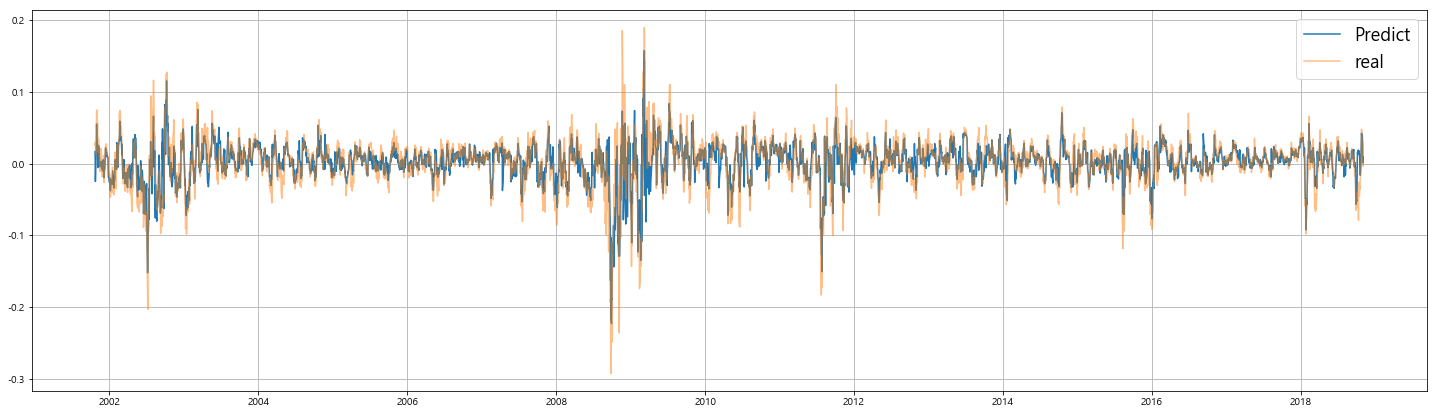

In [47]:
y = 'returnsCloseNext10'
plt.figure(figsize=(25,7))
plt.plot(result.dropna()[y], label='Predict', alpha=1)
plt.plot(sp500[y_li][y][result.dropna().index], label='real', alpha=.5)
plt.grid(True)
plt.legend(fontsize=18)

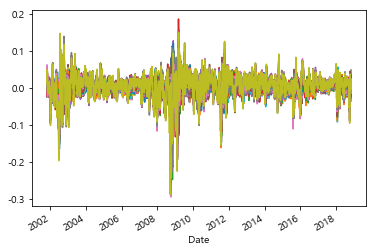

In [28]:
result.plot(legend=False)